# 1. Import Libraries

In [1]:
# pip install pycaret
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==0.23.2

In [2]:
# imports libraries

import math
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy.stats import norm

# Pre-processing

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold

# Solving Imbalance 

import imblearn
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, KMeansSMOTE, RandomOverSampler, SMOTE, SMOTENC, SVMSMOTE

# Modelling

import xgboost as xgb 
import lightgbm as lgbm 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline as skpipe
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification, make_regression

from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight

# Pycaret

from pycaret.datasets import get_data
from pycaret.classification import *

# Neural Network

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.metrics import Precision, Recall
from keras import backend as K

import time # measure runtime
from time import time #used to check the time elapsed since running

from IPython import display

import re
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# 2. Import Dataset

In [3]:
# Import Dataset

df_clean_final = pd.read_csv("df_clean_final.csv")

In [4]:
df_clean_final['SYMPTOM1'].value_counts()

0    792052
1      2670
Name: SYMPTOM1, dtype: int64

# 3. Downsampling of majority class (Non-myocarditis/pericarditis Symptoms)

Currently the outcome variable is very imbalanced. This can result in a very long run time and a poor recall and precision score. In order to resolve this, we have to conduct under-sampling of the majority and oversampling of the minority class. This step will invovle the undersampling of majority class by randomisation. Oversampling of minority class will be conducted in later steps using Smote and Adasyn. 

In [5]:
# Split the data according to outcome labels

df_clean_final_myo = df_clean_final[df_clean_final['SYMPTOM1']==1]
df_clean_final_non_myo = df_clean_final[df_clean_final['SYMPTOM1']==0]

In [6]:
# Randomly sample 20000 from the majority class

df_clean_final_non_myo = df_clean_final_non_myo.sample(n=20000, replace=False)

In [7]:
# Combine the randomly sampled majority class with the original minority class

df_clean_sample = pd.concat([df_clean_final_myo, df_clean_final_non_myo], ignore_index=True)

In [8]:
# Check dataset

df_clean_sample.shape

(22670, 16)

# 4. Pycaret

In this step we will be conducting preliminary modelling using pycaret. The first pycaret model will use smote for fixing imbalance, the second model will be using adasyn and the last model will be using SVMSMOTE. After obtaining the results, we will then decide which models to focus on for optimization in the subsequent steps. 

In this case, base on the 3 pycaret models, the top models are random forest, xgboost and lightbgm. 

# 4.1 Pycare Model 1 (SMOTE)

In [9]:
# Pycaret model 1, using Smote to fix class imbalance

test = setup(
    df_clean_sample, 
    target='SYMPTOM1',
    fold=5,
    fix_imbalance=True
            )

In [10]:
compare_models()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1577, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 4.2 Pycaret Model 2 (ADASYN)

In [11]:
test2 = setup(
    df_clean_sample, 
    target='SYMPTOM1',
    fold=5,
    fix_imbalance=True,
    fix_imbalance_method=ADASYN()
            )

In [12]:
compare_models()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=2815, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

# 4.3 Pycare Model 3 (SVMSMOTE)

In [13]:
test3 = setup(
    df_clean_sample, 
    target='SYMPTOM1',
    fold=5,
    fix_imbalance=True,
    fix_imbalance_method=SVMSMOTE()
            )

In [14]:
compare_models()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6695, verbose=0,
                       warm_start=False)

In [15]:
# Selected models for optimization: Xgboost, Random Forest and Light Gradient Boost. 
# Selected model for baseline: Logistic Regression

# 5. Optimization of Models 

In the previous step, we have determined that base on accuracy, precision and recall, lightgbm, xgboost and random forest shows some promise in delivering prediction. Using the logistic regression as a baseline model, we will be optimizing these 3 models and see which one performs the best.

The optimization will include the gridsearch for smote and adasyn, as well as the hyperparameters for each of the models. 

# 5.1 Pre-Model processing

In [8]:
# Check model

df_clean_sample.head()

STATE  AGE_YRS  SEX  DIED  L_THREAT  HOSPITAL  HOSPDAYS  X_STAY  DISABLE  \
0    NC     58.0    1     0         0         0         0       0        0   
1    CA     50.0    0     0         1         1         1       0        0   
2    NY     30.0    0     0         0         0         0       0        0   
3    NY     30.0    0     0         0         0         0       0        0   
4    FL     59.0    1     0         0         0         0       0        0   

   NUMDAYS  BIRTH_DEFECT  ER_ED_VISIT         VAX_MANU  VAX_DOSE_SERIES  \
0        4             0            1  PFIZER\BIONTECH                0   
1        4             0            0  PFIZER\BIONTECH                0   
2        4             0            1  PFIZER\BIONTECH                0   
3        4             0            1  PFIZER\BIONTECH                0   
4        0             0            1          MODERNA                0   

  VAX_SITE  SYMPTOM1  
0       RA         1  
1       LA         1  
2       LA         1  
3       LA         1  
4       LA         1

In [9]:
df_clean_sample.dtypes

STATE               object
AGE_YRS            float64
SEX                  int64
DIED                 int64
L_THREAT             int64
HOSPITAL             int64
HOSPDAYS             int64
X_STAY               int64
DISABLE              int64
NUMDAYS              int64
BIRTH_DEFECT         int64
ER_ED_VISIT          int64
VAX_MANU            object
VAX_DOSE_SERIES      int64
VAX_SITE            object
SYMPTOM1             int64
dtype: object

In [10]:
# Convert all data into integers and conduct dummification of the multi-categorical features

df_clean_sample = pd.get_dummies(df_clean_sample, columns=['STATE','VAX_MANU', 'VAX_SITE'])
df_clean_sample['DIED'] = df_clean_sample['DIED'].astype(int)
df_clean_sample['L_THREAT'] = df_clean_sample['L_THREAT'].astype(int)
df_clean_sample['HOSPITAL'] = df_clean_sample['HOSPITAL'].astype(int)
df_clean_sample['X_STAY'] = df_clean_sample['X_STAY'].astype(int)
df_clean_sample['DISABLE'] = df_clean_sample['DISABLE'].astype(int)
df_clean_sample['BIRTH_DEFECT'] = df_clean_sample['BIRTH_DEFECT'].astype(int)
df_clean_sample['ER_ED_VISIT'] = df_clean_sample['ER_ED_VISIT'].astype(int)


In [11]:
# Setting up feature columns and outcome 

features = []

for col in df_clean_sample.columns:
    if col != 'SYMPTOM1':
        features.append(col)

print(features)

X = df_clean_sample[features]
y = df_clean_sample['SYMPTOM1']

['AGE_YRS', 'SEX', 'DIED', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'NUMDAYS', 'BIRTH_DEFECT', 'ER_ED_VISIT', 'VAX_DOSE_SERIES', 'STATE_AK', 'STATE_AL', 'STATE_AR', 'STATE_AS', 'STATE_AZ', 'STATE_CA', 'STATE_CO', 'STATE_CT', 'STATE_Ca', 'STATE_DC', 'STATE_DE', 'STATE_FL', 'STATE_FM', 'STATE_GA', 'STATE_GU', 'STATE_HI', 'STATE_IA', 'STATE_ID', 'STATE_IL', 'STATE_IN', 'STATE_KS', 'STATE_KY', 'STATE_LA', 'STATE_MA', 'STATE_MD', 'STATE_ME', 'STATE_MH', 'STATE_MI', 'STATE_MN', 'STATE_MO', 'STATE_MP', 'STATE_MS', 'STATE_MT', 'STATE_NC', 'STATE_ND', 'STATE_NE', 'STATE_NH', 'STATE_NJ', 'STATE_NM', 'STATE_NV', 'STATE_NY', 'STATE_OH', 'STATE_OK', 'STATE_OR', 'STATE_PA', 'STATE_PR', 'STATE_QM', 'STATE_RI', 'STATE_SC', 'STATE_SD', 'STATE_TN', 'STATE_TX', 'STATE_UT', 'STATE_VA', 'STATE_VI', 'STATE_VT', 'STATE_WA', 'STATE_WI', 'STATE_WV', 'STATE_WY', 'STATE_XB', 'STATE_XL', 'STATE_XV', 'VAX_MANU_JANSSEN', 'VAX_MANU_MODERNA', 'VAX_MANU_PFIZER\\BIONTECH', 'VAX_MANU_UNKNOWN MANUFACTURER

In [12]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

X_train_total = X_train
X_test_total = X_test

In [13]:
# instiantiate models for modelling

models = {'lr': LogisticRegression(max_iter=5_000, random_state=42),
          'rf': RandomForestClassifier(random_state=42),
          'xgb': xgb.XGBClassifier(random_state=42), 
          'lgbm': lgbm.LGBMClassifier(random_state=42)
        }

In [14]:
# define resamplers for modelling

resamplers = {'smote': SMOTE(random_state=42),
              'adasyn': ADASYN(random_state=42),
             'None':None}

In [17]:
# Create function for modelling

def gscv_creator_3(model, pipe_params_1, pipe_params_2, pipe_params_3,resampler_1='smote', resampler_2='adasyn', n_jobs=-1):
    """
    function to instantiate models 
    parameters for gridsearching are prefixed correctly according to the dunder__ convention 
    """
    
    df_results = pd.DataFrame(
    columns = [
        'Classifier',
        'CV Score (train)',
        'ROC_AUC (train)',
        'ROC_AUC (test)',
        'Accuracy (train)',
        'Accuracy (test)',
        'Sensitivity (test)',
        'Specificity (test)',
        'Precision (test)',
        'Recall (test)',
        'Misclassification (test)',
    ])
    
    # SMOTE
    
    pipe_1 = imbpipe([
            (resampler_1, resamplers[resampler_1]),
            (model, models[model]),
        ])
    
    gs_1 = GridSearchCV(pipe_1,
                      pipe_params_1,
                      cv=5,
                      scoring='roc_auc',
                      verbose=1,
                      n_jobs=n_jobs) # force maximum number of concurrent workers
    
    gs_1.fit(X_train_total, y_train)
    
    y_smote_pred = gs_1.predict(X_test_total)
    tn, fp, fn, tp = confusion_matrix(y_test, y_smote_pred).ravel()
    
    new_row_1 = [{
        'Classifier' : model + ' smote',
        'CV Score (train)' : round(gs_1.best_score_, 5),
        'ROC_AUC (train)': round(gs_1.score(X_train_total, y_train), 2),
        'ROC_AUC (test)' : round(gs_1.score(X_test_total, y_test) ,2 ),
        'Accuracy (train)': round(gs_1.score(X_train_total, y_train), 2),
        'Accuracy (test)' : round(gs_1.score(X_test_total, y_test) ,2 ),
        'Sensitivity (test)' : round (tp/(tp+fn), 2),
        'Specificity (test)' : round (tn/(tn+fp), 2),
        'Precision (test)' : round (tp/(tp+fp), 2),
        'Recall (test)' : round (tp/(tp+fn), 2),
        'Misclassification (test)' : round (1-(tp+tn)/(tn+fp+fn+tp),2),
    }]
    
    df_results = pd.concat([df_results, pd.DataFrame(new_row_1)], axis = 0)
    
    cm = confusion_matrix(y_test, y_smote_pred)

    modified_cm = []
    for index,value in enumerate(cm):
        if index == 0:
            modified_cm.append(['True Neg = ' + str(value[0]), 'False Pos = ' + str(value[1])])
        if index == 1:
            modified_cm.append(['False Neg = ' + str(value[0]), 'True Pos = ' + str(value[1])])   

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=np.array(modified_cm),fmt="",annot_kws={"size": 20},linewidths=.5,square = True,cmap = 'Blues',
            xticklabels = ['Non-Myocarditis/Pericarditis', 'Myocarditis/Pericarditis'],
            yticklabels = ['Non-Myocarditis/Pericarditis', 'Myocarditis/Pericarditis'],
            );

    plt.ylabel('Actual label', fontsize = 17);
    plt.xlabel('Predicted label', fontsize = 17);
    plt.tick_params(labelsize= 15)
    
    if model == 'lr':
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_1.best_estimator_.named_steps[model].coef_[0]), orient="h")
    
    elif model == 'rf':
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_1.best_estimator_.named_steps[model].feature_importances_), orient="h")
    
    elif model == 'xgb':
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_1.best_estimator_.named_steps[model].feature_importances_), orient="h")
    
    else:
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_1.best_estimator_.named_steps[model].feature_importances_), orient="h")
    
    # ADASYN
    
    pipe_2 = imbpipe([
            (resampler_2, resamplers[resampler_2]),
            (model, models[model]),
        ])
    
    gs_2 = GridSearchCV(pipe_2,
                      pipe_params_2,
                      cv=5,
                      scoring='roc_auc',
                      verbose=1,
                      n_jobs=n_jobs) # force maximum number of concurrent workers
    
    gs_2.fit(X_train_total, y_train)
    
    y_adasyn_pred = gs_2.predict(X_test_total)
    tn, fp, fn, tp = confusion_matrix(y_test, y_adasyn_pred).ravel()
    
    new_row_2 = [{
        'Classifier' : model + ' adasyn',
        'CV Score (train)' : round(gs_2.best_score_, 5),
        'ROC_AUC (train)': round(gs_2.score(X_train_total, y_train), 2),
        'ROC_AUC (test)' : round(gs_2.score(X_test_total, y_test) ,2 ),
        'Accuracy (train)': round(gs_2.score(X_train_total, y_train), 2),
        'Accuracy (test)' : round(gs_2.score(X_test_total, y_test) ,2 ),
        'Sensitivity (test)' : round (tp/(tp+fn), 2),
        'Specificity (test)' : round (tn/(tn+fp), 2),
        'Precision (test)' : round (tp/(tp+fp), 2),
        'Recall (test)' : round (tp/(tp+fn), 2),
        'Misclassification (test)' : round (1-(tp+tn)/(tn+fp+fn+tp),2),
    }]
    
    df_results = pd.concat([df_results, pd.DataFrame(new_row_2)], axis = 0)
    
    cm = confusion_matrix(y_test, y_adasyn_pred)

    modified_cm = []
    for index,value in enumerate(cm):
        if index == 0:
            modified_cm.append(['True Neg = ' + str(value[0]), 'False Pos = ' + str(value[1])])
        if index == 1:
            modified_cm.append(['False Neg = ' + str(value[0]), 'True Pos = ' + str(value[1])])   

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=np.array(modified_cm),fmt="",annot_kws={"size": 20},linewidths=.5,square = True,cmap = 'Blues',
            xticklabels = ['Non-Myocarditis/Pericarditis', 'Myocarditis/Pericarditis'],
            yticklabels = ['Non-Myocarditis/Pericarditis', 'Myocarditis/Pericarditis'],
            );

    plt.ylabel('Actual label', fontsize = 17);
    plt.xlabel('Predicted label', fontsize = 17);
    plt.tick_params(labelsize= 15)
    
    if model == 'lr':
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_2.best_estimator_.named_steps[model].coef_[0]), orient="h")
    
    elif model == 'rf':
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_2.best_estimator_.named_steps[model].feature_importances_), orient="h")
    
    elif model == 'xgb':
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_2.best_estimator_.named_steps[model].feature_importances_), orient="h")
    
    else:
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_2.best_estimator_.named_steps[model].feature_importances_), orient="h")
    
    # Without SMOTE or ADASYN
    
    pipe_3 = skpipe([
            (model, models[model])
        ])
    
    gs_3 = GridSearchCV(pipe_3,
                      pipe_params_3,
                      cv=5,
                      scoring='roc_auc',
                      verbose=1,
                      n_jobs=n_jobs) # force maximum number of concurrent workers
    
    gs_3.fit(X_train_total, y_train)
    
    y_no_pred = gs_3.predict(X_test_total)
    tn, fp, fn, tp = confusion_matrix(y_test, y_no_pred).ravel()
    
    new_row_3 = [{
        'Classifier' : model,
        'CV Score (train)' : round(gs_3.best_score_, 5),
        'ROC_AUC (train)': round(gs_3.score(X_train_total, y_train), 2),
        'ROC_AUC (test)' : round(gs_3.score(X_test_total, y_test) ,2 ),
        'Accuracy (train)': round(gs_3.score(X_train_total, y_train), 2),
        'Accuracy (test)' : round(gs_3.score(X_test_total, y_test) ,2 ),
        'Sensitivity (test)' : round (tp/(tp+fn), 2),
        'Specificity (test)' : round (tn/(tn+fp), 2),
        'Precision (test)' : round (tp/(tp+fp), 2),
        'Recall (test)' : round (tp/(tp+fn), 2),
        'Misclassification (test)' : round (1-(tp+tn)/(tn+fp+fn+tp),2),
    }]
    
    df_results = pd.concat([df_results, pd.DataFrame(new_row_3)], axis = 0)
    
    cm = confusion_matrix(y_test, y_no_pred)

    modified_cm = []
    for index,value in enumerate(cm):
        if index == 0:
            modified_cm.append(['True Neg = ' + str(value[0]), 'False Pos = ' + str(value[1])])
        if index == 1:
            modified_cm.append(['False Neg = ' + str(value[0]), 'True Pos = ' + str(value[1])])   

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=np.array(modified_cm),fmt="",annot_kws={"size": 20},linewidths=.5,square = True,cmap = 'Blues',
            xticklabels = ['Non-Myocarditis/Pericarditis', 'Myocarditis/Pericarditis'],
            yticklabels = ['Non-Myocarditis/Pericarditis', 'Myocarditis/Pericarditis'],
            );

    plt.ylabel('Actual label', fontsize = 17);
    plt.xlabel('Predicted label', fontsize = 17);
    plt.tick_params(labelsize= 15)
    
    if model == 'lr':
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_3.best_estimator_.named_steps[model].coef_[0]), orient="h")
    
    elif model == 'rf':
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_3.best_estimator_.named_steps[model].feature_importances_), orient="h")
    
    elif model == 'xgb':
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_3.best_estimator_.named_steps[model].feature_importances_), orient="h")
    
    else:
        plt.figure(figsize=(9,9))
        sns.barplot(y=X_train.columns, x=np.sort(gs_3.best_estimator_.named_steps[model].feature_importances_), orient="h")
    
    return df_results

# 5.2 Logistic Regression (Baseline Model)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 36.5min finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 54.9min finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.6min finished


Classifier  CV Score (train)  ROC_AUC (train)  ROC_AUC (test)  \
0   lr smote           0.88334             0.89            0.88   
0  lr adasyn           0.88278             0.89            0.88   
0         lr           0.89074             0.89            0.89   

   Accuracy (train)  Accuracy (test)  Sensitivity (test)  Specificity (test)  \
0              0.89             0.88                0.55                0.96   
0              0.89             0.88                0.52                0.96   
0              0.89             0.89                0.47                0.97   

   Precision (test)  Recall (test)  Misclassification (test)  
0              0.66           0.55                      0.08  
0              0.65           0.52                      0.09  
0              0.69           0.47                      0.08

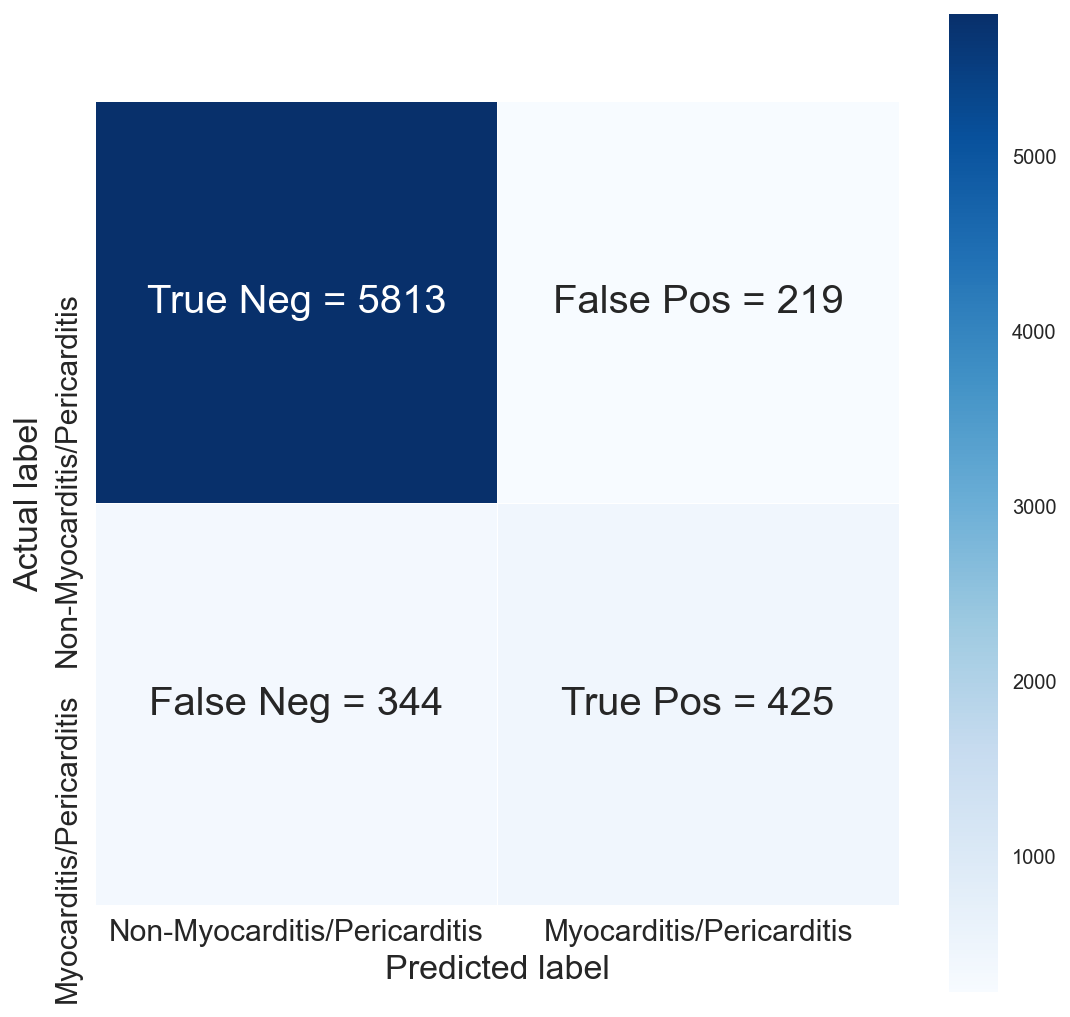

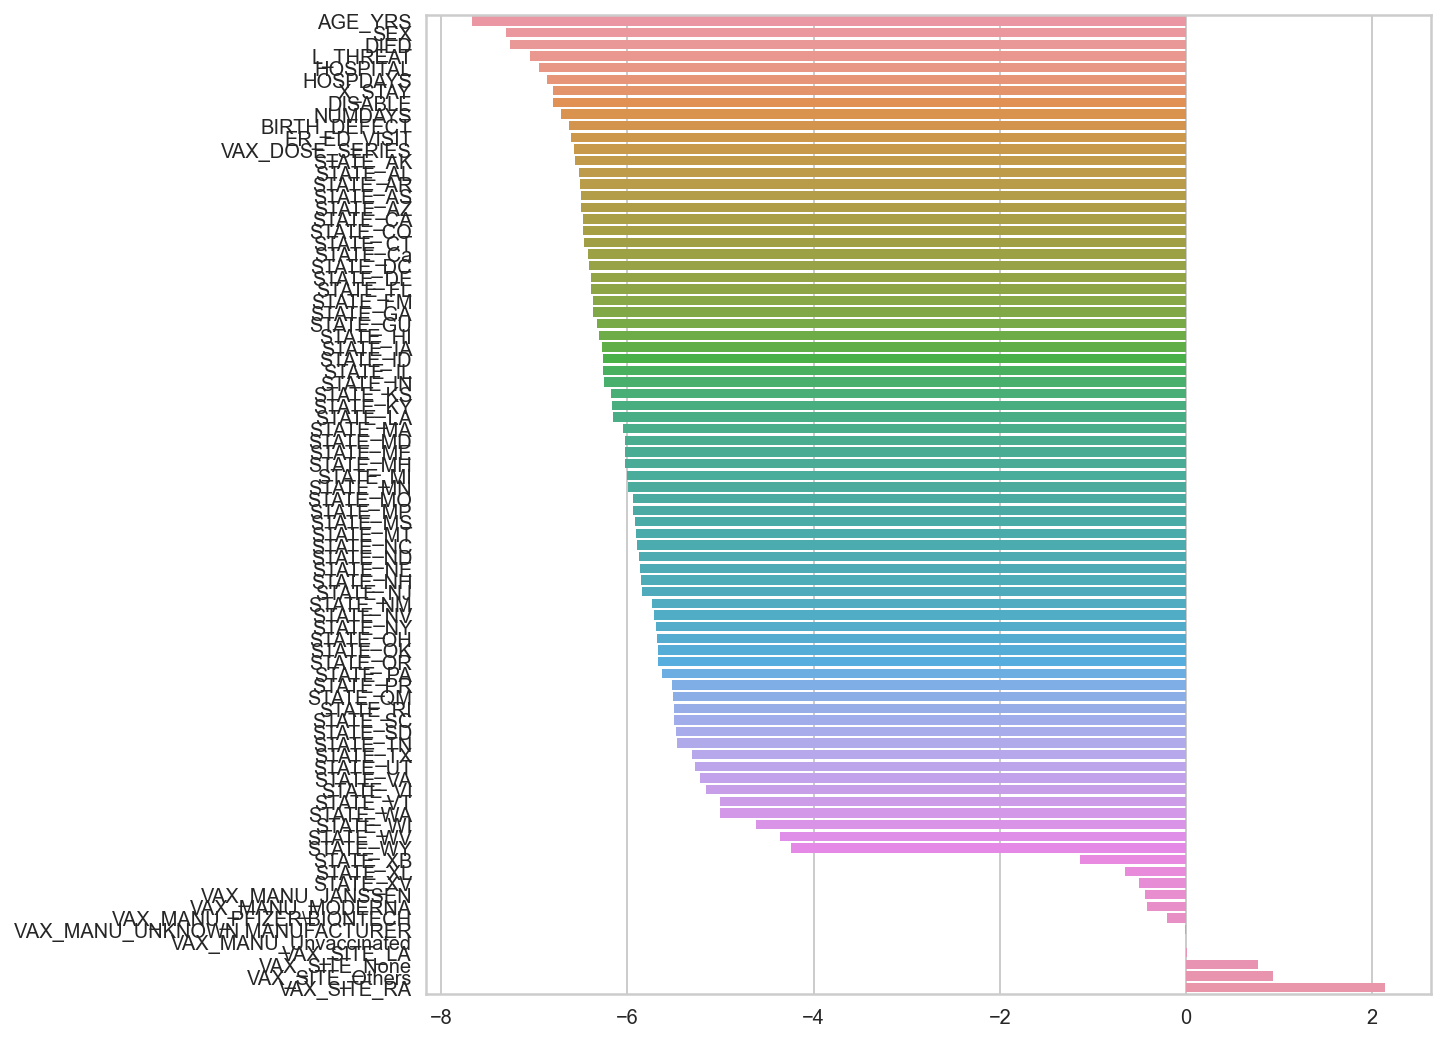

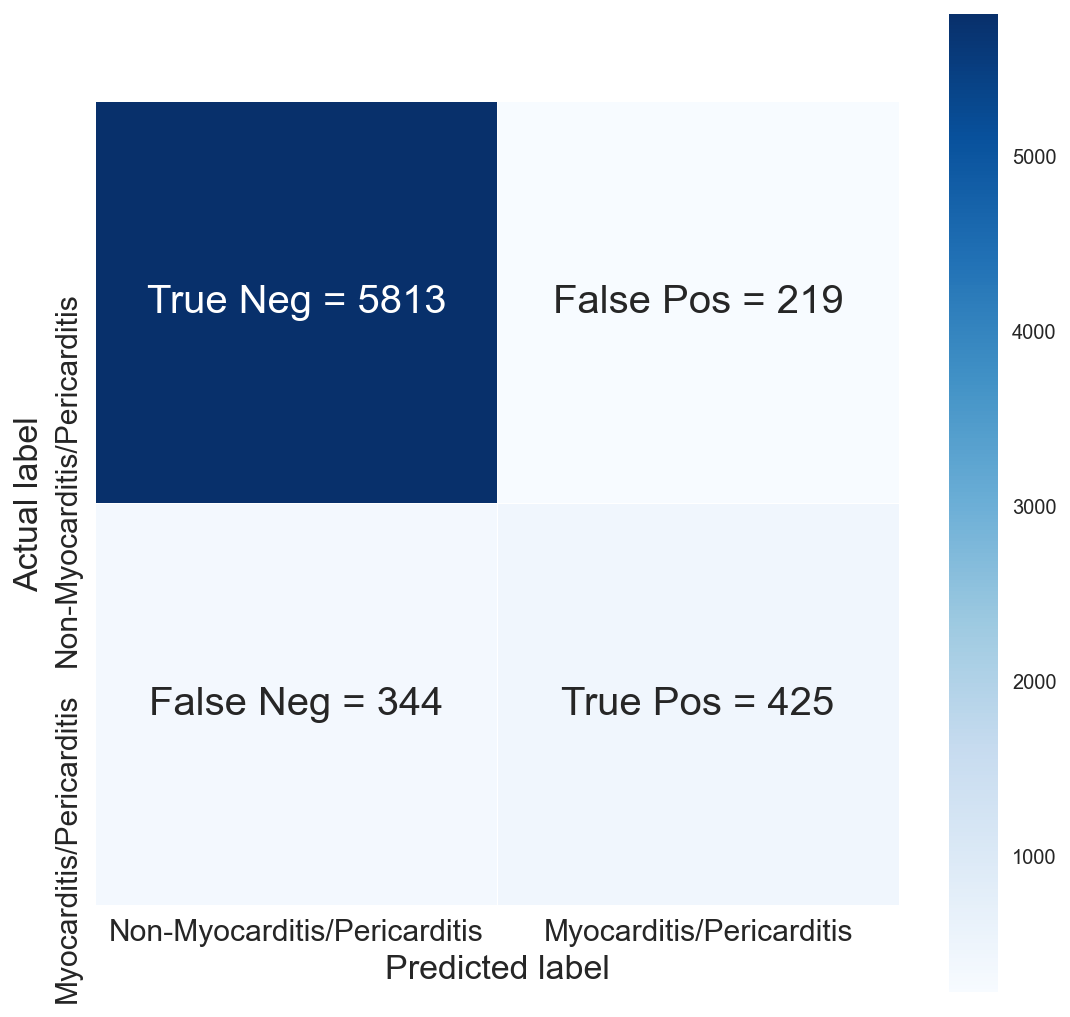

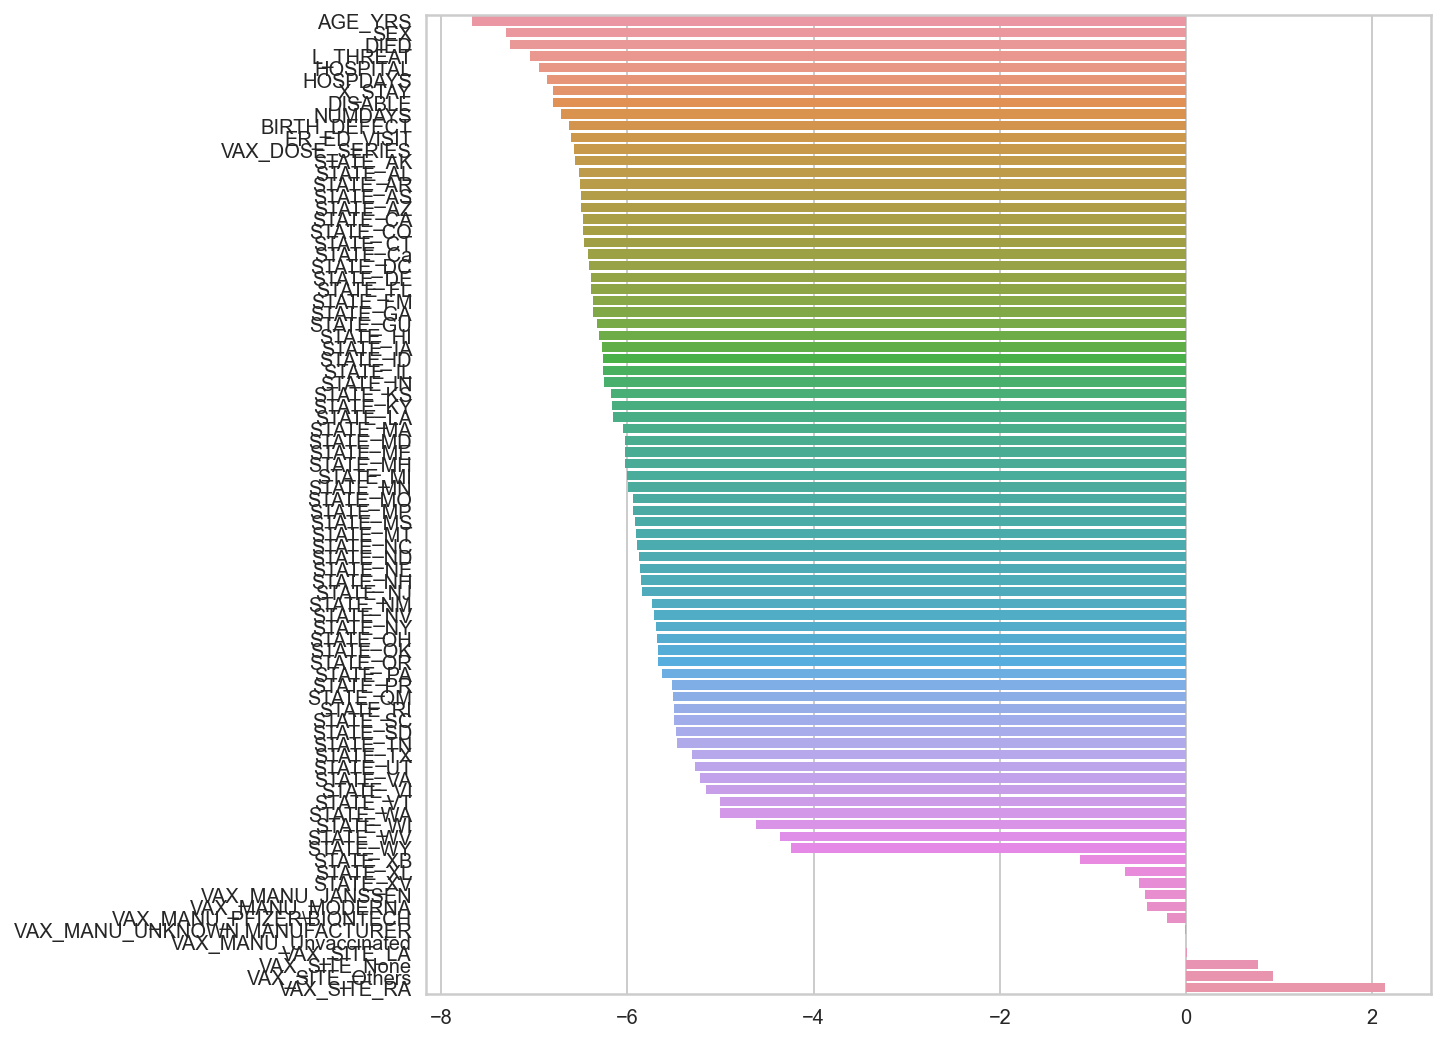

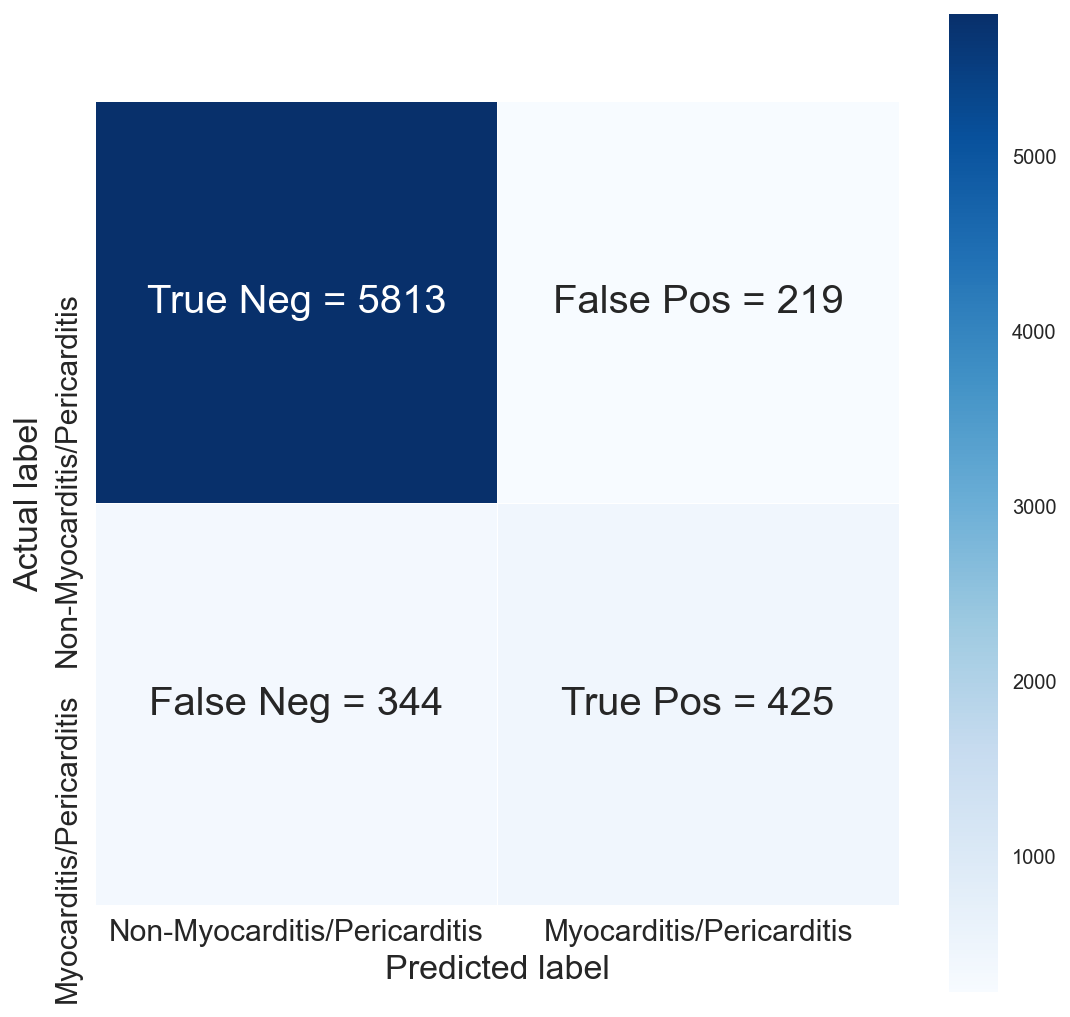

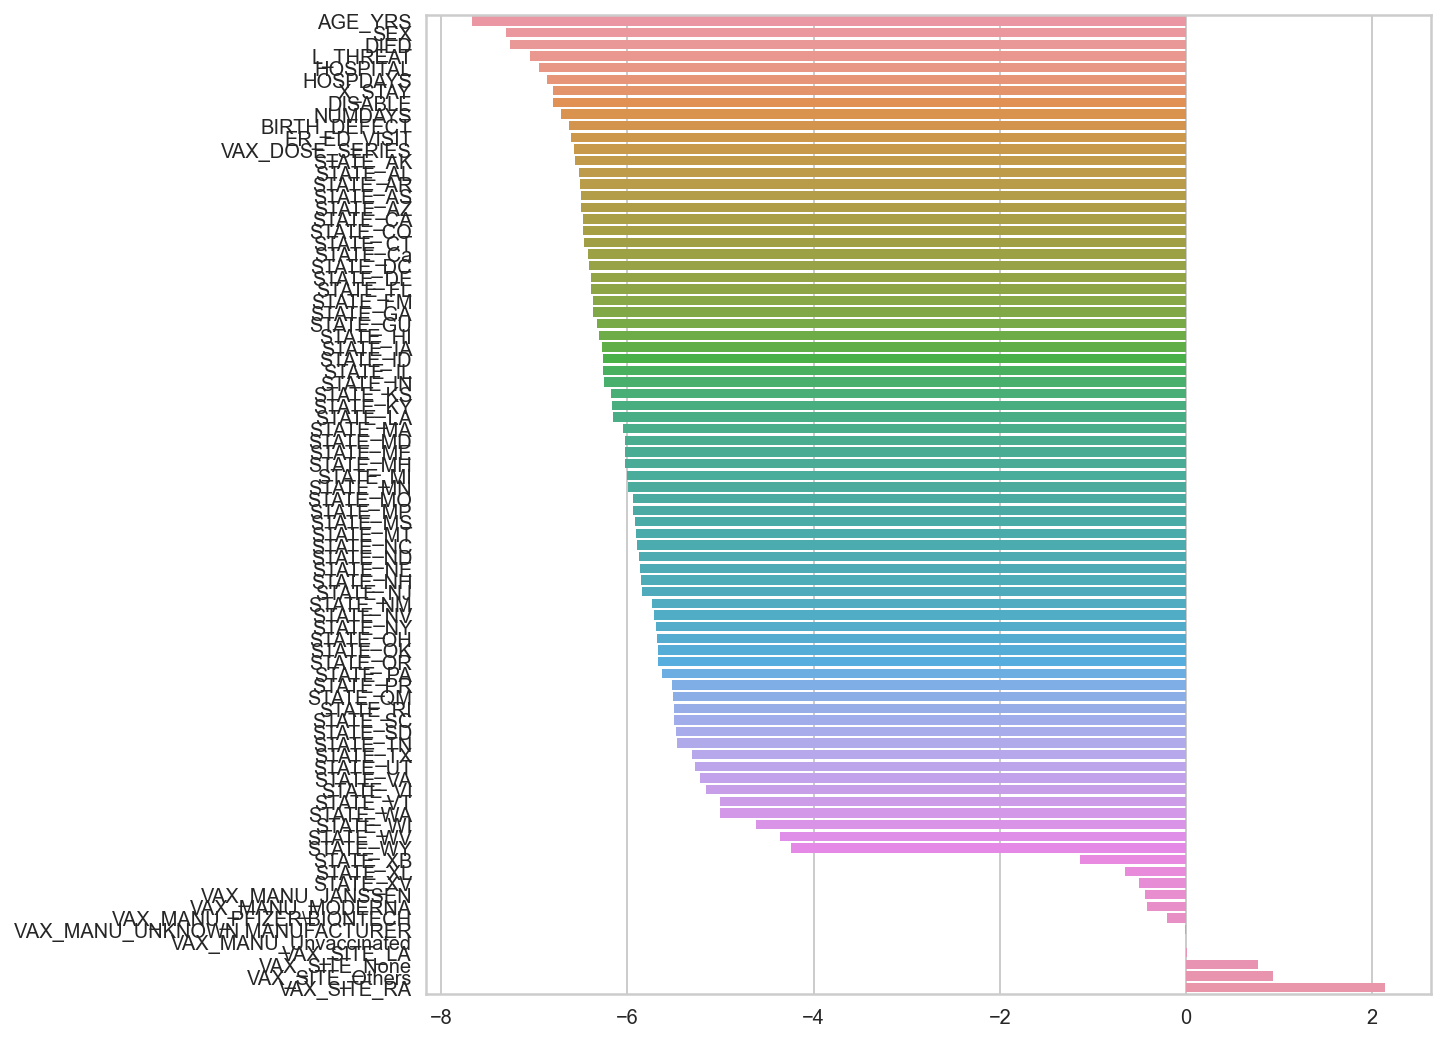

In [24]:
# LogReg with SMOTE
pipe_param_1 = {
    'smote__k_neighbors':[2,3,5],
    'lr__C':[0.1, 1, 5],
    'lr__penalty': [None, 'l2'],
    'lr__solver': ['lbfgs', 'newton-cg', 'saga'],
}

# LogReg with ADASYN
pipe_param_2 = {
    'adasyn__n_neighbors':[1,2,3],
    'lr__C':[0.1, 1, 5],
    'lr__penalty': [None, 'l2'],
    'lr__solver': ['lbfgs', 'newton-cg', 'saga'],
}

# LogReg w/o resamplers
pipe_param_3 = {
    'lr__C':[0.1, 1, 5],
    'lr__penalty': [None, 'l2'],
    'lr__solver': ['lbfgs', 'newton-cg', 'saga'],
}

gscv_creator_3(model='lr', pipe_params_1 = pipe_param_1, pipe_params_2 = pipe_param_2, pipe_params_3 = pipe_param_3, 
               resampler_1='smote', resampler_2='adasyn', n_jobs=-1)

# 5.3 Random Forest 

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  5.4min finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  5.7min finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   58.2s finished


Classifier  CV Score (train)  ROC_AUC (train)  ROC_AUC (test)  \
0   rf smote           0.90496             0.94            0.91   
0  rf adasyn           0.89980             0.97            0.91   
0         rf           0.91421             0.97            0.92   

   Accuracy (train)  Accuracy (test)  Sensitivity (test)  Specificity (test)  \
0              0.94             0.91                0.78                0.90   
0              0.97             0.91                0.74                0.91   
0              0.97             0.92                0.53                0.97   

   Precision (test)  Recall (test)  Misclassification (test)  
0              0.51           0.78                      0.11  
0              0.51           0.74                      0.11  
0              0.69           0.53                      0.08

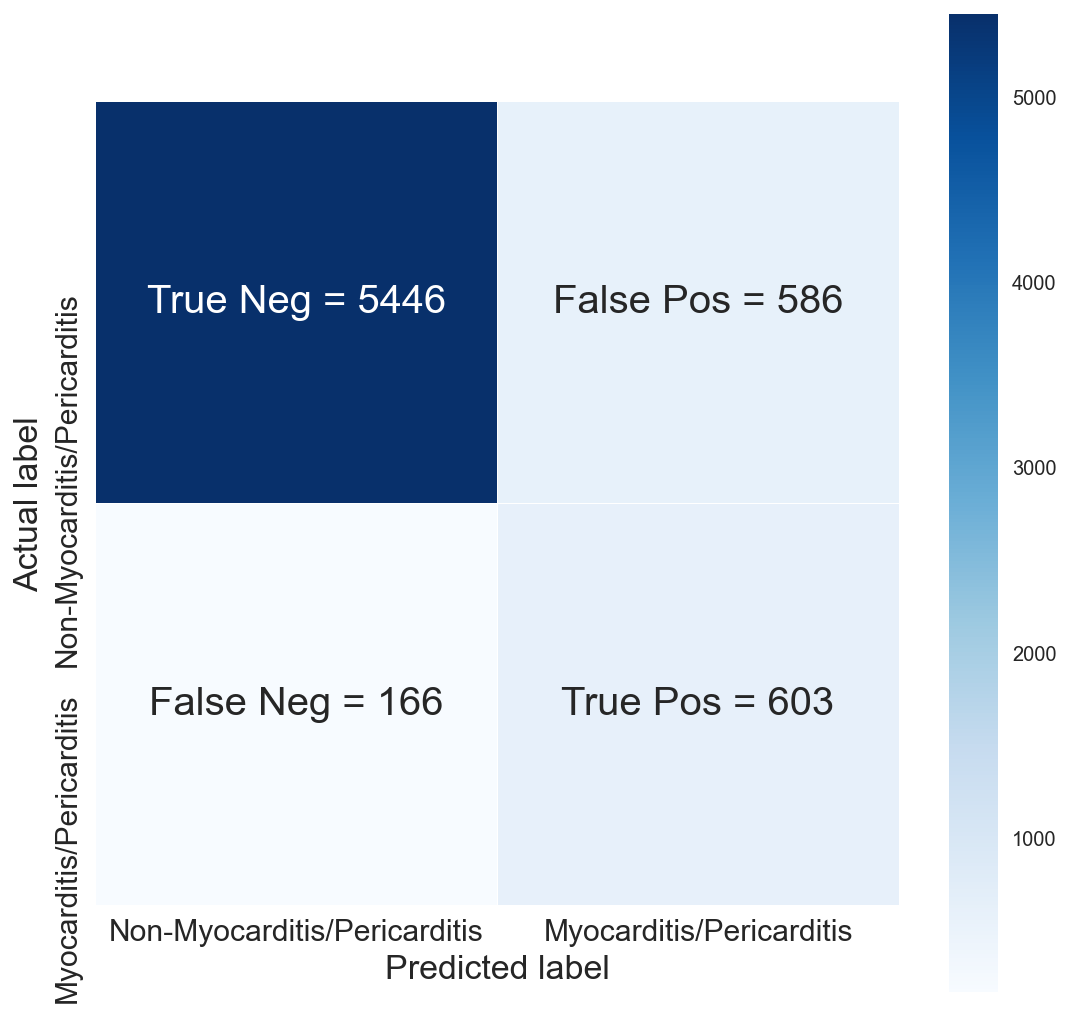

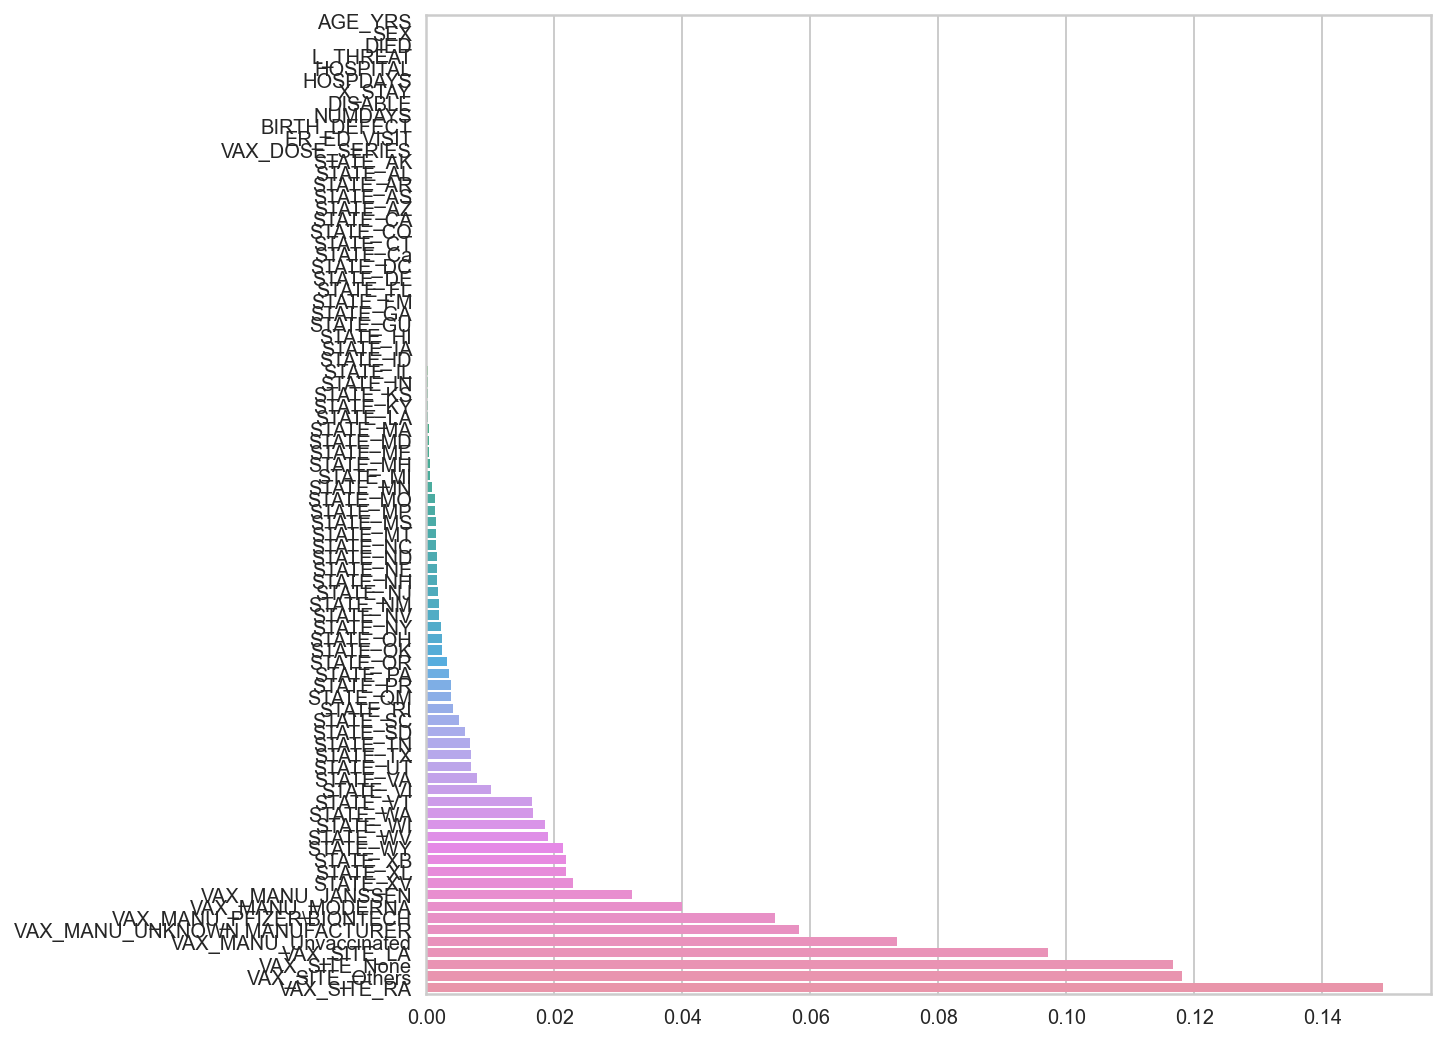

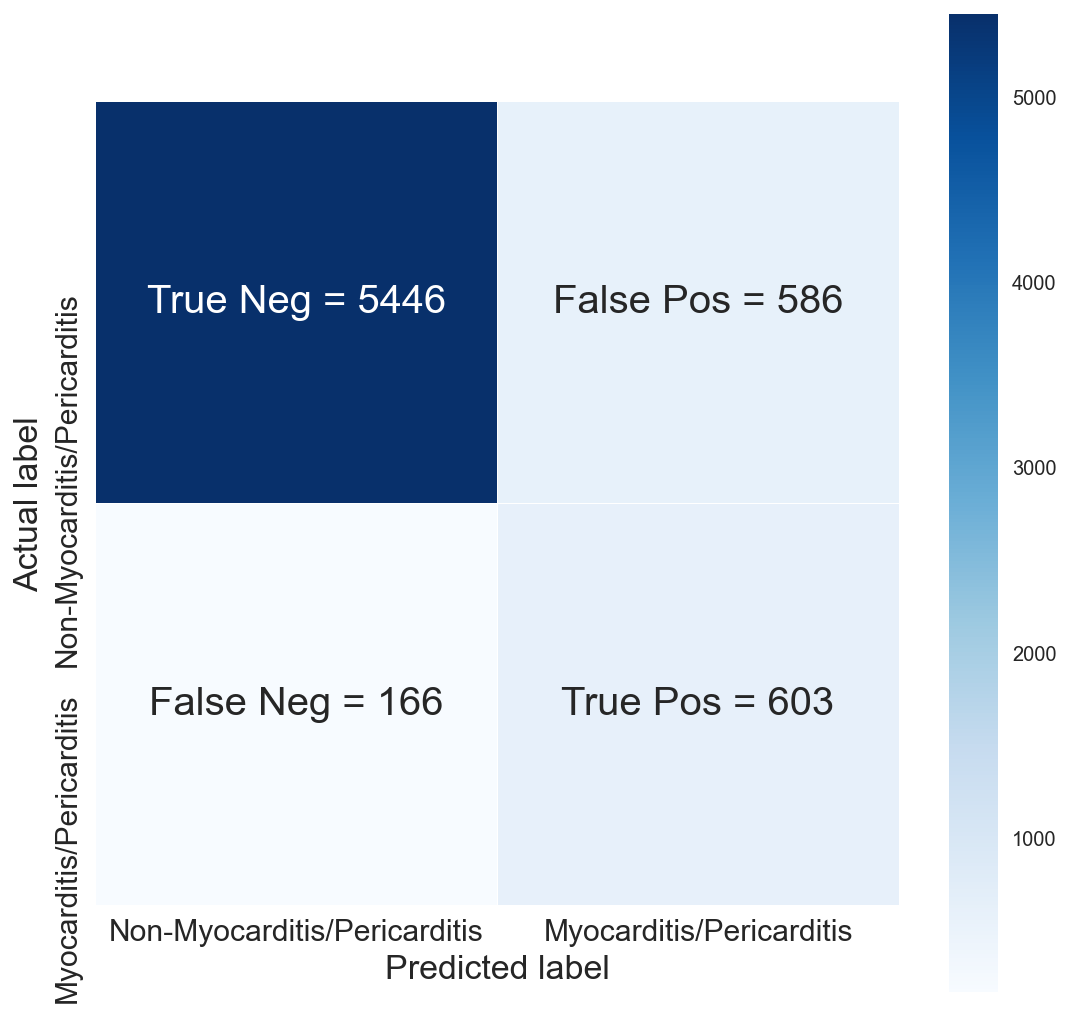

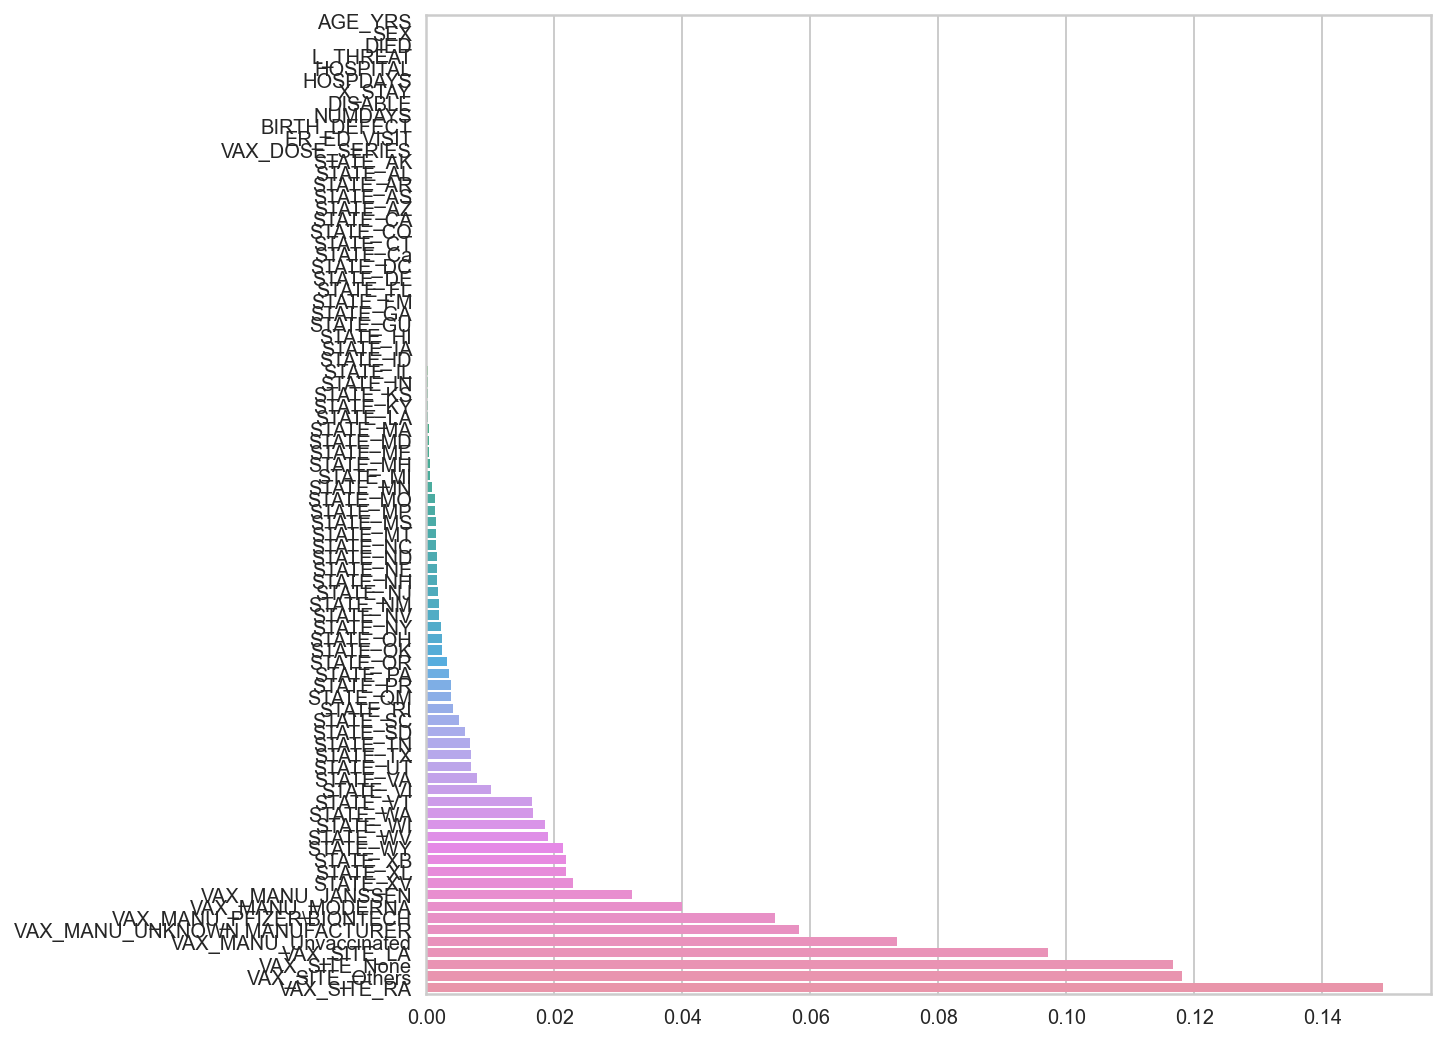

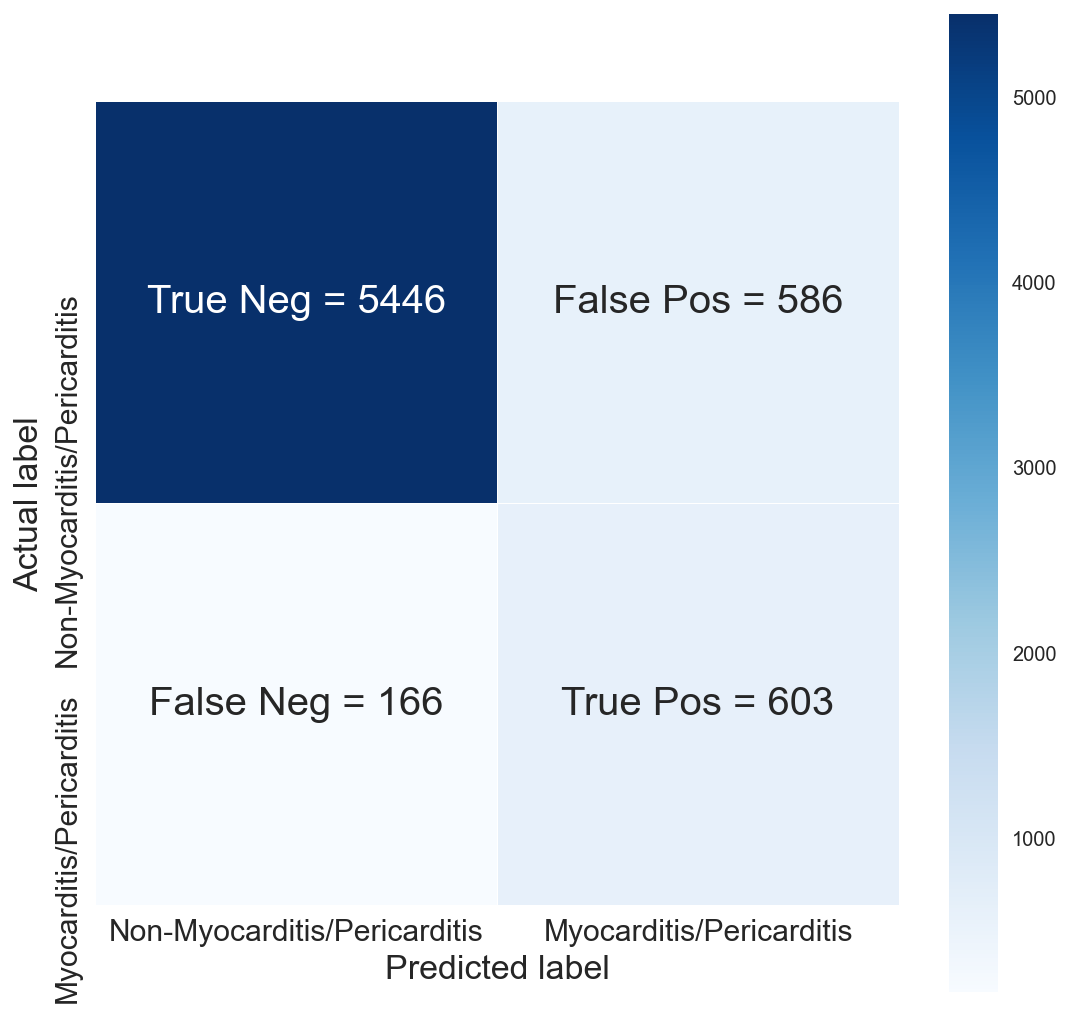

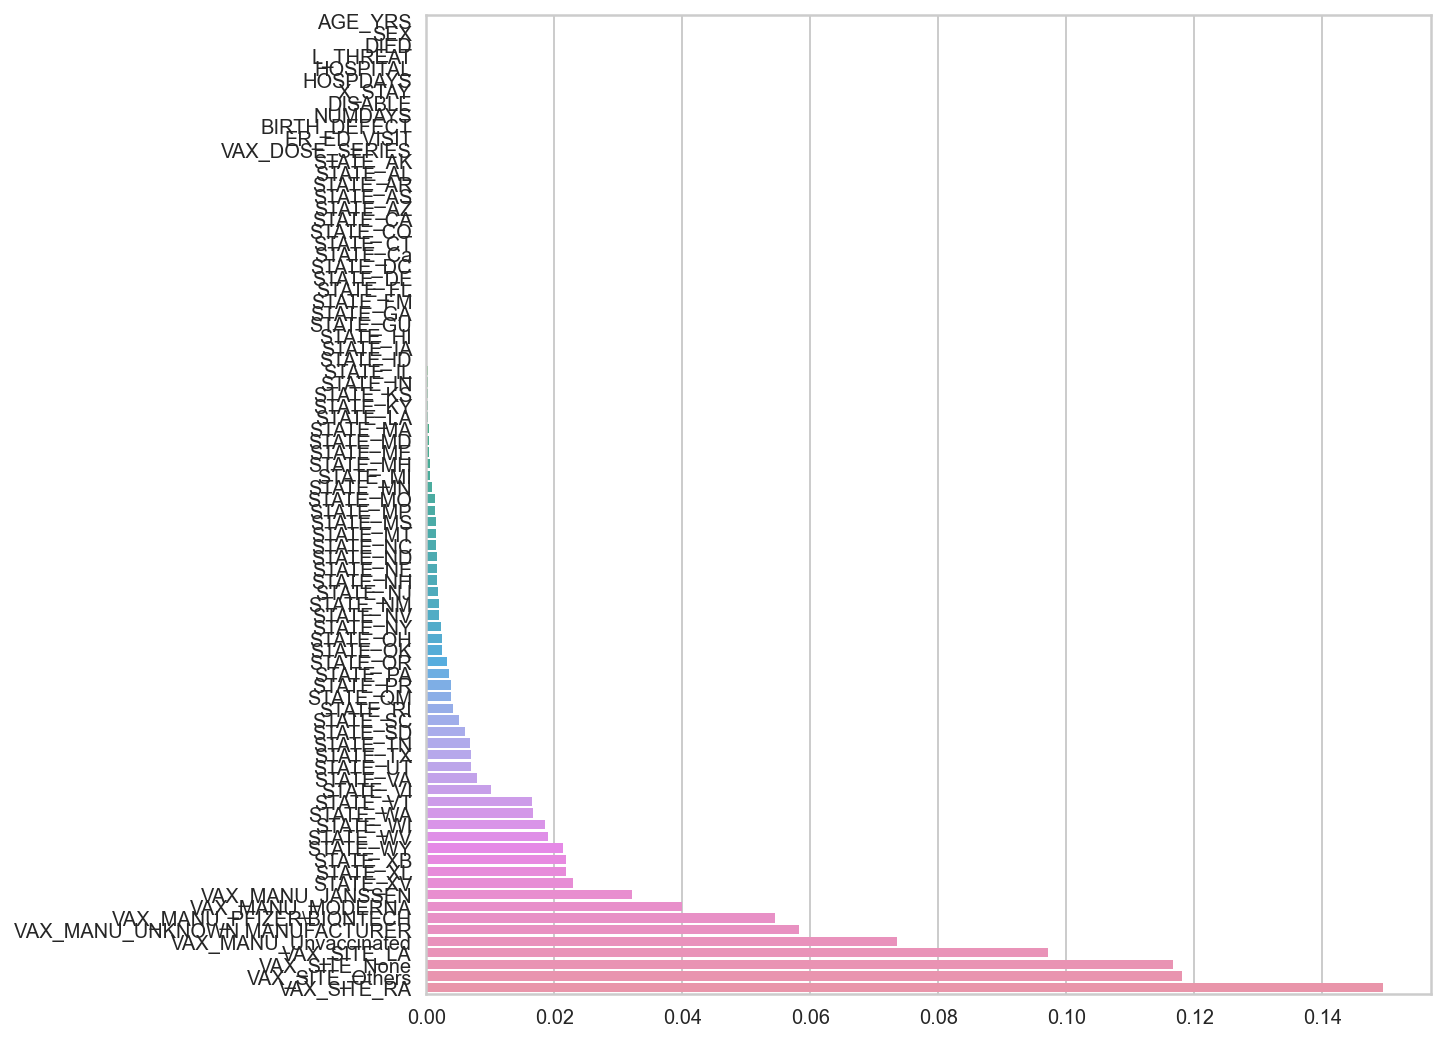

In [25]:
# Random Forests with SMOTE
pipe_param_1 = {
    'smote__k_neighbors':[2,3,5],
    'rf__n_estimators':[100,200],
    'rf__max_depth':[None,3,5],
    'rf__min_samples_leaf':[2,3,5]
}

# Random Forests with ADASYN
pipe_param_2 = {
    'adasyn__n_neighbors':[2,3,5],
    'rf__n_estimators':[100,200],
    'rf__max_depth':[None,3,5],
    'rf__min_samples_leaf':[2,3,5]
}

# Random Forests w/o resamplers
pipe_param_3 = {
    'rf__n_estimators':[100,200],
    'rf__max_depth':[None,3,5],
    'rf__min_samples_leaf':[2,3,5]
}

gscv_creator_3(model='rf', pipe_params_1 = pipe_param_1, pipe_params_2 = pipe_param_2, pipe_params_3 = pipe_param_3, 
               resampler_1='smote', resampler_2='adasyn', n_jobs=-1)

# 5.4 Light Gradient Boost Model

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   56.4s finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   56.4s finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   11.2s finished


Classifier  CV Score (train)  ROC_AUC (train)  ROC_AUC (test)  \
0   lgbm smote           0.89745             0.90            0.90   
0  lgbm adasyn           0.88760             0.89            0.89   
0         lgbm           0.90942             0.91            0.91   

   Accuracy (train)  Accuracy (test)  Sensitivity (test)  Specificity (test)  \
0              0.90             0.90                0.81                0.87   
0              0.89             0.89                0.82                0.83   
0              0.91             0.91                0.47                0.98   

   Precision (test)  Recall (test)  Misclassification (test)  
0              0.43           0.81                      0.14  
0              0.38           0.82                      0.17  
0              0.72           0.47                      0.08

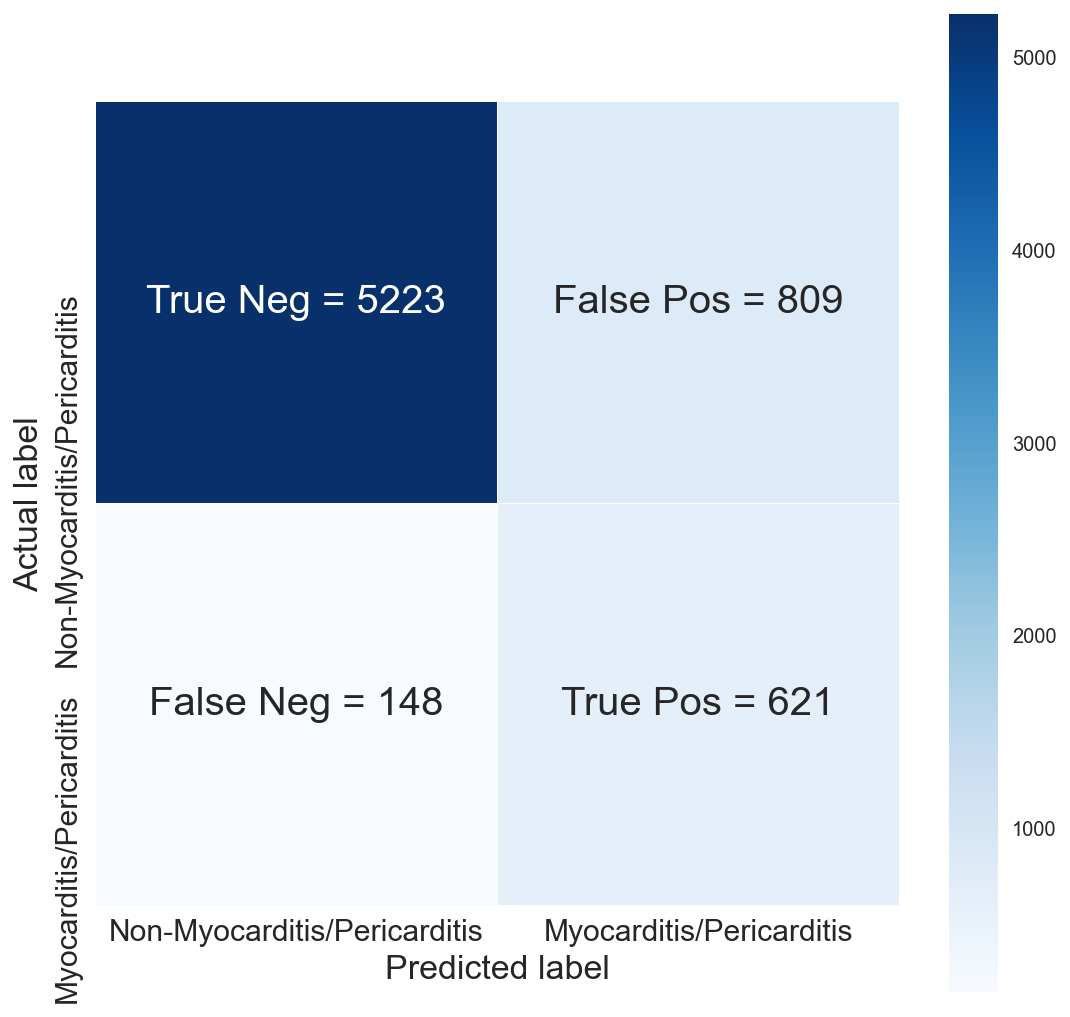

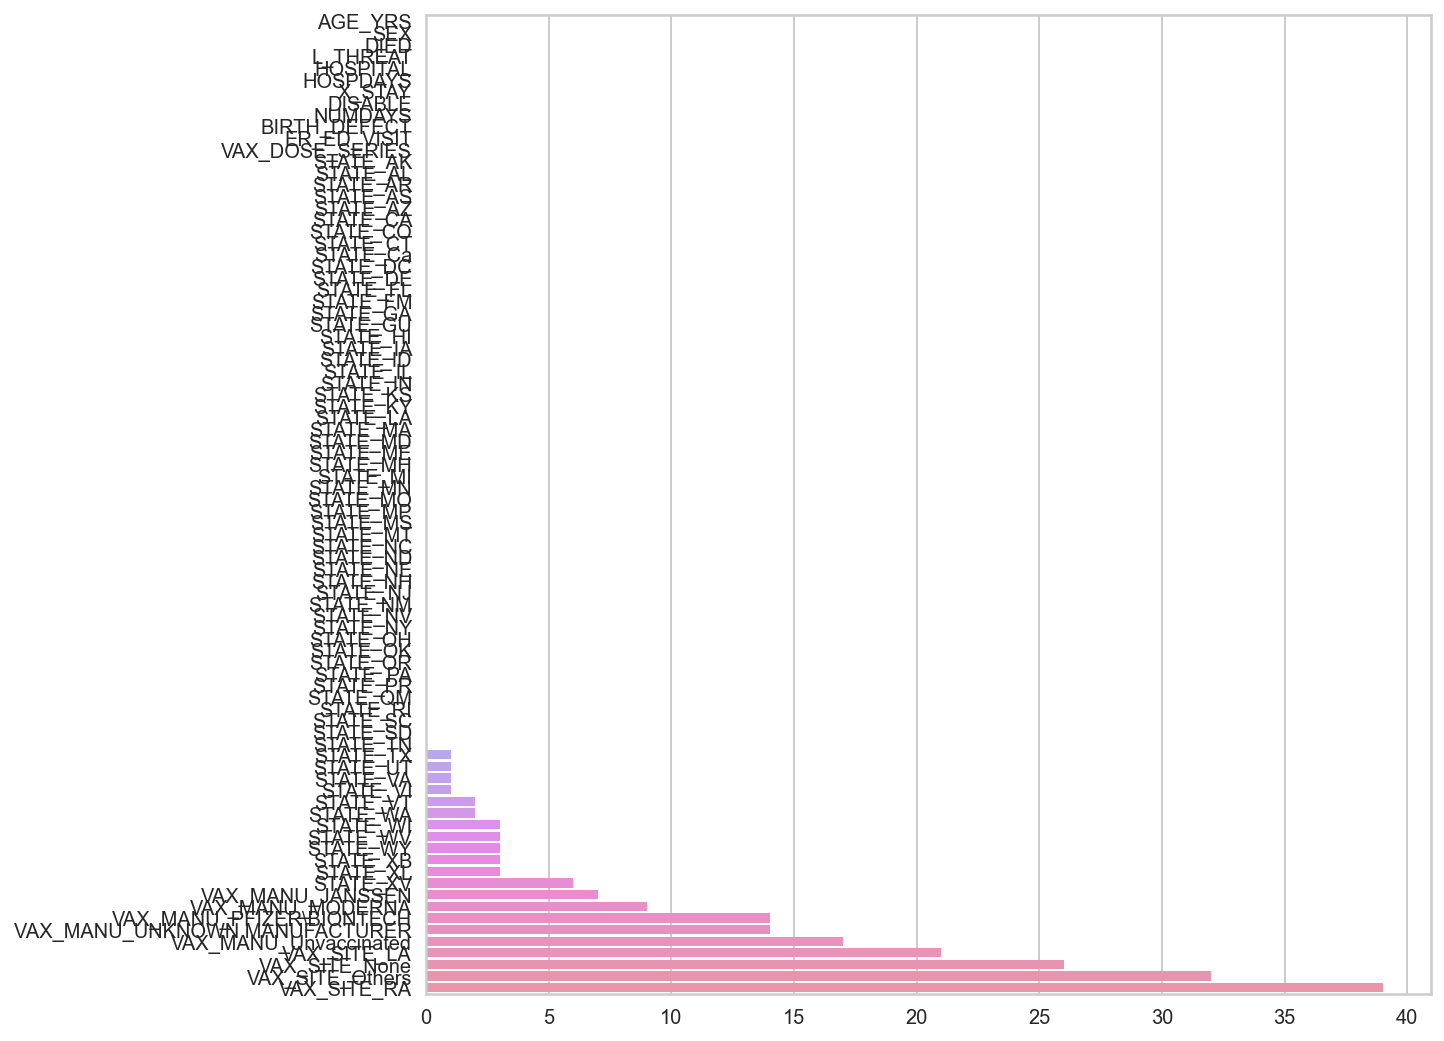

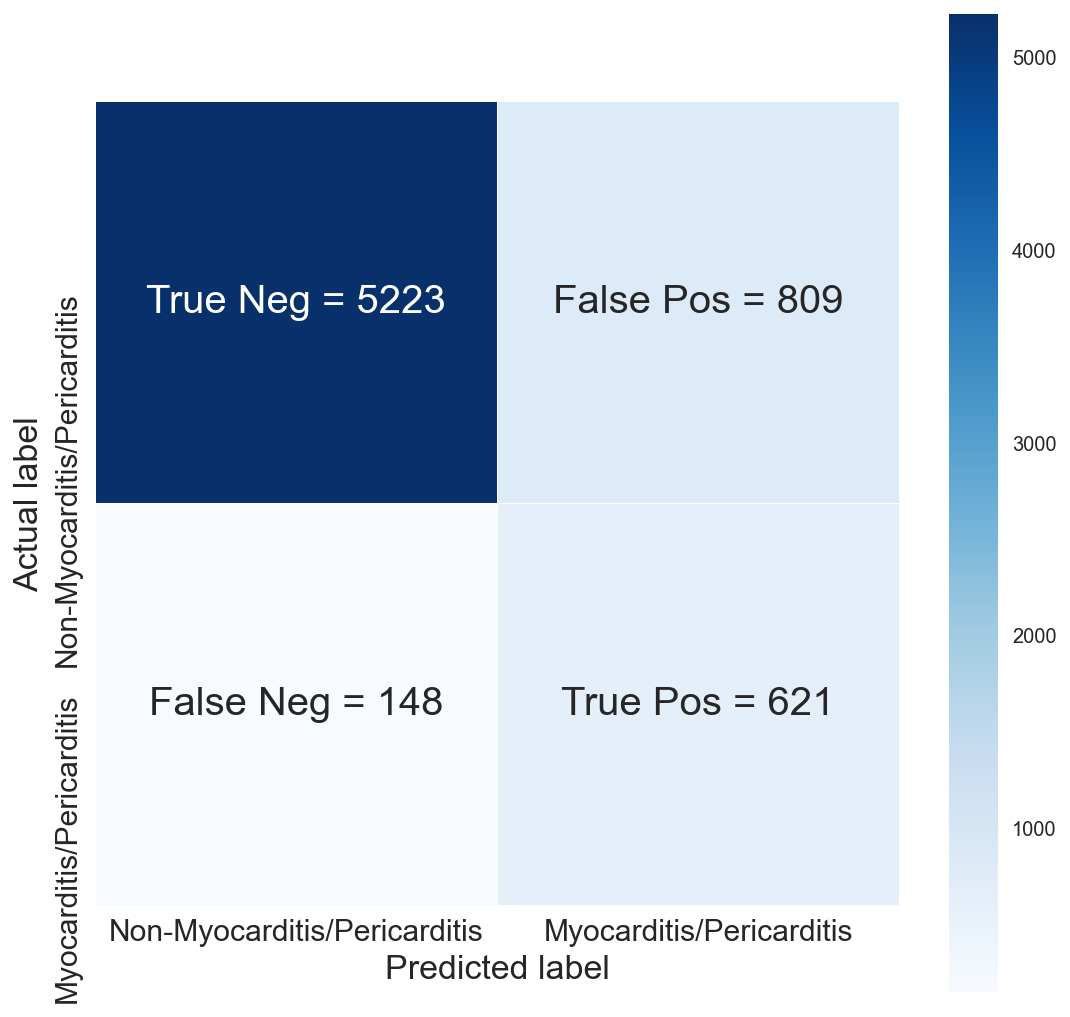

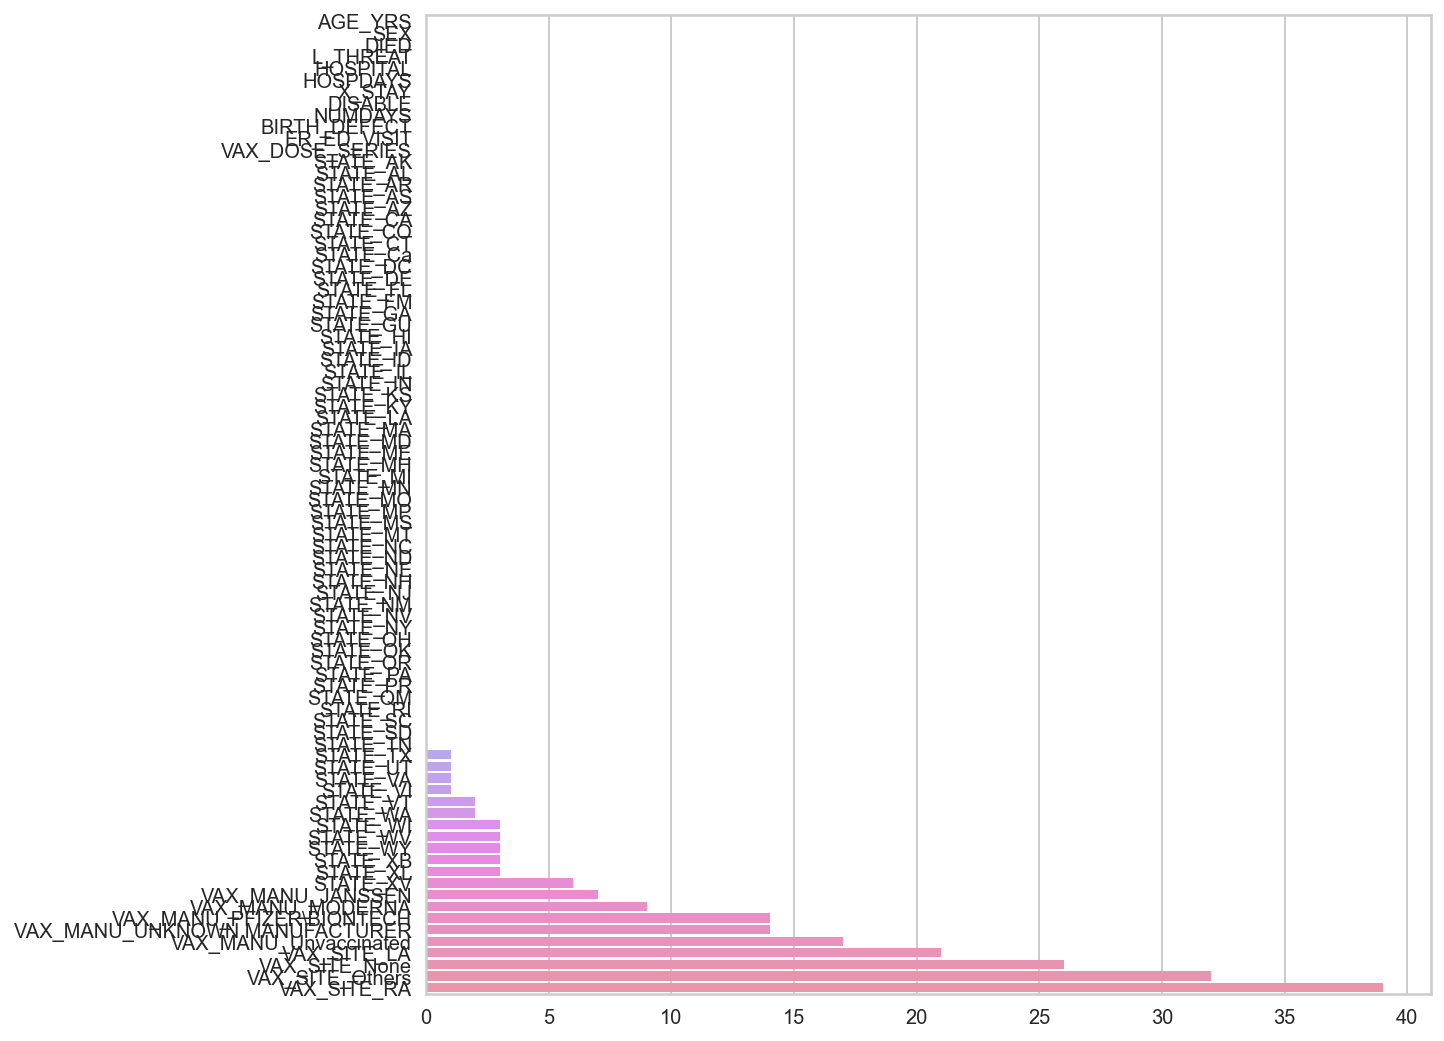

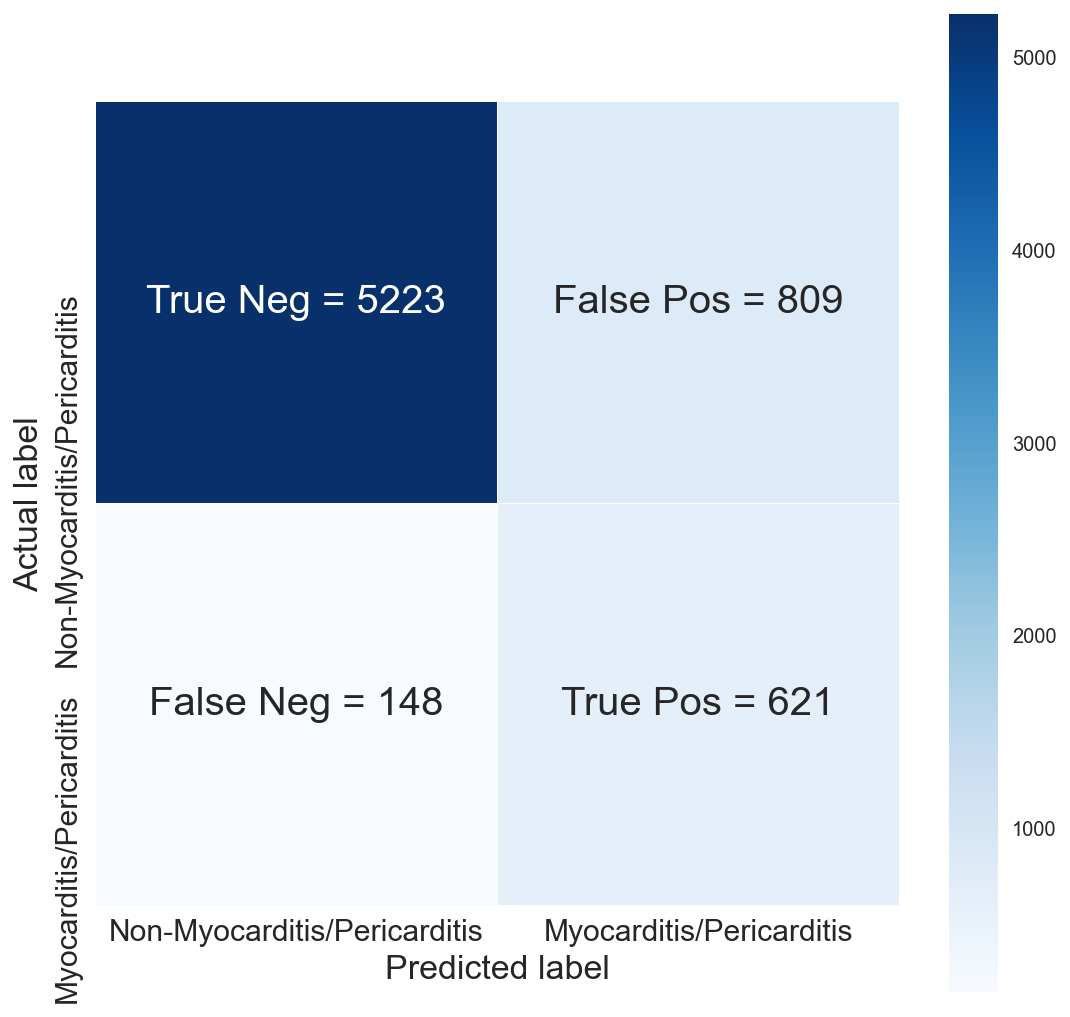

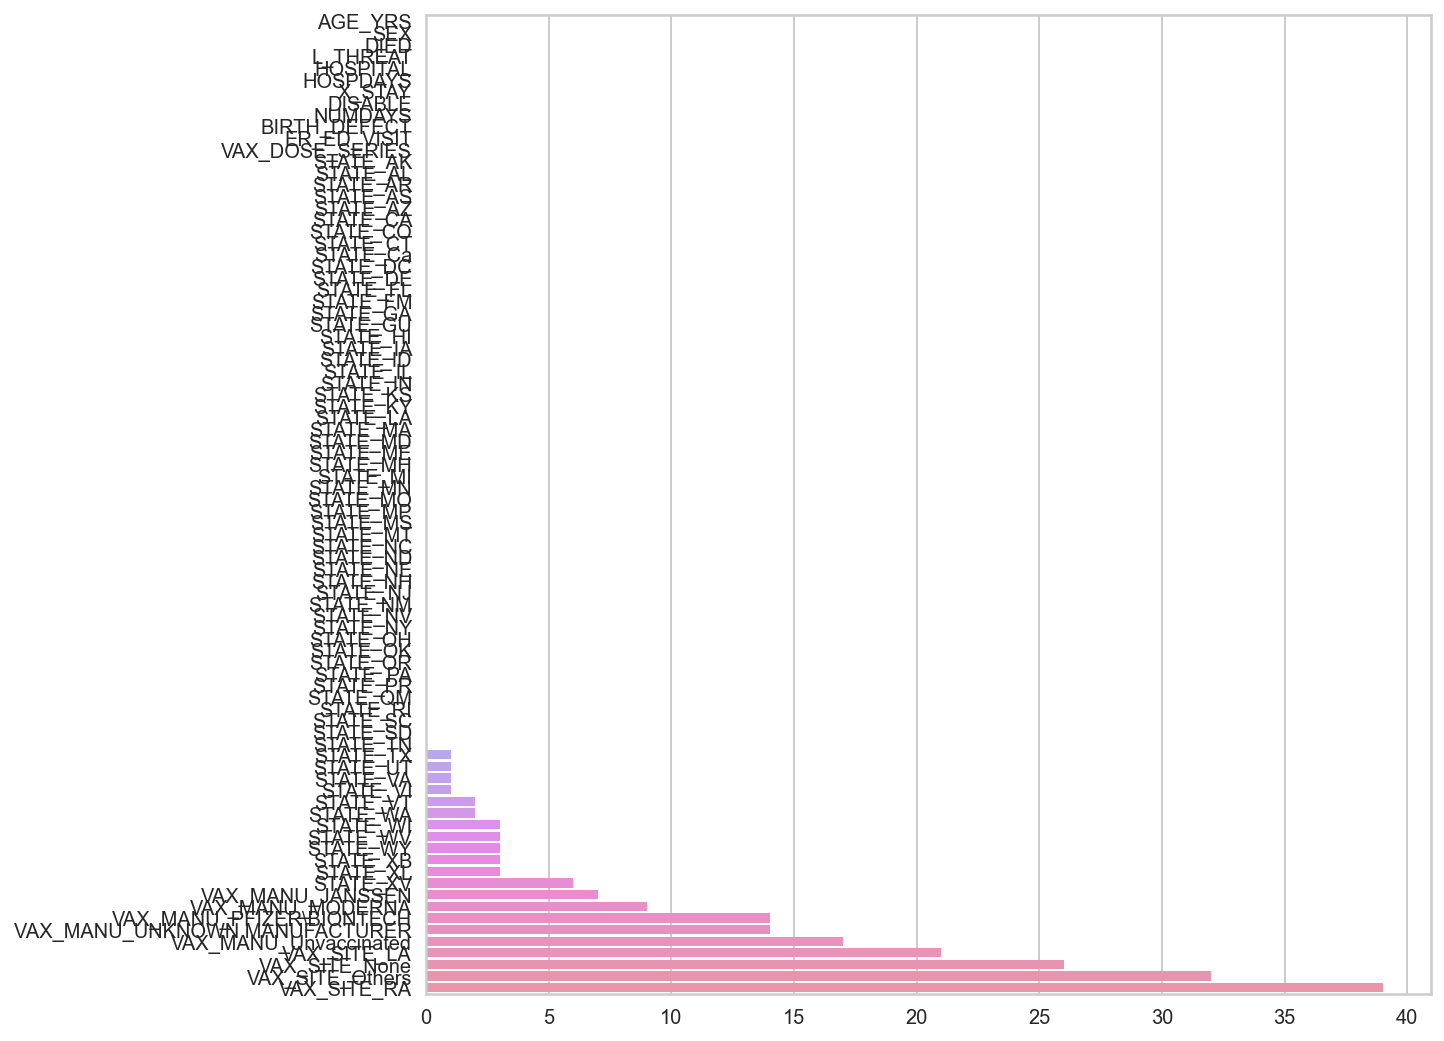

In [26]:
# LGBM with SMOTE
pipe_param_1 = {
    'smote__k_neighbors':[3, 5],
    'lgbm__objective':['binary'],
    'lgbm__max_depth':[1, 3],
    'lgbm__subsample':[0.7], 
    'lgbm__learning_rate':[0.1,0.5],
    'lgbm__n_estimators':[20,30],
    'lgbm__min_child_samples':[10,20],
    'lgbm__num_leaves':[6,13]
}

# LGBM with ADASYN
pipe_param_2 = {
    'adasyn__n_neighbors':[5],
    'lgbm__objective':['binary'],
    'lgbm__max_depth':[1, 3],
    'lgbm__subsample':[0.7], 
    'lgbm__learning_rate':[0.1,0.5],
    'lgbm__n_estimators':[20,30],
    'lgbm__min_child_samples':[10,20],
    'lgbm__num_leaves':[6,13]
}

# LGBM w/o resamplers
pipe_param_3 = {
    'lgbm__objective':['binary'],
    'lgbm__max_depth':[1, 3],
    'lgbm__subsample':[0.7], 
    'lgbm__learning_rate':[0.1,0.5],
    'lgbm__n_estimators':[20,30],
    'lgbm__min_child_samples':[10,20],
    'lgbm__num_leaves':[6,13]
}

gscv_creator_3(model='lgbm', pipe_params_1 = pipe_param_1, pipe_params_2 = pipe_param_2, pipe_params_3 = pipe_param_3, 
               resampler_1='smote', resampler_2='adasyn', n_jobs=-1)

# 5.5 Extreme Gradient Boost Model 

In [ ]:
# XGB with SMOTE
pipe_param_1 = {
    'smote__k_neighbors':[3,5],
    'xgb__objective':['binary:logistic'],
    'xgb__max_depth':[None, 2, 3],
    'xgb__subsample':[0.5], #prevent overfitting
    'xgb__learning_rate':[0.9,0.5, 0.1],
    'xgb__n_estimators':[200,300],

}

# XGB with Adasyn
pipe_param_2 = {
    'adasyn__n_neighbors':[3,5],
    'xgb__objective':['binary:logistic'],
    'xgb__max_depth':[None, 2, 3],
    'xgb__subsample':[0.5], #prevent overfitting
    'xgb__learning_rate':[0.9,0.5, 0.1],
    'xgb__n_estimators':[200,300],

}

# XGB w/o resamplers
pipe_param_3 = {
    'xgb__objective':['binary:logistic'],
    'xgb__max_depth':[None, 2, 3],
    'xgb__subsample':[0.5], #prevent overfitting
    'xgb__learning_rate':[0.9,0.5, 0.1],
    'xgb__n_estimators':[200,300]
   
}

gscv_creator_3(model='xgb', pipe_params_1 = pipe_param_1, pipe_params_2 = pipe_param_2, pipe_params_3 = pipe_param_3, 
               resampler_1='smote', resampler_2='adasyn', n_jobs=-1)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 29.7min finished


[13:13:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.6min


# 6. Neural Networks

In this step, we will be attempting to use neural network to make a predictive model. Metrics are created to complement the models. 

# 6.1 Pre-model processing 

In this step, we will create a function for calculating the recall, precision and f1 score for the models. We will also be assigning sample weights to balance the effect of the classes to resolve the imbalance issue. This is an alternate approach for smote and adasyn. 

In [28]:
# Create function for getting recall, precision and F1

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [29]:
# Assign sample weights to the outcome variables

sample_weights = compute_sample_weight('balanced', y_train)

# 6.2 Two-Layered Neural Network Model

In [30]:
model = Sequential()
model.add(Dense(84, input_shape=(84,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_m,precision_m, recall_m])


In [31]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=2000, 
                    batch_size=2000,
                    shuffle=True, sample_weight = sample_weights)

Epoch 1/2000
8/8 [==============================] - 2s 57ms/step - loss: 0.6448 - accuracy: 0.7735 - f1_m: 0.3065 - precision_m: 0.2422 - recall_m: 0.4187 - val_loss: 0.6091 - val_accuracy: 0.7668 - val_f1_m: 0.3049 - val_precision_m: 0.2338 - val_recall_m: 0.4402
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.6395 - accuracy: 0.7585 - f1_m: 0.3146 - precision_m: 0.2384 - recall_m: 0.4643 - val_loss: 0.6258 - val_accuracy: 0.7514 - val_f1_m: 0.3004 - val_precision_m: 0.2239 - val_recall_m: 0.4583
Epoch 3/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.6356 - accuracy: 0.7582 - f1_m: 0.3164 - precision_m: 0.2394 - recall_m: 0.4674 - val_loss: 0.6111 - val_accuracy: 0.7640 - val_f1_m: 0.3089 - val_precision_m: 0.2342 - val_recall_m: 0.4551
Epoch 4/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.6320 - accuracy: 0.7687 - f1_m: 0.3207 - precision_m: 0.2476 - recall_m: 0.4564 - val_loss: 0.5963 - val_accuracy: 0.7734 - val_f1

Epoch 32/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.5666 - accuracy: 0.7882 - f1_m: 0.4466 - precision_m: 0.3251 - recall_m: 0.7135 - val_loss: 0.5489 - val_accuracy: 0.7897 - val_f1_m: 0.4398 - val_precision_m: 0.3182 - val_recall_m: 0.7141
Epoch 33/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.5650 - accuracy: 0.7895 - f1_m: 0.4473 - precision_m: 0.3268 - recall_m: 0.7111 - val_loss: 0.5429 - val_accuracy: 0.7928 - val_f1_m: 0.4429 - val_precision_m: 0.3217 - val_recall_m: 0.7130
Epoch 34/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.5634 - accuracy: 0.7874 - f1_m: 0.4494 - precision_m: 0.3261 - recall_m: 0.7247 - val_loss: 0.5514 - val_accuracy: 0.7878 - val_f1_m: 0.4390 - val_precision_m: 0.3168 - val_recall_m: 0.7175
Epoch 35/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.5615 - accuracy: 0.7886 - f1_m: 0.4484 - precision_m: 0.3262 - recall_m: 0.7183 - val_loss: 0.5385 - val_accuracy: 0.7927 - va

Epoch 63/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.5099 - accuracy: 0.7970 - f1_m: 0.4849 - precision_m: 0.3486 - recall_m: 0.7979 - val_loss: 0.5041 - val_accuracy: 0.7962 - val_f1_m: 0.4758 - val_precision_m: 0.3400 - val_recall_m: 0.7971
Epoch 64/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.5084 - accuracy: 0.7985 - f1_m: 0.4861 - precision_m: 0.3500 - recall_m: 0.7965 - val_loss: 0.4956 - val_accuracy: 0.8018 - val_f1_m: 0.4805 - val_precision_m: 0.3465 - val_recall_m: 0.7881
Epoch 65/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.5071 - accuracy: 0.8031 - f1_m: 0.4887 - precision_m: 0.3551 - recall_m: 0.7867 - val_loss: 0.4921 - val_accuracy: 0.8024 - val_f1_m: 0.4797 - val_precision_m: 0.3465 - val_recall_m: 0.7836
Epoch 66/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.5057 - accuracy: 0.8039 - f1_m: 0.4902 - precision_m: 0.3560 - recall_m: 0.7881 - val_loss: 0.4945 - val_accuracy: 0.8021 - va

Epoch 94/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4697 - accuracy: 0.8075 - f1_m: 0.5050 - precision_m: 0.3651 - recall_m: 0.8193 - val_loss: 0.4526 - val_accuracy: 0.8081 - val_f1_m: 0.4911 - val_precision_m: 0.3547 - val_recall_m: 0.8010
Epoch 95/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.4687 - accuracy: 0.8080 - f1_m: 0.5036 - precision_m: 0.3648 - recall_m: 0.8177 - val_loss: 0.4686 - val_accuracy: 0.7980 - val_f1_m: 0.4863 - val_precision_m: 0.3457 - val_recall_m: 0.8230
Epoch 96/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4676 - accuracy: 0.7994 - f1_m: 0.4978 - precision_m: 0.3560 - recall_m: 0.8303 - val_loss: 0.4678 - val_accuracy: 0.7987 - val_f1_m: 0.4870 - val_precision_m: 0.3464 - val_recall_m: 0.8230
Epoch 97/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4666 - accuracy: 0.8093 - f1_m: 0.5057 - precision_m: 0.3668 - recall_m: 0.8155 - val_loss: 0.4505 - val_accuracy: 0.8080 - va

Epoch 125/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.4399 - accuracy: 0.8152 - f1_m: 0.5180 - precision_m: 0.3767 - recall_m: 0.8290 - val_loss: 0.4376 - val_accuracy: 0.8122 - val_f1_m: 0.5070 - val_precision_m: 0.3663 - val_recall_m: 0.8276
Epoch 126/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4391 - accuracy: 0.8121 - f1_m: 0.5142 - precision_m: 0.3724 - recall_m: 0.8309 - val_loss: 0.4386 - val_accuracy: 0.8122 - val_f1_m: 0.5069 - val_precision_m: 0.3656 - val_recall_m: 0.8298
Epoch 127/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4387 - accuracy: 0.8091 - f1_m: 0.5123 - precision_m: 0.3692 - recall_m: 0.8375 - val_loss: 0.4404 - val_accuracy: 0.8114 - val_f1_m: 0.5065 - val_precision_m: 0.3651 - val_recall_m: 0.8309
Epoch 128/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4378 - accuracy: 0.8144 - f1_m: 0.5163 - precision_m: 0.3751 - recall_m: 0.8291 - val_loss: 0.4302 - val_accuracy: 0.8169 

Epoch 156/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.4211 - accuracy: 0.8190 - f1_m: 0.5267 - precision_m: 0.3834 - recall_m: 0.8414 - val_loss: 0.4279 - val_accuracy: 0.8231 - val_f1_m: 0.5213 - val_precision_m: 0.3814 - val_recall_m: 0.8274
Epoch 157/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.4205 - accuracy: 0.8251 - f1_m: 0.5319 - precision_m: 0.3914 - recall_m: 0.8313 - val_loss: 0.4160 - val_accuracy: 0.8300 - val_f1_m: 0.5295 - val_precision_m: 0.3918 - val_recall_m: 0.8206
Epoch 158/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4200 - accuracy: 0.8266 - f1_m: 0.5348 - precision_m: 0.3948 - recall_m: 0.8307 - val_loss: 0.4209 - val_accuracy: 0.8277 - val_f1_m: 0.5267 - val_precision_m: 0.3876 - val_recall_m: 0.8252
Epoch 159/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.4195 - accuracy: 0.8222 - f1_m: 0.5293 - precision_m: 0.3874 - recall_m: 0.8364 - val_loss: 0.4229 - val_accuracy: 0.8255 

Epoch 187/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.4077 - accuracy: 0.8348 - f1_m: 0.5472 - precision_m: 0.4074 - recall_m: 0.8366 - val_loss: 0.4073 - val_accuracy: 0.8352 - val_f1_m: 0.5394 - val_precision_m: 0.4005 - val_recall_m: 0.8299
Epoch 188/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.4075 - accuracy: 0.8277 - f1_m: 0.5407 - precision_m: 0.3974 - recall_m: 0.8481 - val_loss: 0.4195 - val_accuracy: 0.8288 - val_f1_m: 0.5336 - val_precision_m: 0.3921 - val_recall_m: 0.8391
Epoch 189/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.4068 - accuracy: 0.8311 - f1_m: 0.5440 - precision_m: 0.4023 - recall_m: 0.8420 - val_loss: 0.4021 - val_accuracy: 0.8380 - val_f1_m: 0.5409 - val_precision_m: 0.4036 - val_recall_m: 0.8229
Epoch 190/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.4067 - accuracy: 0.8391 - f1_m: 0.5522 - precision_m: 0.4142 - recall_m: 0.8293 - val_loss: 0.4062 - val_accuracy: 0.8358 

Epoch 218/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3977 - accuracy: 0.8424 - f1_m: 0.5597 - precision_m: 0.4209 - recall_m: 0.8362 - val_loss: 0.4019 - val_accuracy: 0.8391 - val_f1_m: 0.5445 - val_precision_m: 0.4063 - val_recall_m: 0.8286
Epoch 219/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3975 - accuracy: 0.8353 - f1_m: 0.5513 - precision_m: 0.4095 - recall_m: 0.8447 - val_loss: 0.4062 - val_accuracy: 0.8358 - val_f1_m: 0.5412 - val_precision_m: 0.4021 - val_recall_m: 0.8320
Epoch 220/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3971 - accuracy: 0.8403 - f1_m: 0.5574 - precision_m: 0.4173 - recall_m: 0.8397 - val_loss: 0.3956 - val_accuracy: 0.8438 - val_f1_m: 0.5507 - val_precision_m: 0.4138 - val_recall_m: 0.8264
Epoch 221/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3968 - accuracy: 0.8407 - f1_m: 0.5578 - precision_m: 0.4179 - recall_m: 0.8388 - val_loss: 0.4044 - val_accuracy: 0.8380 

Epoch 249/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3901 - accuracy: 0.8435 - f1_m: 0.5658 - precision_m: 0.4240 - recall_m: 0.8524 - val_loss: 0.3976 - val_accuracy: 0.8440 - val_f1_m: 0.5515 - val_precision_m: 0.4140 - val_recall_m: 0.8295
Epoch 250/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3900 - accuracy: 0.8478 - f1_m: 0.5693 - precision_m: 0.4311 - recall_m: 0.8390 - val_loss: 0.3875 - val_accuracy: 0.8478 - val_f1_m: 0.5557 - val_precision_m: 0.4201 - val_recall_m: 0.8239
Epoch 251/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3896 - accuracy: 0.8461 - f1_m: 0.5673 - precision_m: 0.4278 - recall_m: 0.8429 - val_loss: 0.3994 - val_accuracy: 0.8424 - val_f1_m: 0.5490 - val_precision_m: 0.4112 - val_recall_m: 0.8295
Epoch 252/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3894 - accuracy: 0.8430 - f1_m: 0.5649 - precision_m: 0.4226 - recall_m: 0.8522 - val_loss: 0.3960 - val_accuracy: 0.8444 

Epoch 280/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3841 - accuracy: 0.8495 - f1_m: 0.5730 - precision_m: 0.4342 - recall_m: 0.8433 - val_loss: 0.3891 - val_accuracy: 0.8466 - val_f1_m: 0.5546 - val_precision_m: 0.4178 - val_recall_m: 0.8273
Epoch 281/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3840 - accuracy: 0.8498 - f1_m: 0.5742 - precision_m: 0.4355 - recall_m: 0.8439 - val_loss: 0.3877 - val_accuracy: 0.8478 - val_f1_m: 0.5562 - val_precision_m: 0.4200 - val_recall_m: 0.8261
Epoch 282/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3841 - accuracy: 0.8472 - f1_m: 0.5704 - precision_m: 0.4301 - recall_m: 0.8480 - val_loss: 0.3917 - val_accuracy: 0.8446 - val_f1_m: 0.5524 - val_precision_m: 0.4150 - val_recall_m: 0.8295
Epoch 283/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3836 - accuracy: 0.8505 - f1_m: 0.5755 - precision_m: 0.4365 - recall_m: 0.8456 - val_loss: 0.3858 - val_accuracy: 0.8496 

Epoch 311/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3795 - accuracy: 0.8514 - f1_m: 0.5765 - precision_m: 0.4378 - recall_m: 0.8445 - val_loss: 0.3909 - val_accuracy: 0.8461 - val_f1_m: 0.5549 - val_precision_m: 0.4185 - val_recall_m: 0.8272
Epoch 312/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3794 - accuracy: 0.8510 - f1_m: 0.5770 - precision_m: 0.4377 - recall_m: 0.8481 - val_loss: 0.3832 - val_accuracy: 0.8499 - val_f1_m: 0.5605 - val_precision_m: 0.4252 - val_recall_m: 0.8261
Epoch 313/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3793 - accuracy: 0.8529 - f1_m: 0.5791 - precision_m: 0.4408 - recall_m: 0.8463 - val_loss: 0.3860 - val_accuracy: 0.8484 - val_f1_m: 0.5581 - val_precision_m: 0.4224 - val_recall_m: 0.8261
Epoch 314/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3792 - accuracy: 0.8543 - f1_m: 0.5800 - precision_m: 0.4426 - recall_m: 0.8423 - val_loss: 0.3816 - val_accuracy: 0.8508 

Epoch 342/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3757 - accuracy: 0.8554 - f1_m: 0.5835 - precision_m: 0.4458 - recall_m: 0.8457 - val_loss: 0.3859 - val_accuracy: 0.8490 - val_f1_m: 0.5605 - val_precision_m: 0.4248 - val_recall_m: 0.8284
Epoch 343/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3757 - accuracy: 0.8512 - f1_m: 0.5772 - precision_m: 0.4378 - recall_m: 0.8484 - val_loss: 0.3830 - val_accuracy: 0.8508 - val_f1_m: 0.5630 - val_precision_m: 0.4276 - val_recall_m: 0.8284
Epoch 344/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.3755 - accuracy: 0.8544 - f1_m: 0.5816 - precision_m: 0.4430 - recall_m: 0.8477 - val_loss: 0.3859 - val_accuracy: 0.8487 - val_f1_m: 0.5596 - val_precision_m: 0.4233 - val_recall_m: 0.8295
Epoch 345/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3753 - accuracy: 0.8537 - f1_m: 0.5812 - precision_m: 0.4426 - recall_m: 0.8476 - val_loss: 0.3812 - val_accuracy: 0.8511 

Epoch 373/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3729 - accuracy: 0.8583 - f1_m: 0.5872 - precision_m: 0.4518 - recall_m: 0.8408 - val_loss: 0.3698 - val_accuracy: 0.8565 - val_f1_m: 0.5706 - val_precision_m: 0.4370 - val_recall_m: 0.8251
Epoch 374/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.3722 - accuracy: 0.8573 - f1_m: 0.5868 - precision_m: 0.4501 - recall_m: 0.8446 - val_loss: 0.3879 - val_accuracy: 0.8461 - val_f1_m: 0.5563 - val_precision_m: 0.4197 - val_recall_m: 0.8295
Epoch 375/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3723 - accuracy: 0.8520 - f1_m: 0.5793 - precision_m: 0.4394 - recall_m: 0.8508 - val_loss: 0.3808 - val_accuracy: 0.8516 - val_f1_m: 0.5637 - val_precision_m: 0.4285 - val_recall_m: 0.8273
Epoch 376/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3720 - accuracy: 0.8586 - f1_m: 0.5880 - precision_m: 0.4518 - recall_m: 0.8425 - val_loss: 0.3773 - val_accuracy: 0.8533 

Epoch 404/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3692 - accuracy: 0.8578 - f1_m: 0.5866 - precision_m: 0.4496 - recall_m: 0.8443 - val_loss: 0.3831 - val_accuracy: 0.8499 - val_f1_m: 0.5615 - val_precision_m: 0.4258 - val_recall_m: 0.8285
Epoch 405/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3691 - accuracy: 0.8558 - f1_m: 0.5844 - precision_m: 0.4465 - recall_m: 0.8470 - val_loss: 0.3789 - val_accuracy: 0.8519 - val_f1_m: 0.5642 - val_precision_m: 0.4290 - val_recall_m: 0.8273
Epoch 406/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3691 - accuracy: 0.8590 - f1_m: 0.5885 - precision_m: 0.4523 - recall_m: 0.8441 - val_loss: 0.3732 - val_accuracy: 0.8546 - val_f1_m: 0.5679 - val_precision_m: 0.4332 - val_recall_m: 0.8273
Epoch 407/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3690 - accuracy: 0.8582 - f1_m: 0.5874 - precision_m: 0.4511 - recall_m: 0.8434 - val_loss: 0.3781 - val_accuracy: 0.8516 

Epoch 435/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3665 - accuracy: 0.8592 - f1_m: 0.5894 - precision_m: 0.4527 - recall_m: 0.8452 - val_loss: 0.3763 - val_accuracy: 0.8536 - val_f1_m: 0.5664 - val_precision_m: 0.4316 - val_recall_m: 0.8273
Epoch 436/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3666 - accuracy: 0.8601 - f1_m: 0.5904 - precision_m: 0.4550 - recall_m: 0.8429 - val_loss: 0.3767 - val_accuracy: 0.8525 - val_f1_m: 0.5650 - val_precision_m: 0.4299 - val_recall_m: 0.8273
Epoch 437/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3665 - accuracy: 0.8577 - f1_m: 0.5859 - precision_m: 0.4493 - recall_m: 0.8435 - val_loss: 0.3810 - val_accuracy: 0.8500 - val_f1_m: 0.5624 - val_precision_m: 0.4264 - val_recall_m: 0.8298
Epoch 438/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3663 - accuracy: 0.8580 - f1_m: 0.5872 - precision_m: 0.4500 - recall_m: 0.8463 - val_loss: 0.3779 - val_accuracy: 0.8531 

Epoch 466/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.3644 - accuracy: 0.8614 - f1_m: 0.5925 - precision_m: 0.4571 - recall_m: 0.8438 - val_loss: 0.3757 - val_accuracy: 0.8538 - val_f1_m: 0.5665 - val_precision_m: 0.4322 - val_recall_m: 0.8251
Epoch 467/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3642 - accuracy: 0.8589 - f1_m: 0.5894 - precision_m: 0.4529 - recall_m: 0.8457 - val_loss: 0.3748 - val_accuracy: 0.8540 - val_f1_m: 0.5667 - val_precision_m: 0.4324 - val_recall_m: 0.8251
Epoch 468/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3641 - accuracy: 0.8592 - f1_m: 0.5899 - precision_m: 0.4532 - recall_m: 0.8458 - val_loss: 0.3768 - val_accuracy: 0.8547 - val_f1_m: 0.5701 - val_precision_m: 0.4352 - val_recall_m: 0.8298
Epoch 469/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3642 - accuracy: 0.8606 - f1_m: 0.5916 - precision_m: 0.4566 - recall_m: 0.8429 - val_loss: 0.3720 - val_accuracy: 0.8562 

Epoch 497/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.3622 - accuracy: 0.8613 - f1_m: 0.5923 - precision_m: 0.4573 - recall_m: 0.8421 - val_loss: 0.3745 - val_accuracy: 0.8556 - val_f1_m: 0.5704 - val_precision_m: 0.4360 - val_recall_m: 0.8275
Epoch 498/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3621 - accuracy: 0.8599 - f1_m: 0.5916 - precision_m: 0.4545 - recall_m: 0.8477 - val_loss: 0.3787 - val_accuracy: 0.8533 - val_f1_m: 0.5674 - val_precision_m: 0.4323 - val_recall_m: 0.8287
Epoch 499/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3620 - accuracy: 0.8605 - f1_m: 0.5913 - precision_m: 0.4555 - recall_m: 0.8431 - val_loss: 0.3699 - val_accuracy: 0.8577 - val_f1_m: 0.5729 - val_precision_m: 0.4397 - val_recall_m: 0.8251
Epoch 500/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3620 - accuracy: 0.8605 - f1_m: 0.5915 - precision_m: 0.4554 - recall_m: 0.8456 - val_loss: 0.3761 - val_accuracy: 0.8558 

Epoch 528/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3604 - accuracy: 0.8619 - f1_m: 0.5936 - precision_m: 0.4583 - recall_m: 0.8439 - val_loss: 0.3715 - val_accuracy: 0.8577 - val_f1_m: 0.5740 - val_precision_m: 0.4402 - val_recall_m: 0.8275
Epoch 529/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3602 - accuracy: 0.8609 - f1_m: 0.5933 - precision_m: 0.4566 - recall_m: 0.8474 - val_loss: 0.3782 - val_accuracy: 0.8549 - val_f1_m: 0.5700 - val_precision_m: 0.4350 - val_recall_m: 0.8298
Epoch 530/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3600 - accuracy: 0.8619 - f1_m: 0.5940 - precision_m: 0.4587 - recall_m: 0.8437 - val_loss: 0.3693 - val_accuracy: 0.8588 - val_f1_m: 0.5758 - val_precision_m: 0.4430 - val_recall_m: 0.8253
Epoch 531/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3599 - accuracy: 0.8624 - f1_m: 0.5949 - precision_m: 0.4597 - recall_m: 0.8439 - val_loss: 0.3762 - val_accuracy: 0.8559 

Epoch 559/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3582 - accuracy: 0.8617 - f1_m: 0.5939 - precision_m: 0.4583 - recall_m: 0.8449 - val_loss: 0.3761 - val_accuracy: 0.8558 - val_f1_m: 0.5712 - val_precision_m: 0.4364 - val_recall_m: 0.8298
Epoch 560/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3582 - accuracy: 0.8609 - f1_m: 0.5931 - precision_m: 0.4569 - recall_m: 0.8473 - val_loss: 0.3727 - val_accuracy: 0.8566 - val_f1_m: 0.5722 - val_precision_m: 0.4381 - val_recall_m: 0.8275
Epoch 561/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3580 - accuracy: 0.8613 - f1_m: 0.5936 - precision_m: 0.4574 - recall_m: 0.8465 - val_loss: 0.3697 - val_accuracy: 0.8581 - val_f1_m: 0.5747 - val_precision_m: 0.4411 - val_recall_m: 0.8275
Epoch 562/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3580 - accuracy: 0.8624 - f1_m: 0.5952 - precision_m: 0.4594 - recall_m: 0.8455 - val_loss: 0.3722 - val_accuracy: 0.8575 

Epoch 590/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3564 - accuracy: 0.8617 - f1_m: 0.5936 - precision_m: 0.4581 - recall_m: 0.8448 - val_loss: 0.3703 - val_accuracy: 0.8581 - val_f1_m: 0.5754 - val_precision_m: 0.4428 - val_recall_m: 0.8253
Epoch 591/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3563 - accuracy: 0.8614 - f1_m: 0.5934 - precision_m: 0.4574 - recall_m: 0.8463 - val_loss: 0.3704 - val_accuracy: 0.8574 - val_f1_m: 0.5736 - val_precision_m: 0.4406 - val_recall_m: 0.8253
Epoch 592/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3563 - accuracy: 0.8640 - f1_m: 0.5970 - precision_m: 0.4626 - recall_m: 0.8422 - val_loss: 0.3671 - val_accuracy: 0.8583 - val_f1_m: 0.5749 - val_precision_m: 0.4420 - val_recall_m: 0.8253
Epoch 593/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3561 - accuracy: 0.8627 - f1_m: 0.5954 - precision_m: 0.4602 - recall_m: 0.8442 - val_loss: 0.3725 - val_accuracy: 0.8574 

Epoch 621/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3549 - accuracy: 0.8594 - f1_m: 0.5914 - precision_m: 0.4534 - recall_m: 0.8517 - val_loss: 0.3771 - val_accuracy: 0.8556 - val_f1_m: 0.5723 - val_precision_m: 0.4373 - val_recall_m: 0.8320
Epoch 622/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3544 - accuracy: 0.8628 - f1_m: 0.5957 - precision_m: 0.4600 - recall_m: 0.8462 - val_loss: 0.3610 - val_accuracy: 0.8612 - val_f1_m: 0.5796 - val_precision_m: 0.4484 - val_recall_m: 0.8230
Epoch 623/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3549 - accuracy: 0.8662 - f1_m: 0.6009 - precision_m: 0.4675 - recall_m: 0.8417 - val_loss: 0.3692 - val_accuracy: 0.8581 - val_f1_m: 0.5754 - val_precision_m: 0.4420 - val_recall_m: 0.8275
Epoch 624/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3545 - accuracy: 0.8609 - f1_m: 0.5934 - precision_m: 0.4564 - recall_m: 0.8482 - val_loss: 0.3728 - val_accuracy: 0.8575 

Epoch 652/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3529 - accuracy: 0.8631 - f1_m: 0.5972 - precision_m: 0.4616 - recall_m: 0.8483 - val_loss: 0.3744 - val_accuracy: 0.8559 - val_f1_m: 0.5731 - val_precision_m: 0.4379 - val_recall_m: 0.8331
Epoch 653/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3532 - accuracy: 0.8602 - f1_m: 0.5938 - precision_m: 0.4559 - recall_m: 0.8526 - val_loss: 0.3716 - val_accuracy: 0.8586 - val_f1_m: 0.5770 - val_precision_m: 0.4434 - val_recall_m: 0.8298
Epoch 654/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3531 - accuracy: 0.8648 - f1_m: 0.5987 - precision_m: 0.4642 - recall_m: 0.8443 - val_loss: 0.3618 - val_accuracy: 0.8612 - val_f1_m: 0.5800 - val_precision_m: 0.4485 - val_recall_m: 0.8242
Epoch 655/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3529 - accuracy: 0.8641 - f1_m: 0.5982 - precision_m: 0.4634 - recall_m: 0.8442 - val_loss: 0.3705 - val_accuracy: 0.8580 

Epoch 683/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3512 - accuracy: 0.8614 - f1_m: 0.5943 - precision_m: 0.4575 - recall_m: 0.8496 - val_loss: 0.3666 - val_accuracy: 0.8602 - val_f1_m: 0.5787 - val_precision_m: 0.4463 - val_recall_m: 0.8264
Epoch 684/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3512 - accuracy: 0.8637 - f1_m: 0.5984 - precision_m: 0.4625 - recall_m: 0.8479 - val_loss: 0.3670 - val_accuracy: 0.8597 - val_f1_m: 0.5783 - val_precision_m: 0.4452 - val_recall_m: 0.8286
Epoch 685/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.3514 - accuracy: 0.8654 - f1_m: 0.6005 - precision_m: 0.4663 - recall_m: 0.8441 - val_loss: 0.3627 - val_accuracy: 0.8613 - val_f1_m: 0.5802 - val_precision_m: 0.4488 - val_recall_m: 0.8242
Epoch 686/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3516 - accuracy: 0.8593 - f1_m: 0.5916 - precision_m: 0.4536 - recall_m: 0.8523 - val_loss: 0.3800 - val_accuracy: 0.8538 

Epoch 714/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3497 - accuracy: 0.8626 - f1_m: 0.5970 - precision_m: 0.4600 - recall_m: 0.8512 - val_loss: 0.3691 - val_accuracy: 0.8581 - val_f1_m: 0.5759 - val_precision_m: 0.4421 - val_recall_m: 0.8297
Epoch 715/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3497 - accuracy: 0.8618 - f1_m: 0.5958 - precision_m: 0.4583 - recall_m: 0.8535 - val_loss: 0.3681 - val_accuracy: 0.8599 - val_f1_m: 0.5800 - val_precision_m: 0.4455 - val_recall_m: 0.8343
Epoch 716/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3498 - accuracy: 0.8646 - f1_m: 0.5989 - precision_m: 0.4644 - recall_m: 0.8448 - val_loss: 0.3633 - val_accuracy: 0.8594 - val_f1_m: 0.5770 - val_precision_m: 0.4449 - val_recall_m: 0.8241
Epoch 717/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3497 - accuracy: 0.8623 - f1_m: 0.5968 - precision_m: 0.4598 - recall_m: 0.8519 - val_loss: 0.3689 - val_accuracy: 0.8591 

Epoch 745/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3488 - accuracy: 0.8626 - f1_m: 0.5975 - precision_m: 0.4610 - recall_m: 0.8527 - val_loss: 0.3721 - val_accuracy: 0.8572 - val_f1_m: 0.5767 - val_precision_m: 0.4401 - val_recall_m: 0.8399
Epoch 746/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3481 - accuracy: 0.8640 - f1_m: 0.6002 - precision_m: 0.4636 - recall_m: 0.8516 - val_loss: 0.3567 - val_accuracy: 0.8621 - val_f1_m: 0.5802 - val_precision_m: 0.4497 - val_recall_m: 0.8207
Epoch 747/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3483 - accuracy: 0.8643 - f1_m: 0.6008 - precision_m: 0.4639 - recall_m: 0.8534 - val_loss: 0.3697 - val_accuracy: 0.8583 - val_f1_m: 0.5775 - val_precision_m: 0.4416 - val_recall_m: 0.8376
Epoch 748/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3480 - accuracy: 0.8609 - f1_m: 0.5956 - precision_m: 0.4568 - recall_m: 0.8561 - val_loss: 0.3677 - val_accuracy: 0.8593 

Epoch 776/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3466 - accuracy: 0.8641 - f1_m: 0.6003 - precision_m: 0.4636 - recall_m: 0.8529 - val_loss: 0.3675 - val_accuracy: 0.8591 - val_f1_m: 0.5791 - val_precision_m: 0.4439 - val_recall_m: 0.8365
Epoch 777/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3466 - accuracy: 0.8617 - f1_m: 0.5970 - precision_m: 0.4589 - recall_m: 0.8559 - val_loss: 0.3648 - val_accuracy: 0.8606 - val_f1_m: 0.5819 - val_precision_m: 0.4473 - val_recall_m: 0.8365
Epoch 778/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3468 - accuracy: 0.8664 - f1_m: 0.6032 - precision_m: 0.4684 - recall_m: 0.8483 - val_loss: 0.3590 - val_accuracy: 0.8624 - val_f1_m: 0.5819 - val_precision_m: 0.4500 - val_recall_m: 0.8263
Epoch 779/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3464 - accuracy: 0.8643 - f1_m: 0.6002 - precision_m: 0.4634 - recall_m: 0.8525 - val_loss: 0.3706 - val_accuracy: 0.8568 

Epoch 807/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3453 - accuracy: 0.8655 - f1_m: 0.6028 - precision_m: 0.4667 - recall_m: 0.8514 - val_loss: 0.3668 - val_accuracy: 0.8600 - val_f1_m: 0.5818 - val_precision_m: 0.4463 - val_recall_m: 0.8389
Epoch 808/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3453 - accuracy: 0.8634 - f1_m: 0.5975 - precision_m: 0.4607 - recall_m: 0.8530 - val_loss: 0.3659 - val_accuracy: 0.8600 - val_f1_m: 0.5811 - val_precision_m: 0.4463 - val_recall_m: 0.8365
Epoch 809/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3455 - accuracy: 0.8609 - f1_m: 0.5961 - precision_m: 0.4572 - recall_m: 0.8572 - val_loss: 0.3672 - val_accuracy: 0.8605 - val_f1_m: 0.5821 - val_precision_m: 0.4466 - val_recall_m: 0.8389
Epoch 810/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3457 - accuracy: 0.8678 - f1_m: 0.6047 - precision_m: 0.4713 - recall_m: 0.8447 - val_loss: 0.3558 - val_accuracy: 0.8640 

Epoch 838/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3440 - accuracy: 0.8641 - f1_m: 0.6008 - precision_m: 0.4636 - recall_m: 0.8541 - val_loss: 0.3665 - val_accuracy: 0.8597 - val_f1_m: 0.5813 - val_precision_m: 0.4458 - val_recall_m: 0.8389
Epoch 839/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3439 - accuracy: 0.8650 - f1_m: 0.6016 - precision_m: 0.4650 - recall_m: 0.8522 - val_loss: 0.3616 - val_accuracy: 0.8615 - val_f1_m: 0.5829 - val_precision_m: 0.4491 - val_recall_m: 0.8342
Epoch 840/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3438 - accuracy: 0.8642 - f1_m: 0.5999 - precision_m: 0.4632 - recall_m: 0.8527 - val_loss: 0.3661 - val_accuracy: 0.8600 - val_f1_m: 0.5818 - val_precision_m: 0.4463 - val_recall_m: 0.8389
Epoch 841/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3438 - accuracy: 0.8647 - f1_m: 0.6017 - precision_m: 0.4651 - recall_m: 0.8526 - val_loss: 0.3604 - val_accuracy: 0.8627 

Epoch 869/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3427 - accuracy: 0.8680 - f1_m: 0.6060 - precision_m: 0.4715 - recall_m: 0.8482 - val_loss: 0.3579 - val_accuracy: 0.8637 - val_f1_m: 0.5856 - val_precision_m: 0.4528 - val_recall_m: 0.8320
Epoch 870/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3424 - accuracy: 0.8646 - f1_m: 0.6017 - precision_m: 0.4648 - recall_m: 0.8540 - val_loss: 0.3679 - val_accuracy: 0.8588 - val_f1_m: 0.5801 - val_precision_m: 0.4444 - val_recall_m: 0.8389
Epoch 871/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3426 - accuracy: 0.8621 - f1_m: 0.5982 - precision_m: 0.4599 - recall_m: 0.8569 - val_loss: 0.3634 - val_accuracy: 0.8613 - val_f1_m: 0.5831 - val_precision_m: 0.4488 - val_recall_m: 0.8355
Epoch 872/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3425 - accuracy: 0.8655 - f1_m: 0.6024 - precision_m: 0.4663 - recall_m: 0.8524 - val_loss: 0.3636 - val_accuracy: 0.8613 

Epoch 900/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3413 - accuracy: 0.8645 - f1_m: 0.6008 - precision_m: 0.4642 - recall_m: 0.8533 - val_loss: 0.3612 - val_accuracy: 0.8621 - val_f1_m: 0.5845 - val_precision_m: 0.4505 - val_recall_m: 0.8355
Epoch 901/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3413 - accuracy: 0.8660 - f1_m: 0.6034 - precision_m: 0.4676 - recall_m: 0.8515 - val_loss: 0.3598 - val_accuracy: 0.8624 - val_f1_m: 0.5860 - val_precision_m: 0.4517 - val_recall_m: 0.8378
Epoch 902/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3412 - accuracy: 0.8648 - f1_m: 0.6020 - precision_m: 0.4651 - recall_m: 0.8541 - val_loss: 0.3645 - val_accuracy: 0.8613 - val_f1_m: 0.5841 - val_precision_m: 0.4494 - val_recall_m: 0.8378
Epoch 903/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3411 - accuracy: 0.8653 - f1_m: 0.6025 - precision_m: 0.4663 - recall_m: 0.8525 - val_loss: 0.3617 - val_accuracy: 0.8624 

Epoch 931/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3400 - accuracy: 0.8653 - f1_m: 0.6020 - precision_m: 0.4660 - recall_m: 0.8530 - val_loss: 0.3673 - val_accuracy: 0.8594 - val_f1_m: 0.5812 - val_precision_m: 0.4457 - val_recall_m: 0.8389
Epoch 932/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3401 - accuracy: 0.8622 - f1_m: 0.5987 - precision_m: 0.4597 - recall_m: 0.8587 - val_loss: 0.3641 - val_accuracy: 0.8606 - val_f1_m: 0.5823 - val_precision_m: 0.4480 - val_recall_m: 0.8355
Epoch 933/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3401 - accuracy: 0.8674 - f1_m: 0.6055 - precision_m: 0.4702 - recall_m: 0.8515 - val_loss: 0.3573 - val_accuracy: 0.8635 - val_f1_m: 0.5853 - val_precision_m: 0.4524 - val_recall_m: 0.8319
Epoch 934/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3399 - accuracy: 0.8662 - f1_m: 0.6039 - precision_m: 0.4677 - recall_m: 0.8525 - val_loss: 0.3632 - val_accuracy: 0.8615 

Epoch 962/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3388 - accuracy: 0.8685 - f1_m: 0.6078 - precision_m: 0.4730 - recall_m: 0.8518 - val_loss: 0.3616 - val_accuracy: 0.8618 - val_f1_m: 0.5836 - val_precision_m: 0.4495 - val_recall_m: 0.8353
Epoch 963/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3387 - accuracy: 0.8635 - f1_m: 0.6009 - precision_m: 0.4626 - recall_m: 0.8584 - val_loss: 0.3644 - val_accuracy: 0.8605 - val_f1_m: 0.5817 - val_precision_m: 0.4468 - val_recall_m: 0.8366
Epoch 964/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3386 - accuracy: 0.8648 - f1_m: 0.6024 - precision_m: 0.4653 - recall_m: 0.8561 - val_loss: 0.3581 - val_accuracy: 0.8631 - val_f1_m: 0.5850 - val_precision_m: 0.4517 - val_recall_m: 0.8331
Epoch 965/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3387 - accuracy: 0.8669 - f1_m: 0.6049 - precision_m: 0.4694 - recall_m: 0.8524 - val_loss: 0.3603 - val_accuracy: 0.8624 

Epoch 993/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3378 - accuracy: 0.8654 - f1_m: 0.6030 - precision_m: 0.4663 - recall_m: 0.8536 - val_loss: 0.3604 - val_accuracy: 0.8616 - val_f1_m: 0.5834 - val_precision_m: 0.4493 - val_recall_m: 0.8353
Epoch 994/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3379 - accuracy: 0.8646 - f1_m: 0.6021 - precision_m: 0.4645 - recall_m: 0.8569 - val_loss: 0.3655 - val_accuracy: 0.8597 - val_f1_m: 0.5810 - val_precision_m: 0.4451 - val_recall_m: 0.8391
Epoch 995/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3375 - accuracy: 0.8662 - f1_m: 0.6050 - precision_m: 0.4688 - recall_m: 0.8547 - val_loss: 0.3560 - val_accuracy: 0.8638 - val_f1_m: 0.5854 - val_precision_m: 0.4529 - val_recall_m: 0.8308
Epoch 996/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3375 - accuracy: 0.8668 - f1_m: 0.6053 - precision_m: 0.4694 - recall_m: 0.8530 - val_loss: 0.3624 - val_accuracy: 0.8610 

Epoch 1024/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3363 - accuracy: 0.8675 - f1_m: 0.6072 - precision_m: 0.4709 - recall_m: 0.8554 - val_loss: 0.3605 - val_accuracy: 0.8619 - val_f1_m: 0.5835 - val_precision_m: 0.4493 - val_recall_m: 0.8353
Epoch 1025/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3365 - accuracy: 0.8631 - f1_m: 0.6008 - precision_m: 0.4617 - recall_m: 0.8609 - val_loss: 0.3640 - val_accuracy: 0.8600 - val_f1_m: 0.5814 - val_precision_m: 0.4461 - val_recall_m: 0.8378
Epoch 1026/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3362 - accuracy: 0.8660 - f1_m: 0.6044 - precision_m: 0.4673 - recall_m: 0.8555 - val_loss: 0.3549 - val_accuracy: 0.8644 - val_f1_m: 0.5860 - val_precision_m: 0.4534 - val_recall_m: 0.8308
Epoch 1027/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3363 - accuracy: 0.8684 - f1_m: 0.6082 - precision_m: 0.4727 - recall_m: 0.8534 - val_loss: 0.3599 - val_accuracy: 0.8

Epoch 1055/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3352 - accuracy: 0.8653 - f1_m: 0.6036 - precision_m: 0.4663 - recall_m: 0.8570 - val_loss: 0.3585 - val_accuracy: 0.8622 - val_f1_m: 0.5833 - val_precision_m: 0.4497 - val_recall_m: 0.8331
Epoch 1056/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3352 - accuracy: 0.8662 - f1_m: 0.6049 - precision_m: 0.4676 - recall_m: 0.8576 - val_loss: 0.3596 - val_accuracy: 0.8625 - val_f1_m: 0.5834 - val_precision_m: 0.4498 - val_recall_m: 0.8331
Epoch 1057/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3353 - accuracy: 0.8677 - f1_m: 0.6076 - precision_m: 0.4717 - recall_m: 0.8552 - val_loss: 0.3600 - val_accuracy: 0.8619 - val_f1_m: 0.5842 - val_precision_m: 0.4497 - val_recall_m: 0.8366
Epoch 1058/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3351 - accuracy: 0.8656 - f1_m: 0.6037 - precision_m: 0.4664 - recall_m: 0.8579 - val_loss: 0.3617 - val_accuracy: 0.8

Epoch 1086/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3343 - accuracy: 0.8635 - f1_m: 0.6014 - precision_m: 0.4624 - recall_m: 0.8617 - val_loss: 0.3616 - val_accuracy: 0.8610 - val_f1_m: 0.5828 - val_precision_m: 0.4478 - val_recall_m: 0.8377
Epoch 1087/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3342 - accuracy: 0.8690 - f1_m: 0.6091 - precision_m: 0.4740 - recall_m: 0.8537 - val_loss: 0.3510 - val_accuracy: 0.8666 - val_f1_m: 0.5883 - val_precision_m: 0.4577 - val_recall_m: 0.8261
Epoch 1088/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.3339 - accuracy: 0.8679 - f1_m: 0.6077 - precision_m: 0.4714 - recall_m: 0.8556 - val_loss: 0.3626 - val_accuracy: 0.8609 - val_f1_m: 0.5829 - val_precision_m: 0.4476 - val_recall_m: 0.8389
Epoch 1089/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3340 - accuracy: 0.8648 - f1_m: 0.6040 - precision_m: 0.4660 - recall_m: 0.8614 - val_loss: 0.3627 - val_accuracy: 0.8

Epoch 1117/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3332 - accuracy: 0.8658 - f1_m: 0.6059 - precision_m: 0.4677 - recall_m: 0.8613 - val_loss: 0.3594 - val_accuracy: 0.8624 - val_f1_m: 0.5848 - val_precision_m: 0.4501 - val_recall_m: 0.8378
Epoch 1118/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3330 - accuracy: 0.8672 - f1_m: 0.6079 - precision_m: 0.4703 - recall_m: 0.8604 - val_loss: 0.3534 - val_accuracy: 0.8649 - val_f1_m: 0.5880 - val_precision_m: 0.4547 - val_recall_m: 0.8344
Epoch 1119/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3329 - accuracy: 0.8680 - f1_m: 0.6091 - precision_m: 0.4722 - recall_m: 0.8587 - val_loss: 0.3595 - val_accuracy: 0.8624 - val_f1_m: 0.5851 - val_precision_m: 0.4501 - val_recall_m: 0.8389
Epoch 1120/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3330 - accuracy: 0.8672 - f1_m: 0.6081 - precision_m: 0.4709 - recall_m: 0.8607 - val_loss: 0.3578 - val_accuracy: 0.8

Epoch 1148/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3321 - accuracy: 0.8653 - f1_m: 0.6048 - precision_m: 0.4664 - recall_m: 0.8623 - val_loss: 0.3605 - val_accuracy: 0.8621 - val_f1_m: 0.5847 - val_precision_m: 0.4496 - val_recall_m: 0.8389
Epoch 1149/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3320 - accuracy: 0.8680 - f1_m: 0.6090 - precision_m: 0.4725 - recall_m: 0.8590 - val_loss: 0.3539 - val_accuracy: 0.8652 - val_f1_m: 0.5885 - val_precision_m: 0.4553 - val_recall_m: 0.8344
Epoch 1150/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3319 - accuracy: 0.8687 - f1_m: 0.6108 - precision_m: 0.4737 - recall_m: 0.8599 - val_loss: 0.3587 - val_accuracy: 0.8624 - val_f1_m: 0.5844 - val_precision_m: 0.4499 - val_recall_m: 0.8366
Epoch 1151/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3320 - accuracy: 0.8646 - f1_m: 0.6042 - precision_m: 0.4647 - recall_m: 0.8641 - val_loss: 0.3613 - val_accuracy: 0.8

Epoch 1179/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3309 - accuracy: 0.8646 - f1_m: 0.6051 - precision_m: 0.4650 - recall_m: 0.8672 - val_loss: 0.3604 - val_accuracy: 0.8621 - val_f1_m: 0.5847 - val_precision_m: 0.4495 - val_recall_m: 0.8389
Epoch 1180/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3308 - accuracy: 0.8665 - f1_m: 0.6071 - precision_m: 0.4686 - recall_m: 0.8625 - val_loss: 0.3570 - val_accuracy: 0.8633 - val_f1_m: 0.5861 - val_precision_m: 0.4515 - val_recall_m: 0.8378
Epoch 1181/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3308 - accuracy: 0.8686 - f1_m: 0.6105 - precision_m: 0.4734 - recall_m: 0.8607 - val_loss: 0.3518 - val_accuracy: 0.8652 - val_f1_m: 0.5874 - val_precision_m: 0.4554 - val_recall_m: 0.8299
Epoch 1182/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3310 - accuracy: 0.8675 - f1_m: 0.6090 - precision_m: 0.4707 - recall_m: 0.8628 - val_loss: 0.3629 - val_accuracy: 0.8

Epoch 1210/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3298 - accuracy: 0.8687 - f1_m: 0.6117 - precision_m: 0.4739 - recall_m: 0.8629 - val_loss: 0.3562 - val_accuracy: 0.8633 - val_f1_m: 0.5855 - val_precision_m: 0.4514 - val_recall_m: 0.8355
Epoch 1211/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3301 - accuracy: 0.8657 - f1_m: 0.6064 - precision_m: 0.4670 - recall_m: 0.8657 - val_loss: 0.3591 - val_accuracy: 0.8624 - val_f1_m: 0.5851 - val_precision_m: 0.4500 - val_recall_m: 0.8389
Epoch 1212/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3298 - accuracy: 0.8675 - f1_m: 0.6086 - precision_m: 0.4705 - recall_m: 0.8623 - val_loss: 0.3547 - val_accuracy: 0.8650 - val_f1_m: 0.5878 - val_precision_m: 0.4544 - val_recall_m: 0.8344
Epoch 1213/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3299 - accuracy: 0.8701 - f1_m: 0.6131 - precision_m: 0.4763 - recall_m: 0.8612 - val_loss: 0.3541 - val_accuracy: 0.8

Epoch 1241/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3289 - accuracy: 0.8697 - f1_m: 0.6125 - precision_m: 0.4754 - recall_m: 0.8628 - val_loss: 0.3553 - val_accuracy: 0.8644 - val_f1_m: 0.5873 - val_precision_m: 0.4535 - val_recall_m: 0.8355
Epoch 1242/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3289 - accuracy: 0.8662 - f1_m: 0.6073 - precision_m: 0.4680 - recall_m: 0.8663 - val_loss: 0.3644 - val_accuracy: 0.8610 - val_f1_m: 0.5841 - val_precision_m: 0.4479 - val_recall_m: 0.8424
Epoch 1243/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3288 - accuracy: 0.8680 - f1_m: 0.6106 - precision_m: 0.4721 - recall_m: 0.8645 - val_loss: 0.3501 - val_accuracy: 0.8663 - val_f1_m: 0.5896 - val_precision_m: 0.4576 - val_recall_m: 0.8310
Epoch 1244/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3287 - accuracy: 0.8692 - f1_m: 0.6118 - precision_m: 0.4744 - recall_m: 0.8621 - val_loss: 0.3580 - val_accuracy: 0.8

Epoch 1272/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3280 - accuracy: 0.8672 - f1_m: 0.6083 - precision_m: 0.4701 - recall_m: 0.8658 - val_loss: 0.3553 - val_accuracy: 0.8641 - val_f1_m: 0.5872 - val_precision_m: 0.4535 - val_recall_m: 0.8355
Epoch 1273/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3279 - accuracy: 0.8699 - f1_m: 0.6134 - precision_m: 0.4758 - recall_m: 0.8639 - val_loss: 0.3549 - val_accuracy: 0.8641 - val_f1_m: 0.5865 - val_precision_m: 0.4529 - val_recall_m: 0.8344
Epoch 1274/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3278 - accuracy: 0.8687 - f1_m: 0.6115 - precision_m: 0.4735 - recall_m: 0.8640 - val_loss: 0.3566 - val_accuracy: 0.8637 - val_f1_m: 0.5868 - val_precision_m: 0.4523 - val_recall_m: 0.8378
Epoch 1275/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3279 - accuracy: 0.8663 - f1_m: 0.6075 - precision_m: 0.4683 - recall_m: 0.8655 - val_loss: 0.3574 - val_accuracy: 0.8

Epoch 1303/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3271 - accuracy: 0.8694 - f1_m: 0.6126 - precision_m: 0.4752 - recall_m: 0.8622 - val_loss: 0.3567 - val_accuracy: 0.8637 - val_f1_m: 0.5868 - val_precision_m: 0.4524 - val_recall_m: 0.8377
Epoch 1304/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3268 - accuracy: 0.8676 - f1_m: 0.6099 - precision_m: 0.4711 - recall_m: 0.8658 - val_loss: 0.3550 - val_accuracy: 0.8640 - val_f1_m: 0.5866 - val_precision_m: 0.4527 - val_recall_m: 0.8355
Epoch 1305/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3269 - accuracy: 0.8689 - f1_m: 0.6112 - precision_m: 0.4737 - recall_m: 0.8632 - val_loss: 0.3554 - val_accuracy: 0.8641 - val_f1_m: 0.5871 - val_precision_m: 0.4531 - val_recall_m: 0.8366
Epoch 1306/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3268 - accuracy: 0.8677 - f1_m: 0.6098 - precision_m: 0.4713 - recall_m: 0.8649 - val_loss: 0.3552 - val_accuracy: 0.8

Epoch 1334/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3261 - accuracy: 0.8691 - f1_m: 0.6131 - precision_m: 0.4746 - recall_m: 0.8669 - val_loss: 0.3511 - val_accuracy: 0.8652 - val_f1_m: 0.5869 - val_precision_m: 0.4549 - val_recall_m: 0.8297
Epoch 1335/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3259 - accuracy: 0.8690 - f1_m: 0.6126 - precision_m: 0.4748 - recall_m: 0.8652 - val_loss: 0.3591 - val_accuracy: 0.8619 - val_f1_m: 0.5844 - val_precision_m: 0.4493 - val_recall_m: 0.8389
Epoch 1336/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3261 - accuracy: 0.8670 - f1_m: 0.6103 - precision_m: 0.4710 - recall_m: 0.8678 - val_loss: 0.3534 - val_accuracy: 0.8638 - val_f1_m: 0.5864 - val_precision_m: 0.4525 - val_recall_m: 0.8355
Epoch 1337/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3259 - accuracy: 0.8684 - f1_m: 0.6122 - precision_m: 0.4731 - recall_m: 0.8679 - val_loss: 0.3553 - val_accuracy: 0.8

Epoch 1365/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3251 - accuracy: 0.8665 - f1_m: 0.6084 - precision_m: 0.4685 - recall_m: 0.8684 - val_loss: 0.3624 - val_accuracy: 0.8613 - val_f1_m: 0.5846 - val_precision_m: 0.4488 - val_recall_m: 0.8413
Epoch 1366/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3250 - accuracy: 0.8666 - f1_m: 0.6094 - precision_m: 0.4692 - recall_m: 0.8700 - val_loss: 0.3541 - val_accuracy: 0.8637 - val_f1_m: 0.5850 - val_precision_m: 0.4520 - val_recall_m: 0.8319
Epoch 1367/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3250 - accuracy: 0.8691 - f1_m: 0.6130 - precision_m: 0.4745 - recall_m: 0.8675 - val_loss: 0.3521 - val_accuracy: 0.8646 - val_f1_m: 0.5871 - val_precision_m: 0.4542 - val_recall_m: 0.8331
Epoch 1368/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3250 - accuracy: 0.8699 - f1_m: 0.6132 - precision_m: 0.4756 - recall_m: 0.8649 - val_loss: 0.3549 - val_accuracy: 0.8

Epoch 1396/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3242 - accuracy: 0.8668 - f1_m: 0.6091 - precision_m: 0.4693 - recall_m: 0.8684 - val_loss: 0.3582 - val_accuracy: 0.8619 - val_f1_m: 0.5855 - val_precision_m: 0.4498 - val_recall_m: 0.8413
Epoch 1397/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3242 - accuracy: 0.8694 - f1_m: 0.6137 - precision_m: 0.4751 - recall_m: 0.8677 - val_loss: 0.3497 - val_accuracy: 0.8655 - val_f1_m: 0.5885 - val_precision_m: 0.4558 - val_recall_m: 0.8331
Epoch 1398/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3242 - accuracy: 0.8702 - f1_m: 0.6151 - precision_m: 0.4770 - recall_m: 0.8665 - val_loss: 0.3583 - val_accuracy: 0.8619 - val_f1_m: 0.5845 - val_precision_m: 0.4494 - val_recall_m: 0.8389
Epoch 1399/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3242 - accuracy: 0.8660 - f1_m: 0.6086 - precision_m: 0.4686 - recall_m: 0.8693 - val_loss: 0.3583 - val_accuracy: 0.8

Epoch 1427/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3233 - accuracy: 0.8715 - f1_m: 0.6175 - precision_m: 0.4800 - recall_m: 0.8659 - val_loss: 0.3536 - val_accuracy: 0.8635 - val_f1_m: 0.5852 - val_precision_m: 0.4518 - val_recall_m: 0.8331
Epoch 1428/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3232 - accuracy: 0.8679 - f1_m: 0.6121 - precision_m: 0.4724 - recall_m: 0.8698 - val_loss: 0.3582 - val_accuracy: 0.8616 - val_f1_m: 0.5851 - val_precision_m: 0.4493 - val_recall_m: 0.8413
Epoch 1429/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3233 - accuracy: 0.8674 - f1_m: 0.6112 - precision_m: 0.4722 - recall_m: 0.8679 - val_loss: 0.3520 - val_accuracy: 0.8646 - val_f1_m: 0.5860 - val_precision_m: 0.4539 - val_recall_m: 0.8297
Epoch 1430/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3232 - accuracy: 0.8696 - f1_m: 0.6141 - precision_m: 0.4758 - recall_m: 0.8676 - val_loss: 0.3554 - val_accuracy: 0.8

Epoch 1458/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3225 - accuracy: 0.8680 - f1_m: 0.6118 - precision_m: 0.4721 - recall_m: 0.8698 - val_loss: 0.3522 - val_accuracy: 0.8641 - val_f1_m: 0.5871 - val_precision_m: 0.4534 - val_recall_m: 0.8355
Epoch 1459/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3224 - accuracy: 0.8694 - f1_m: 0.6135 - precision_m: 0.4750 - recall_m: 0.8675 - val_loss: 0.3554 - val_accuracy: 0.8635 - val_f1_m: 0.5872 - val_precision_m: 0.4526 - val_recall_m: 0.8389
Epoch 1460/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3225 - accuracy: 0.8671 - f1_m: 0.6101 - precision_m: 0.4700 - recall_m: 0.8702 - val_loss: 0.3603 - val_accuracy: 0.8609 - val_f1_m: 0.5829 - val_precision_m: 0.4476 - val_recall_m: 0.8389
Epoch 1461/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3224 - accuracy: 0.8665 - f1_m: 0.6081 - precision_m: 0.4683 - recall_m: 0.8688 - val_loss: 0.3532 - val_accuracy: 0.8

Epoch 1489/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3215 - accuracy: 0.8691 - f1_m: 0.6136 - precision_m: 0.4744 - recall_m: 0.8689 - val_loss: 0.3570 - val_accuracy: 0.8624 - val_f1_m: 0.5858 - val_precision_m: 0.4510 - val_recall_m: 0.8389
Epoch 1490/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3215 - accuracy: 0.8679 - f1_m: 0.6114 - precision_m: 0.4717 - recall_m: 0.8692 - val_loss: 0.3548 - val_accuracy: 0.8634 - val_f1_m: 0.5873 - val_precision_m: 0.4526 - val_recall_m: 0.8390
Epoch 1491/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3217 - accuracy: 0.8712 - f1_m: 0.6171 - precision_m: 0.4793 - recall_m: 0.8682 - val_loss: 0.3499 - val_accuracy: 0.8650 - val_f1_m: 0.5878 - val_precision_m: 0.4554 - val_recall_m: 0.8320
Epoch 1492/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3218 - accuracy: 0.8661 - f1_m: 0.6088 - precision_m: 0.4686 - recall_m: 0.8718 - val_loss: 0.3615 - val_accuracy: 0.8

Epoch 1520/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3207 - accuracy: 0.8699 - f1_m: 0.6153 - precision_m: 0.4767 - recall_m: 0.8693 - val_loss: 0.3491 - val_accuracy: 0.8655 - val_f1_m: 0.5888 - val_precision_m: 0.4566 - val_recall_m: 0.8320
Epoch 1521/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3207 - accuracy: 0.8721 - f1_m: 0.6188 - precision_m: 0.4808 - recall_m: 0.8689 - val_loss: 0.3541 - val_accuracy: 0.8641 - val_f1_m: 0.5877 - val_precision_m: 0.4543 - val_recall_m: 0.8355
Epoch 1522/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3208 - accuracy: 0.8655 - f1_m: 0.6076 - precision_m: 0.4665 - recall_m: 0.8726 - val_loss: 0.3586 - val_accuracy: 0.8610 - val_f1_m: 0.5842 - val_precision_m: 0.4484 - val_recall_m: 0.8413
Epoch 1523/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3207 - accuracy: 0.8698 - f1_m: 0.6151 - precision_m: 0.4763 - recall_m: 0.8704 - val_loss: 0.3489 - val_accuracy: 0.8

Epoch 1551/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3199 - accuracy: 0.8710 - f1_m: 0.6172 - precision_m: 0.4787 - recall_m: 0.8688 - val_loss: 0.3513 - val_accuracy: 0.8641 - val_f1_m: 0.5878 - val_precision_m: 0.4544 - val_recall_m: 0.8355
Epoch 1552/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3201 - accuracy: 0.8709 - f1_m: 0.6173 - precision_m: 0.4791 - recall_m: 0.8690 - val_loss: 0.3516 - val_accuracy: 0.8637 - val_f1_m: 0.5868 - val_precision_m: 0.4535 - val_recall_m: 0.8344
Epoch 1553/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3201 - accuracy: 0.8679 - f1_m: 0.6123 - precision_m: 0.4718 - recall_m: 0.8725 - val_loss: 0.3587 - val_accuracy: 0.8616 - val_f1_m: 0.5843 - val_precision_m: 0.4497 - val_recall_m: 0.8377
Epoch 1554/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3202 - accuracy: 0.8704 - f1_m: 0.6162 - precision_m: 0.4783 - recall_m: 0.8682 - val_loss: 0.3490 - val_accuracy: 0.8

Epoch 1582/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3191 - accuracy: 0.8703 - f1_m: 0.6163 - precision_m: 0.4772 - recall_m: 0.8706 - val_loss: 0.3522 - val_accuracy: 0.8640 - val_f1_m: 0.5876 - val_precision_m: 0.4537 - val_recall_m: 0.8366
Epoch 1583/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3193 - accuracy: 0.8665 - f1_m: 0.6103 - precision_m: 0.4696 - recall_m: 0.8731 - val_loss: 0.3559 - val_accuracy: 0.8621 - val_f1_m: 0.5846 - val_precision_m: 0.4499 - val_recall_m: 0.8377
Epoch 1584/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3195 - accuracy: 0.8711 - f1_m: 0.6169 - precision_m: 0.4792 - recall_m: 0.8672 - val_loss: 0.3453 - val_accuracy: 0.8669 - val_f1_m: 0.5913 - val_precision_m: 0.4597 - val_recall_m: 0.8320
Epoch 1585/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3190 - accuracy: 0.8720 - f1_m: 0.6181 - precision_m: 0.4807 - recall_m: 0.8686 - val_loss: 0.3590 - val_accuracy: 0.8

Epoch 1613/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3186 - accuracy: 0.8663 - f1_m: 0.6098 - precision_m: 0.4688 - recall_m: 0.8737 - val_loss: 0.3591 - val_accuracy: 0.8615 - val_f1_m: 0.5858 - val_precision_m: 0.4501 - val_recall_m: 0.8424
Epoch 1614/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3185 - accuracy: 0.8696 - f1_m: 0.6153 - precision_m: 0.4762 - recall_m: 0.8705 - val_loss: 0.3467 - val_accuracy: 0.8674 - val_f1_m: 0.5931 - val_precision_m: 0.4614 - val_recall_m: 0.8332
Epoch 1615/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3184 - accuracy: 0.8699 - f1_m: 0.6152 - precision_m: 0.4762 - recall_m: 0.8702 - val_loss: 0.3578 - val_accuracy: 0.8616 - val_f1_m: 0.5850 - val_precision_m: 0.4502 - val_recall_m: 0.8388
Epoch 1616/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3184 - accuracy: 0.8680 - f1_m: 0.6125 - precision_m: 0.4731 - recall_m: 0.8702 - val_loss: 0.3521 - val_accuracy: 0.8

Epoch 1644/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3176 - accuracy: 0.8679 - f1_m: 0.6117 - precision_m: 0.4715 - recall_m: 0.8712 - val_loss: 0.3533 - val_accuracy: 0.8637 - val_f1_m: 0.5878 - val_precision_m: 0.4541 - val_recall_m: 0.8366
Epoch 1645/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3176 - accuracy: 0.8679 - f1_m: 0.6117 - precision_m: 0.4719 - recall_m: 0.8705 - val_loss: 0.3567 - val_accuracy: 0.8625 - val_f1_m: 0.5866 - val_precision_m: 0.4522 - val_recall_m: 0.8388
Epoch 1646/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3177 - accuracy: 0.8699 - f1_m: 0.6152 - precision_m: 0.4765 - recall_m: 0.8697 - val_loss: 0.3488 - val_accuracy: 0.8656 - val_f1_m: 0.5904 - val_precision_m: 0.4578 - val_recall_m: 0.8344
Epoch 1647/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3176 - accuracy: 0.8687 - f1_m: 0.6137 - precision_m: 0.4740 - recall_m: 0.8714 - val_loss: 0.3564 - val_accuracy: 0.8

Epoch 1675/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3168 - accuracy: 0.8685 - f1_m: 0.6137 - precision_m: 0.4733 - recall_m: 0.8730 - val_loss: 0.3520 - val_accuracy: 0.8643 - val_f1_m: 0.5890 - val_precision_m: 0.4556 - val_recall_m: 0.8366
Epoch 1676/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3170 - accuracy: 0.8668 - f1_m: 0.6105 - precision_m: 0.4696 - recall_m: 0.8739 - val_loss: 0.3545 - val_accuracy: 0.8631 - val_f1_m: 0.5879 - val_precision_m: 0.4538 - val_recall_m: 0.8388
Epoch 1677/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3175 - accuracy: 0.8731 - f1_m: 0.6209 - precision_m: 0.4844 - recall_m: 0.8667 - val_loss: 0.3464 - val_accuracy: 0.8666 - val_f1_m: 0.5923 - val_precision_m: 0.4601 - val_recall_m: 0.8344
Epoch 1678/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3167 - accuracy: 0.8685 - f1_m: 0.6137 - precision_m: 0.4735 - recall_m: 0.8729 - val_loss: 0.3599 - val_accuracy: 0.8

Epoch 1706/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3164 - accuracy: 0.8689 - f1_m: 0.6150 - precision_m: 0.4755 - recall_m: 0.8727 - val_loss: 0.3553 - val_accuracy: 0.8630 - val_f1_m: 0.5887 - val_precision_m: 0.4540 - val_recall_m: 0.8413
Epoch 1707/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3160 - accuracy: 0.8697 - f1_m: 0.6161 - precision_m: 0.4763 - recall_m: 0.8725 - val_loss: 0.3494 - val_accuracy: 0.8655 - val_f1_m: 0.5905 - val_precision_m: 0.4585 - val_recall_m: 0.8332
Epoch 1708/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3161 - accuracy: 0.8700 - f1_m: 0.6153 - precision_m: 0.4762 - recall_m: 0.8700 - val_loss: 0.3520 - val_accuracy: 0.8641 - val_f1_m: 0.5887 - val_precision_m: 0.4553 - val_recall_m: 0.8366
Epoch 1709/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3161 - accuracy: 0.8672 - f1_m: 0.6116 - precision_m: 0.4707 - recall_m: 0.8737 - val_loss: 0.3522 - val_accuracy: 0.8

Epoch 1737/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3154 - accuracy: 0.8708 - f1_m: 0.6178 - precision_m: 0.4787 - recall_m: 0.8715 - val_loss: 0.3529 - val_accuracy: 0.8641 - val_f1_m: 0.5891 - val_precision_m: 0.4559 - val_recall_m: 0.8366
Epoch 1738/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3154 - accuracy: 0.8675 - f1_m: 0.6123 - precision_m: 0.4718 - recall_m: 0.8738 - val_loss: 0.3562 - val_accuracy: 0.8621 - val_f1_m: 0.5860 - val_precision_m: 0.4515 - val_recall_m: 0.8388
Epoch 1739/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3153 - accuracy: 0.8687 - f1_m: 0.6134 - precision_m: 0.4738 - recall_m: 0.8719 - val_loss: 0.3505 - val_accuracy: 0.8649 - val_f1_m: 0.5906 - val_precision_m: 0.4577 - val_recall_m: 0.8366
Epoch 1740/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3153 - accuracy: 0.8701 - f1_m: 0.6162 - precision_m: 0.4770 - recall_m: 0.8714 - val_loss: 0.3486 - val_accuracy: 0.8

Epoch 1768/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3148 - accuracy: 0.8672 - f1_m: 0.6119 - precision_m: 0.4704 - recall_m: 0.8755 - val_loss: 0.3547 - val_accuracy: 0.8637 - val_f1_m: 0.5899 - val_precision_m: 0.4561 - val_recall_m: 0.8390
Epoch 1769/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3149 - accuracy: 0.8716 - f1_m: 0.6185 - precision_m: 0.4804 - recall_m: 0.8697 - val_loss: 0.3450 - val_accuracy: 0.8663 - val_f1_m: 0.5922 - val_precision_m: 0.4601 - val_recall_m: 0.8344
Epoch 1770/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3146 - accuracy: 0.8693 - f1_m: 0.6158 - precision_m: 0.4754 - recall_m: 0.8744 - val_loss: 0.3592 - val_accuracy: 0.8612 - val_f1_m: 0.5857 - val_precision_m: 0.4504 - val_recall_m: 0.8413
Epoch 1771/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3147 - accuracy: 0.8667 - f1_m: 0.6120 - precision_m: 0.4699 - recall_m: 0.8775 - val_loss: 0.3504 - val_accuracy: 0.8

Epoch 1799/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3140 - accuracy: 0.8713 - f1_m: 0.6189 - precision_m: 0.4799 - recall_m: 0.8726 - val_loss: 0.3529 - val_accuracy: 0.8646 - val_f1_m: 0.5901 - val_precision_m: 0.4571 - val_recall_m: 0.8366
Epoch 1800/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3142 - accuracy: 0.8661 - f1_m: 0.6101 - precision_m: 0.4682 - recall_m: 0.8768 - val_loss: 0.3570 - val_accuracy: 0.8622 - val_f1_m: 0.5880 - val_precision_m: 0.4528 - val_recall_m: 0.8424
Epoch 1801/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3142 - accuracy: 0.8712 - f1_m: 0.6166 - precision_m: 0.4788 - recall_m: 0.8686 - val_loss: 0.3413 - val_accuracy: 0.8687 - val_f1_m: 0.5947 - val_precision_m: 0.4643 - val_recall_m: 0.8308
Epoch 1802/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3139 - accuracy: 0.8730 - f1_m: 0.6207 - precision_m: 0.4834 - recall_m: 0.8695 - val_loss: 0.3542 - val_accuracy: 0.8

Epoch 1830/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3134 - accuracy: 0.8666 - f1_m: 0.6115 - precision_m: 0.4698 - recall_m: 0.8766 - val_loss: 0.3567 - val_accuracy: 0.8624 - val_f1_m: 0.5871 - val_precision_m: 0.4529 - val_recall_m: 0.8388
Epoch 1831/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3134 - accuracy: 0.8701 - f1_m: 0.6166 - precision_m: 0.4771 - recall_m: 0.8723 - val_loss: 0.3480 - val_accuracy: 0.8660 - val_f1_m: 0.5924 - val_precision_m: 0.4602 - val_recall_m: 0.8355
Epoch 1832/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3134 - accuracy: 0.8692 - f1_m: 0.6159 - precision_m: 0.4753 - recall_m: 0.8759 - val_loss: 0.3572 - val_accuracy: 0.8621 - val_f1_m: 0.5874 - val_precision_m: 0.4525 - val_recall_m: 0.8413
Epoch 1833/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3134 - accuracy: 0.8689 - f1_m: 0.6151 - precision_m: 0.4745 - recall_m: 0.8748 - val_loss: 0.3445 - val_accuracy: 0.8

Epoch 1861/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3127 - accuracy: 0.8699 - f1_m: 0.6169 - precision_m: 0.4768 - recall_m: 0.8738 - val_loss: 0.3442 - val_accuracy: 0.8668 - val_f1_m: 0.5929 - val_precision_m: 0.4609 - val_recall_m: 0.8344
Epoch 1862/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3127 - accuracy: 0.8716 - f1_m: 0.6197 - precision_m: 0.4802 - recall_m: 0.8742 - val_loss: 0.3554 - val_accuracy: 0.8633 - val_f1_m: 0.5891 - val_precision_m: 0.4548 - val_recall_m: 0.8401
Epoch 1863/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3126 - accuracy: 0.8689 - f1_m: 0.6152 - precision_m: 0.4742 - recall_m: 0.8768 - val_loss: 0.3514 - val_accuracy: 0.8647 - val_f1_m: 0.5900 - val_precision_m: 0.4569 - val_recall_m: 0.8366
Epoch 1864/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3127 - accuracy: 0.8684 - f1_m: 0.6145 - precision_m: 0.4734 - recall_m: 0.8767 - val_loss: 0.3500 - val_accuracy: 0.8

Epoch 1892/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3120 - accuracy: 0.8704 - f1_m: 0.6174 - precision_m: 0.4773 - recall_m: 0.8750 - val_loss: 0.3527 - val_accuracy: 0.8638 - val_f1_m: 0.5900 - val_precision_m: 0.4559 - val_recall_m: 0.8401
Epoch 1893/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3120 - accuracy: 0.8697 - f1_m: 0.6164 - precision_m: 0.4768 - recall_m: 0.8740 - val_loss: 0.3483 - val_accuracy: 0.8653 - val_f1_m: 0.5909 - val_precision_m: 0.4579 - val_recall_m: 0.8366
Epoch 1894/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3119 - accuracy: 0.8701 - f1_m: 0.6172 - precision_m: 0.4772 - recall_m: 0.8744 - val_loss: 0.3508 - val_accuracy: 0.8641 - val_f1_m: 0.5894 - val_precision_m: 0.4559 - val_recall_m: 0.8377
Epoch 1895/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3118 - accuracy: 0.8700 - f1_m: 0.6173 - precision_m: 0.4767 - recall_m: 0.8763 - val_loss: 0.3505 - val_accuracy: 0.8

Epoch 1923/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3112 - accuracy: 0.8688 - f1_m: 0.6150 - precision_m: 0.4738 - recall_m: 0.8768 - val_loss: 0.3513 - val_accuracy: 0.8644 - val_f1_m: 0.5898 - val_precision_m: 0.4560 - val_recall_m: 0.8388
Epoch 1924/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3111 - accuracy: 0.8720 - f1_m: 0.6192 - precision_m: 0.4805 - recall_m: 0.8722 - val_loss: 0.3469 - val_accuracy: 0.8653 - val_f1_m: 0.5898 - val_precision_m: 0.4574 - val_recall_m: 0.8342
Epoch 1925/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3111 - accuracy: 0.8703 - f1_m: 0.6179 - precision_m: 0.4776 - recall_m: 0.8756 - val_loss: 0.3534 - val_accuracy: 0.8637 - val_f1_m: 0.5897 - val_precision_m: 0.4552 - val_recall_m: 0.8413
Epoch 1926/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3111 - accuracy: 0.8693 - f1_m: 0.6165 - precision_m: 0.4757 - recall_m: 0.8766 - val_loss: 0.3510 - val_accuracy: 0.8

Epoch 1954/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3110 - accuracy: 0.8735 - f1_m: 0.6224 - precision_m: 0.4847 - recall_m: 0.8704 - val_loss: 0.3434 - val_accuracy: 0.8665 - val_f1_m: 0.5924 - val_precision_m: 0.4603 - val_recall_m: 0.8344
Epoch 1955/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3103 - accuracy: 0.8702 - f1_m: 0.6179 - precision_m: 0.4770 - recall_m: 0.8775 - val_loss: 0.3587 - val_accuracy: 0.8616 - val_f1_m: 0.5874 - val_precision_m: 0.4518 - val_recall_m: 0.8435
Epoch 1956/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3106 - accuracy: 0.8681 - f1_m: 0.6149 - precision_m: 0.4730 - recall_m: 0.8790 - val_loss: 0.3524 - val_accuracy: 0.8644 - val_f1_m: 0.5901 - val_precision_m: 0.4564 - val_recall_m: 0.8388
Epoch 1957/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3105 - accuracy: 0.8717 - f1_m: 0.6195 - precision_m: 0.4800 - recall_m: 0.8746 - val_loss: 0.3459 - val_accuracy: 0.8

Epoch 1985/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3098 - accuracy: 0.8707 - f1_m: 0.6181 - precision_m: 0.4785 - recall_m: 0.8748 - val_loss: 0.3513 - val_accuracy: 0.8643 - val_f1_m: 0.5907 - val_precision_m: 0.4562 - val_recall_m: 0.8413
Epoch 1986/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3098 - accuracy: 0.8689 - f1_m: 0.6158 - precision_m: 0.4745 - recall_m: 0.8773 - val_loss: 0.3508 - val_accuracy: 0.8641 - val_f1_m: 0.5894 - val_precision_m: 0.4554 - val_recall_m: 0.8388
Epoch 1987/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3098 - accuracy: 0.8703 - f1_m: 0.6172 - precision_m: 0.4768 - recall_m: 0.8748 - val_loss: 0.3497 - val_accuracy: 0.8646 - val_f1_m: 0.5900 - val_precision_m: 0.4563 - val_recall_m: 0.8388
Epoch 1988/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3098 - accuracy: 0.8714 - f1_m: 0.6195 - precision_m: 0.4798 - recall_m: 0.8752 - val_loss: 0.3500 - val_accuracy: 0.8

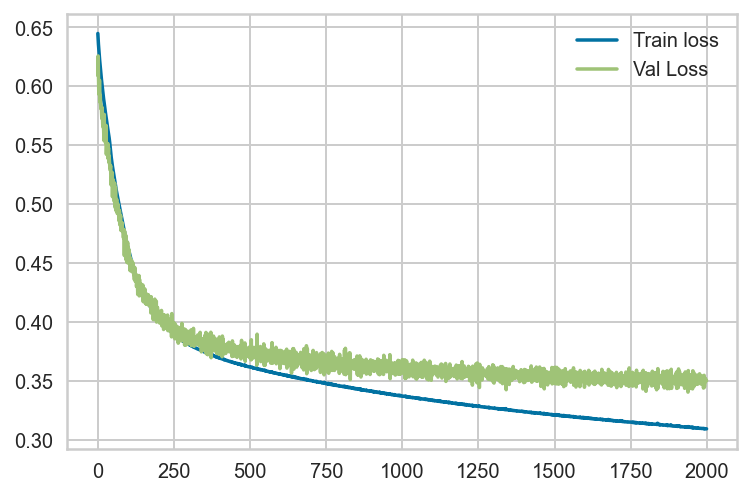

In [32]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

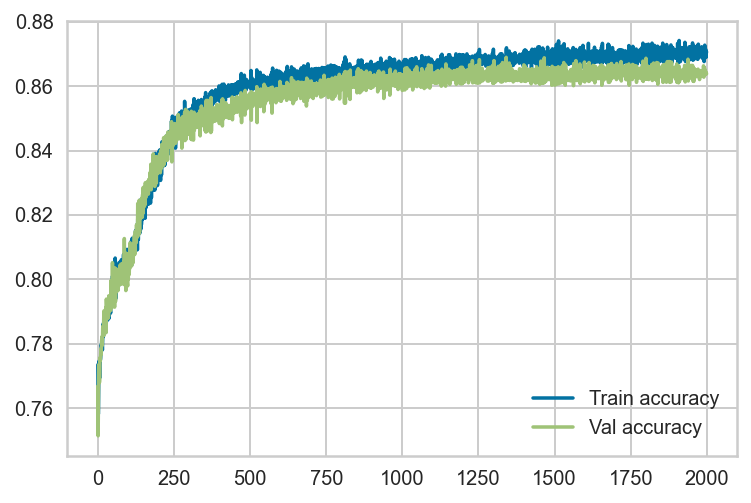

In [33]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [34]:
print(model.evaluate(X_test, y_test))

loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print("Precision is", np.mean(history.history['val_precision_m']))
print("Recall is", np.mean(history.history['val_recall_m']))

213/213 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8638 - f1_m: 0.5623 - precision_m: 0.4514 - recall_m: 0.8310
[0.35031720995903015, 0.863843560218811, 0.5622880458831787, 0.451402872800827, 0.8309972882270813]
Precision is 0.43676803646236656
Recall is 0.8277723151743412


# 6.3 Three-Layered Neural Network Model

In [35]:
model = Sequential()
model.add(Dense(84, input_shape=(84,), activation='relu'))
model.add(Dense(168, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_m,precision_m, recall_m])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=2000, 
                    batch_size=2000,
                    shuffle=True)

Epoch 1/2000
8/8 [==============================] - 2s 59ms/step - loss: 1.1122 - accuracy: 0.3478 - f1_m: 0.2542 - precision_m: 0.1474 - recall_m: 0.9286 - val_loss: 0.6854 - val_accuracy: 0.4513 - val_f1_m: 0.2206 - val_precision_m: 0.1322 - val_recall_m: 0.6715
Epoch 2/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.5362 - accuracy: 0.7358 - f1_m: 0.2066 - precision_m: 0.1932 - recall_m: 0.3276 - val_loss: 0.4087 - val_accuracy: 0.8663 - val_f1_m: 0.0351 - val_precision_m: 0.0952 - val_recall_m: 0.0215
Epoch 3/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3984 - accuracy: 0.8773 - f1_m: 0.0037 - precision_m: 0.0188 - recall_m: 0.0021 - val_loss: 0.3705 - val_accuracy: 0.8868 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3858 - accuracy: 0.8802 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.3640 - val_a

Epoch 31/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.3070 - accuracy: 0.8803 - f1_m: 0.0041 - precision_m: 0.2083 - recall_m: 0.0021 - val_loss: 0.2928 - val_accuracy: 0.8866 - val_f1_m: 0.0022 - val_precision_m: 0.1250 - val_recall_m: 0.0011
Epoch 32/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.3055 - accuracy: 0.8805 - f1_m: 0.0062 - precision_m: 0.3750 - recall_m: 0.0031 - val_loss: 0.2915 - val_accuracy: 0.8866 - val_f1_m: 0.0067 - val_precision_m: 0.3958 - val_recall_m: 0.0034
Epoch 33/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.3042 - accuracy: 0.8807 - f1_m: 0.0167 - precision_m: 0.7500 - recall_m: 0.0085 - val_loss: 0.2902 - val_accuracy: 0.8868 - val_f1_m: 0.0089 - val_precision_m: 0.4333 - val_recall_m: 0.0045
Epoch 34/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3026 - accuracy: 0.8803 - f1_m: 0.0072 - precision_m: 0.6458 - recall_m: 0.0036 - val_loss: 0.2885 - val_accuracy: 0.8868 - va

Epoch 62/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2629 - accuracy: 0.8884 - f1_m: 0.2104 - precision_m: 0.6882 - recall_m: 0.1253 - val_loss: 0.2521 - val_accuracy: 0.8971 - val_f1_m: 0.2618 - val_precision_m: 0.6845 - val_recall_m: 0.1632
Epoch 63/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2615 - accuracy: 0.8911 - f1_m: 0.2688 - precision_m: 0.6944 - recall_m: 0.1669 - val_loss: 0.2510 - val_accuracy: 0.8969 - val_f1_m: 0.2573 - val_precision_m: 0.6806 - val_recall_m: 0.1597
Epoch 64/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2604 - accuracy: 0.8910 - f1_m: 0.2656 - precision_m: 0.6855 - recall_m: 0.1652 - val_loss: 0.2501 - val_accuracy: 0.8981 - val_f1_m: 0.2718 - val_precision_m: 0.6954 - val_recall_m: 0.1700
Epoch 65/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2594 - accuracy: 0.8912 - f1_m: 0.2709 - precision_m: 0.6882 - recall_m: 0.1690 - val_loss: 0.2492 - val_accuracy: 0.8990 - va

Epoch 93/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2389 - accuracy: 0.9036 - f1_m: 0.4400 - precision_m: 0.7226 - recall_m: 0.3169 - val_loss: 0.2315 - val_accuracy: 0.9084 - val_f1_m: 0.4543 - val_precision_m: 0.7095 - val_recall_m: 0.3348
Epoch 94/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2385 - accuracy: 0.9047 - f1_m: 0.4588 - precision_m: 0.7166 - recall_m: 0.3387 - val_loss: 0.2306 - val_accuracy: 0.9081 - val_f1_m: 0.4397 - val_precision_m: 0.7252 - val_recall_m: 0.3164
Epoch 95/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2379 - accuracy: 0.9041 - f1_m: 0.4414 - precision_m: 0.7305 - recall_m: 0.3169 - val_loss: 0.2308 - val_accuracy: 0.9091 - val_f1_m: 0.4623 - val_precision_m: 0.7129 - val_recall_m: 0.3428
Epoch 96/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2375 - accuracy: 0.9047 - f1_m: 0.4636 - precision_m: 0.7122 - recall_m: 0.3443 - val_loss: 0.2298 - val_accuracy: 0.9082 - va

Epoch 124/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.2261 - accuracy: 0.9094 - f1_m: 0.5133 - precision_m: 0.7218 - recall_m: 0.3994 - val_loss: 0.2214 - val_accuracy: 0.9141 - val_f1_m: 0.5372 - val_precision_m: 0.6958 - val_recall_m: 0.4387
Epoch 125/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.2261 - accuracy: 0.9095 - f1_m: 0.5124 - precision_m: 0.7212 - recall_m: 0.3990 - val_loss: 0.2202 - val_accuracy: 0.9128 - val_f1_m: 0.5188 - val_precision_m: 0.7010 - val_recall_m: 0.4127
Epoch 126/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2250 - accuracy: 0.9110 - f1_m: 0.5362 - precision_m: 0.7129 - recall_m: 0.4304 - val_loss: 0.2203 - val_accuracy: 0.9138 - val_f1_m: 0.5459 - val_precision_m: 0.6909 - val_recall_m: 0.4519
Epoch 127/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.2247 - accuracy: 0.9103 - f1_m: 0.5313 - precision_m: 0.7104 - recall_m: 0.4248 - val_loss: 0.2195 - val_accuracy: 0.9135 

Epoch 155/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.2175 - accuracy: 0.9141 - f1_m: 0.5620 - precision_m: 0.7229 - recall_m: 0.4610 - val_loss: 0.2141 - val_accuracy: 0.9168 - val_f1_m: 0.5590 - val_precision_m: 0.7047 - val_recall_m: 0.4642
Epoch 156/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.2173 - accuracy: 0.9140 - f1_m: 0.5587 - precision_m: 0.7192 - recall_m: 0.4577 - val_loss: 0.2142 - val_accuracy: 0.9162 - val_f1_m: 0.5681 - val_precision_m: 0.6965 - val_recall_m: 0.4806
Epoch 157/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.2172 - accuracy: 0.9143 - f1_m: 0.5667 - precision_m: 0.7179 - recall_m: 0.4691 - val_loss: 0.2149 - val_accuracy: 0.9157 - val_f1_m: 0.5777 - val_precision_m: 0.6825 - val_recall_m: 0.5022
Epoch 158/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2169 - accuracy: 0.9151 - f1_m: 0.5690 - precision_m: 0.7229 - recall_m: 0.4705 - val_loss: 0.2137 - val_accuracy: 0.9172 

Epoch 186/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2132 - accuracy: 0.9161 - f1_m: 0.5866 - precision_m: 0.7157 - recall_m: 0.5013 - val_loss: 0.2112 - val_accuracy: 0.9190 - val_f1_m: 0.5726 - val_precision_m: 0.7147 - val_recall_m: 0.4789
Epoch 187/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2123 - accuracy: 0.9168 - f1_m: 0.5838 - precision_m: 0.7244 - recall_m: 0.4891 - val_loss: 0.2123 - val_accuracy: 0.9157 - val_f1_m: 0.5827 - val_precision_m: 0.6703 - val_recall_m: 0.5167
Epoch 188/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2121 - accuracy: 0.9164 - f1_m: 0.5812 - precision_m: 0.7269 - recall_m: 0.4860 - val_loss: 0.2110 - val_accuracy: 0.9184 - val_f1_m: 0.5788 - val_precision_m: 0.7013 - val_recall_m: 0.4939
Epoch 189/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2121 - accuracy: 0.9170 - f1_m: 0.5932 - precision_m: 0.7193 - recall_m: 0.5061 - val_loss: 0.2115 - val_accuracy: 0.9171 

Epoch 217/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2092 - accuracy: 0.9173 - f1_m: 0.5891 - precision_m: 0.7254 - recall_m: 0.4973 - val_loss: 0.2115 - val_accuracy: 0.9160 - val_f1_m: 0.5973 - val_precision_m: 0.6621 - val_recall_m: 0.5456
Epoch 218/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2094 - accuracy: 0.9173 - f1_m: 0.5924 - precision_m: 0.7216 - recall_m: 0.5046 - val_loss: 0.2095 - val_accuracy: 0.9185 - val_f1_m: 0.5800 - val_precision_m: 0.7022 - val_recall_m: 0.4960
Epoch 219/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2087 - accuracy: 0.9169 - f1_m: 0.5951 - precision_m: 0.7132 - recall_m: 0.5109 - val_loss: 0.2097 - val_accuracy: 0.9182 - val_f1_m: 0.5877 - val_precision_m: 0.6912 - val_recall_m: 0.5132
Epoch 220/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2087 - accuracy: 0.9173 - f1_m: 0.5907 - precision_m: 0.7241 - recall_m: 0.5001 - val_loss: 0.2111 - val_accuracy: 0.9165 

Epoch 248/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.2059 - accuracy: 0.9185 - f1_m: 0.6018 - precision_m: 0.7239 - recall_m: 0.5152 - val_loss: 0.2087 - val_accuracy: 0.9177 - val_f1_m: 0.5898 - val_precision_m: 0.6829 - val_recall_m: 0.5211
Epoch 249/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2061 - accuracy: 0.9185 - f1_m: 0.6079 - precision_m: 0.7200 - recall_m: 0.5279 - val_loss: 0.2087 - val_accuracy: 0.9187 - val_f1_m: 0.5935 - val_precision_m: 0.6920 - val_recall_m: 0.5213
Epoch 250/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.2063 - accuracy: 0.9171 - f1_m: 0.5932 - precision_m: 0.7192 - recall_m: 0.5056 - val_loss: 0.2103 - val_accuracy: 0.9171 - val_f1_m: 0.6052 - val_precision_m: 0.6656 - val_recall_m: 0.5568
Epoch 251/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.2057 - accuracy: 0.9189 - f1_m: 0.6081 - precision_m: 0.7225 - recall_m: 0.5258 - val_loss: 0.2084 - val_accuracy: 0.9194 

Epoch 279/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.2038 - accuracy: 0.9190 - f1_m: 0.6084 - precision_m: 0.7220 - recall_m: 0.5268 - val_loss: 0.2081 - val_accuracy: 0.9188 - val_f1_m: 0.6002 - val_precision_m: 0.6886 - val_recall_m: 0.5340
Epoch 280/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2036 - accuracy: 0.9192 - f1_m: 0.6075 - precision_m: 0.7242 - recall_m: 0.5249 - val_loss: 0.2081 - val_accuracy: 0.9187 - val_f1_m: 0.6020 - val_precision_m: 0.6815 - val_recall_m: 0.5408
Epoch 281/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.2036 - accuracy: 0.9188 - f1_m: 0.6067 - precision_m: 0.7212 - recall_m: 0.5242 - val_loss: 0.2083 - val_accuracy: 0.9188 - val_f1_m: 0.6038 - val_precision_m: 0.6831 - val_recall_m: 0.5430
Epoch 282/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2034 - accuracy: 0.9189 - f1_m: 0.6078 - precision_m: 0.7177 - recall_m: 0.5281 - val_loss: 0.2077 - val_accuracy: 0.9193 

Epoch 310/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2021 - accuracy: 0.9194 - f1_m: 0.6173 - precision_m: 0.7163 - recall_m: 0.5437 - val_loss: 0.2072 - val_accuracy: 0.9197 - val_f1_m: 0.6032 - val_precision_m: 0.6920 - val_recall_m: 0.5372
Epoch 311/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2014 - accuracy: 0.9193 - f1_m: 0.6046 - precision_m: 0.7297 - recall_m: 0.5165 - val_loss: 0.2093 - val_accuracy: 0.9168 - val_f1_m: 0.6069 - val_precision_m: 0.6567 - val_recall_m: 0.5658
Epoch 312/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2022 - accuracy: 0.9185 - f1_m: 0.6161 - precision_m: 0.7097 - recall_m: 0.5459 - val_loss: 0.2088 - val_accuracy: 0.9206 - val_f1_m: 0.5783 - val_precision_m: 0.7273 - val_recall_m: 0.4822
Epoch 313/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2036 - accuracy: 0.9183 - f1_m: 0.6076 - precision_m: 0.7159 - recall_m: 0.5327 - val_loss: 0.2092 - val_accuracy: 0.9166 

Epoch 341/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1997 - accuracy: 0.9203 - f1_m: 0.6168 - precision_m: 0.7282 - recall_m: 0.5367 - val_loss: 0.2075 - val_accuracy: 0.9185 - val_f1_m: 0.6081 - val_precision_m: 0.6732 - val_recall_m: 0.5566
Epoch 342/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1995 - accuracy: 0.9195 - f1_m: 0.6158 - precision_m: 0.7191 - recall_m: 0.5394 - val_loss: 0.2070 - val_accuracy: 0.9194 - val_f1_m: 0.6050 - val_precision_m: 0.6834 - val_recall_m: 0.5451
Epoch 343/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1993 - accuracy: 0.9198 - f1_m: 0.6149 - precision_m: 0.7230 - recall_m: 0.5360 - val_loss: 0.2081 - val_accuracy: 0.9180 - val_f1_m: 0.6093 - val_precision_m: 0.6650 - val_recall_m: 0.5637
Epoch 344/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1994 - accuracy: 0.9198 - f1_m: 0.6178 - precision_m: 0.7212 - recall_m: 0.5409 - val_loss: 0.2069 - val_accuracy: 0.9200 

Epoch 372/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1978 - accuracy: 0.9206 - f1_m: 0.6151 - precision_m: 0.7348 - recall_m: 0.5298 - val_loss: 0.2090 - val_accuracy: 0.9162 - val_f1_m: 0.6074 - val_precision_m: 0.6523 - val_recall_m: 0.5696
Epoch 373/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1980 - accuracy: 0.9195 - f1_m: 0.6205 - precision_m: 0.7146 - recall_m: 0.5499 - val_loss: 0.2070 - val_accuracy: 0.9200 - val_f1_m: 0.5956 - val_precision_m: 0.6914 - val_recall_m: 0.5252
Epoch 374/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1990 - accuracy: 0.9188 - f1_m: 0.6144 - precision_m: 0.7180 - recall_m: 0.5397 - val_loss: 0.2088 - val_accuracy: 0.9171 - val_f1_m: 0.6128 - val_precision_m: 0.6545 - val_recall_m: 0.5775
Epoch 375/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1977 - accuracy: 0.9206 - f1_m: 0.6188 - precision_m: 0.7304 - recall_m: 0.5376 - val_loss: 0.2070 - val_accuracy: 0.9184 

Epoch 403/2000
8/8 [==============================] - 0s 32ms/step - loss: 0.1965 - accuracy: 0.9210 - f1_m: 0.6200 - precision_m: 0.7336 - recall_m: 0.5378 - val_loss: 0.2089 - val_accuracy: 0.9171 - val_f1_m: 0.6155 - val_precision_m: 0.6547 - val_recall_m: 0.5821
Epoch 404/2000
8/8 [==============================] - 0s 29ms/step - loss: 0.1963 - accuracy: 0.9202 - f1_m: 0.6192 - precision_m: 0.7212 - recall_m: 0.5443 - val_loss: 0.2066 - val_accuracy: 0.9210 - val_f1_m: 0.6010 - val_precision_m: 0.7020 - val_recall_m: 0.5285
Epoch 405/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1960 - accuracy: 0.9204 - f1_m: 0.6199 - precision_m: 0.7235 - recall_m: 0.5430 - val_loss: 0.2082 - val_accuracy: 0.9177 - val_f1_m: 0.6143 - val_precision_m: 0.6597 - val_recall_m: 0.5763
Epoch 406/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1959 - accuracy: 0.9209 - f1_m: 0.6230 - precision_m: 0.7255 - recall_m: 0.5463 - val_loss: 0.2069 - val_accuracy: 0.9199 

Epoch 434/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1946 - accuracy: 0.9208 - f1_m: 0.6231 - precision_m: 0.7252 - recall_m: 0.5467 - val_loss: 0.2077 - val_accuracy: 0.9184 - val_f1_m: 0.6147 - val_precision_m: 0.6687 - val_recall_m: 0.5706
Epoch 435/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1950 - accuracy: 0.9210 - f1_m: 0.6223 - precision_m: 0.7301 - recall_m: 0.5447 - val_loss: 0.2067 - val_accuracy: 0.9209 - val_f1_m: 0.6072 - val_precision_m: 0.6979 - val_recall_m: 0.5402
Epoch 436/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1948 - accuracy: 0.9207 - f1_m: 0.6272 - precision_m: 0.7186 - recall_m: 0.5576 - val_loss: 0.2070 - val_accuracy: 0.9196 - val_f1_m: 0.6080 - val_precision_m: 0.6819 - val_recall_m: 0.5507
Epoch 437/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1946 - accuracy: 0.9212 - f1_m: 0.6189 - precision_m: 0.7374 - recall_m: 0.5349 - val_loss: 0.2100 - val_accuracy: 0.9169 

Epoch 465/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1933 - accuracy: 0.9213 - f1_m: 0.6273 - precision_m: 0.7266 - recall_m: 0.5528 - val_loss: 0.2070 - val_accuracy: 0.9202 - val_f1_m: 0.6021 - val_precision_m: 0.6911 - val_recall_m: 0.5357
Epoch 466/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1933 - accuracy: 0.9215 - f1_m: 0.6293 - precision_m: 0.7251 - recall_m: 0.5575 - val_loss: 0.2071 - val_accuracy: 0.9199 - val_f1_m: 0.6114 - val_precision_m: 0.6847 - val_recall_m: 0.5542
Epoch 467/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1932 - accuracy: 0.9220 - f1_m: 0.6289 - precision_m: 0.7311 - recall_m: 0.5528 - val_loss: 0.2076 - val_accuracy: 0.9191 - val_f1_m: 0.6137 - val_precision_m: 0.6780 - val_recall_m: 0.5625
Epoch 468/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1931 - accuracy: 0.9217 - f1_m: 0.6218 - precision_m: 0.7393 - recall_m: 0.5366 - val_loss: 0.2093 - val_accuracy: 0.9174 

Epoch 496/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1921 - accuracy: 0.9225 - f1_m: 0.6247 - precision_m: 0.7433 - recall_m: 0.5403 - val_loss: 0.2101 - val_accuracy: 0.9172 - val_f1_m: 0.6220 - val_precision_m: 0.6524 - val_recall_m: 0.5959
Epoch 497/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1919 - accuracy: 0.9224 - f1_m: 0.6345 - precision_m: 0.7297 - recall_m: 0.5631 - val_loss: 0.2072 - val_accuracy: 0.9188 - val_f1_m: 0.5997 - val_precision_m: 0.6854 - val_recall_m: 0.5349
Epoch 498/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1917 - accuracy: 0.9217 - f1_m: 0.6292 - precision_m: 0.7266 - recall_m: 0.5561 - val_loss: 0.2074 - val_accuracy: 0.9199 - val_f1_m: 0.6135 - val_precision_m: 0.6858 - val_recall_m: 0.5569
Epoch 499/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1917 - accuracy: 0.9221 - f1_m: 0.6241 - precision_m: 0.7378 - recall_m: 0.5415 - val_loss: 0.2092 - val_accuracy: 0.9181 

Epoch 527/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1918 - accuracy: 0.9232 - f1_m: 0.6420 - precision_m: 0.7308 - recall_m: 0.5765 - val_loss: 0.2079 - val_accuracy: 0.9203 - val_f1_m: 0.5961 - val_precision_m: 0.7030 - val_recall_m: 0.5198
Epoch 528/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1909 - accuracy: 0.9222 - f1_m: 0.6349 - precision_m: 0.7251 - recall_m: 0.5670 - val_loss: 0.2078 - val_accuracy: 0.9200 - val_f1_m: 0.6176 - val_precision_m: 0.6803 - val_recall_m: 0.5672
Epoch 529/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1910 - accuracy: 0.9226 - f1_m: 0.6326 - precision_m: 0.7331 - recall_m: 0.5595 - val_loss: 0.2092 - val_accuracy: 0.9184 - val_f1_m: 0.6226 - val_precision_m: 0.6625 - val_recall_m: 0.5890
Epoch 530/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1899 - accuracy: 0.9226 - f1_m: 0.6279 - precision_m: 0.7405 - recall_m: 0.5467 - val_loss: 0.2075 - val_accuracy: 0.9202 

Epoch 558/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1887 - accuracy: 0.9224 - f1_m: 0.6294 - precision_m: 0.7364 - recall_m: 0.5501 - val_loss: 0.2085 - val_accuracy: 0.9191 - val_f1_m: 0.6167 - val_precision_m: 0.6750 - val_recall_m: 0.5695
Epoch 559/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1885 - accuracy: 0.9229 - f1_m: 0.6325 - precision_m: 0.7378 - recall_m: 0.5542 - val_loss: 0.2086 - val_accuracy: 0.9202 - val_f1_m: 0.6255 - val_precision_m: 0.6781 - val_recall_m: 0.5822
Epoch 560/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1888 - accuracy: 0.9235 - f1_m: 0.6398 - precision_m: 0.7353 - recall_m: 0.5674 - val_loss: 0.2089 - val_accuracy: 0.9188 - val_f1_m: 0.6204 - val_precision_m: 0.6706 - val_recall_m: 0.5789
Epoch 561/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1887 - accuracy: 0.9229 - f1_m: 0.6342 - precision_m: 0.7319 - recall_m: 0.5605 - val_loss: 0.2079 - val_accuracy: 0.9196 

Epoch 589/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1876 - accuracy: 0.9236 - f1_m: 0.6355 - precision_m: 0.7405 - recall_m: 0.5573 - val_loss: 0.2120 - val_accuracy: 0.9169 - val_f1_m: 0.6264 - val_precision_m: 0.6525 - val_recall_m: 0.6042
Epoch 590/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1878 - accuracy: 0.9244 - f1_m: 0.6450 - precision_m: 0.7398 - recall_m: 0.5729 - val_loss: 0.2085 - val_accuracy: 0.9188 - val_f1_m: 0.6013 - val_precision_m: 0.6838 - val_recall_m: 0.5383
Epoch 591/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1876 - accuracy: 0.9236 - f1_m: 0.6415 - precision_m: 0.7336 - recall_m: 0.5709 - val_loss: 0.2084 - val_accuracy: 0.9194 - val_f1_m: 0.6125 - val_precision_m: 0.6837 - val_recall_m: 0.5560
Epoch 592/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1880 - accuracy: 0.9229 - f1_m: 0.6346 - precision_m: 0.7338 - recall_m: 0.5628 - val_loss: 0.2106 - val_accuracy: 0.9166 

Epoch 620/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1867 - accuracy: 0.9240 - f1_m: 0.6340 - precision_m: 0.7493 - recall_m: 0.5504 - val_loss: 0.2102 - val_accuracy: 0.9180 - val_f1_m: 0.6193 - val_precision_m: 0.6669 - val_recall_m: 0.5800
Epoch 621/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1862 - accuracy: 0.9244 - f1_m: 0.6422 - precision_m: 0.7404 - recall_m: 0.5682 - val_loss: 0.2100 - val_accuracy: 0.9184 - val_f1_m: 0.6195 - val_precision_m: 0.6684 - val_recall_m: 0.5789
Epoch 622/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1867 - accuracy: 0.9243 - f1_m: 0.6369 - precision_m: 0.7497 - recall_m: 0.5551 - val_loss: 0.2109 - val_accuracy: 0.9166 - val_f1_m: 0.6181 - val_precision_m: 0.6564 - val_recall_m: 0.5859
Epoch 623/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1869 - accuracy: 0.9238 - f1_m: 0.6435 - precision_m: 0.7317 - recall_m: 0.5771 - val_loss: 0.2090 - val_accuracy: 0.9197 

Epoch 681/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1839 - accuracy: 0.9260 - f1_m: 0.6462 - precision_m: 0.7523 - recall_m: 0.5671 - val_loss: 0.2109 - val_accuracy: 0.9177 - val_f1_m: 0.6137 - val_precision_m: 0.6701 - val_recall_m: 0.5676
Epoch 682/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1839 - accuracy: 0.9257 - f1_m: 0.6532 - precision_m: 0.7400 - recall_m: 0.5854 - val_loss: 0.2099 - val_accuracy: 0.9194 - val_f1_m: 0.6041 - val_precision_m: 0.6886 - val_recall_m: 0.5397
Epoch 683/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1835 - accuracy: 0.9258 - f1_m: 0.6480 - precision_m: 0.7493 - recall_m: 0.5715 - val_loss: 0.2113 - val_accuracy: 0.9168 - val_f1_m: 0.6119 - val_precision_m: 0.6616 - val_recall_m: 0.5709
Epoch 684/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1834 - accuracy: 0.9260 - f1_m: 0.6474 - precision_m: 0.7495 - recall_m: 0.5709 - val_loss: 0.2101 - val_accuracy: 0.9190 

Epoch 712/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1827 - accuracy: 0.9259 - f1_m: 0.6521 - precision_m: 0.7436 - recall_m: 0.5819 - val_loss: 0.2106 - val_accuracy: 0.9191 - val_f1_m: 0.6057 - val_precision_m: 0.6847 - val_recall_m: 0.5443
Epoch 713/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1824 - accuracy: 0.9256 - f1_m: 0.6438 - precision_m: 0.7532 - recall_m: 0.5633 - val_loss: 0.2120 - val_accuracy: 0.9168 - val_f1_m: 0.6139 - val_precision_m: 0.6603 - val_recall_m: 0.5755
Epoch 714/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1825 - accuracy: 0.9265 - f1_m: 0.6548 - precision_m: 0.7466 - recall_m: 0.5836 - val_loss: 0.2110 - val_accuracy: 0.9177 - val_f1_m: 0.6087 - val_precision_m: 0.6715 - val_recall_m: 0.5582
Epoch 715/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1826 - accuracy: 0.9258 - f1_m: 0.6513 - precision_m: 0.7424 - recall_m: 0.5813 - val_loss: 0.2108 - val_accuracy: 0.9197 

Epoch 743/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1819 - accuracy: 0.9261 - f1_m: 0.6545 - precision_m: 0.7458 - recall_m: 0.5844 - val_loss: 0.2117 - val_accuracy: 0.9175 - val_f1_m: 0.6100 - val_precision_m: 0.6690 - val_recall_m: 0.5618
Epoch 744/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1812 - accuracy: 0.9267 - f1_m: 0.6574 - precision_m: 0.7475 - recall_m: 0.5878 - val_loss: 0.2115 - val_accuracy: 0.9188 - val_f1_m: 0.6030 - val_precision_m: 0.6860 - val_recall_m: 0.5389
Epoch 745/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1815 - accuracy: 0.9270 - f1_m: 0.6544 - precision_m: 0.7537 - recall_m: 0.5794 - val_loss: 0.2122 - val_accuracy: 0.9169 - val_f1_m: 0.6060 - val_precision_m: 0.6657 - val_recall_m: 0.5581
Epoch 746/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1814 - accuracy: 0.9277 - f1_m: 0.6573 - precision_m: 0.7598 - recall_m: 0.5801 - val_loss: 0.2135 - val_accuracy: 0.9165 

Epoch 774/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1802 - accuracy: 0.9268 - f1_m: 0.6578 - precision_m: 0.7481 - recall_m: 0.5873 - val_loss: 0.2125 - val_accuracy: 0.9174 - val_f1_m: 0.6091 - val_precision_m: 0.6706 - val_recall_m: 0.5595
Epoch 775/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1801 - accuracy: 0.9275 - f1_m: 0.6606 - precision_m: 0.7514 - recall_m: 0.5905 - val_loss: 0.2129 - val_accuracy: 0.9165 - val_f1_m: 0.6080 - val_precision_m: 0.6629 - val_recall_m: 0.5629
Epoch 776/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1802 - accuracy: 0.9277 - f1_m: 0.6567 - precision_m: 0.7650 - recall_m: 0.5764 - val_loss: 0.2137 - val_accuracy: 0.9163 - val_f1_m: 0.6096 - val_precision_m: 0.6588 - val_recall_m: 0.5686
Epoch 777/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1802 - accuracy: 0.9272 - f1_m: 0.6599 - precision_m: 0.7484 - recall_m: 0.5912 - val_loss: 0.2124 - val_accuracy: 0.9175 

Epoch 805/2000
8/8 [==============================] - 0s 25ms/step - loss: 0.1790 - accuracy: 0.9280 - f1_m: 0.6633 - precision_m: 0.7537 - recall_m: 0.5928 - val_loss: 0.2130 - val_accuracy: 0.9175 - val_f1_m: 0.6023 - val_precision_m: 0.6742 - val_recall_m: 0.5456
Epoch 806/2000
8/8 [==============================] - 0s 25ms/step - loss: 0.1794 - accuracy: 0.9275 - f1_m: 0.6589 - precision_m: 0.7577 - recall_m: 0.5854 - val_loss: 0.2143 - val_accuracy: 0.9165 - val_f1_m: 0.6108 - val_precision_m: 0.6624 - val_recall_m: 0.5686
Epoch 807/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1791 - accuracy: 0.9281 - f1_m: 0.6581 - precision_m: 0.7632 - recall_m: 0.5792 - val_loss: 0.2132 - val_accuracy: 0.9171 - val_f1_m: 0.6048 - val_precision_m: 0.6688 - val_recall_m: 0.5535
Epoch 808/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1788 - accuracy: 0.9277 - f1_m: 0.6621 - precision_m: 0.7485 - recall_m: 0.5942 - val_loss: 0.2131 - val_accuracy: 0.9180 

Epoch 836/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1778 - accuracy: 0.9283 - f1_m: 0.6605 - precision_m: 0.7615 - recall_m: 0.5838 - val_loss: 0.2152 - val_accuracy: 0.9160 - val_f1_m: 0.6093 - val_precision_m: 0.6569 - val_recall_m: 0.5697
Epoch 837/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1782 - accuracy: 0.9283 - f1_m: 0.6653 - precision_m: 0.7552 - recall_m: 0.5966 - val_loss: 0.2148 - val_accuracy: 0.9169 - val_f1_m: 0.6094 - val_precision_m: 0.6655 - val_recall_m: 0.5639
Epoch 838/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.1782 - accuracy: 0.9285 - f1_m: 0.6596 - precision_m: 0.7673 - recall_m: 0.5800 - val_loss: 0.2152 - val_accuracy: 0.9169 - val_f1_m: 0.6105 - val_precision_m: 0.6648 - val_recall_m: 0.5662
Epoch 839/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.1783 - accuracy: 0.9285 - f1_m: 0.6655 - precision_m: 0.7602 - recall_m: 0.5934 - val_loss: 0.2151 - val_accuracy: 0.9165 

Epoch 897/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1759 - accuracy: 0.9288 - f1_m: 0.6649 - precision_m: 0.7602 - recall_m: 0.5915 - val_loss: 0.2156 - val_accuracy: 0.9166 - val_f1_m: 0.6028 - val_precision_m: 0.6659 - val_recall_m: 0.5523
Epoch 898/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1756 - accuracy: 0.9294 - f1_m: 0.6686 - precision_m: 0.7640 - recall_m: 0.5947 - val_loss: 0.2165 - val_accuracy: 0.9165 - val_f1_m: 0.6094 - val_precision_m: 0.6615 - val_recall_m: 0.5663
Epoch 899/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1762 - accuracy: 0.9285 - f1_m: 0.6600 - precision_m: 0.7610 - recall_m: 0.5844 - val_loss: 0.2183 - val_accuracy: 0.9153 - val_f1_m: 0.6144 - val_precision_m: 0.6460 - val_recall_m: 0.5878
Epoch 900/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1767 - accuracy: 0.9280 - f1_m: 0.6625 - precision_m: 0.7570 - recall_m: 0.5916 - val_loss: 0.2168 - val_accuracy: 0.9165 

Epoch 928/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1748 - accuracy: 0.9298 - f1_m: 0.6730 - precision_m: 0.7611 - recall_m: 0.6037 - val_loss: 0.2163 - val_accuracy: 0.9169 - val_f1_m: 0.6006 - val_precision_m: 0.6720 - val_recall_m: 0.5444
Epoch 929/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1752 - accuracy: 0.9293 - f1_m: 0.6677 - precision_m: 0.7635 - recall_m: 0.5946 - val_loss: 0.2174 - val_accuracy: 0.9163 - val_f1_m: 0.6091 - val_precision_m: 0.6608 - val_recall_m: 0.5663
Epoch 930/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1746 - accuracy: 0.9295 - f1_m: 0.6676 - precision_m: 0.7641 - recall_m: 0.5936 - val_loss: 0.2165 - val_accuracy: 0.9171 - val_f1_m: 0.6049 - val_precision_m: 0.6695 - val_recall_m: 0.5534
Epoch 931/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1749 - accuracy: 0.9291 - f1_m: 0.6679 - precision_m: 0.7605 - recall_m: 0.5966 - val_loss: 0.2171 - val_accuracy: 0.9163 

Epoch 959/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1738 - accuracy: 0.9302 - f1_m: 0.6759 - precision_m: 0.7618 - recall_m: 0.6076 - val_loss: 0.2172 - val_accuracy: 0.9175 - val_f1_m: 0.5956 - val_precision_m: 0.6803 - val_recall_m: 0.5307
Epoch 960/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1744 - accuracy: 0.9285 - f1_m: 0.6610 - precision_m: 0.7633 - recall_m: 0.5848 - val_loss: 0.2187 - val_accuracy: 0.9160 - val_f1_m: 0.6122 - val_precision_m: 0.6586 - val_recall_m: 0.5742
Epoch 961/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1747 - accuracy: 0.9301 - f1_m: 0.6691 - precision_m: 0.7756 - recall_m: 0.5908 - val_loss: 0.2206 - val_accuracy: 0.9147 - val_f1_m: 0.6152 - val_precision_m: 0.6398 - val_recall_m: 0.5946
Epoch 962/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1745 - accuracy: 0.9303 - f1_m: 0.6776 - precision_m: 0.7616 - recall_m: 0.6119 - val_loss: 0.2176 - val_accuracy: 0.9169 

Epoch 990/2000
8/8 [==============================] - 0s 24ms/step - loss: 0.1729 - accuracy: 0.9308 - f1_m: 0.6736 - precision_m: 0.7747 - recall_m: 0.5968 - val_loss: 0.2196 - val_accuracy: 0.9160 - val_f1_m: 0.6117 - val_precision_m: 0.6573 - val_recall_m: 0.5742
Epoch 991/2000
8/8 [==============================] - 0s 24ms/step - loss: 0.1729 - accuracy: 0.9306 - f1_m: 0.6748 - precision_m: 0.7682 - recall_m: 0.6022 - val_loss: 0.2198 - val_accuracy: 0.9160 - val_f1_m: 0.6117 - val_precision_m: 0.6574 - val_recall_m: 0.5742
Epoch 992/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1726 - accuracy: 0.9303 - f1_m: 0.6765 - precision_m: 0.7589 - recall_m: 0.6112 - val_loss: 0.2188 - val_accuracy: 0.9181 - val_f1_m: 0.5941 - val_precision_m: 0.6854 - val_recall_m: 0.5258
Epoch 993/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1732 - accuracy: 0.9306 - f1_m: 0.6742 - precision_m: 0.7705 - recall_m: 0.6014 - val_loss: 0.2210 - val_accuracy: 0.9156 

Epoch 1021/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1716 - accuracy: 0.9318 - f1_m: 0.6838 - precision_m: 0.7695 - recall_m: 0.6161 - val_loss: 0.2194 - val_accuracy: 0.9156 - val_f1_m: 0.5969 - val_precision_m: 0.6615 - val_recall_m: 0.5454
Epoch 1022/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1720 - accuracy: 0.9312 - f1_m: 0.6800 - precision_m: 0.7681 - recall_m: 0.6113 - val_loss: 0.2194 - val_accuracy: 0.9157 - val_f1_m: 0.5962 - val_precision_m: 0.6630 - val_recall_m: 0.5431
Epoch 1023/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1729 - accuracy: 0.9311 - f1_m: 0.6758 - precision_m: 0.7761 - recall_m: 0.6014 - val_loss: 0.2200 - val_accuracy: 0.9156 - val_f1_m: 0.6067 - val_precision_m: 0.6583 - val_recall_m: 0.5649
Epoch 1024/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1719 - accuracy: 0.9314 - f1_m: 0.6768 - precision_m: 0.7779 - recall_m: 0.5997 - val_loss: 0.2208 - val_accuracy: 0.9

Epoch 1052/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1710 - accuracy: 0.9316 - f1_m: 0.6775 - precision_m: 0.7736 - recall_m: 0.6032 - val_loss: 0.2201 - val_accuracy: 0.9165 - val_f1_m: 0.6024 - val_precision_m: 0.6652 - val_recall_m: 0.5523
Epoch 1053/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1708 - accuracy: 0.9316 - f1_m: 0.6825 - precision_m: 0.7691 - recall_m: 0.6141 - val_loss: 0.2204 - val_accuracy: 0.9153 - val_f1_m: 0.5976 - val_precision_m: 0.6601 - val_recall_m: 0.5478
Epoch 1054/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1706 - accuracy: 0.9316 - f1_m: 0.6763 - precision_m: 0.7747 - recall_m: 0.6006 - val_loss: 0.2213 - val_accuracy: 0.9157 - val_f1_m: 0.6110 - val_precision_m: 0.6577 - val_recall_m: 0.5730
Epoch 1055/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1706 - accuracy: 0.9316 - f1_m: 0.6808 - precision_m: 0.7721 - recall_m: 0.6091 - val_loss: 0.2208 - val_accuracy: 0.9

Epoch 1083/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1699 - accuracy: 0.9322 - f1_m: 0.6849 - precision_m: 0.7711 - recall_m: 0.6170 - val_loss: 0.2220 - val_accuracy: 0.9155 - val_f1_m: 0.6074 - val_precision_m: 0.6554 - val_recall_m: 0.5683
Epoch 1084/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1700 - accuracy: 0.9328 - f1_m: 0.6824 - precision_m: 0.7848 - recall_m: 0.6049 - val_loss: 0.2217 - val_accuracy: 0.9157 - val_f1_m: 0.6027 - val_precision_m: 0.6601 - val_recall_m: 0.5568
Epoch 1085/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1701 - accuracy: 0.9317 - f1_m: 0.6839 - precision_m: 0.7682 - recall_m: 0.6170 - val_loss: 0.2220 - val_accuracy: 0.9165 - val_f1_m: 0.6103 - val_precision_m: 0.6622 - val_recall_m: 0.5683
Epoch 1086/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1700 - accuracy: 0.9319 - f1_m: 0.6792 - precision_m: 0.7811 - recall_m: 0.6021 - val_loss: 0.2228 - val_accuracy: 0.9

Epoch 1114/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1692 - accuracy: 0.9320 - f1_m: 0.6834 - precision_m: 0.7751 - recall_m: 0.6126 - val_loss: 0.2266 - val_accuracy: 0.9138 - val_f1_m: 0.6164 - val_precision_m: 0.6358 - val_recall_m: 0.6004
Epoch 1115/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1700 - accuracy: 0.9324 - f1_m: 0.6798 - precision_m: 0.7890 - recall_m: 0.6003 - val_loss: 0.2240 - val_accuracy: 0.9147 - val_f1_m: 0.6075 - val_precision_m: 0.6482 - val_recall_m: 0.5740
Epoch 1116/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1689 - accuracy: 0.9317 - f1_m: 0.6861 - precision_m: 0.7625 - recall_m: 0.6241 - val_loss: 0.2223 - val_accuracy: 0.9168 - val_f1_m: 0.5992 - val_precision_m: 0.6687 - val_recall_m: 0.5442
Epoch 1117/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1688 - accuracy: 0.9328 - f1_m: 0.6828 - precision_m: 0.7861 - recall_m: 0.6044 - val_loss: 0.2242 - val_accuracy: 0.9

Epoch 1145/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1685 - accuracy: 0.9321 - f1_m: 0.6853 - precision_m: 0.7738 - recall_m: 0.6175 - val_loss: 0.2242 - val_accuracy: 0.9184 - val_f1_m: 0.5874 - val_precision_m: 0.6925 - val_recall_m: 0.5110
Epoch 1146/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1696 - accuracy: 0.9318 - f1_m: 0.6816 - precision_m: 0.7760 - recall_m: 0.6114 - val_loss: 0.2248 - val_accuracy: 0.9156 - val_f1_m: 0.6088 - val_precision_m: 0.6558 - val_recall_m: 0.5706
Epoch 1147/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1689 - accuracy: 0.9312 - f1_m: 0.6744 - precision_m: 0.7787 - recall_m: 0.5963 - val_loss: 0.2258 - val_accuracy: 0.9146 - val_f1_m: 0.6108 - val_precision_m: 0.6455 - val_recall_m: 0.5820
Epoch 1148/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.1678 - accuracy: 0.9326 - f1_m: 0.6879 - precision_m: 0.7731 - recall_m: 0.6206 - val_loss: 0.2240 - val_accuracy: 0.9

Epoch 1176/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1670 - accuracy: 0.9332 - f1_m: 0.6892 - precision_m: 0.7788 - recall_m: 0.6189 - val_loss: 0.2247 - val_accuracy: 0.9159 - val_f1_m: 0.6016 - val_precision_m: 0.6628 - val_recall_m: 0.5524
Epoch 1177/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1669 - accuracy: 0.9332 - f1_m: 0.6905 - precision_m: 0.7779 - recall_m: 0.6217 - val_loss: 0.2247 - val_accuracy: 0.9177 - val_f1_m: 0.5974 - val_precision_m: 0.6773 - val_recall_m: 0.5352
Epoch 1178/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1680 - accuracy: 0.9328 - f1_m: 0.6905 - precision_m: 0.7721 - recall_m: 0.6279 - val_loss: 0.2249 - val_accuracy: 0.9178 - val_f1_m: 0.5962 - val_precision_m: 0.6803 - val_recall_m: 0.5317
Epoch 1179/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1695 - accuracy: 0.9314 - f1_m: 0.6770 - precision_m: 0.7797 - recall_m: 0.6021 - val_loss: 0.2260 - val_accuracy: 0.9

Epoch 1207/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1662 - accuracy: 0.9332 - f1_m: 0.6833 - precision_m: 0.7907 - recall_m: 0.6031 - val_loss: 0.2271 - val_accuracy: 0.9140 - val_f1_m: 0.6051 - val_precision_m: 0.6445 - val_recall_m: 0.5728
Epoch 1208/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1667 - accuracy: 0.9320 - f1_m: 0.6860 - precision_m: 0.7702 - recall_m: 0.6216 - val_loss: 0.2258 - val_accuracy: 0.9169 - val_f1_m: 0.5924 - val_precision_m: 0.6730 - val_recall_m: 0.5304
Epoch 1209/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1660 - accuracy: 0.9335 - f1_m: 0.6935 - precision_m: 0.7731 - recall_m: 0.6292 - val_loss: 0.2258 - val_accuracy: 0.9156 - val_f1_m: 0.5959 - val_precision_m: 0.6628 - val_recall_m: 0.5431
Epoch 1210/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1662 - accuracy: 0.9337 - f1_m: 0.6900 - precision_m: 0.7853 - recall_m: 0.6172 - val_loss: 0.2259 - val_accuracy: 0.9

Epoch 1238/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1651 - accuracy: 0.9341 - f1_m: 0.6956 - precision_m: 0.7787 - recall_m: 0.6295 - val_loss: 0.2270 - val_accuracy: 0.9157 - val_f1_m: 0.5932 - val_precision_m: 0.6644 - val_recall_m: 0.5373
Epoch 1239/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1650 - accuracy: 0.9337 - f1_m: 0.6908 - precision_m: 0.7816 - recall_m: 0.6196 - val_loss: 0.2271 - val_accuracy: 0.9150 - val_f1_m: 0.5994 - val_precision_m: 0.6551 - val_recall_m: 0.5545
Epoch 1240/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1648 - accuracy: 0.9343 - f1_m: 0.6966 - precision_m: 0.7800 - recall_m: 0.6295 - val_loss: 0.2269 - val_accuracy: 0.9165 - val_f1_m: 0.5913 - val_precision_m: 0.6703 - val_recall_m: 0.5304
Epoch 1241/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1653 - accuracy: 0.9336 - f1_m: 0.6884 - precision_m: 0.7868 - recall_m: 0.6136 - val_loss: 0.2271 - val_accuracy: 0.9

Epoch 1269/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1643 - accuracy: 0.9340 - f1_m: 0.6921 - precision_m: 0.7830 - recall_m: 0.6209 - val_loss: 0.2290 - val_accuracy: 0.9152 - val_f1_m: 0.6047 - val_precision_m: 0.6518 - val_recall_m: 0.5660
Epoch 1270/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1643 - accuracy: 0.9338 - f1_m: 0.6890 - precision_m: 0.7842 - recall_m: 0.6148 - val_loss: 0.2285 - val_accuracy: 0.9153 - val_f1_m: 0.6035 - val_precision_m: 0.6543 - val_recall_m: 0.5624
Epoch 1271/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1641 - accuracy: 0.9345 - f1_m: 0.6965 - precision_m: 0.7805 - recall_m: 0.6298 - val_loss: 0.2284 - val_accuracy: 0.9152 - val_f1_m: 0.5917 - val_precision_m: 0.6579 - val_recall_m: 0.5394
Epoch 1272/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1640 - accuracy: 0.9341 - f1_m: 0.6895 - precision_m: 0.7877 - recall_m: 0.6132 - val_loss: 0.2302 - val_accuracy: 0.9

Epoch 1300/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1634 - accuracy: 0.9343 - f1_m: 0.6980 - precision_m: 0.7782 - recall_m: 0.6334 - val_loss: 0.2297 - val_accuracy: 0.9168 - val_f1_m: 0.5824 - val_precision_m: 0.6821 - val_recall_m: 0.5097
Epoch 1301/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1638 - accuracy: 0.9338 - f1_m: 0.6903 - precision_m: 0.7839 - recall_m: 0.6180 - val_loss: 0.2300 - val_accuracy: 0.9141 - val_f1_m: 0.6002 - val_precision_m: 0.6465 - val_recall_m: 0.5624
Epoch 1302/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1630 - accuracy: 0.9343 - f1_m: 0.6928 - precision_m: 0.7849 - recall_m: 0.6207 - val_loss: 0.2295 - val_accuracy: 0.9157 - val_f1_m: 0.5977 - val_precision_m: 0.6591 - val_recall_m: 0.5486
Epoch 1303/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1633 - accuracy: 0.9343 - f1_m: 0.6914 - precision_m: 0.7879 - recall_m: 0.6168 - val_loss: 0.2313 - val_accuracy: 0.9

Epoch 1361/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1615 - accuracy: 0.9347 - f1_m: 0.6945 - precision_m: 0.7889 - recall_m: 0.6208 - val_loss: 0.2315 - val_accuracy: 0.9162 - val_f1_m: 0.5972 - val_precision_m: 0.6624 - val_recall_m: 0.5452
Epoch 1362/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1615 - accuracy: 0.9350 - f1_m: 0.6978 - precision_m: 0.7846 - recall_m: 0.6291 - val_loss: 0.2329 - val_accuracy: 0.9140 - val_f1_m: 0.5979 - val_precision_m: 0.6458 - val_recall_m: 0.5589
Epoch 1363/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1617 - accuracy: 0.9346 - f1_m: 0.6908 - precision_m: 0.7941 - recall_m: 0.6128 - val_loss: 0.2326 - val_accuracy: 0.9138 - val_f1_m: 0.5999 - val_precision_m: 0.6429 - val_recall_m: 0.5646
Epoch 1364/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1618 - accuracy: 0.9350 - f1_m: 0.7004 - precision_m: 0.7806 - recall_m: 0.6361 - val_loss: 0.2319 - val_accuracy: 0.9

Epoch 1422/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1606 - accuracy: 0.9356 - f1_m: 0.6991 - precision_m: 0.7957 - recall_m: 0.6273 - val_loss: 0.2346 - val_accuracy: 0.9153 - val_f1_m: 0.5991 - val_precision_m: 0.6541 - val_recall_m: 0.5544
Epoch 1423/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1607 - accuracy: 0.9357 - f1_m: 0.7049 - precision_m: 0.7850 - recall_m: 0.6446 - val_loss: 0.2340 - val_accuracy: 0.9166 - val_f1_m: 0.5956 - val_precision_m: 0.6655 - val_recall_m: 0.5405
Epoch 1424/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1597 - accuracy: 0.9359 - f1_m: 0.7026 - precision_m: 0.7909 - recall_m: 0.6337 - val_loss: 0.2343 - val_accuracy: 0.9166 - val_f1_m: 0.5962 - val_precision_m: 0.6651 - val_recall_m: 0.5417
Epoch 1425/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1597 - accuracy: 0.9355 - f1_m: 0.7028 - precision_m: 0.7880 - recall_m: 0.6363 - val_loss: 0.2349 - val_accuracy: 0.9

Epoch 1453/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1600 - accuracy: 0.9350 - f1_m: 0.6953 - precision_m: 0.7914 - recall_m: 0.6230 - val_loss: 0.2356 - val_accuracy: 0.9150 - val_f1_m: 0.6004 - val_precision_m: 0.6505 - val_recall_m: 0.5590
Epoch 1454/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1601 - accuracy: 0.9355 - f1_m: 0.6978 - precision_m: 0.7943 - recall_m: 0.6237 - val_loss: 0.2395 - val_accuracy: 0.9125 - val_f1_m: 0.6114 - val_precision_m: 0.6235 - val_recall_m: 0.6015
Epoch 1455/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1597 - accuracy: 0.9364 - f1_m: 0.7036 - precision_m: 0.7926 - recall_m: 0.6349 - val_loss: 0.2354 - val_accuracy: 0.9155 - val_f1_m: 0.5990 - val_precision_m: 0.6532 - val_recall_m: 0.5544
Epoch 1456/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1592 - accuracy: 0.9358 - f1_m: 0.7036 - precision_m: 0.7871 - recall_m: 0.6374 - val_loss: 0.2354 - val_accuracy: 0.9

Epoch 1484/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1586 - accuracy: 0.9364 - f1_m: 0.7059 - precision_m: 0.7904 - recall_m: 0.6389 - val_loss: 0.2385 - val_accuracy: 0.9132 - val_f1_m: 0.6003 - val_precision_m: 0.6316 - val_recall_m: 0.5737
Epoch 1485/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.1583 - accuracy: 0.9369 - f1_m: 0.7072 - precision_m: 0.7955 - recall_m: 0.6390 - val_loss: 0.2372 - val_accuracy: 0.9135 - val_f1_m: 0.5973 - val_precision_m: 0.6425 - val_recall_m: 0.5601
Epoch 1486/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1582 - accuracy: 0.9362 - f1_m: 0.7041 - precision_m: 0.7900 - recall_m: 0.6360 - val_loss: 0.2378 - val_accuracy: 0.9132 - val_f1_m: 0.6005 - val_precision_m: 0.6347 - val_recall_m: 0.5715
Epoch 1487/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1576 - accuracy: 0.9367 - f1_m: 0.7104 - precision_m: 0.7861 - recall_m: 0.6484 - val_loss: 0.2371 - val_accuracy: 0.9

Epoch 1515/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1568 - accuracy: 0.9368 - f1_m: 0.7091 - precision_m: 0.7919 - recall_m: 0.6423 - val_loss: 0.2377 - val_accuracy: 0.9153 - val_f1_m: 0.5937 - val_precision_m: 0.6580 - val_recall_m: 0.5420
Epoch 1516/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1571 - accuracy: 0.9369 - f1_m: 0.7045 - precision_m: 0.7955 - recall_m: 0.6331 - val_loss: 0.2383 - val_accuracy: 0.9144 - val_f1_m: 0.5979 - val_precision_m: 0.6451 - val_recall_m: 0.5589
Epoch 1517/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1570 - accuracy: 0.9370 - f1_m: 0.7089 - precision_m: 0.7950 - recall_m: 0.6412 - val_loss: 0.2395 - val_accuracy: 0.9137 - val_f1_m: 0.6009 - val_precision_m: 0.6375 - val_recall_m: 0.5703
Epoch 1518/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1567 - accuracy: 0.9372 - f1_m: 0.7091 - precision_m: 0.7950 - recall_m: 0.6404 - val_loss: 0.2381 - val_accuracy: 0.9

Epoch 1546/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1563 - accuracy: 0.9358 - f1_m: 0.6979 - precision_m: 0.7955 - recall_m: 0.6223 - val_loss: 0.2408 - val_accuracy: 0.9135 - val_f1_m: 0.6012 - val_precision_m: 0.6344 - val_recall_m: 0.5727
Epoch 1547/2000
8/8 [==============================] - 0s 27ms/step - loss: 0.1566 - accuracy: 0.9364 - f1_m: 0.7057 - precision_m: 0.7854 - recall_m: 0.6428 - val_loss: 0.2400 - val_accuracy: 0.9165 - val_f1_m: 0.5826 - val_precision_m: 0.6769 - val_recall_m: 0.5130
Epoch 1548/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1561 - accuracy: 0.9368 - f1_m: 0.7068 - precision_m: 0.7969 - recall_m: 0.6359 - val_loss: 0.2417 - val_accuracy: 0.9124 - val_f1_m: 0.6027 - val_precision_m: 0.6248 - val_recall_m: 0.5832
Epoch 1549/2000
8/8 [==============================] - 0s 32ms/step - loss: 0.1561 - accuracy: 0.9365 - f1_m: 0.7059 - precision_m: 0.7897 - recall_m: 0.6386 - val_loss: 0.2400 - val_accuracy: 0.9

Epoch 1577/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1554 - accuracy: 0.9369 - f1_m: 0.7071 - precision_m: 0.7929 - recall_m: 0.6395 - val_loss: 0.2424 - val_accuracy: 0.9135 - val_f1_m: 0.6011 - val_precision_m: 0.6351 - val_recall_m: 0.5725
Epoch 1578/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1558 - accuracy: 0.9376 - f1_m: 0.7105 - precision_m: 0.8008 - recall_m: 0.6405 - val_loss: 0.2414 - val_accuracy: 0.9138 - val_f1_m: 0.5975 - val_precision_m: 0.6423 - val_recall_m: 0.5601
Epoch 1579/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1551 - accuracy: 0.9368 - f1_m: 0.7082 - precision_m: 0.7904 - recall_m: 0.6427 - val_loss: 0.2410 - val_accuracy: 0.9159 - val_f1_m: 0.5920 - val_precision_m: 0.6625 - val_recall_m: 0.5362
Epoch 1580/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1550 - accuracy: 0.9371 - f1_m: 0.7097 - precision_m: 0.7906 - recall_m: 0.6447 - val_loss: 0.2409 - val_accuracy: 0.9

Epoch 1608/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1546 - accuracy: 0.9376 - f1_m: 0.7123 - precision_m: 0.7983 - recall_m: 0.6448 - val_loss: 0.2421 - val_accuracy: 0.9153 - val_f1_m: 0.5868 - val_precision_m: 0.6589 - val_recall_m: 0.5302
Epoch 1609/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1542 - accuracy: 0.9376 - f1_m: 0.7112 - precision_m: 0.7991 - recall_m: 0.6418 - val_loss: 0.2428 - val_accuracy: 0.9141 - val_f1_m: 0.5976 - val_precision_m: 0.6415 - val_recall_m: 0.5611
Epoch 1610/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1545 - accuracy: 0.9379 - f1_m: 0.7148 - precision_m: 0.7923 - recall_m: 0.6531 - val_loss: 0.2426 - val_accuracy: 0.9135 - val_f1_m: 0.5945 - val_precision_m: 0.6423 - val_recall_m: 0.5546
Epoch 1611/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1547 - accuracy: 0.9369 - f1_m: 0.7068 - precision_m: 0.7956 - recall_m: 0.6366 - val_loss: 0.2436 - val_accuracy: 0.9

Epoch 1639/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1535 - accuracy: 0.9380 - f1_m: 0.7124 - precision_m: 0.8026 - recall_m: 0.6410 - val_loss: 0.2443 - val_accuracy: 0.9135 - val_f1_m: 0.5968 - val_precision_m: 0.6407 - val_recall_m: 0.5601
Epoch 1640/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1534 - accuracy: 0.9382 - f1_m: 0.7138 - precision_m: 0.8024 - recall_m: 0.6431 - val_loss: 0.2437 - val_accuracy: 0.9146 - val_f1_m: 0.5912 - val_precision_m: 0.6480 - val_recall_m: 0.5450
Epoch 1641/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1533 - accuracy: 0.9381 - f1_m: 0.7133 - precision_m: 0.7976 - recall_m: 0.6455 - val_loss: 0.2439 - val_accuracy: 0.9135 - val_f1_m: 0.5888 - val_precision_m: 0.6434 - val_recall_m: 0.5440
Epoch 1642/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1533 - accuracy: 0.9384 - f1_m: 0.7145 - precision_m: 0.8000 - recall_m: 0.6464 - val_loss: 0.2440 - val_accuracy: 0.9

Epoch 1670/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1528 - accuracy: 0.9379 - f1_m: 0.7137 - precision_m: 0.7957 - recall_m: 0.6489 - val_loss: 0.2452 - val_accuracy: 0.9140 - val_f1_m: 0.5882 - val_precision_m: 0.6455 - val_recall_m: 0.5416
Epoch 1671/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1526 - accuracy: 0.9387 - f1_m: 0.7161 - precision_m: 0.8001 - recall_m: 0.6492 - val_loss: 0.2457 - val_accuracy: 0.9143 - val_f1_m: 0.5979 - val_precision_m: 0.6437 - val_recall_m: 0.5599
Epoch 1672/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1525 - accuracy: 0.9386 - f1_m: 0.7150 - precision_m: 0.8034 - recall_m: 0.6445 - val_loss: 0.2454 - val_accuracy: 0.9143 - val_f1_m: 0.5925 - val_precision_m: 0.6459 - val_recall_m: 0.5485
Epoch 1673/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1525 - accuracy: 0.9385 - f1_m: 0.7164 - precision_m: 0.7998 - recall_m: 0.6501 - val_loss: 0.2460 - val_accuracy: 0.9

Epoch 1701/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1520 - accuracy: 0.9386 - f1_m: 0.7179 - precision_m: 0.7998 - recall_m: 0.6527 - val_loss: 0.2467 - val_accuracy: 0.9138 - val_f1_m: 0.5912 - val_precision_m: 0.6423 - val_recall_m: 0.5494
Epoch 1702/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1526 - accuracy: 0.9392 - f1_m: 0.7180 - precision_m: 0.8074 - recall_m: 0.6489 - val_loss: 0.2488 - val_accuracy: 0.9127 - val_f1_m: 0.6034 - val_precision_m: 0.6269 - val_recall_m: 0.5830
Epoch 1703/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1525 - accuracy: 0.9377 - f1_m: 0.7084 - precision_m: 0.8041 - recall_m: 0.6354 - val_loss: 0.2490 - val_accuracy: 0.9127 - val_f1_m: 0.6061 - val_precision_m: 0.6254 - val_recall_m: 0.5898
Epoch 1704/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1522 - accuracy: 0.9386 - f1_m: 0.7167 - precision_m: 0.7999 - recall_m: 0.6501 - val_loss: 0.2466 - val_accuracy: 0.9

Epoch 1732/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1513 - accuracy: 0.9381 - f1_m: 0.7163 - precision_m: 0.7930 - recall_m: 0.6552 - val_loss: 0.2488 - val_accuracy: 0.9149 - val_f1_m: 0.6071 - val_precision_m: 0.6421 - val_recall_m: 0.5772
Epoch 1733/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1511 - accuracy: 0.9394 - f1_m: 0.7230 - precision_m: 0.8010 - recall_m: 0.6598 - val_loss: 0.2479 - val_accuracy: 0.9147 - val_f1_m: 0.5863 - val_precision_m: 0.6528 - val_recall_m: 0.5335
Epoch 1734/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1509 - accuracy: 0.9390 - f1_m: 0.7190 - precision_m: 0.8029 - recall_m: 0.6518 - val_loss: 0.2479 - val_accuracy: 0.9140 - val_f1_m: 0.5841 - val_precision_m: 0.6472 - val_recall_m: 0.5335
Epoch 1735/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1510 - accuracy: 0.9397 - f1_m: 0.7215 - precision_m: 0.8088 - recall_m: 0.6528 - val_loss: 0.2491 - val_accuracy: 0.9

Epoch 1763/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1509 - accuracy: 0.9387 - f1_m: 0.7185 - precision_m: 0.7988 - recall_m: 0.6541 - val_loss: 0.2498 - val_accuracy: 0.9134 - val_f1_m: 0.5856 - val_precision_m: 0.6430 - val_recall_m: 0.5392
Epoch 1764/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1503 - accuracy: 0.9393 - f1_m: 0.7191 - precision_m: 0.8070 - recall_m: 0.6488 - val_loss: 0.2508 - val_accuracy: 0.9135 - val_f1_m: 0.5999 - val_precision_m: 0.6341 - val_recall_m: 0.5712
Epoch 1765/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1505 - accuracy: 0.9392 - f1_m: 0.7198 - precision_m: 0.8037 - recall_m: 0.6546 - val_loss: 0.2502 - val_accuracy: 0.9137 - val_f1_m: 0.5852 - val_precision_m: 0.6437 - val_recall_m: 0.5380
Epoch 1766/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1509 - accuracy: 0.9398 - f1_m: 0.7241 - precision_m: 0.8039 - recall_m: 0.6605 - val_loss: 0.2495 - val_accuracy: 0.9

Epoch 1794/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1496 - accuracy: 0.9398 - f1_m: 0.7224 - precision_m: 0.8068 - recall_m: 0.6554 - val_loss: 0.2518 - val_accuracy: 0.9144 - val_f1_m: 0.5964 - val_precision_m: 0.6413 - val_recall_m: 0.5595
Epoch 1795/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1497 - accuracy: 0.9399 - f1_m: 0.7197 - precision_m: 0.8150 - recall_m: 0.6459 - val_loss: 0.2531 - val_accuracy: 0.9127 - val_f1_m: 0.6023 - val_precision_m: 0.6276 - val_recall_m: 0.5806
Epoch 1796/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1496 - accuracy: 0.9406 - f1_m: 0.7267 - precision_m: 0.8093 - recall_m: 0.6604 - val_loss: 0.2519 - val_accuracy: 0.9147 - val_f1_m: 0.5997 - val_precision_m: 0.6422 - val_recall_m: 0.5643
Epoch 1797/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1496 - accuracy: 0.9394 - f1_m: 0.7204 - precision_m: 0.8038 - recall_m: 0.6540 - val_loss: 0.2529 - val_accuracy: 0.9

Epoch 1825/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1490 - accuracy: 0.9396 - f1_m: 0.7225 - precision_m: 0.8030 - recall_m: 0.6593 - val_loss: 0.2526 - val_accuracy: 0.9131 - val_f1_m: 0.5822 - val_precision_m: 0.6402 - val_recall_m: 0.5356
Epoch 1826/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1492 - accuracy: 0.9403 - f1_m: 0.7212 - precision_m: 0.8136 - recall_m: 0.6491 - val_loss: 0.2549 - val_accuracy: 0.9131 - val_f1_m: 0.6047 - val_precision_m: 0.6307 - val_recall_m: 0.5829
Epoch 1827/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1488 - accuracy: 0.9398 - f1_m: 0.7211 - precision_m: 0.8099 - recall_m: 0.6511 - val_loss: 0.2534 - val_accuracy: 0.9141 - val_f1_m: 0.6002 - val_precision_m: 0.6379 - val_recall_m: 0.5688
Epoch 1828/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1486 - accuracy: 0.9404 - f1_m: 0.7258 - precision_m: 0.8069 - recall_m: 0.6603 - val_loss: 0.2530 - val_accuracy: 0.9

Epoch 1856/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1481 - accuracy: 0.9400 - f1_m: 0.7250 - precision_m: 0.8026 - recall_m: 0.6617 - val_loss: 0.2543 - val_accuracy: 0.9138 - val_f1_m: 0.5908 - val_precision_m: 0.6426 - val_recall_m: 0.5484
Epoch 1857/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1480 - accuracy: 0.9409 - f1_m: 0.7252 - precision_m: 0.8180 - recall_m: 0.6524 - val_loss: 0.2544 - val_accuracy: 0.9140 - val_f1_m: 0.5904 - val_precision_m: 0.6416 - val_recall_m: 0.5483
Epoch 1858/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1478 - accuracy: 0.9410 - f1_m: 0.7271 - precision_m: 0.8116 - recall_m: 0.6595 - val_loss: 0.2552 - val_accuracy: 0.9135 - val_f1_m: 0.5970 - val_precision_m: 0.6370 - val_recall_m: 0.5634
Epoch 1859/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1483 - accuracy: 0.9401 - f1_m: 0.7239 - precision_m: 0.8072 - recall_m: 0.6581 - val_loss: 0.2552 - val_accuracy: 0.9

Epoch 1887/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1481 - accuracy: 0.9406 - f1_m: 0.7268 - precision_m: 0.8091 - recall_m: 0.6622 - val_loss: 0.2583 - val_accuracy: 0.9131 - val_f1_m: 0.6072 - val_precision_m: 0.6304 - val_recall_m: 0.5876
Epoch 1888/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1478 - accuracy: 0.9401 - f1_m: 0.7216 - precision_m: 0.8140 - recall_m: 0.6498 - val_loss: 0.2573 - val_accuracy: 0.9135 - val_f1_m: 0.6032 - val_precision_m: 0.6330 - val_recall_m: 0.5782
Epoch 1889/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1470 - accuracy: 0.9415 - f1_m: 0.7324 - precision_m: 0.8124 - recall_m: 0.6675 - val_loss: 0.2561 - val_accuracy: 0.9143 - val_f1_m: 0.5944 - val_precision_m: 0.6427 - val_recall_m: 0.5542
Epoch 1890/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1469 - accuracy: 0.9410 - f1_m: 0.7300 - precision_m: 0.8073 - recall_m: 0.6664 - val_loss: 0.2559 - val_accuracy: 0.9

Epoch 1918/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1470 - accuracy: 0.9411 - f1_m: 0.7293 - precision_m: 0.8126 - recall_m: 0.6633 - val_loss: 0.2577 - val_accuracy: 0.9137 - val_f1_m: 0.5948 - val_precision_m: 0.6381 - val_recall_m: 0.5587
Epoch 1919/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1469 - accuracy: 0.9410 - f1_m: 0.7299 - precision_m: 0.8077 - recall_m: 0.6676 - val_loss: 0.2572 - val_accuracy: 0.9150 - val_f1_m: 0.5843 - val_precision_m: 0.6552 - val_recall_m: 0.5288
Epoch 1920/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1466 - accuracy: 0.9417 - f1_m: 0.7348 - precision_m: 0.8079 - recall_m: 0.6760 - val_loss: 0.2576 - val_accuracy: 0.9152 - val_f1_m: 0.5850 - val_precision_m: 0.6574 - val_recall_m: 0.5288
Epoch 1921/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1470 - accuracy: 0.9413 - f1_m: 0.7295 - precision_m: 0.8165 - recall_m: 0.6609 - val_loss: 0.2575 - val_accuracy: 0.9

Epoch 1949/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1457 - accuracy: 0.9418 - f1_m: 0.7316 - precision_m: 0.8152 - recall_m: 0.6650 - val_loss: 0.2591 - val_accuracy: 0.9134 - val_f1_m: 0.5941 - val_precision_m: 0.6365 - val_recall_m: 0.5587
Epoch 1950/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1455 - accuracy: 0.9419 - f1_m: 0.7325 - precision_m: 0.8120 - recall_m: 0.6686 - val_loss: 0.2594 - val_accuracy: 0.9143 - val_f1_m: 0.5977 - val_precision_m: 0.6406 - val_recall_m: 0.5620
Epoch 1951/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1455 - accuracy: 0.9416 - f1_m: 0.7329 - precision_m: 0.8118 - recall_m: 0.6691 - val_loss: 0.2587 - val_accuracy: 0.9140 - val_f1_m: 0.5869 - val_precision_m: 0.6465 - val_recall_m: 0.5392
Epoch 1952/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1459 - accuracy: 0.9420 - f1_m: 0.7327 - precision_m: 0.8158 - recall_m: 0.6672 - val_loss: 0.2599 - val_accuracy: 0.9

Epoch 1980/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1452 - accuracy: 0.9412 - f1_m: 0.7316 - precision_m: 0.8080 - recall_m: 0.6693 - val_loss: 0.2604 - val_accuracy: 0.9149 - val_f1_m: 0.5851 - val_precision_m: 0.6549 - val_recall_m: 0.5301
Epoch 1981/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1448 - accuracy: 0.9418 - f1_m: 0.7318 - precision_m: 0.8146 - recall_m: 0.6648 - val_loss: 0.2604 - val_accuracy: 0.9146 - val_f1_m: 0.5878 - val_precision_m: 0.6503 - val_recall_m: 0.5380
Epoch 1982/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1446 - accuracy: 0.9422 - f1_m: 0.7326 - precision_m: 0.8201 - recall_m: 0.6627 - val_loss: 0.2610 - val_accuracy: 0.9127 - val_f1_m: 0.5929 - val_precision_m: 0.6310 - val_recall_m: 0.5610
Epoch 1983/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1447 - accuracy: 0.9419 - f1_m: 0.7297 - precision_m: 0.8188 - recall_m: 0.6595 - val_loss: 0.2615 - val_accuracy: 0.9

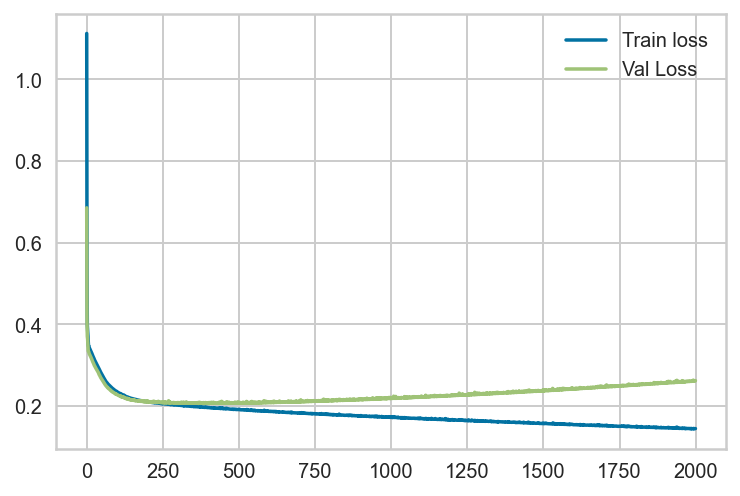

In [36]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

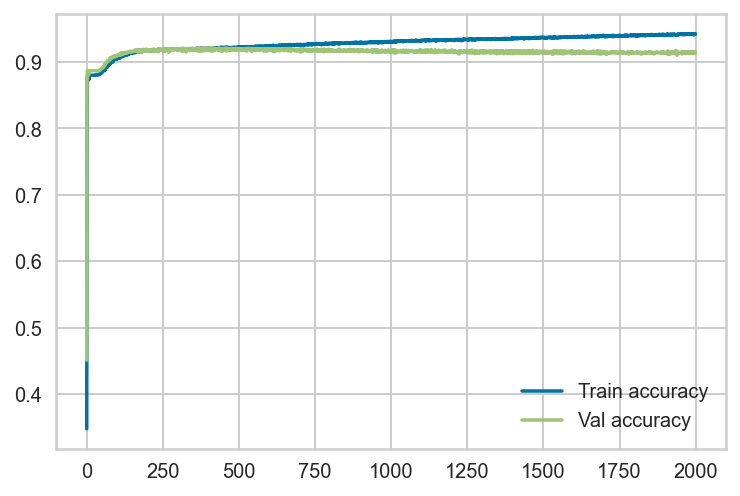

In [37]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [38]:
print(model.evaluate(X_test, y_test))

loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print("Precision is", np.mean(history.history['val_precision_m']))
print("Recall is", np.mean(history.history['val_recall_m']))


213/213 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.9134 - f1_m: 0.5531 - precision_m: 0.6042 - recall_m: 0.5608
[0.26227253675460815, 0.91339510679245, 0.5530674457550049, 0.6041675209999084, 0.5608483552932739]
Precision is 0.6542220744751394
Recall is 0.5286834338634507


# 6.4 Five-Layered Neural Network Model

In [39]:
model = Sequential()
model.add(Dense(84, input_shape=(84,), activation='relu'))
model.add(Dense(168, activation='relu'))
model.add(Dense(336, activation='relu'))
model.add(Dense(168, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_m,precision_m, recall_m])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=2000, 
                    batch_size=2000,
                    shuffle=True)

Epoch 1/2000
8/8 [==============================] - 2s 83ms/step - loss: 0.3779 - accuracy: 0.8788 - f1_m: 0.0019 - precision_m: 0.1302 - recall_m: 9.8500e-04 - val_loss: 0.3282 - val_accuracy: 0.8869 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/2000
8/8 [==============================] - 0s 42ms/step - loss: 0.3411 - accuracy: 0.8802 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.3214 - val_accuracy: 0.8869 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/2000
8/8 [==============================] - 0s 43ms/step - loss: 0.3334 - accuracy: 0.8802 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.3141 - val_accuracy: 0.8869 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/2000
8/8 [==============================] - 0s 41ms/step - loss: 0.3266 - accuracy: 0.8802 - f1_m: 0.0000e+00 - precision_m: 0.0000e+

Epoch 62/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.2135 - accuracy: 0.9151 - f1_m: 0.5748 - precision_m: 0.7155 - recall_m: 0.4820 - val_loss: 0.2113 - val_accuracy: 0.9157 - val_f1_m: 0.5652 - val_precision_m: 0.6856 - val_recall_m: 0.4823
Epoch 63/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.2131 - accuracy: 0.9137 - f1_m: 0.5697 - precision_m: 0.7070 - recall_m: 0.4773 - val_loss: 0.2102 - val_accuracy: 0.9163 - val_f1_m: 0.5690 - val_precision_m: 0.6875 - val_recall_m: 0.4870
Epoch 64/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.2126 - accuracy: 0.9139 - f1_m: 0.5704 - precision_m: 0.7041 - recall_m: 0.4797 - val_loss: 0.2127 - val_accuracy: 0.9168 - val_f1_m: 0.6004 - val_precision_m: 0.6661 - val_recall_m: 0.5488
Epoch 65/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.2133 - accuracy: 0.9143 - f1_m: 0.5694 - precision_m: 0.7140 - recall_m: 0.4754 - val_loss: 0.2128 - val_accuracy: 0.9157 - va

Epoch 93/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.2059 - accuracy: 0.9166 - f1_m: 0.5912 - precision_m: 0.7171 - recall_m: 0.5043 - val_loss: 0.2080 - val_accuracy: 0.9185 - val_f1_m: 0.5939 - val_precision_m: 0.6886 - val_recall_m: 0.5245
Epoch 94/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.2056 - accuracy: 0.9174 - f1_m: 0.5967 - precision_m: 0.7193 - recall_m: 0.5109 - val_loss: 0.2077 - val_accuracy: 0.9181 - val_f1_m: 0.5922 - val_precision_m: 0.6861 - val_recall_m: 0.5234
Epoch 95/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.2053 - accuracy: 0.9174 - f1_m: 0.6025 - precision_m: 0.7114 - recall_m: 0.5238 - val_loss: 0.2116 - val_accuracy: 0.9185 - val_f1_m: 0.6161 - val_precision_m: 0.6640 - val_recall_m: 0.5772
Epoch 96/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.2052 - accuracy: 0.9177 - f1_m: 0.5941 - precision_m: 0.7238 - recall_m: 0.5062 - val_loss: 0.2130 - val_accuracy: 0.9197 - va

Epoch 124/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.2011 - accuracy: 0.9194 - f1_m: 0.6082 - precision_m: 0.7298 - recall_m: 0.5235 - val_loss: 0.2099 - val_accuracy: 0.9168 - val_f1_m: 0.5515 - val_precision_m: 0.7094 - val_recall_m: 0.4532
Epoch 125/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.2015 - accuracy: 0.9168 - f1_m: 0.5997 - precision_m: 0.7099 - recall_m: 0.5233 - val_loss: 0.2084 - val_accuracy: 0.9177 - val_f1_m: 0.5733 - val_precision_m: 0.6962 - val_recall_m: 0.4898
Epoch 126/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.2006 - accuracy: 0.9186 - f1_m: 0.6066 - precision_m: 0.7218 - recall_m: 0.5251 - val_loss: 0.2070 - val_accuracy: 0.9177 - val_f1_m: 0.5832 - val_precision_m: 0.6858 - val_recall_m: 0.5094
Epoch 127/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1997 - accuracy: 0.9190 - f1_m: 0.6095 - precision_m: 0.7244 - recall_m: 0.5275 - val_loss: 0.2090 - val_accuracy: 0.9188 

Epoch 155/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1957 - accuracy: 0.9207 - f1_m: 0.6163 - precision_m: 0.7334 - recall_m: 0.5338 - val_loss: 0.2082 - val_accuracy: 0.9191 - val_f1_m: 0.6223 - val_precision_m: 0.6636 - val_recall_m: 0.5876
Epoch 156/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1980 - accuracy: 0.9201 - f1_m: 0.6190 - precision_m: 0.7246 - recall_m: 0.5466 - val_loss: 0.2193 - val_accuracy: 0.9166 - val_f1_m: 0.6503 - val_precision_m: 0.6270 - val_recall_m: 0.6764
Epoch 157/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.2010 - accuracy: 0.9193 - f1_m: 0.6162 - precision_m: 0.7314 - recall_m: 0.5488 - val_loss: 0.2119 - val_accuracy: 0.9197 - val_f1_m: 0.6453 - val_precision_m: 0.6542 - val_recall_m: 0.6383
Epoch 158/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1990 - accuracy: 0.9210 - f1_m: 0.6281 - precision_m: 0.7234 - recall_m: 0.5626 - val_loss: 0.2068 - val_accuracy: 0.9193 

Epoch 186/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1923 - accuracy: 0.9212 - f1_m: 0.6258 - precision_m: 0.7317 - recall_m: 0.5511 - val_loss: 0.2068 - val_accuracy: 0.9197 - val_f1_m: 0.6117 - val_precision_m: 0.6845 - val_recall_m: 0.5546
Epoch 187/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1912 - accuracy: 0.9228 - f1_m: 0.6299 - precision_m: 0.7332 - recall_m: 0.5532 - val_loss: 0.2075 - val_accuracy: 0.9193 - val_f1_m: 0.6123 - val_precision_m: 0.6804 - val_recall_m: 0.5589
Epoch 188/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1913 - accuracy: 0.9228 - f1_m: 0.6320 - precision_m: 0.7376 - recall_m: 0.5538 - val_loss: 0.2069 - val_accuracy: 0.9203 - val_f1_m: 0.6171 - val_precision_m: 0.6848 - val_recall_m: 0.5636
Epoch 189/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1908 - accuracy: 0.9241 - f1_m: 0.6429 - precision_m: 0.7375 - recall_m: 0.5707 - val_loss: 0.2077 - val_accuracy: 0.9200 

Epoch 217/2000
8/8 [==============================] - 0s 40ms/step - loss: 0.1891 - accuracy: 0.9248 - f1_m: 0.6418 - precision_m: 0.7457 - recall_m: 0.5675 - val_loss: 0.2084 - val_accuracy: 0.9202 - val_f1_m: 0.5985 - val_precision_m: 0.6967 - val_recall_m: 0.5266
Epoch 218/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1912 - accuracy: 0.9224 - f1_m: 0.6237 - precision_m: 0.7397 - recall_m: 0.5474 - val_loss: 0.2098 - val_accuracy: 0.9194 - val_f1_m: 0.5690 - val_precision_m: 0.7274 - val_recall_m: 0.4686
Epoch 219/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1913 - accuracy: 0.9212 - f1_m: 0.6258 - precision_m: 0.7271 - recall_m: 0.5546 - val_loss: 0.2090 - val_accuracy: 0.9194 - val_f1_m: 0.6273 - val_precision_m: 0.6606 - val_recall_m: 0.5991
Epoch 220/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1879 - accuracy: 0.9239 - f1_m: 0.6410 - precision_m: 0.7381 - recall_m: 0.5694 - val_loss: 0.2095 - val_accuracy: 0.9193 

Epoch 248/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1854 - accuracy: 0.9248 - f1_m: 0.6473 - precision_m: 0.7398 - recall_m: 0.5767 - val_loss: 0.2101 - val_accuracy: 0.9202 - val_f1_m: 0.6117 - val_precision_m: 0.6896 - val_recall_m: 0.5511
Epoch 249/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1843 - accuracy: 0.9251 - f1_m: 0.6492 - precision_m: 0.7418 - recall_m: 0.5776 - val_loss: 0.2107 - val_accuracy: 0.9197 - val_f1_m: 0.6221 - val_precision_m: 0.6786 - val_recall_m: 0.5756
Epoch 250/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1859 - accuracy: 0.9253 - f1_m: 0.6468 - precision_m: 0.7452 - recall_m: 0.5725 - val_loss: 0.2091 - val_accuracy: 0.9209 - val_f1_m: 0.6073 - val_precision_m: 0.6980 - val_recall_m: 0.5394
Epoch 251/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1853 - accuracy: 0.9253 - f1_m: 0.6451 - precision_m: 0.7497 - recall_m: 0.5698 - val_loss: 0.2120 - val_accuracy: 0.9194 

Epoch 279/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1809 - accuracy: 0.9275 - f1_m: 0.6552 - precision_m: 0.7589 - recall_m: 0.5779 - val_loss: 0.2108 - val_accuracy: 0.9215 - val_f1_m: 0.6386 - val_precision_m: 0.6708 - val_recall_m: 0.6107
Epoch 280/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1813 - accuracy: 0.9270 - f1_m: 0.6586 - precision_m: 0.7518 - recall_m: 0.5885 - val_loss: 0.2103 - val_accuracy: 0.9206 - val_f1_m: 0.6275 - val_precision_m: 0.6786 - val_recall_m: 0.5847
Epoch 281/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1804 - accuracy: 0.9272 - f1_m: 0.6566 - precision_m: 0.7544 - recall_m: 0.5826 - val_loss: 0.2095 - val_accuracy: 0.9206 - val_f1_m: 0.6145 - val_precision_m: 0.6901 - val_recall_m: 0.5550
Epoch 282/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1809 - accuracy: 0.9270 - f1_m: 0.6557 - precision_m: 0.7552 - recall_m: 0.5835 - val_loss: 0.2104 - val_accuracy: 0.9206 

Epoch 310/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1809 - accuracy: 0.9280 - f1_m: 0.6649 - precision_m: 0.7554 - recall_m: 0.6020 - val_loss: 0.2126 - val_accuracy: 0.9209 - val_f1_m: 0.6410 - val_precision_m: 0.6662 - val_recall_m: 0.6190
Epoch 311/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1777 - accuracy: 0.9286 - f1_m: 0.6641 - precision_m: 0.7627 - recall_m: 0.5908 - val_loss: 0.2102 - val_accuracy: 0.9203 - val_f1_m: 0.6020 - val_precision_m: 0.6963 - val_recall_m: 0.5316
Epoch 312/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1776 - accuracy: 0.9283 - f1_m: 0.6607 - precision_m: 0.7638 - recall_m: 0.5843 - val_loss: 0.2104 - val_accuracy: 0.9199 - val_f1_m: 0.6044 - val_precision_m: 0.6906 - val_recall_m: 0.5386
Epoch 313/2000
8/8 [==============================] - 0s 42ms/step - loss: 0.1786 - accuracy: 0.9276 - f1_m: 0.6567 - precision_m: 0.7592 - recall_m: 0.5836 - val_loss: 0.2137 - val_accuracy: 0.9205 

Epoch 341/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1765 - accuracy: 0.9277 - f1_m: 0.6684 - precision_m: 0.7443 - recall_m: 0.6110 - val_loss: 0.2115 - val_accuracy: 0.9206 - val_f1_m: 0.6006 - val_precision_m: 0.7018 - val_recall_m: 0.5260
Epoch 342/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1777 - accuracy: 0.9291 - f1_m: 0.6550 - precision_m: 0.7843 - recall_m: 0.5677 - val_loss: 0.2164 - val_accuracy: 0.9199 - val_f1_m: 0.5941 - val_precision_m: 0.7073 - val_recall_m: 0.5136
Epoch 343/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1788 - accuracy: 0.9277 - f1_m: 0.6555 - precision_m: 0.7661 - recall_m: 0.5837 - val_loss: 0.2148 - val_accuracy: 0.9188 - val_f1_m: 0.6190 - val_precision_m: 0.6689 - val_recall_m: 0.5775
Epoch 344/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1774 - accuracy: 0.9290 - f1_m: 0.6721 - precision_m: 0.7552 - recall_m: 0.6102 - val_loss: 0.2127 - val_accuracy: 0.9212 

Epoch 372/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1722 - accuracy: 0.9311 - f1_m: 0.6670 - precision_m: 0.7904 - recall_m: 0.5781 - val_loss: 0.2150 - val_accuracy: 0.9218 - val_f1_m: 0.6312 - val_precision_m: 0.6841 - val_recall_m: 0.5871
Epoch 373/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1725 - accuracy: 0.9312 - f1_m: 0.6800 - precision_m: 0.7669 - recall_m: 0.6126 - val_loss: 0.2148 - val_accuracy: 0.9207 - val_f1_m: 0.6268 - val_precision_m: 0.6754 - val_recall_m: 0.5865
Epoch 374/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1719 - accuracy: 0.9308 - f1_m: 0.6810 - precision_m: 0.7604 - recall_m: 0.6174 - val_loss: 0.2150 - val_accuracy: 0.9215 - val_f1_m: 0.6230 - val_precision_m: 0.6872 - val_recall_m: 0.5717
Epoch 375/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1713 - accuracy: 0.9308 - f1_m: 0.6734 - precision_m: 0.7792 - recall_m: 0.5956 - val_loss: 0.2144 - val_accuracy: 0.9213 

Epoch 403/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1701 - accuracy: 0.9321 - f1_m: 0.6855 - precision_m: 0.7697 - recall_m: 0.6195 - val_loss: 0.2156 - val_accuracy: 0.9212 - val_f1_m: 0.5976 - val_precision_m: 0.7101 - val_recall_m: 0.5175
Epoch 404/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1704 - accuracy: 0.9306 - f1_m: 0.6723 - precision_m: 0.7742 - recall_m: 0.5963 - val_loss: 0.2246 - val_accuracy: 0.9165 - val_f1_m: 0.6305 - val_precision_m: 0.6367 - val_recall_m: 0.6265
Epoch 405/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1711 - accuracy: 0.9308 - f1_m: 0.6761 - precision_m: 0.7710 - recall_m: 0.6055 - val_loss: 0.2178 - val_accuracy: 0.9203 - val_f1_m: 0.6361 - val_precision_m: 0.6627 - val_recall_m: 0.6131
Epoch 406/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1702 - accuracy: 0.9315 - f1_m: 0.6844 - precision_m: 0.7608 - recall_m: 0.6246 - val_loss: 0.2177 - val_accuracy: 0.9212 

Epoch 434/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1700 - accuracy: 0.9328 - f1_m: 0.6914 - precision_m: 0.7728 - recall_m: 0.6351 - val_loss: 0.2189 - val_accuracy: 0.9215 - val_f1_m: 0.6019 - val_precision_m: 0.7122 - val_recall_m: 0.5224
Epoch 435/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1685 - accuracy: 0.9333 - f1_m: 0.6829 - precision_m: 0.7918 - recall_m: 0.6045 - val_loss: 0.2185 - val_accuracy: 0.9221 - val_f1_m: 0.6162 - val_precision_m: 0.7019 - val_recall_m: 0.5503
Epoch 436/2000
8/8 [==============================] - 0s 40ms/step - loss: 0.1675 - accuracy: 0.9335 - f1_m: 0.6890 - precision_m: 0.7768 - recall_m: 0.6208 - val_loss: 0.2183 - val_accuracy: 0.9202 - val_f1_m: 0.6161 - val_precision_m: 0.6796 - val_recall_m: 0.5648
Epoch 437/2000
8/8 [==============================] - 0s 41ms/step - loss: 0.1656 - accuracy: 0.9325 - f1_m: 0.6817 - precision_m: 0.7828 - recall_m: 0.6056 - val_loss: 0.2189 - val_accuracy: 0.9221 

Epoch 465/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1643 - accuracy: 0.9336 - f1_m: 0.6875 - precision_m: 0.7895 - recall_m: 0.6127 - val_loss: 0.2261 - val_accuracy: 0.9160 - val_f1_m: 0.6324 - val_precision_m: 0.6410 - val_recall_m: 0.6252
Epoch 466/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1681 - accuracy: 0.9331 - f1_m: 0.6923 - precision_m: 0.7701 - recall_m: 0.6369 - val_loss: 0.2235 - val_accuracy: 0.9182 - val_f1_m: 0.6329 - val_precision_m: 0.6528 - val_recall_m: 0.6156
Epoch 467/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1628 - accuracy: 0.9350 - f1_m: 0.6964 - precision_m: 0.7920 - recall_m: 0.6227 - val_loss: 0.2210 - val_accuracy: 0.9224 - val_f1_m: 0.6332 - val_precision_m: 0.6848 - val_recall_m: 0.5902
Epoch 468/2000
8/8 [==============================] - 0s 45ms/step - loss: 0.1622 - accuracy: 0.9350 - f1_m: 0.6984 - precision_m: 0.7837 - recall_m: 0.6308 - val_loss: 0.2205 - val_accuracy: 0.9213 

Epoch 496/2000
8/8 [==============================] - 0s 50ms/step - loss: 0.1615 - accuracy: 0.9349 - f1_m: 0.6959 - precision_m: 0.7928 - recall_m: 0.6234 - val_loss: 0.2238 - val_accuracy: 0.9202 - val_f1_m: 0.6076 - val_precision_m: 0.6910 - val_recall_m: 0.5433
Epoch 497/2000
8/8 [==============================] - 0s 51ms/step - loss: 0.1598 - accuracy: 0.9361 - f1_m: 0.7016 - precision_m: 0.7963 - recall_m: 0.6287 - val_loss: 0.2269 - val_accuracy: 0.9175 - val_f1_m: 0.6381 - val_precision_m: 0.6451 - val_recall_m: 0.6328
Epoch 498/2000
8/8 [==============================] - 0s 43ms/step - loss: 0.1603 - accuracy: 0.9374 - f1_m: 0.7119 - precision_m: 0.7923 - recall_m: 0.6490 - val_loss: 0.2246 - val_accuracy: 0.9203 - val_f1_m: 0.5981 - val_precision_m: 0.7036 - val_recall_m: 0.5214
Epoch 499/2000
8/8 [==============================] - 0s 47ms/step - loss: 0.1613 - accuracy: 0.9358 - f1_m: 0.6964 - precision_m: 0.8023 - recall_m: 0.6197 - val_loss: 0.2283 - val_accuracy: 0.9163 

Epoch 527/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1576 - accuracy: 0.9391 - f1_m: 0.7201 - precision_m: 0.8020 - recall_m: 0.6547 - val_loss: 0.2270 - val_accuracy: 0.9197 - val_f1_m: 0.6120 - val_precision_m: 0.6785 - val_recall_m: 0.5582
Epoch 528/2000
8/8 [==============================] - 0s 42ms/step - loss: 0.1570 - accuracy: 0.9383 - f1_m: 0.7142 - precision_m: 0.8020 - recall_m: 0.6459 - val_loss: 0.2277 - val_accuracy: 0.9197 - val_f1_m: 0.6043 - val_precision_m: 0.6932 - val_recall_m: 0.5365
Epoch 529/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1577 - accuracy: 0.9362 - f1_m: 0.6967 - precision_m: 0.8069 - recall_m: 0.6154 - val_loss: 0.2329 - val_accuracy: 0.9166 - val_f1_m: 0.6425 - val_precision_m: 0.6363 - val_recall_m: 0.6510
Epoch 530/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1573 - accuracy: 0.9364 - f1_m: 0.7125 - precision_m: 0.7764 - recall_m: 0.6622 - val_loss: 0.2256 - val_accuracy: 0.9200 

Epoch 558/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1561 - accuracy: 0.9388 - f1_m: 0.7178 - precision_m: 0.8037 - recall_m: 0.6533 - val_loss: 0.2364 - val_accuracy: 0.9210 - val_f1_m: 0.5928 - val_precision_m: 0.7233 - val_recall_m: 0.5033
Epoch 559/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1593 - accuracy: 0.9369 - f1_m: 0.7057 - precision_m: 0.8080 - recall_m: 0.6347 - val_loss: 0.2334 - val_accuracy: 0.9152 - val_f1_m: 0.6317 - val_precision_m: 0.6321 - val_recall_m: 0.6329
Epoch 560/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1565 - accuracy: 0.9391 - f1_m: 0.7234 - precision_m: 0.7902 - recall_m: 0.6691 - val_loss: 0.2315 - val_accuracy: 0.9205 - val_f1_m: 0.5818 - val_precision_m: 0.7223 - val_recall_m: 0.4880
Epoch 561/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1577 - accuracy: 0.9381 - f1_m: 0.7068 - precision_m: 0.8189 - recall_m: 0.6276 - val_loss: 0.2352 - val_accuracy: 0.9168 

Epoch 589/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1541 - accuracy: 0.9386 - f1_m: 0.7154 - precision_m: 0.7984 - recall_m: 0.6543 - val_loss: 0.2385 - val_accuracy: 0.9197 - val_f1_m: 0.5986 - val_precision_m: 0.7010 - val_recall_m: 0.5238
Epoch 590/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1547 - accuracy: 0.9373 - f1_m: 0.7040 - precision_m: 0.8148 - recall_m: 0.6272 - val_loss: 0.2362 - val_accuracy: 0.9175 - val_f1_m: 0.6264 - val_precision_m: 0.6555 - val_recall_m: 0.6017
Epoch 591/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1519 - accuracy: 0.9400 - f1_m: 0.7276 - precision_m: 0.7960 - recall_m: 0.6722 - val_loss: 0.2352 - val_accuracy: 0.9177 - val_f1_m: 0.6117 - val_precision_m: 0.6662 - val_recall_m: 0.5664
Epoch 592/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1509 - accuracy: 0.9389 - f1_m: 0.7132 - precision_m: 0.8154 - recall_m: 0.6360 - val_loss: 0.2392 - val_accuracy: 0.9178 

Epoch 620/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1492 - accuracy: 0.9415 - f1_m: 0.7308 - precision_m: 0.8140 - recall_m: 0.6659 - val_loss: 0.2443 - val_accuracy: 0.9141 - val_f1_m: 0.6259 - val_precision_m: 0.6343 - val_recall_m: 0.6193
Epoch 621/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1489 - accuracy: 0.9404 - f1_m: 0.7232 - precision_m: 0.8152 - recall_m: 0.6519 - val_loss: 0.2390 - val_accuracy: 0.9193 - val_f1_m: 0.6178 - val_precision_m: 0.6782 - val_recall_m: 0.5686
Epoch 622/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1477 - accuracy: 0.9414 - f1_m: 0.7342 - precision_m: 0.8030 - recall_m: 0.6774 - val_loss: 0.2379 - val_accuracy: 0.9193 - val_f1_m: 0.6128 - val_precision_m: 0.6796 - val_recall_m: 0.5585
Epoch 623/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1475 - accuracy: 0.9417 - f1_m: 0.7278 - precision_m: 0.8261 - recall_m: 0.6512 - val_loss: 0.2425 - val_accuracy: 0.9160 

Epoch 651/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1465 - accuracy: 0.9415 - f1_m: 0.7251 - precision_m: 0.8258 - recall_m: 0.6504 - val_loss: 0.2475 - val_accuracy: 0.9128 - val_f1_m: 0.6299 - val_precision_m: 0.6222 - val_recall_m: 0.6399
Epoch 652/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1466 - accuracy: 0.9411 - f1_m: 0.7373 - precision_m: 0.7935 - recall_m: 0.6905 - val_loss: 0.2441 - val_accuracy: 0.9203 - val_f1_m: 0.6056 - val_precision_m: 0.6994 - val_recall_m: 0.5344
Epoch 653/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1474 - accuracy: 0.9418 - f1_m: 0.7266 - precision_m: 0.8328 - recall_m: 0.6479 - val_loss: 0.2452 - val_accuracy: 0.9163 - val_f1_m: 0.6378 - val_precision_m: 0.6450 - val_recall_m: 0.6321
Epoch 654/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1480 - accuracy: 0.9416 - f1_m: 0.7341 - precision_m: 0.8091 - recall_m: 0.6750 - val_loss: 0.2489 - val_accuracy: 0.9152 

Epoch 682/2000
8/8 [==============================] - 0s 40ms/step - loss: 0.1443 - accuracy: 0.9433 - f1_m: 0.7406 - precision_m: 0.8174 - recall_m: 0.6804 - val_loss: 0.2495 - val_accuracy: 0.9149 - val_f1_m: 0.6154 - val_precision_m: 0.6421 - val_recall_m: 0.5936
Epoch 683/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1437 - accuracy: 0.9422 - f1_m: 0.7352 - precision_m: 0.8153 - recall_m: 0.6719 - val_loss: 0.2458 - val_accuracy: 0.9188 - val_f1_m: 0.6004 - val_precision_m: 0.6902 - val_recall_m: 0.5329
Epoch 684/2000
8/8 [==============================] - 0s 41ms/step - loss: 0.1433 - accuracy: 0.9438 - f1_m: 0.7438 - precision_m: 0.8220 - recall_m: 0.6810 - val_loss: 0.2492 - val_accuracy: 0.9141 - val_f1_m: 0.6197 - val_precision_m: 0.6329 - val_recall_m: 0.6087
Epoch 685/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1443 - accuracy: 0.9428 - f1_m: 0.7405 - precision_m: 0.8161 - recall_m: 0.6829 - val_loss: 0.2479 - val_accuracy: 0.9205 

Epoch 713/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1388 - accuracy: 0.9453 - f1_m: 0.7499 - precision_m: 0.8298 - recall_m: 0.6856 - val_loss: 0.2532 - val_accuracy: 0.9159 - val_f1_m: 0.6232 - val_precision_m: 0.6426 - val_recall_m: 0.6064
Epoch 714/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1410 - accuracy: 0.9442 - f1_m: 0.7461 - precision_m: 0.8216 - recall_m: 0.6875 - val_loss: 0.2530 - val_accuracy: 0.9153 - val_f1_m: 0.6214 - val_precision_m: 0.6430 - val_recall_m: 0.6030
Epoch 715/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1444 - accuracy: 0.9428 - f1_m: 0.7370 - precision_m: 0.8226 - recall_m: 0.6764 - val_loss: 0.2512 - val_accuracy: 0.9168 - val_f1_m: 0.5992 - val_precision_m: 0.6689 - val_recall_m: 0.5435
Epoch 716/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1446 - accuracy: 0.9429 - f1_m: 0.7374 - precision_m: 0.8190 - recall_m: 0.6759 - val_loss: 0.2580 - val_accuracy: 0.9112 

Epoch 744/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1378 - accuracy: 0.9451 - f1_m: 0.7511 - precision_m: 0.8279 - recall_m: 0.6911 - val_loss: 0.2590 - val_accuracy: 0.9113 - val_f1_m: 0.6164 - val_precision_m: 0.6134 - val_recall_m: 0.6211
Epoch 745/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1407 - accuracy: 0.9448 - f1_m: 0.7492 - precision_m: 0.8221 - recall_m: 0.6912 - val_loss: 0.2583 - val_accuracy: 0.9166 - val_f1_m: 0.6056 - val_precision_m: 0.6682 - val_recall_m: 0.5558
Epoch 746/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1406 - accuracy: 0.9449 - f1_m: 0.7495 - precision_m: 0.8221 - recall_m: 0.6899 - val_loss: 0.2571 - val_accuracy: 0.9155 - val_f1_m: 0.6106 - val_precision_m: 0.6531 - val_recall_m: 0.5754
Epoch 747/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1393 - accuracy: 0.9444 - f1_m: 0.7462 - precision_m: 0.8243 - recall_m: 0.6826 - val_loss: 0.2607 - val_accuracy: 0.9143 

Epoch 775/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1365 - accuracy: 0.9464 - f1_m: 0.7581 - precision_m: 0.8241 - recall_m: 0.7064 - val_loss: 0.2640 - val_accuracy: 0.9205 - val_f1_m: 0.6032 - val_precision_m: 0.7010 - val_recall_m: 0.5306
Epoch 776/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1401 - accuracy: 0.9437 - f1_m: 0.7355 - precision_m: 0.8441 - recall_m: 0.6609 - val_loss: 0.2606 - val_accuracy: 0.9181 - val_f1_m: 0.6120 - val_precision_m: 0.6688 - val_recall_m: 0.5660
Epoch 777/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1369 - accuracy: 0.9454 - f1_m: 0.7557 - precision_m: 0.8172 - recall_m: 0.7083 - val_loss: 0.2612 - val_accuracy: 0.9141 - val_f1_m: 0.6221 - val_precision_m: 0.6374 - val_recall_m: 0.6108
Epoch 778/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1370 - accuracy: 0.9467 - f1_m: 0.7557 - precision_m: 0.8362 - recall_m: 0.6939 - val_loss: 0.2620 - val_accuracy: 0.9174 

Epoch 806/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1347 - accuracy: 0.9471 - f1_m: 0.7562 - precision_m: 0.8424 - recall_m: 0.6911 - val_loss: 0.2637 - val_accuracy: 0.9165 - val_f1_m: 0.6081 - val_precision_m: 0.6669 - val_recall_m: 0.5607
Epoch 807/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1323 - accuracy: 0.9466 - f1_m: 0.7618 - precision_m: 0.8191 - recall_m: 0.7128 - val_loss: 0.2669 - val_accuracy: 0.9169 - val_f1_m: 0.6104 - val_precision_m: 0.6697 - val_recall_m: 0.5628
Epoch 808/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1334 - accuracy: 0.9474 - f1_m: 0.7589 - precision_m: 0.8380 - recall_m: 0.6962 - val_loss: 0.2673 - val_accuracy: 0.9140 - val_f1_m: 0.6151 - val_precision_m: 0.6413 - val_recall_m: 0.5929
Epoch 809/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1325 - accuracy: 0.9475 - f1_m: 0.7634 - precision_m: 0.8270 - recall_m: 0.7098 - val_loss: 0.2654 - val_accuracy: 0.9143 

Epoch 837/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1314 - accuracy: 0.9490 - f1_m: 0.7707 - precision_m: 0.8351 - recall_m: 0.7192 - val_loss: 0.2726 - val_accuracy: 0.9174 - val_f1_m: 0.6158 - val_precision_m: 0.6682 - val_recall_m: 0.5731
Epoch 838/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1303 - accuracy: 0.9483 - f1_m: 0.7654 - precision_m: 0.8442 - recall_m: 0.7032 - val_loss: 0.2689 - val_accuracy: 0.9153 - val_f1_m: 0.5915 - val_precision_m: 0.6696 - val_recall_m: 0.5319
Epoch 839/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1285 - accuracy: 0.9493 - f1_m: 0.7749 - precision_m: 0.8288 - recall_m: 0.7287 - val_loss: 0.2717 - val_accuracy: 0.9135 - val_f1_m: 0.6055 - val_precision_m: 0.6410 - val_recall_m: 0.5763
Epoch 840/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1295 - accuracy: 0.9501 - f1_m: 0.7707 - precision_m: 0.8522 - recall_m: 0.7064 - val_loss: 0.2726 - val_accuracy: 0.9118 

Epoch 868/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1284 - accuracy: 0.9491 - f1_m: 0.7721 - precision_m: 0.8320 - recall_m: 0.7245 - val_loss: 0.2796 - val_accuracy: 0.9096 - val_f1_m: 0.6118 - val_precision_m: 0.6115 - val_recall_m: 0.6145
Epoch 869/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1374 - accuracy: 0.9459 - f1_m: 0.7479 - precision_m: 0.8534 - recall_m: 0.6802 - val_loss: 0.2786 - val_accuracy: 0.9172 - val_f1_m: 0.6126 - val_precision_m: 0.6721 - val_recall_m: 0.5651
Epoch 870/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1363 - accuracy: 0.9447 - f1_m: 0.7543 - precision_m: 0.8138 - recall_m: 0.7143 - val_loss: 0.2774 - val_accuracy: 0.9135 - val_f1_m: 0.6187 - val_precision_m: 0.6367 - val_recall_m: 0.6042
Epoch 871/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1332 - accuracy: 0.9492 - f1_m: 0.7715 - precision_m: 0.8370 - recall_m: 0.7172 - val_loss: 0.2729 - val_accuracy: 0.9171 

Epoch 899/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1261 - accuracy: 0.9503 - f1_m: 0.7767 - precision_m: 0.8399 - recall_m: 0.7250 - val_loss: 0.2808 - val_accuracy: 0.9150 - val_f1_m: 0.5879 - val_precision_m: 0.6731 - val_recall_m: 0.5248
Epoch 900/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1257 - accuracy: 0.9505 - f1_m: 0.7753 - precision_m: 0.8492 - recall_m: 0.7152 - val_loss: 0.2821 - val_accuracy: 0.9127 - val_f1_m: 0.6100 - val_precision_m: 0.6324 - val_recall_m: 0.5914
Epoch 901/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1282 - accuracy: 0.9492 - f1_m: 0.7697 - precision_m: 0.8394 - recall_m: 0.7156 - val_loss: 0.2853 - val_accuracy: 0.9081 - val_f1_m: 0.6091 - val_precision_m: 0.6018 - val_recall_m: 0.6181
Epoch 902/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1273 - accuracy: 0.9523 - f1_m: 0.7860 - precision_m: 0.8452 - recall_m: 0.7374 - val_loss: 0.2812 - val_accuracy: 0.9155 

Epoch 930/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1237 - accuracy: 0.9514 - f1_m: 0.7808 - precision_m: 0.8453 - recall_m: 0.7270 - val_loss: 0.2826 - val_accuracy: 0.9143 - val_f1_m: 0.6008 - val_precision_m: 0.6447 - val_recall_m: 0.5639
Epoch 931/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1238 - accuracy: 0.9510 - f1_m: 0.7797 - precision_m: 0.8421 - recall_m: 0.7276 - val_loss: 0.2859 - val_accuracy: 0.9134 - val_f1_m: 0.5952 - val_precision_m: 0.6429 - val_recall_m: 0.5558
Epoch 932/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1248 - accuracy: 0.9515 - f1_m: 0.7798 - precision_m: 0.8576 - recall_m: 0.7187 - val_loss: 0.2930 - val_accuracy: 0.9082 - val_f1_m: 0.6103 - val_precision_m: 0.6006 - val_recall_m: 0.6216
Epoch 933/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1256 - accuracy: 0.9516 - f1_m: 0.7830 - precision_m: 0.8465 - recall_m: 0.7337 - val_loss: 0.2897 - val_accuracy: 0.9131 

Epoch 961/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1221 - accuracy: 0.9532 - f1_m: 0.7854 - precision_m: 0.8725 - recall_m: 0.7168 - val_loss: 0.2953 - val_accuracy: 0.9080 - val_f1_m: 0.5995 - val_precision_m: 0.6006 - val_recall_m: 0.6004
Epoch 962/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1215 - accuracy: 0.9519 - f1_m: 0.7860 - precision_m: 0.8394 - recall_m: 0.7405 - val_loss: 0.2920 - val_accuracy: 0.9135 - val_f1_m: 0.5971 - val_precision_m: 0.6473 - val_recall_m: 0.5559
Epoch 963/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1222 - accuracy: 0.9519 - f1_m: 0.7802 - precision_m: 0.8627 - recall_m: 0.7142 - val_loss: 0.2946 - val_accuracy: 0.9099 - val_f1_m: 0.6075 - val_precision_m: 0.6111 - val_recall_m: 0.6062
Epoch 964/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1219 - accuracy: 0.9514 - f1_m: 0.7861 - precision_m: 0.8328 - recall_m: 0.7472 - val_loss: 0.2916 - val_accuracy: 0.9156 

Epoch 992/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1215 - accuracy: 0.9515 - f1_m: 0.7785 - precision_m: 0.8607 - recall_m: 0.7155 - val_loss: 0.3043 - val_accuracy: 0.9088 - val_f1_m: 0.6076 - val_precision_m: 0.6003 - val_recall_m: 0.6165
Epoch 993/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1259 - accuracy: 0.9510 - f1_m: 0.7842 - precision_m: 0.8330 - recall_m: 0.7489 - val_loss: 0.3054 - val_accuracy: 0.9146 - val_f1_m: 0.5685 - val_precision_m: 0.6936 - val_recall_m: 0.4840
Epoch 994/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1314 - accuracy: 0.9479 - f1_m: 0.7550 - precision_m: 0.8730 - recall_m: 0.6782 - val_loss: 0.3037 - val_accuracy: 0.9084 - val_f1_m: 0.6145 - val_precision_m: 0.5944 - val_recall_m: 0.6373
Epoch 995/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1338 - accuracy: 0.9476 - f1_m: 0.7701 - precision_m: 0.8186 - recall_m: 0.7402 - val_loss: 0.3003 - val_accuracy: 0.9166 

Epoch 1023/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1175 - accuracy: 0.9551 - f1_m: 0.7981 - precision_m: 0.8628 - recall_m: 0.7450 - val_loss: 0.3041 - val_accuracy: 0.9141 - val_f1_m: 0.6000 - val_precision_m: 0.6471 - val_recall_m: 0.5614
Epoch 1024/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1176 - accuracy: 0.9541 - f1_m: 0.7941 - precision_m: 0.8604 - recall_m: 0.7390 - val_loss: 0.3076 - val_accuracy: 0.9091 - val_f1_m: 0.6124 - val_precision_m: 0.6020 - val_recall_m: 0.6246
Epoch 1025/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1202 - accuracy: 0.9542 - f1_m: 0.7954 - precision_m: 0.8522 - recall_m: 0.7483 - val_loss: 0.3019 - val_accuracy: 0.9138 - val_f1_m: 0.5871 - val_precision_m: 0.6523 - val_recall_m: 0.5361
Epoch 1026/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1201 - accuracy: 0.9534 - f1_m: 0.7908 - precision_m: 0.8596 - recall_m: 0.7345 - val_loss: 0.3038 - val_accuracy: 0.9

Epoch 1054/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1201 - accuracy: 0.9527 - f1_m: 0.7870 - precision_m: 0.8590 - recall_m: 0.7332 - val_loss: 0.3080 - val_accuracy: 0.9132 - val_f1_m: 0.5942 - val_precision_m: 0.6417 - val_recall_m: 0.5555
Epoch 1055/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1178 - accuracy: 0.9547 - f1_m: 0.7977 - precision_m: 0.8590 - recall_m: 0.7488 - val_loss: 0.3110 - val_accuracy: 0.9143 - val_f1_m: 0.6109 - val_precision_m: 0.6435 - val_recall_m: 0.5834
Epoch 1056/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1158 - accuracy: 0.9558 - f1_m: 0.8008 - precision_m: 0.8713 - recall_m: 0.7428 - val_loss: 0.3164 - val_accuracy: 0.9071 - val_f1_m: 0.6004 - val_precision_m: 0.5915 - val_recall_m: 0.6108
Epoch 1057/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1165 - accuracy: 0.9547 - f1_m: 0.7999 - precision_m: 0.8507 - recall_m: 0.7573 - val_loss: 0.3086 - val_accuracy: 0.9

Epoch 1085/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1164 - accuracy: 0.9548 - f1_m: 0.7975 - precision_m: 0.8599 - recall_m: 0.7458 - val_loss: 0.3118 - val_accuracy: 0.9116 - val_f1_m: 0.5992 - val_precision_m: 0.6261 - val_recall_m: 0.5764
Epoch 1086/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1145 - accuracy: 0.9560 - f1_m: 0.8015 - precision_m: 0.8717 - recall_m: 0.7427 - val_loss: 0.3179 - val_accuracy: 0.9113 - val_f1_m: 0.6142 - val_precision_m: 0.6150 - val_recall_m: 0.6154
Epoch 1087/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1137 - accuracy: 0.9553 - f1_m: 0.7992 - precision_m: 0.8597 - recall_m: 0.7473 - val_loss: 0.3106 - val_accuracy: 0.9143 - val_f1_m: 0.5938 - val_precision_m: 0.6543 - val_recall_m: 0.5464
Epoch 1088/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1129 - accuracy: 0.9568 - f1_m: 0.8055 - precision_m: 0.8709 - recall_m: 0.7507 - val_loss: 0.3188 - val_accuracy: 0.9

Epoch 1116/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1144 - accuracy: 0.9547 - f1_m: 0.7904 - precision_m: 0.8776 - recall_m: 0.7229 - val_loss: 0.3238 - val_accuracy: 0.9094 - val_f1_m: 0.6030 - val_precision_m: 0.6079 - val_recall_m: 0.6002
Epoch 1117/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1133 - accuracy: 0.9556 - f1_m: 0.8029 - precision_m: 0.8541 - recall_m: 0.7608 - val_loss: 0.3187 - val_accuracy: 0.9122 - val_f1_m: 0.5989 - val_precision_m: 0.6310 - val_recall_m: 0.5718
Epoch 1118/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1143 - accuracy: 0.9554 - f1_m: 0.7984 - precision_m: 0.8741 - recall_m: 0.7400 - val_loss: 0.3230 - val_accuracy: 0.9093 - val_f1_m: 0.6047 - val_precision_m: 0.6057 - val_recall_m: 0.6051
Epoch 1119/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1173 - accuracy: 0.9542 - f1_m: 0.7978 - precision_m: 0.8521 - recall_m: 0.7588 - val_loss: 0.3263 - val_accuracy: 0.9

Epoch 1147/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1105 - accuracy: 0.9573 - f1_m: 0.8105 - precision_m: 0.8653 - recall_m: 0.7652 - val_loss: 0.3236 - val_accuracy: 0.9144 - val_f1_m: 0.5780 - val_precision_m: 0.6694 - val_recall_m: 0.5109
Epoch 1148/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1124 - accuracy: 0.9558 - f1_m: 0.8007 - precision_m: 0.8747 - recall_m: 0.7423 - val_loss: 0.3307 - val_accuracy: 0.9059 - val_f1_m: 0.6086 - val_precision_m: 0.5813 - val_recall_m: 0.6405
Epoch 1149/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1095 - accuracy: 0.9578 - f1_m: 0.8127 - precision_m: 0.8680 - recall_m: 0.7652 - val_loss: 0.3192 - val_accuracy: 0.9132 - val_f1_m: 0.5983 - val_precision_m: 0.6406 - val_recall_m: 0.5627
Epoch 1150/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1096 - accuracy: 0.9582 - f1_m: 0.8135 - precision_m: 0.8725 - recall_m: 0.7635 - val_loss: 0.3258 - val_accuracy: 0.9

Epoch 1178/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1093 - accuracy: 0.9578 - f1_m: 0.8098 - precision_m: 0.8783 - recall_m: 0.7559 - val_loss: 0.3341 - val_accuracy: 0.9097 - val_f1_m: 0.6062 - val_precision_m: 0.6112 - val_recall_m: 0.6038
Epoch 1179/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1106 - accuracy: 0.9571 - f1_m: 0.8082 - precision_m: 0.8644 - recall_m: 0.7665 - val_loss: 0.3315 - val_accuracy: 0.9118 - val_f1_m: 0.5884 - val_precision_m: 0.6398 - val_recall_m: 0.5467
Epoch 1180/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1103 - accuracy: 0.9580 - f1_m: 0.8084 - precision_m: 0.8846 - recall_m: 0.7474 - val_loss: 0.3351 - val_accuracy: 0.9105 - val_f1_m: 0.6075 - val_precision_m: 0.6122 - val_recall_m: 0.6041
Epoch 1181/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1100 - accuracy: 0.9575 - f1_m: 0.8101 - precision_m: 0.8763 - recall_m: 0.7548 - val_loss: 0.3362 - val_accuracy: 0.9

Epoch 1209/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1066 - accuracy: 0.9591 - f1_m: 0.8172 - precision_m: 0.8769 - recall_m: 0.7655 - val_loss: 0.3358 - val_accuracy: 0.9131 - val_f1_m: 0.5963 - val_precision_m: 0.6430 - val_recall_m: 0.5580
Epoch 1210/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1091 - accuracy: 0.9575 - f1_m: 0.8100 - precision_m: 0.8731 - recall_m: 0.7576 - val_loss: 0.3495 - val_accuracy: 0.9053 - val_f1_m: 0.5945 - val_precision_m: 0.5872 - val_recall_m: 0.6039
Epoch 1211/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1100 - accuracy: 0.9579 - f1_m: 0.8101 - precision_m: 0.8813 - recall_m: 0.7529 - val_loss: 0.3404 - val_accuracy: 0.9116 - val_f1_m: 0.6047 - val_precision_m: 0.6282 - val_recall_m: 0.5847
Epoch 1212/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1075 - accuracy: 0.9586 - f1_m: 0.8160 - precision_m: 0.8670 - recall_m: 0.7720 - val_loss: 0.3380 - val_accuracy: 0.9

Epoch 1240/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1053 - accuracy: 0.9595 - f1_m: 0.8205 - precision_m: 0.8769 - recall_m: 0.7720 - val_loss: 0.3471 - val_accuracy: 0.9124 - val_f1_m: 0.5932 - val_precision_m: 0.6373 - val_recall_m: 0.5569
Epoch 1241/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1051 - accuracy: 0.9591 - f1_m: 0.8150 - precision_m: 0.8818 - recall_m: 0.7607 - val_loss: 0.3500 - val_accuracy: 0.9071 - val_f1_m: 0.6044 - val_precision_m: 0.5937 - val_recall_m: 0.6176
Epoch 1242/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1049 - accuracy: 0.9586 - f1_m: 0.8164 - precision_m: 0.8715 - recall_m: 0.7697 - val_loss: 0.3420 - val_accuracy: 0.9140 - val_f1_m: 0.5958 - val_precision_m: 0.6475 - val_recall_m: 0.5534
Epoch 1243/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1055 - accuracy: 0.9598 - f1_m: 0.8203 - precision_m: 0.8828 - recall_m: 0.7676 - val_loss: 0.3494 - val_accuracy: 0.9

Epoch 1271/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1083 - accuracy: 0.9587 - f1_m: 0.8170 - precision_m: 0.8741 - recall_m: 0.7750 - val_loss: 0.3678 - val_accuracy: 0.9165 - val_f1_m: 0.5656 - val_precision_m: 0.7002 - val_recall_m: 0.4766
Epoch 1272/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1110 - accuracy: 0.9548 - f1_m: 0.7967 - precision_m: 0.8669 - recall_m: 0.7474 - val_loss: 0.3497 - val_accuracy: 0.9082 - val_f1_m: 0.6000 - val_precision_m: 0.6024 - val_recall_m: 0.6003
Epoch 1273/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1027 - accuracy: 0.9611 - f1_m: 0.8267 - precision_m: 0.8816 - recall_m: 0.7793 - val_loss: 0.3508 - val_accuracy: 0.9116 - val_f1_m: 0.5854 - val_precision_m: 0.6359 - val_recall_m: 0.5443
Epoch 1274/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1036 - accuracy: 0.9602 - f1_m: 0.8224 - precision_m: 0.8820 - recall_m: 0.7737 - val_loss: 0.3566 - val_accuracy: 0.9

Epoch 1302/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1035 - accuracy: 0.9596 - f1_m: 0.8222 - precision_m: 0.8724 - recall_m: 0.7818 - val_loss: 0.3551 - val_accuracy: 0.9119 - val_f1_m: 0.5853 - val_precision_m: 0.6344 - val_recall_m: 0.5452
Epoch 1303/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1003 - accuracy: 0.9617 - f1_m: 0.8291 - precision_m: 0.8931 - recall_m: 0.7749 - val_loss: 0.3606 - val_accuracy: 0.9099 - val_f1_m: 0.6036 - val_precision_m: 0.6097 - val_recall_m: 0.5993
Epoch 1304/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1008 - accuracy: 0.9619 - f1_m: 0.8318 - precision_m: 0.8826 - recall_m: 0.7874 - val_loss: 0.3590 - val_accuracy: 0.9124 - val_f1_m: 0.5858 - val_precision_m: 0.6428 - val_recall_m: 0.5407
Epoch 1305/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1026 - accuracy: 0.9600 - f1_m: 0.8204 - precision_m: 0.8872 - recall_m: 0.7664 - val_loss: 0.3609 - val_accuracy: 0.9

Epoch 1333/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1031 - accuracy: 0.9601 - f1_m: 0.8214 - precision_m: 0.8890 - recall_m: 0.7656 - val_loss: 0.3616 - val_accuracy: 0.9102 - val_f1_m: 0.5862 - val_precision_m: 0.6168 - val_recall_m: 0.5601
Epoch 1334/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.1012 - accuracy: 0.9607 - f1_m: 0.8257 - precision_m: 0.8749 - recall_m: 0.7829 - val_loss: 0.3649 - val_accuracy: 0.9135 - val_f1_m: 0.5982 - val_precision_m: 0.6451 - val_recall_m: 0.5602
Epoch 1335/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1010 - accuracy: 0.9619 - f1_m: 0.8284 - precision_m: 0.8985 - recall_m: 0.7700 - val_loss: 0.3676 - val_accuracy: 0.9107 - val_f1_m: 0.5953 - val_precision_m: 0.6188 - val_recall_m: 0.5751
Epoch 1336/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0986 - accuracy: 0.9629 - f1_m: 0.8358 - precision_m: 0.8861 - recall_m: 0.7920 - val_loss: 0.3674 - val_accuracy: 0.9

Epoch 1364/2000
8/8 [==============================] - 0s 36ms/step - loss: 0.1030 - accuracy: 0.9605 - f1_m: 0.8251 - precision_m: 0.8792 - recall_m: 0.7859 - val_loss: 0.3764 - val_accuracy: 0.9146 - val_f1_m: 0.5874 - val_precision_m: 0.6583 - val_recall_m: 0.5318
Epoch 1365/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0990 - accuracy: 0.9628 - f1_m: 0.8335 - precision_m: 0.8952 - recall_m: 0.7830 - val_loss: 0.3826 - val_accuracy: 0.9034 - val_f1_m: 0.5967 - val_precision_m: 0.5726 - val_recall_m: 0.6253
Epoch 1366/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1032 - accuracy: 0.9611 - f1_m: 0.8237 - precision_m: 0.8882 - recall_m: 0.7770 - val_loss: 0.3806 - val_accuracy: 0.9143 - val_f1_m: 0.5634 - val_precision_m: 0.6723 - val_recall_m: 0.4877
Epoch 1367/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.1071 - accuracy: 0.9578 - f1_m: 0.8128 - precision_m: 0.8718 - recall_m: 0.7721 - val_loss: 0.3777 - val_accuracy: 0.9

Epoch 1395/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0975 - accuracy: 0.9619 - f1_m: 0.8315 - precision_m: 0.8794 - recall_m: 0.7903 - val_loss: 0.3816 - val_accuracy: 0.9087 - val_f1_m: 0.5960 - val_precision_m: 0.6070 - val_recall_m: 0.5868
Epoch 1396/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0955 - accuracy: 0.9646 - f1_m: 0.8414 - precision_m: 0.9080 - recall_m: 0.7853 - val_loss: 0.3839 - val_accuracy: 0.9128 - val_f1_m: 0.6005 - val_precision_m: 0.6320 - val_recall_m: 0.5738
Epoch 1397/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0967 - accuracy: 0.9621 - f1_m: 0.8317 - precision_m: 0.8888 - recall_m: 0.7838 - val_loss: 0.3817 - val_accuracy: 0.9068 - val_f1_m: 0.5973 - val_precision_m: 0.5918 - val_recall_m: 0.6049
Epoch 1398/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0966 - accuracy: 0.9638 - f1_m: 0.8404 - precision_m: 0.8899 - recall_m: 0.7990 - val_loss: 0.3811 - val_accuracy: 0.9

Epoch 1426/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0935 - accuracy: 0.9650 - f1_m: 0.8445 - precision_m: 0.9042 - recall_m: 0.7935 - val_loss: 0.3865 - val_accuracy: 0.9103 - val_f1_m: 0.6019 - val_precision_m: 0.6144 - val_recall_m: 0.5914
Epoch 1427/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0976 - accuracy: 0.9626 - f1_m: 0.8336 - precision_m: 0.8901 - recall_m: 0.7901 - val_loss: 0.3907 - val_accuracy: 0.9141 - val_f1_m: 0.5842 - val_precision_m: 0.6589 - val_recall_m: 0.5269
Epoch 1428/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1031 - accuracy: 0.9591 - f1_m: 0.8141 - precision_m: 0.8969 - recall_m: 0.7564 - val_loss: 0.4116 - val_accuracy: 0.8959 - val_f1_m: 0.5914 - val_precision_m: 0.5372 - val_recall_m: 0.6598
Epoch 1429/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1074 - accuracy: 0.9582 - f1_m: 0.8153 - precision_m: 0.8741 - recall_m: 0.7799 - val_loss: 0.3909 - val_accuracy: 0.9

Epoch 1457/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0975 - accuracy: 0.9625 - f1_m: 0.8325 - precision_m: 0.8971 - recall_m: 0.7834 - val_loss: 0.3915 - val_accuracy: 0.9068 - val_f1_m: 0.5881 - val_precision_m: 0.5931 - val_recall_m: 0.5852
Epoch 1458/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0939 - accuracy: 0.9643 - f1_m: 0.8411 - precision_m: 0.8986 - recall_m: 0.7914 - val_loss: 0.3945 - val_accuracy: 0.9060 - val_f1_m: 0.5845 - val_precision_m: 0.5900 - val_recall_m: 0.5809
Epoch 1459/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0948 - accuracy: 0.9638 - f1_m: 0.8390 - precision_m: 0.8995 - recall_m: 0.7886 - val_loss: 0.3926 - val_accuracy: 0.9132 - val_f1_m: 0.5906 - val_precision_m: 0.6387 - val_recall_m: 0.5509
Epoch 1460/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0940 - accuracy: 0.9652 - f1_m: 0.8450 - precision_m: 0.8991 - recall_m: 0.7992 - val_loss: 0.3914 - val_accuracy: 0.9

Epoch 1488/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0957 - accuracy: 0.9640 - f1_m: 0.8388 - precision_m: 0.9010 - recall_m: 0.7892 - val_loss: 0.4012 - val_accuracy: 0.9132 - val_f1_m: 0.5991 - val_precision_m: 0.6357 - val_recall_m: 0.5682
Epoch 1489/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0965 - accuracy: 0.9627 - f1_m: 0.8349 - precision_m: 0.8830 - recall_m: 0.7978 - val_loss: 0.3975 - val_accuracy: 0.9107 - val_f1_m: 0.5861 - val_precision_m: 0.6219 - val_recall_m: 0.5556
Epoch 1490/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0946 - accuracy: 0.9652 - f1_m: 0.8425 - precision_m: 0.9176 - recall_m: 0.7831 - val_loss: 0.4029 - val_accuracy: 0.9057 - val_f1_m: 0.5915 - val_precision_m: 0.5830 - val_recall_m: 0.6022
Epoch 1491/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0964 - accuracy: 0.9641 - f1_m: 0.8409 - precision_m: 0.8991 - recall_m: 0.7975 - val_loss: 0.4025 - val_accuracy: 0.9

Epoch 1519/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0932 - accuracy: 0.9657 - f1_m: 0.8475 - precision_m: 0.9045 - recall_m: 0.8000 - val_loss: 0.4094 - val_accuracy: 0.9122 - val_f1_m: 0.6044 - val_precision_m: 0.6281 - val_recall_m: 0.5843
Epoch 1520/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0924 - accuracy: 0.9651 - f1_m: 0.8449 - precision_m: 0.9013 - recall_m: 0.7969 - val_loss: 0.4049 - val_accuracy: 0.9122 - val_f1_m: 0.5888 - val_precision_m: 0.6289 - val_recall_m: 0.5552
Epoch 1521/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0909 - accuracy: 0.9666 - f1_m: 0.8509 - precision_m: 0.9143 - recall_m: 0.7968 - val_loss: 0.4049 - val_accuracy: 0.9137 - val_f1_m: 0.5956 - val_precision_m: 0.6420 - val_recall_m: 0.5577
Epoch 1522/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0926 - accuracy: 0.9649 - f1_m: 0.8461 - precision_m: 0.8953 - recall_m: 0.8067 - val_loss: 0.4033 - val_accuracy: 0.9

Epoch 1550/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0899 - accuracy: 0.9665 - f1_m: 0.8518 - precision_m: 0.9058 - recall_m: 0.8053 - val_loss: 0.4181 - val_accuracy: 0.9055 - val_f1_m: 0.5886 - val_precision_m: 0.5840 - val_recall_m: 0.5954
Epoch 1551/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0890 - accuracy: 0.9667 - f1_m: 0.8518 - precision_m: 0.9093 - recall_m: 0.8023 - val_loss: 0.4134 - val_accuracy: 0.9090 - val_f1_m: 0.5769 - val_precision_m: 0.6089 - val_recall_m: 0.5496
Epoch 1552/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0892 - accuracy: 0.9682 - f1_m: 0.8590 - precision_m: 0.9110 - recall_m: 0.8140 - val_loss: 0.4135 - val_accuracy: 0.9115 - val_f1_m: 0.5854 - val_precision_m: 0.6300 - val_recall_m: 0.5486
Epoch 1553/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0886 - accuracy: 0.9670 - f1_m: 0.8532 - precision_m: 0.9131 - recall_m: 0.8017 - val_loss: 0.4155 - val_accuracy: 0.9

Epoch 1581/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0876 - accuracy: 0.9677 - f1_m: 0.8562 - precision_m: 0.9143 - recall_m: 0.8055 - val_loss: 0.4206 - val_accuracy: 0.9068 - val_f1_m: 0.5831 - val_precision_m: 0.5933 - val_recall_m: 0.5757
Epoch 1582/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0880 - accuracy: 0.9670 - f1_m: 0.8544 - precision_m: 0.9066 - recall_m: 0.8100 - val_loss: 0.4253 - val_accuracy: 0.9056 - val_f1_m: 0.5883 - val_precision_m: 0.5858 - val_recall_m: 0.5931
Epoch 1583/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0894 - accuracy: 0.9652 - f1_m: 0.8464 - precision_m: 0.8954 - recall_m: 0.8061 - val_loss: 0.4207 - val_accuracy: 0.9119 - val_f1_m: 0.5927 - val_precision_m: 0.6309 - val_recall_m: 0.5611
Epoch 1584/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0881 - accuracy: 0.9674 - f1_m: 0.8545 - precision_m: 0.9131 - recall_m: 0.8052 - val_loss: 0.4224 - val_accuracy: 0.9

Epoch 1612/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0874 - accuracy: 0.9682 - f1_m: 0.8604 - precision_m: 0.9069 - recall_m: 0.8203 - val_loss: 0.4268 - val_accuracy: 0.9081 - val_f1_m: 0.5767 - val_precision_m: 0.6033 - val_recall_m: 0.5541
Epoch 1613/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0856 - accuracy: 0.9675 - f1_m: 0.8550 - precision_m: 0.9186 - recall_m: 0.8012 - val_loss: 0.4346 - val_accuracy: 0.9122 - val_f1_m: 0.5928 - val_precision_m: 0.6241 - val_recall_m: 0.5665
Epoch 1614/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0898 - accuracy: 0.9660 - f1_m: 0.8505 - precision_m: 0.9008 - recall_m: 0.8110 - val_loss: 0.4318 - val_accuracy: 0.9135 - val_f1_m: 0.5743 - val_precision_m: 0.6498 - val_recall_m: 0.5164
Epoch 1615/2000
8/8 [==============================] - 0s 43ms/step - loss: 0.0881 - accuracy: 0.9675 - f1_m: 0.8555 - precision_m: 0.9169 - recall_m: 0.8056 - val_loss: 0.4344 - val_accuracy: 0.9

Epoch 1643/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.1013 - accuracy: 0.9645 - f1_m: 0.8398 - precision_m: 0.9104 - recall_m: 0.7833 - val_loss: 0.4498 - val_accuracy: 0.8985 - val_f1_m: 0.5991 - val_precision_m: 0.5505 - val_recall_m: 0.6599
Epoch 1644/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0947 - accuracy: 0.9646 - f1_m: 0.8454 - precision_m: 0.8945 - recall_m: 0.8066 - val_loss: 0.4304 - val_accuracy: 0.9113 - val_f1_m: 0.5835 - val_precision_m: 0.6288 - val_recall_m: 0.5462
Epoch 1645/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0892 - accuracy: 0.9677 - f1_m: 0.8570 - precision_m: 0.9148 - recall_m: 0.8078 - val_loss: 0.4373 - val_accuracy: 0.9078 - val_f1_m: 0.5869 - val_precision_m: 0.6030 - val_recall_m: 0.5738
Epoch 1646/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0870 - accuracy: 0.9682 - f1_m: 0.8603 - precision_m: 0.9094 - recall_m: 0.8177 - val_loss: 0.4402 - val_accuracy: 0.9

Epoch 1674/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0870 - accuracy: 0.9669 - f1_m: 0.8538 - precision_m: 0.9013 - recall_m: 0.8158 - val_loss: 0.4435 - val_accuracy: 0.9134 - val_f1_m: 0.5729 - val_precision_m: 0.6545 - val_recall_m: 0.5119
Epoch 1675/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0891 - accuracy: 0.9650 - f1_m: 0.8441 - precision_m: 0.9024 - recall_m: 0.8000 - val_loss: 0.4409 - val_accuracy: 0.9056 - val_f1_m: 0.5827 - val_precision_m: 0.5838 - val_recall_m: 0.5837
Epoch 1676/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0828 - accuracy: 0.9699 - f1_m: 0.8659 - precision_m: 0.9246 - recall_m: 0.8154 - val_loss: 0.4389 - val_accuracy: 0.9113 - val_f1_m: 0.5837 - val_precision_m: 0.6249 - val_recall_m: 0.5495
Epoch 1677/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0832 - accuracy: 0.9696 - f1_m: 0.8675 - precision_m: 0.9093 - recall_m: 0.8315 - val_loss: 0.4395 - val_accuracy: 0.9

Epoch 1705/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0862 - accuracy: 0.9686 - f1_m: 0.8618 - precision_m: 0.9098 - recall_m: 0.8193 - val_loss: 0.4480 - val_accuracy: 0.9115 - val_f1_m: 0.5799 - val_precision_m: 0.6329 - val_recall_m: 0.5380
Epoch 1706/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0882 - accuracy: 0.9670 - f1_m: 0.8545 - precision_m: 0.9041 - recall_m: 0.8148 - val_loss: 0.4396 - val_accuracy: 0.9066 - val_f1_m: 0.5752 - val_precision_m: 0.5937 - val_recall_m: 0.5598
Epoch 1707/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0867 - accuracy: 0.9677 - f1_m: 0.8561 - precision_m: 0.9160 - recall_m: 0.8075 - val_loss: 0.4555 - val_accuracy: 0.9037 - val_f1_m: 0.5896 - val_precision_m: 0.5740 - val_recall_m: 0.6081
Epoch 1708/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0894 - accuracy: 0.9657 - f1_m: 0.8503 - precision_m: 0.8914 - recall_m: 0.8207 - val_loss: 0.4552 - val_accuracy: 0.9

Epoch 1736/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0811 - accuracy: 0.9694 - f1_m: 0.8641 - precision_m: 0.9263 - recall_m: 0.8115 - val_loss: 0.4635 - val_accuracy: 0.9078 - val_f1_m: 0.5757 - val_precision_m: 0.6012 - val_recall_m: 0.5540
Epoch 1737/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0824 - accuracy: 0.9687 - f1_m: 0.8638 - precision_m: 0.9059 - recall_m: 0.8272 - val_loss: 0.4535 - val_accuracy: 0.9065 - val_f1_m: 0.5814 - val_precision_m: 0.5890 - val_recall_m: 0.5758
Epoch 1738/2000
8/8 [==============================] - 0s 36ms/step - loss: 0.0828 - accuracy: 0.9680 - f1_m: 0.8577 - precision_m: 0.9154 - recall_m: 0.8091 - val_loss: 0.4588 - val_accuracy: 0.9119 - val_f1_m: 0.5797 - val_precision_m: 0.6311 - val_recall_m: 0.5380
Epoch 1739/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0832 - accuracy: 0.9691 - f1_m: 0.8616 - precision_m: 0.9170 - recall_m: 0.8165 - val_loss: 0.4519 - val_accuracy: 0.9

Epoch 1767/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0840 - accuracy: 0.9689 - f1_m: 0.8631 - precision_m: 0.9154 - recall_m: 0.8207 - val_loss: 0.4579 - val_accuracy: 0.9059 - val_f1_m: 0.5846 - val_precision_m: 0.5840 - val_recall_m: 0.5865
Epoch 1768/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0883 - accuracy: 0.9679 - f1_m: 0.8562 - precision_m: 0.9226 - recall_m: 0.8025 - val_loss: 0.4679 - val_accuracy: 0.9060 - val_f1_m: 0.5842 - val_precision_m: 0.5844 - val_recall_m: 0.5859
Epoch 1769/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0917 - accuracy: 0.9665 - f1_m: 0.8533 - precision_m: 0.8945 - recall_m: 0.8189 - val_loss: 0.4589 - val_accuracy: 0.9103 - val_f1_m: 0.5826 - val_precision_m: 0.6107 - val_recall_m: 0.5586
Epoch 1770/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0838 - accuracy: 0.9682 - f1_m: 0.8592 - precision_m: 0.9143 - recall_m: 0.8113 - val_loss: 0.4611 - val_accuracy: 0.9

Epoch 1798/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0787 - accuracy: 0.9707 - f1_m: 0.8701 - precision_m: 0.9267 - recall_m: 0.8212 - val_loss: 0.4701 - val_accuracy: 0.9025 - val_f1_m: 0.5861 - val_precision_m: 0.5681 - val_recall_m: 0.6070
Epoch 1799/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0786 - accuracy: 0.9698 - f1_m: 0.8664 - precision_m: 0.9169 - recall_m: 0.8238 - val_loss: 0.4662 - val_accuracy: 0.9105 - val_f1_m: 0.5719 - val_precision_m: 0.6266 - val_recall_m: 0.5278
Epoch 1800/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0777 - accuracy: 0.9716 - f1_m: 0.8745 - precision_m: 0.9285 - recall_m: 0.8281 - val_loss: 0.4723 - val_accuracy: 0.9027 - val_f1_m: 0.5857 - val_precision_m: 0.5679 - val_recall_m: 0.6068
Epoch 1801/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0790 - accuracy: 0.9703 - f1_m: 0.8699 - precision_m: 0.9170 - recall_m: 0.8306 - val_loss: 0.4661 - val_accuracy: 0.9

Epoch 1829/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0794 - accuracy: 0.9716 - f1_m: 0.8741 - precision_m: 0.9335 - recall_m: 0.8246 - val_loss: 0.4753 - val_accuracy: 0.9055 - val_f1_m: 0.5831 - val_precision_m: 0.5843 - val_recall_m: 0.5839
Epoch 1830/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0795 - accuracy: 0.9699 - f1_m: 0.8682 - precision_m: 0.9100 - recall_m: 0.8331 - val_loss: 0.4798 - val_accuracy: 0.9118 - val_f1_m: 0.5678 - val_precision_m: 0.6448 - val_recall_m: 0.5095
Epoch 1831/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0800 - accuracy: 0.9705 - f1_m: 0.8686 - precision_m: 0.9272 - recall_m: 0.8203 - val_loss: 0.4793 - val_accuracy: 0.9052 - val_f1_m: 0.5859 - val_precision_m: 0.5810 - val_recall_m: 0.5929
Epoch 1832/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0795 - accuracy: 0.9701 - f1_m: 0.8678 - precision_m: 0.9171 - recall_m: 0.8256 - val_loss: 0.4743 - val_accuracy: 0.9

Epoch 1860/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0760 - accuracy: 0.9720 - f1_m: 0.8771 - precision_m: 0.9233 - recall_m: 0.8359 - val_loss: 0.4800 - val_accuracy: 0.9056 - val_f1_m: 0.5758 - val_precision_m: 0.5850 - val_recall_m: 0.5688
Epoch 1861/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0780 - accuracy: 0.9713 - f1_m: 0.8726 - precision_m: 0.9309 - recall_m: 0.8221 - val_loss: 0.4878 - val_accuracy: 0.9060 - val_f1_m: 0.5877 - val_precision_m: 0.5847 - val_recall_m: 0.5921
Epoch 1862/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0782 - accuracy: 0.9710 - f1_m: 0.8728 - precision_m: 0.9211 - recall_m: 0.8331 - val_loss: 0.4821 - val_accuracy: 0.9128 - val_f1_m: 0.5858 - val_precision_m: 0.6360 - val_recall_m: 0.5450
Epoch 1863/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0770 - accuracy: 0.9708 - f1_m: 0.8715 - precision_m: 0.9202 - recall_m: 0.8295 - val_loss: 0.4830 - val_accuracy: 0.9

Epoch 1891/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0754 - accuracy: 0.9720 - f1_m: 0.8751 - precision_m: 0.9323 - recall_m: 0.8254 - val_loss: 0.4995 - val_accuracy: 0.9040 - val_f1_m: 0.5825 - val_precision_m: 0.5736 - val_recall_m: 0.5931
Epoch 1892/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0787 - accuracy: 0.9699 - f1_m: 0.8668 - precision_m: 0.9198 - recall_m: 0.8233 - val_loss: 0.4946 - val_accuracy: 0.9022 - val_f1_m: 0.5799 - val_precision_m: 0.5647 - val_recall_m: 0.5975
Epoch 1893/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0770 - accuracy: 0.9718 - f1_m: 0.8764 - precision_m: 0.9192 - recall_m: 0.8417 - val_loss: 0.4973 - val_accuracy: 0.9137 - val_f1_m: 0.5836 - val_precision_m: 0.6506 - val_recall_m: 0.5314
Epoch 1894/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0786 - accuracy: 0.9708 - f1_m: 0.8712 - precision_m: 0.9256 - recall_m: 0.8281 - val_loss: 0.4922 - val_accuracy: 0.9

Epoch 1922/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0755 - accuracy: 0.9716 - f1_m: 0.8764 - precision_m: 0.9188 - recall_m: 0.8390 - val_loss: 0.4954 - val_accuracy: 0.9100 - val_f1_m: 0.5798 - val_precision_m: 0.6101 - val_recall_m: 0.5539
Epoch 1923/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0763 - accuracy: 0.9709 - f1_m: 0.8710 - precision_m: 0.9215 - recall_m: 0.8280 - val_loss: 0.5039 - val_accuracy: 0.9060 - val_f1_m: 0.5832 - val_precision_m: 0.5845 - val_recall_m: 0.5837
Epoch 1924/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0757 - accuracy: 0.9701 - f1_m: 0.8672 - precision_m: 0.9289 - recall_m: 0.8168 - val_loss: 0.5087 - val_accuracy: 0.9012 - val_f1_m: 0.5813 - val_precision_m: 0.5584 - val_recall_m: 0.6079
Epoch 1925/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0785 - accuracy: 0.9714 - f1_m: 0.8753 - precision_m: 0.9139 - recall_m: 0.8459 - val_loss: 0.5030 - val_accuracy: 0.9

Epoch 1953/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0751 - accuracy: 0.9716 - f1_m: 0.8741 - precision_m: 0.9208 - recall_m: 0.8339 - val_loss: 0.5042 - val_accuracy: 0.9065 - val_f1_m: 0.5772 - val_precision_m: 0.5898 - val_recall_m: 0.5675
Epoch 1954/2000
8/8 [==============================] - 0s 41ms/step - loss: 0.0731 - accuracy: 0.9729 - f1_m: 0.8806 - precision_m: 0.9305 - recall_m: 0.8365 - val_loss: 0.5087 - val_accuracy: 0.9050 - val_f1_m: 0.5840 - val_precision_m: 0.5804 - val_recall_m: 0.5896
Epoch 1955/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0721 - accuracy: 0.9738 - f1_m: 0.8861 - precision_m: 0.9288 - recall_m: 0.8478 - val_loss: 0.5050 - val_accuracy: 0.9122 - val_f1_m: 0.5740 - val_precision_m: 0.6405 - val_recall_m: 0.5221
Epoch 1956/2000
8/8 [==============================] - 0s 37ms/step - loss: 0.0775 - accuracy: 0.9701 - f1_m: 0.8690 - precision_m: 0.9131 - recall_m: 0.8344 - val_loss: 0.5125 - val_accuracy: 0.9

Epoch 1984/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0718 - accuracy: 0.9743 - f1_m: 0.8876 - precision_m: 0.9307 - recall_m: 0.8487 - val_loss: 0.5022 - val_accuracy: 0.9087 - val_f1_m: 0.5838 - val_precision_m: 0.6060 - val_recall_m: 0.5654
Epoch 1985/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0722 - accuracy: 0.9729 - f1_m: 0.8801 - precision_m: 0.9346 - recall_m: 0.8330 - val_loss: 0.5117 - val_accuracy: 0.9007 - val_f1_m: 0.5819 - val_precision_m: 0.5619 - val_recall_m: 0.6058
Epoch 1986/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0731 - accuracy: 0.9732 - f1_m: 0.8822 - precision_m: 0.9298 - recall_m: 0.8411 - val_loss: 0.5043 - val_accuracy: 0.9082 - val_f1_m: 0.5875 - val_precision_m: 0.5975 - val_recall_m: 0.5793
Epoch 1987/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0734 - accuracy: 0.9733 - f1_m: 0.8844 - precision_m: 0.9194 - recall_m: 0.8543 - val_loss: 0.4994 - val_accuracy: 0.9

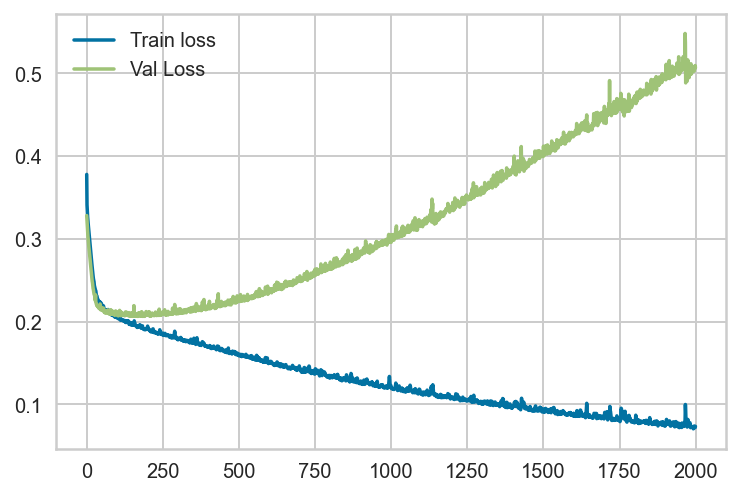

In [40]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

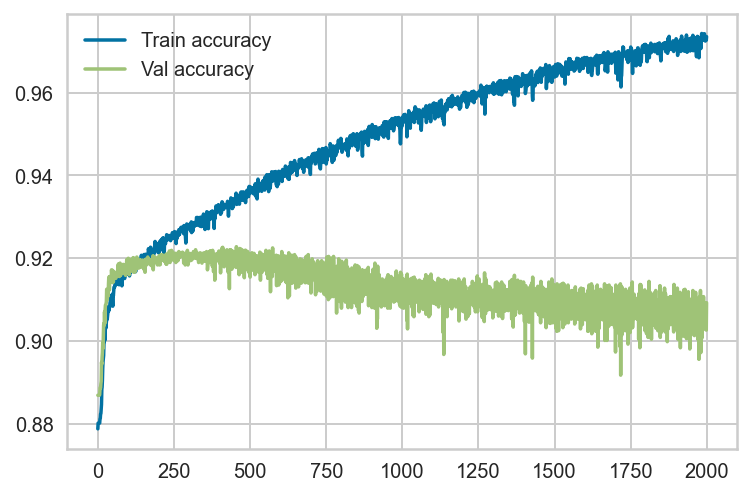

In [41]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [42]:
print(model.evaluate(X_test, y_test))

loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print("Precision is", np.mean(history.history['val_precision_m']))
print("Recall is", np.mean(history.history['val_recall_m']))

213/213 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.9093 - f1_m: 0.5448 - precision_m: 0.6052 - recall_m: 0.5543
[0.5069868564605713, 0.9092780351638794, 0.5448112487792969, 0.6052313446998596, 0.5542811155319214]
Precision is 0.6377635910362005
Recall is 0.5651457974608056


# 6.5 Seven-Layered Neural Network Model

In [43]:
model = Sequential()
model.add(Dense(84, input_shape=(84,), activation='relu'))
model.add(Dense(168, activation='relu'))
model.add(Dense(336, activation='relu'))
model.add(Dense(336, activation='relu'))
model.add(Dense(168, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_m,precision_m, recall_m])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=2000, 
                    batch_size=2000,
                    shuffle=True)

Epoch 1/2000
8/8 [==============================] - 2s 108ms/step - loss: 0.4150 - accuracy: 0.8801 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.3388 - val_accuracy: 0.8869 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.3506 - accuracy: 0.8745 - f1_m: 0.0402 - precision_m: 0.2000 - recall_m: 0.0234 - val_loss: 0.3249 - val_accuracy: 0.8853 - val_f1_m: 0.0132 - val_precision_m: 0.2548 - val_recall_m: 0.0068
Epoch 3/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.3366 - accuracy: 0.8800 - f1_m: 0.0010 - precision_m: 0.0208 - recall_m: 5.2743e-04 - val_loss: 0.3172 - val_accuracy: 0.8869 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.3310 - accuracy: 0.8802 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+

Epoch 62/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.2113 - accuracy: 0.9151 - f1_m: 0.5832 - precision_m: 0.7024 - recall_m: 0.5004 - val_loss: 0.2135 - val_accuracy: 0.9172 - val_f1_m: 0.5821 - val_precision_m: 0.6869 - val_recall_m: 0.5064
Epoch 63/2000
8/8 [==============================] - 0s 63ms/step - loss: 0.2111 - accuracy: 0.9149 - f1_m: 0.5890 - precision_m: 0.7003 - recall_m: 0.5109 - val_loss: 0.2115 - val_accuracy: 0.9162 - val_f1_m: 0.5913 - val_precision_m: 0.6646 - val_recall_m: 0.5338
Epoch 64/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.2101 - accuracy: 0.9161 - f1_m: 0.5866 - precision_m: 0.7156 - recall_m: 0.4978 - val_loss: 0.2106 - val_accuracy: 0.9194 - val_f1_m: 0.5915 - val_precision_m: 0.7002 - val_recall_m: 0.5141
Epoch 65/2000
8/8 [==============================] - 0s 61ms/step - loss: 0.2107 - accuracy: 0.9151 - f1_m: 0.5905 - precision_m: 0.6999 - recall_m: 0.5136 - val_loss: 0.2133 - val_accuracy: 0.9184 - va

Epoch 93/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.2031 - accuracy: 0.9185 - f1_m: 0.6113 - precision_m: 0.7113 - recall_m: 0.5368 - val_loss: 0.2094 - val_accuracy: 0.9185 - val_f1_m: 0.6139 - val_precision_m: 0.6662 - val_recall_m: 0.5722
Epoch 94/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.2035 - accuracy: 0.9184 - f1_m: 0.6076 - precision_m: 0.7173 - recall_m: 0.5292 - val_loss: 0.2129 - val_accuracy: 0.9184 - val_f1_m: 0.6322 - val_precision_m: 0.6559 - val_recall_m: 0.6120
Epoch 95/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.2065 - accuracy: 0.9161 - f1_m: 0.6066 - precision_m: 0.6914 - recall_m: 0.5471 - val_loss: 0.2083 - val_accuracy: 0.9188 - val_f1_m: 0.5958 - val_precision_m: 0.6891 - val_recall_m: 0.5278
Epoch 96/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.2047 - accuracy: 0.9191 - f1_m: 0.6127 - precision_m: 0.7168 - recall_m: 0.5399 - val_loss: 0.2090 - val_accuracy: 0.9182 - va

Epoch 124/2000
8/8 [==============================] - 0s 60ms/step - loss: 0.2027 - accuracy: 0.9192 - f1_m: 0.6073 - precision_m: 0.7264 - recall_m: 0.5258 - val_loss: 0.2123 - val_accuracy: 0.9193 - val_f1_m: 0.6145 - val_precision_m: 0.6779 - val_recall_m: 0.5654
Epoch 125/2000
8/8 [==============================] - 0s 61ms/step - loss: 0.2007 - accuracy: 0.9200 - f1_m: 0.6216 - precision_m: 0.7162 - recall_m: 0.5518 - val_loss: 0.2152 - val_accuracy: 0.9149 - val_f1_m: 0.6276 - val_precision_m: 0.6315 - val_recall_m: 0.6257
Epoch 126/2000
8/8 [==============================] - 0s 63ms/step - loss: 0.1989 - accuracy: 0.9195 - f1_m: 0.6189 - precision_m: 0.7149 - recall_m: 0.5470 - val_loss: 0.2093 - val_accuracy: 0.9182 - val_f1_m: 0.5988 - val_precision_m: 0.6815 - val_recall_m: 0.5369
Epoch 127/2000
8/8 [==============================] - 1s 73ms/step - loss: 0.1976 - accuracy: 0.9194 - f1_m: 0.6173 - precision_m: 0.7147 - recall_m: 0.5437 - val_loss: 0.2089 - val_accuracy: 0.9187 

Epoch 155/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1964 - accuracy: 0.9206 - f1_m: 0.6207 - precision_m: 0.7293 - recall_m: 0.5454 - val_loss: 0.2188 - val_accuracy: 0.9149 - val_f1_m: 0.6363 - val_precision_m: 0.6258 - val_recall_m: 0.6488
Epoch 156/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1986 - accuracy: 0.9198 - f1_m: 0.6249 - precision_m: 0.7153 - recall_m: 0.5689 - val_loss: 0.2110 - val_accuracy: 0.9203 - val_f1_m: 0.5834 - val_precision_m: 0.7247 - val_recall_m: 0.4912
Epoch 157/2000
8/8 [==============================] - 0s 60ms/step - loss: 0.1947 - accuracy: 0.9205 - f1_m: 0.6164 - precision_m: 0.7305 - recall_m: 0.5372 - val_loss: 0.2135 - val_accuracy: 0.9177 - val_f1_m: 0.6263 - val_precision_m: 0.6472 - val_recall_m: 0.6090
Epoch 158/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1977 - accuracy: 0.9209 - f1_m: 0.6316 - precision_m: 0.7151 - recall_m: 0.5724 - val_loss: 0.2112 - val_accuracy: 0.9185 

Epoch 186/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.1902 - accuracy: 0.9227 - f1_m: 0.6445 - precision_m: 0.7195 - recall_m: 0.5857 - val_loss: 0.2128 - val_accuracy: 0.9200 - val_f1_m: 0.5822 - val_precision_m: 0.7166 - val_recall_m: 0.4923
Epoch 187/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1910 - accuracy: 0.9222 - f1_m: 0.6322 - precision_m: 0.7295 - recall_m: 0.5590 - val_loss: 0.2087 - val_accuracy: 0.9202 - val_f1_m: 0.6221 - val_precision_m: 0.6777 - val_recall_m: 0.5781
Epoch 188/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.1885 - accuracy: 0.9234 - f1_m: 0.6406 - precision_m: 0.7322 - recall_m: 0.5702 - val_loss: 0.2119 - val_accuracy: 0.9184 - val_f1_m: 0.6242 - val_precision_m: 0.6624 - val_recall_m: 0.5932
Epoch 189/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.1886 - accuracy: 0.9243 - f1_m: 0.6451 - precision_m: 0.7319 - recall_m: 0.5774 - val_loss: 0.2093 - val_accuracy: 0.9197 

Epoch 217/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.1854 - accuracy: 0.9244 - f1_m: 0.6405 - precision_m: 0.7421 - recall_m: 0.5654 - val_loss: 0.2124 - val_accuracy: 0.9199 - val_f1_m: 0.5755 - val_precision_m: 0.7251 - val_recall_m: 0.4796
Epoch 218/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.1875 - accuracy: 0.9243 - f1_m: 0.6460 - precision_m: 0.7391 - recall_m: 0.5806 - val_loss: 0.2188 - val_accuracy: 0.9165 - val_f1_m: 0.6392 - val_precision_m: 0.6402 - val_recall_m: 0.6407
Epoch 219/2000
8/8 [==============================] - 0s 64ms/step - loss: 0.1872 - accuracy: 0.9239 - f1_m: 0.6379 - precision_m: 0.7447 - recall_m: 0.5660 - val_loss: 0.2149 - val_accuracy: 0.9200 - val_f1_m: 0.6087 - val_precision_m: 0.6908 - val_recall_m: 0.5481
Epoch 220/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1865 - accuracy: 0.9248 - f1_m: 0.6494 - precision_m: 0.7364 - recall_m: 0.5822 - val_loss: 0.2097 - val_accuracy: 0.9203 

Epoch 248/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1806 - accuracy: 0.9261 - f1_m: 0.6487 - precision_m: 0.7554 - recall_m: 0.5711 - val_loss: 0.2127 - val_accuracy: 0.9196 - val_f1_m: 0.6162 - val_precision_m: 0.6805 - val_recall_m: 0.5650
Epoch 249/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.1802 - accuracy: 0.9264 - f1_m: 0.6600 - precision_m: 0.7397 - recall_m: 0.5968 - val_loss: 0.2156 - val_accuracy: 0.9175 - val_f1_m: 0.6167 - val_precision_m: 0.6613 - val_recall_m: 0.5808
Epoch 250/2000
8/8 [==============================] - 0s 61ms/step - loss: 0.1832 - accuracy: 0.9255 - f1_m: 0.6531 - precision_m: 0.7387 - recall_m: 0.5883 - val_loss: 0.2169 - val_accuracy: 0.9193 - val_f1_m: 0.5771 - val_precision_m: 0.7101 - val_recall_m: 0.4885
Epoch 251/2000
8/8 [==============================] - 0s 63ms/step - loss: 0.1836 - accuracy: 0.9263 - f1_m: 0.6467 - precision_m: 0.7595 - recall_m: 0.5684 - val_loss: 0.2183 - val_accuracy: 0.9165 

Epoch 279/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1768 - accuracy: 0.9284 - f1_m: 0.6649 - precision_m: 0.7547 - recall_m: 0.5964 - val_loss: 0.2194 - val_accuracy: 0.9172 - val_f1_m: 0.6322 - val_precision_m: 0.6481 - val_recall_m: 0.6199
Epoch 280/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.1778 - accuracy: 0.9284 - f1_m: 0.6621 - precision_m: 0.7633 - recall_m: 0.5872 - val_loss: 0.2188 - val_accuracy: 0.9174 - val_f1_m: 0.6144 - val_precision_m: 0.6661 - val_recall_m: 0.5720
Epoch 281/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1777 - accuracy: 0.9272 - f1_m: 0.6720 - precision_m: 0.7320 - recall_m: 0.6235 - val_loss: 0.2148 - val_accuracy: 0.9187 - val_f1_m: 0.6029 - val_precision_m: 0.6841 - val_recall_m: 0.5408
Epoch 282/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.1784 - accuracy: 0.9279 - f1_m: 0.6537 - precision_m: 0.7708 - recall_m: 0.5715 - val_loss: 0.2199 - val_accuracy: 0.9159 

Epoch 310/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1760 - accuracy: 0.9280 - f1_m: 0.6662 - precision_m: 0.7467 - recall_m: 0.6078 - val_loss: 0.2200 - val_accuracy: 0.9200 - val_f1_m: 0.6139 - val_precision_m: 0.6905 - val_recall_m: 0.5547
Epoch 311/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1742 - accuracy: 0.9301 - f1_m: 0.6720 - precision_m: 0.7677 - recall_m: 0.5996 - val_loss: 0.2200 - val_accuracy: 0.9196 - val_f1_m: 0.5902 - val_precision_m: 0.7126 - val_recall_m: 0.5056
Epoch 312/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1737 - accuracy: 0.9294 - f1_m: 0.6691 - precision_m: 0.7655 - recall_m: 0.5980 - val_loss: 0.2273 - val_accuracy: 0.9153 - val_f1_m: 0.6377 - val_precision_m: 0.6324 - val_recall_m: 0.6462
Epoch 313/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1741 - accuracy: 0.9303 - f1_m: 0.6758 - precision_m: 0.7646 - recall_m: 0.6107 - val_loss: 0.2197 - val_accuracy: 0.9200 

Epoch 341/2000
8/8 [==============================] - 1s 70ms/step - loss: 0.1724 - accuracy: 0.9306 - f1_m: 0.6742 - precision_m: 0.7697 - recall_m: 0.6053 - val_loss: 0.2271 - val_accuracy: 0.9168 - val_f1_m: 0.6399 - val_precision_m: 0.6420 - val_recall_m: 0.6407
Epoch 342/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1711 - accuracy: 0.9301 - f1_m: 0.6751 - precision_m: 0.7656 - recall_m: 0.6087 - val_loss: 0.2233 - val_accuracy: 0.9181 - val_f1_m: 0.5946 - val_precision_m: 0.6958 - val_recall_m: 0.5208
Epoch 343/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1696 - accuracy: 0.9298 - f1_m: 0.6737 - precision_m: 0.7637 - recall_m: 0.6077 - val_loss: 0.2260 - val_accuracy: 0.9178 - val_f1_m: 0.6376 - val_precision_m: 0.6526 - val_recall_m: 0.6259
Epoch 344/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1681 - accuracy: 0.9318 - f1_m: 0.6867 - precision_m: 0.7642 - recall_m: 0.6257 - val_loss: 0.2240 - val_accuracy: 0.9177 

Epoch 372/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.1696 - accuracy: 0.9308 - f1_m: 0.6804 - precision_m: 0.7678 - recall_m: 0.6215 - val_loss: 0.2298 - val_accuracy: 0.9171 - val_f1_m: 0.5895 - val_precision_m: 0.6867 - val_recall_m: 0.5182
Epoch 373/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.1651 - accuracy: 0.9335 - f1_m: 0.6908 - precision_m: 0.7787 - recall_m: 0.6218 - val_loss: 0.2335 - val_accuracy: 0.9165 - val_f1_m: 0.6241 - val_precision_m: 0.6548 - val_recall_m: 0.5976
Epoch 374/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.1657 - accuracy: 0.9342 - f1_m: 0.7011 - precision_m: 0.7718 - recall_m: 0.6464 - val_loss: 0.2303 - val_accuracy: 0.9177 - val_f1_m: 0.5725 - val_precision_m: 0.7092 - val_recall_m: 0.4823
Epoch 375/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1661 - accuracy: 0.9320 - f1_m: 0.6781 - precision_m: 0.7840 - recall_m: 0.6029 - val_loss: 0.2352 - val_accuracy: 0.9131 

Epoch 403/2000
8/8 [==============================] - 0s 63ms/step - loss: 0.1616 - accuracy: 0.9357 - f1_m: 0.7012 - precision_m: 0.7947 - recall_m: 0.6340 - val_loss: 0.2352 - val_accuracy: 0.9180 - val_f1_m: 0.6079 - val_precision_m: 0.6806 - val_recall_m: 0.5507
Epoch 404/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1624 - accuracy: 0.9345 - f1_m: 0.6995 - precision_m: 0.7816 - recall_m: 0.6379 - val_loss: 0.2332 - val_accuracy: 0.9165 - val_f1_m: 0.6087 - val_precision_m: 0.6630 - val_recall_m: 0.5642
Epoch 405/2000
8/8 [==============================] - 0s 64ms/step - loss: 0.1630 - accuracy: 0.9337 - f1_m: 0.6959 - precision_m: 0.7802 - recall_m: 0.6337 - val_loss: 0.2359 - val_accuracy: 0.9169 - val_f1_m: 0.6035 - val_precision_m: 0.6640 - val_recall_m: 0.5555
Epoch 406/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1616 - accuracy: 0.9348 - f1_m: 0.6917 - precision_m: 0.7978 - recall_m: 0.6121 - val_loss: 0.2412 - val_accuracy: 0.9137 

Epoch 434/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1635 - accuracy: 0.9341 - f1_m: 0.6815 - precision_m: 0.8144 - recall_m: 0.5990 - val_loss: 0.2515 - val_accuracy: 0.9100 - val_f1_m: 0.6316 - val_precision_m: 0.6086 - val_recall_m: 0.6602
Epoch 435/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1603 - accuracy: 0.9348 - f1_m: 0.7051 - precision_m: 0.7713 - recall_m: 0.6546 - val_loss: 0.2464 - val_accuracy: 0.9134 - val_f1_m: 0.5812 - val_precision_m: 0.6651 - val_recall_m: 0.5175
Epoch 436/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1592 - accuracy: 0.9349 - f1_m: 0.6989 - precision_m: 0.7836 - recall_m: 0.6360 - val_loss: 0.2469 - val_accuracy: 0.9144 - val_f1_m: 0.6267 - val_precision_m: 0.6359 - val_recall_m: 0.6202
Epoch 437/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1574 - accuracy: 0.9372 - f1_m: 0.7039 - precision_m: 0.8089 - recall_m: 0.6266 - val_loss: 0.2629 - val_accuracy: 0.9068 

Epoch 465/2000
8/8 [==============================] - 1s 78ms/step - loss: 0.1549 - accuracy: 0.9375 - f1_m: 0.7143 - precision_m: 0.7946 - recall_m: 0.6529 - val_loss: 0.2556 - val_accuracy: 0.9169 - val_f1_m: 0.5908 - val_precision_m: 0.6759 - val_recall_m: 0.5262
Epoch 466/2000
8/8 [==============================] - 1s 81ms/step - loss: 0.1600 - accuracy: 0.9359 - f1_m: 0.7100 - precision_m: 0.7806 - recall_m: 0.6563 - val_loss: 0.2405 - val_accuracy: 0.9150 - val_f1_m: 0.6019 - val_precision_m: 0.6529 - val_recall_m: 0.5596
Epoch 467/2000
8/8 [==============================] - 1s 86ms/step - loss: 0.1537 - accuracy: 0.9374 - f1_m: 0.7039 - precision_m: 0.8093 - recall_m: 0.6291 - val_loss: 0.2494 - val_accuracy: 0.9172 - val_f1_m: 0.6118 - val_precision_m: 0.6607 - val_recall_m: 0.5711
Epoch 468/2000
8/8 [==============================] - 1s 90ms/step - loss: 0.1542 - accuracy: 0.9376 - f1_m: 0.7127 - precision_m: 0.7966 - recall_m: 0.6499 - val_loss: 0.2448 - val_accuracy: 0.9159 

Epoch 496/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1487 - accuracy: 0.9393 - f1_m: 0.7213 - precision_m: 0.8049 - recall_m: 0.6552 - val_loss: 0.2620 - val_accuracy: 0.9147 - val_f1_m: 0.5930 - val_precision_m: 0.6677 - val_recall_m: 0.5356
Epoch 497/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1498 - accuracy: 0.9393 - f1_m: 0.7222 - precision_m: 0.8020 - recall_m: 0.6631 - val_loss: 0.2681 - val_accuracy: 0.9174 - val_f1_m: 0.6223 - val_precision_m: 0.6605 - val_recall_m: 0.5899
Epoch 498/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1497 - accuracy: 0.9388 - f1_m: 0.7210 - precision_m: 0.7956 - recall_m: 0.6607 - val_loss: 0.2580 - val_accuracy: 0.9169 - val_f1_m: 0.5878 - val_precision_m: 0.6859 - val_recall_m: 0.5158
Epoch 499/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1531 - accuracy: 0.9365 - f1_m: 0.7095 - precision_m: 0.7979 - recall_m: 0.6493 - val_loss: 0.2571 - val_accuracy: 0.9119 

Epoch 527/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.1437 - accuracy: 0.9410 - f1_m: 0.7279 - precision_m: 0.8126 - recall_m: 0.6602 - val_loss: 0.2707 - val_accuracy: 0.9140 - val_f1_m: 0.6159 - val_precision_m: 0.6404 - val_recall_m: 0.5953
Epoch 528/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1445 - accuracy: 0.9413 - f1_m: 0.7304 - precision_m: 0.8143 - recall_m: 0.6667 - val_loss: 0.2739 - val_accuracy: 0.9138 - val_f1_m: 0.5840 - val_precision_m: 0.6546 - val_recall_m: 0.5285
Epoch 529/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.1454 - accuracy: 0.9406 - f1_m: 0.7316 - precision_m: 0.8018 - recall_m: 0.6776 - val_loss: 0.2764 - val_accuracy: 0.9150 - val_f1_m: 0.5713 - val_precision_m: 0.6789 - val_recall_m: 0.4950
Epoch 530/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1452 - accuracy: 0.9407 - f1_m: 0.7264 - precision_m: 0.8120 - recall_m: 0.6604 - val_loss: 0.2756 - val_accuracy: 0.9102 

Epoch 558/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1424 - accuracy: 0.9425 - f1_m: 0.7373 - precision_m: 0.8145 - recall_m: 0.6768 - val_loss: 0.2849 - val_accuracy: 0.9138 - val_f1_m: 0.6149 - val_precision_m: 0.6361 - val_recall_m: 0.5989
Epoch 559/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1404 - accuracy: 0.9422 - f1_m: 0.7368 - precision_m: 0.8080 - recall_m: 0.6808 - val_loss: 0.2883 - val_accuracy: 0.9150 - val_f1_m: 0.5909 - val_precision_m: 0.6687 - val_recall_m: 0.5311
Epoch 560/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1433 - accuracy: 0.9404 - f1_m: 0.7275 - precision_m: 0.8078 - recall_m: 0.6698 - val_loss: 0.2835 - val_accuracy: 0.9160 - val_f1_m: 0.6043 - val_precision_m: 0.6664 - val_recall_m: 0.5550
Epoch 561/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1430 - accuracy: 0.9426 - f1_m: 0.7386 - precision_m: 0.8103 - recall_m: 0.6810 - val_loss: 0.2795 - val_accuracy: 0.9156 

Epoch 589/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1344 - accuracy: 0.9446 - f1_m: 0.7489 - precision_m: 0.8186 - recall_m: 0.6938 - val_loss: 0.2943 - val_accuracy: 0.9143 - val_f1_m: 0.6027 - val_precision_m: 0.6546 - val_recall_m: 0.5599
Epoch 590/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1347 - accuracy: 0.9449 - f1_m: 0.7497 - precision_m: 0.8226 - recall_m: 0.6916 - val_loss: 0.2999 - val_accuracy: 0.9118 - val_f1_m: 0.5880 - val_precision_m: 0.6484 - val_recall_m: 0.5402
Epoch 591/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1354 - accuracy: 0.9442 - f1_m: 0.7458 - precision_m: 0.8194 - recall_m: 0.6856 - val_loss: 0.3019 - val_accuracy: 0.9116 - val_f1_m: 0.6180 - val_precision_m: 0.6241 - val_recall_m: 0.6145
Epoch 592/2000
8/8 [==============================] - 1s 70ms/step - loss: 0.1397 - accuracy: 0.9412 - f1_m: 0.7361 - precision_m: 0.8045 - recall_m: 0.6863 - val_loss: 0.2928 - val_accuracy: 0.9115 

Epoch 620/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1354 - accuracy: 0.9456 - f1_m: 0.7534 - precision_m: 0.8306 - recall_m: 0.7010 - val_loss: 0.3016 - val_accuracy: 0.9152 - val_f1_m: 0.5780 - val_precision_m: 0.6787 - val_recall_m: 0.5063
Epoch 621/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1334 - accuracy: 0.9447 - f1_m: 0.7522 - precision_m: 0.8210 - recall_m: 0.7014 - val_loss: 0.3023 - val_accuracy: 0.9144 - val_f1_m: 0.5831 - val_precision_m: 0.6685 - val_recall_m: 0.5184
Epoch 622/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1305 - accuracy: 0.9478 - f1_m: 0.7612 - precision_m: 0.8398 - recall_m: 0.6991 - val_loss: 0.3134 - val_accuracy: 0.9110 - val_f1_m: 0.5956 - val_precision_m: 0.6286 - val_recall_m: 0.5676
Epoch 623/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1306 - accuracy: 0.9473 - f1_m: 0.7604 - precision_m: 0.8361 - recall_m: 0.6995 - val_loss: 0.3117 - val_accuracy: 0.9143 

Epoch 651/2000
8/8 [==============================] - 1s 78ms/step - loss: 0.1305 - accuracy: 0.9477 - f1_m: 0.7600 - precision_m: 0.8472 - recall_m: 0.6910 - val_loss: 0.3266 - val_accuracy: 0.9080 - val_f1_m: 0.6109 - val_precision_m: 0.6126 - val_recall_m: 0.6134
Epoch 652/2000
8/8 [==============================] - 1s 80ms/step - loss: 0.1339 - accuracy: 0.9444 - f1_m: 0.7443 - precision_m: 0.8305 - recall_m: 0.6862 - val_loss: 0.3192 - val_accuracy: 0.9088 - val_f1_m: 0.5879 - val_precision_m: 0.6189 - val_recall_m: 0.5618
Epoch 653/2000
8/8 [==============================] - 1s 73ms/step - loss: 0.1328 - accuracy: 0.9471 - f1_m: 0.7600 - precision_m: 0.8314 - recall_m: 0.7039 - val_loss: 0.3126 - val_accuracy: 0.9119 - val_f1_m: 0.5952 - val_precision_m: 0.6410 - val_recall_m: 0.5575
Epoch 654/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.1290 - accuracy: 0.9482 - f1_m: 0.7657 - precision_m: 0.8395 - recall_m: 0.7067 - val_loss: 0.3175 - val_accuracy: 0.9127 

Epoch 682/2000
8/8 [==============================] - 1s 72ms/step - loss: 0.1283 - accuracy: 0.9486 - f1_m: 0.7648 - precision_m: 0.8492 - recall_m: 0.7025 - val_loss: 0.3348 - val_accuracy: 0.9109 - val_f1_m: 0.6226 - val_precision_m: 0.6147 - val_recall_m: 0.6338
Epoch 683/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.1266 - accuracy: 0.9477 - f1_m: 0.7634 - precision_m: 0.8335 - recall_m: 0.7119 - val_loss: 0.3338 - val_accuracy: 0.9082 - val_f1_m: 0.6188 - val_precision_m: 0.6034 - val_recall_m: 0.6376
Epoch 684/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1321 - accuracy: 0.9469 - f1_m: 0.7573 - precision_m: 0.8464 - recall_m: 0.6991 - val_loss: 0.3396 - val_accuracy: 0.9047 - val_f1_m: 0.6208 - val_precision_m: 0.5814 - val_recall_m: 0.6703
Epoch 685/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1264 - accuracy: 0.9502 - f1_m: 0.7767 - precision_m: 0.8428 - recall_m: 0.7253 - val_loss: 0.3277 - val_accuracy: 0.9122 

Epoch 713/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1232 - accuracy: 0.9503 - f1_m: 0.7743 - precision_m: 0.8484 - recall_m: 0.7135 - val_loss: 0.3353 - val_accuracy: 0.9091 - val_f1_m: 0.6069 - val_precision_m: 0.6138 - val_recall_m: 0.6030
Epoch 714/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1276 - accuracy: 0.9489 - f1_m: 0.7690 - precision_m: 0.8396 - recall_m: 0.7173 - val_loss: 0.3348 - val_accuracy: 0.9113 - val_f1_m: 0.5604 - val_precision_m: 0.6531 - val_recall_m: 0.4928
Epoch 715/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.1275 - accuracy: 0.9476 - f1_m: 0.7652 - precision_m: 0.8284 - recall_m: 0.7232 - val_loss: 0.3398 - val_accuracy: 0.9130 - val_f1_m: 0.5780 - val_precision_m: 0.6635 - val_recall_m: 0.5138
Epoch 716/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1264 - accuracy: 0.9478 - f1_m: 0.7631 - precision_m: 0.8405 - recall_m: 0.7089 - val_loss: 0.3336 - val_accuracy: 0.9075 

Epoch 744/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1206 - accuracy: 0.9512 - f1_m: 0.7808 - precision_m: 0.8493 - recall_m: 0.7279 - val_loss: 0.3549 - val_accuracy: 0.9113 - val_f1_m: 0.5894 - val_precision_m: 0.6409 - val_recall_m: 0.5473
Epoch 745/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1159 - accuracy: 0.9532 - f1_m: 0.7920 - precision_m: 0.8445 - recall_m: 0.7461 - val_loss: 0.3567 - val_accuracy: 0.9119 - val_f1_m: 0.5821 - val_precision_m: 0.6503 - val_recall_m: 0.5296
Epoch 746/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1173 - accuracy: 0.9529 - f1_m: 0.7867 - precision_m: 0.8586 - recall_m: 0.7270 - val_loss: 0.3626 - val_accuracy: 0.9087 - val_f1_m: 0.6129 - val_precision_m: 0.6069 - val_recall_m: 0.6224
Epoch 747/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.1187 - accuracy: 0.9506 - f1_m: 0.7742 - precision_m: 0.8567 - recall_m: 0.7116 - val_loss: 0.3690 - val_accuracy: 0.9053 

Epoch 775/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.1162 - accuracy: 0.9529 - f1_m: 0.7905 - precision_m: 0.8490 - recall_m: 0.7439 - val_loss: 0.3636 - val_accuracy: 0.9132 - val_f1_m: 0.6060 - val_precision_m: 0.6466 - val_recall_m: 0.5723
Epoch 776/2000
8/8 [==============================] - 0s 60ms/step - loss: 0.1145 - accuracy: 0.9540 - f1_m: 0.7953 - precision_m: 0.8537 - recall_m: 0.7453 - val_loss: 0.3730 - val_accuracy: 0.9106 - val_f1_m: 0.5665 - val_precision_m: 0.6463 - val_recall_m: 0.5075
Epoch 777/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1136 - accuracy: 0.9544 - f1_m: 0.7959 - precision_m: 0.8605 - recall_m: 0.7420 - val_loss: 0.3676 - val_accuracy: 0.9107 - val_f1_m: 0.6008 - val_precision_m: 0.6282 - val_recall_m: 0.5780
Epoch 778/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1155 - accuracy: 0.9531 - f1_m: 0.7840 - precision_m: 0.8612 - recall_m: 0.7213 - val_loss: 0.3734 - val_accuracy: 0.9109 

Epoch 806/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.1139 - accuracy: 0.9541 - f1_m: 0.7937 - precision_m: 0.8615 - recall_m: 0.7379 - val_loss: 0.3808 - val_accuracy: 0.9099 - val_f1_m: 0.6051 - val_precision_m: 0.6203 - val_recall_m: 0.5929
Epoch 807/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.1111 - accuracy: 0.9556 - f1_m: 0.8019 - precision_m: 0.8602 - recall_m: 0.7524 - val_loss: 0.3892 - val_accuracy: 0.9080 - val_f1_m: 0.6021 - val_precision_m: 0.6113 - val_recall_m: 0.5962
Epoch 808/2000
8/8 [==============================] - 1s 74ms/step - loss: 0.1147 - accuracy: 0.9524 - f1_m: 0.7844 - precision_m: 0.8545 - recall_m: 0.7316 - val_loss: 0.3850 - val_accuracy: 0.9118 - val_f1_m: 0.6058 - val_precision_m: 0.6348 - val_recall_m: 0.5823
Epoch 809/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.1142 - accuracy: 0.9552 - f1_m: 0.7997 - precision_m: 0.8622 - recall_m: 0.7543 - val_loss: 0.3875 - val_accuracy: 0.9119 

Epoch 837/2000
8/8 [==============================] - 1s 73ms/step - loss: 0.1140 - accuracy: 0.9544 - f1_m: 0.7968 - precision_m: 0.8599 - recall_m: 0.7470 - val_loss: 0.4040 - val_accuracy: 0.9100 - val_f1_m: 0.5448 - val_precision_m: 0.6555 - val_recall_m: 0.4686
Epoch 838/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1141 - accuracy: 0.9537 - f1_m: 0.7924 - precision_m: 0.8542 - recall_m: 0.7426 - val_loss: 0.3911 - val_accuracy: 0.9088 - val_f1_m: 0.5715 - val_precision_m: 0.6277 - val_recall_m: 0.5280
Epoch 839/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1134 - accuracy: 0.9542 - f1_m: 0.7912 - precision_m: 0.8723 - recall_m: 0.7316 - val_loss: 0.3923 - val_accuracy: 0.9110 - val_f1_m: 0.5926 - val_precision_m: 0.6369 - val_recall_m: 0.5572
Epoch 840/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.1114 - accuracy: 0.9551 - f1_m: 0.8009 - precision_m: 0.8551 - recall_m: 0.7553 - val_loss: 0.3950 - val_accuracy: 0.9112 

Epoch 868/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1104 - accuracy: 0.9558 - f1_m: 0.8018 - precision_m: 0.8636 - recall_m: 0.7504 - val_loss: 0.4087 - val_accuracy: 0.9109 - val_f1_m: 0.5818 - val_precision_m: 0.6430 - val_recall_m: 0.5333
Epoch 869/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1084 - accuracy: 0.9560 - f1_m: 0.8026 - precision_m: 0.8662 - recall_m: 0.7497 - val_loss: 0.4152 - val_accuracy: 0.9046 - val_f1_m: 0.5989 - val_precision_m: 0.5829 - val_recall_m: 0.6178
Epoch 870/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1083 - accuracy: 0.9562 - f1_m: 0.8033 - precision_m: 0.8705 - recall_m: 0.7509 - val_loss: 0.4064 - val_accuracy: 0.9081 - val_f1_m: 0.6124 - val_precision_m: 0.6058 - val_recall_m: 0.6225
Epoch 871/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1089 - accuracy: 0.9568 - f1_m: 0.8045 - precision_m: 0.8768 - recall_m: 0.7496 - val_loss: 0.4298 - val_accuracy: 0.8996 

Epoch 899/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1051 - accuracy: 0.9577 - f1_m: 0.8123 - precision_m: 0.8662 - recall_m: 0.7689 - val_loss: 0.4212 - val_accuracy: 0.9097 - val_f1_m: 0.5952 - val_precision_m: 0.6247 - val_recall_m: 0.5711
Epoch 900/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1081 - accuracy: 0.9564 - f1_m: 0.8044 - precision_m: 0.8735 - recall_m: 0.7535 - val_loss: 0.4288 - val_accuracy: 0.9096 - val_f1_m: 0.6118 - val_precision_m: 0.6134 - val_recall_m: 0.6125
Epoch 901/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1085 - accuracy: 0.9563 - f1_m: 0.8051 - precision_m: 0.8666 - recall_m: 0.7591 - val_loss: 0.4272 - val_accuracy: 0.9118 - val_f1_m: 0.5921 - val_precision_m: 0.6487 - val_recall_m: 0.5472
Epoch 902/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1133 - accuracy: 0.9538 - f1_m: 0.7874 - precision_m: 0.8708 - recall_m: 0.7372 - val_loss: 0.4221 - val_accuracy: 0.9103 

Epoch 930/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1032 - accuracy: 0.9588 - f1_m: 0.8161 - precision_m: 0.8784 - recall_m: 0.7655 - val_loss: 0.4429 - val_accuracy: 0.9043 - val_f1_m: 0.6110 - val_precision_m: 0.5819 - val_recall_m: 0.6465
Epoch 931/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.1058 - accuracy: 0.9565 - f1_m: 0.8055 - precision_m: 0.8732 - recall_m: 0.7563 - val_loss: 0.4467 - val_accuracy: 0.9071 - val_f1_m: 0.6134 - val_precision_m: 0.5960 - val_recall_m: 0.6351
Epoch 932/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.1071 - accuracy: 0.9563 - f1_m: 0.8040 - precision_m: 0.8634 - recall_m: 0.7627 - val_loss: 0.4338 - val_accuracy: 0.9088 - val_f1_m: 0.5753 - val_precision_m: 0.6262 - val_recall_m: 0.5343
Epoch 933/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.1066 - accuracy: 0.9564 - f1_m: 0.8060 - precision_m: 0.8693 - recall_m: 0.7621 - val_loss: 0.4369 - val_accuracy: 0.9090 

Epoch 961/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1093 - accuracy: 0.9553 - f1_m: 0.8041 - precision_m: 0.8583 - recall_m: 0.7664 - val_loss: 0.4463 - val_accuracy: 0.9110 - val_f1_m: 0.5511 - val_precision_m: 0.6647 - val_recall_m: 0.4733
Epoch 962/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1157 - accuracy: 0.9517 - f1_m: 0.7845 - precision_m: 0.8606 - recall_m: 0.7403 - val_loss: 0.4478 - val_accuracy: 0.9047 - val_f1_m: 0.5964 - val_precision_m: 0.5858 - val_recall_m: 0.6107
Epoch 963/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1089 - accuracy: 0.9558 - f1_m: 0.7990 - precision_m: 0.8777 - recall_m: 0.7388 - val_loss: 0.4237 - val_accuracy: 0.9078 - val_f1_m: 0.5936 - val_precision_m: 0.6092 - val_recall_m: 0.5821
Epoch 964/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.1030 - accuracy: 0.9577 - f1_m: 0.8135 - precision_m: 0.8629 - recall_m: 0.7715 - val_loss: 0.4201 - val_accuracy: 0.9107 

Epoch 992/2000
8/8 [==============================] - 1s 71ms/step - loss: 0.0991 - accuracy: 0.9599 - f1_m: 0.8248 - precision_m: 0.8720 - recall_m: 0.7886 - val_loss: 0.4609 - val_accuracy: 0.9097 - val_f1_m: 0.5849 - val_precision_m: 0.6275 - val_recall_m: 0.5501
Epoch 993/2000
8/8 [==============================] - 0s 63ms/step - loss: 0.0991 - accuracy: 0.9597 - f1_m: 0.8205 - precision_m: 0.8839 - recall_m: 0.7721 - val_loss: 0.4560 - val_accuracy: 0.9096 - val_f1_m: 0.5626 - val_precision_m: 0.6419 - val_recall_m: 0.5032
Epoch 994/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0985 - accuracy: 0.9597 - f1_m: 0.8207 - precision_m: 0.8806 - recall_m: 0.7727 - val_loss: 0.4638 - val_accuracy: 0.9078 - val_f1_m: 0.5694 - val_precision_m: 0.6266 - val_recall_m: 0.5241
Epoch 995/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0978 - accuracy: 0.9590 - f1_m: 0.8192 - precision_m: 0.8725 - recall_m: 0.7763 - val_loss: 0.4598 - val_accuracy: 0.9102 

Epoch 1023/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.0950 - accuracy: 0.9631 - f1_m: 0.8376 - precision_m: 0.8863 - recall_m: 0.7962 - val_loss: 0.4646 - val_accuracy: 0.9080 - val_f1_m: 0.5742 - val_precision_m: 0.6253 - val_recall_m: 0.5333
Epoch 1024/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0946 - accuracy: 0.9621 - f1_m: 0.8341 - precision_m: 0.8767 - recall_m: 0.7978 - val_loss: 0.4825 - val_accuracy: 0.9099 - val_f1_m: 0.5694 - val_precision_m: 0.6492 - val_recall_m: 0.5103
Epoch 1025/2000
8/8 [==============================] - 1s 80ms/step - loss: 0.0944 - accuracy: 0.9620 - f1_m: 0.8299 - precision_m: 0.8956 - recall_m: 0.7750 - val_loss: 0.4822 - val_accuracy: 0.9065 - val_f1_m: 0.6113 - val_precision_m: 0.5916 - val_recall_m: 0.6351
Epoch 1026/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0948 - accuracy: 0.9616 - f1_m: 0.8303 - precision_m: 0.8832 - recall_m: 0.7862 - val_loss: 0.4817 - val_accuracy: 0.9

Epoch 1054/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.0964 - accuracy: 0.9614 - f1_m: 0.8295 - precision_m: 0.8827 - recall_m: 0.7852 - val_loss: 0.4780 - val_accuracy: 0.9099 - val_f1_m: 0.5889 - val_precision_m: 0.6293 - val_recall_m: 0.5560
Epoch 1055/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0941 - accuracy: 0.9616 - f1_m: 0.8298 - precision_m: 0.8846 - recall_m: 0.7823 - val_loss: 0.4795 - val_accuracy: 0.9099 - val_f1_m: 0.5911 - val_precision_m: 0.6319 - val_recall_m: 0.5595
Epoch 1056/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0920 - accuracy: 0.9640 - f1_m: 0.8405 - precision_m: 0.8904 - recall_m: 0.7984 - val_loss: 0.4825 - val_accuracy: 0.9090 - val_f1_m: 0.5757 - val_precision_m: 0.6296 - val_recall_m: 0.5339
Epoch 1057/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0928 - accuracy: 0.9623 - f1_m: 0.8301 - precision_m: 0.8978 - recall_m: 0.7731 - val_loss: 0.4955 - val_accuracy: 0.9

Epoch 1085/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0973 - accuracy: 0.9607 - f1_m: 0.8259 - precision_m: 0.8836 - recall_m: 0.7810 - val_loss: 0.5113 - val_accuracy: 0.9131 - val_f1_m: 0.6024 - val_precision_m: 0.6495 - val_recall_m: 0.5652
Epoch 1086/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0986 - accuracy: 0.9603 - f1_m: 0.8246 - precision_m: 0.8761 - recall_m: 0.7818 - val_loss: 0.5007 - val_accuracy: 0.9096 - val_f1_m: 0.5719 - val_precision_m: 0.6440 - val_recall_m: 0.5164
Epoch 1087/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0971 - accuracy: 0.9625 - f1_m: 0.8326 - precision_m: 0.8983 - recall_m: 0.7781 - val_loss: 0.4926 - val_accuracy: 0.9047 - val_f1_m: 0.5768 - val_precision_m: 0.6032 - val_recall_m: 0.5570
Epoch 1088/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0953 - accuracy: 0.9618 - f1_m: 0.8307 - precision_m: 0.8879 - recall_m: 0.7830 - val_loss: 0.5031 - val_accuracy: 0.9

Epoch 1116/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0883 - accuracy: 0.9646 - f1_m: 0.8446 - precision_m: 0.8909 - recall_m: 0.8038 - val_loss: 0.5070 - val_accuracy: 0.9087 - val_f1_m: 0.5795 - val_precision_m: 0.6177 - val_recall_m: 0.5479
Epoch 1117/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0920 - accuracy: 0.9622 - f1_m: 0.8316 - precision_m: 0.8909 - recall_m: 0.7858 - val_loss: 0.5166 - val_accuracy: 0.9097 - val_f1_m: 0.5794 - val_precision_m: 0.6380 - val_recall_m: 0.5333
Epoch 1118/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0907 - accuracy: 0.9626 - f1_m: 0.8345 - precision_m: 0.8921 - recall_m: 0.7873 - val_loss: 0.5177 - val_accuracy: 0.9102 - val_f1_m: 0.5754 - val_precision_m: 0.6397 - val_recall_m: 0.5269
Epoch 1119/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0915 - accuracy: 0.9626 - f1_m: 0.8360 - precision_m: 0.8874 - recall_m: 0.7973 - val_loss: 0.5170 - val_accuracy: 0.9

Epoch 1147/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0942 - accuracy: 0.9623 - f1_m: 0.8331 - precision_m: 0.8880 - recall_m: 0.7936 - val_loss: 0.5323 - val_accuracy: 0.9113 - val_f1_m: 0.5465 - val_precision_m: 0.6717 - val_recall_m: 0.4630
Epoch 1148/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0958 - accuracy: 0.9619 - f1_m: 0.8305 - precision_m: 0.8890 - recall_m: 0.7929 - val_loss: 0.5145 - val_accuracy: 0.9060 - val_f1_m: 0.5756 - val_precision_m: 0.6051 - val_recall_m: 0.5513
Epoch 1149/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.0914 - accuracy: 0.9629 - f1_m: 0.8367 - precision_m: 0.8872 - recall_m: 0.7949 - val_loss: 0.5146 - val_accuracy: 0.9071 - val_f1_m: 0.5838 - val_precision_m: 0.6023 - val_recall_m: 0.5684
Epoch 1150/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0889 - accuracy: 0.9640 - f1_m: 0.8400 - precision_m: 0.8978 - recall_m: 0.7913 - val_loss: 0.5271 - val_accuracy: 0.9

Epoch 1178/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0839 - accuracy: 0.9682 - f1_m: 0.8596 - precision_m: 0.9057 - recall_m: 0.8205 - val_loss: 0.5477 - val_accuracy: 0.9032 - val_f1_m: 0.5812 - val_precision_m: 0.5869 - val_recall_m: 0.5780
Epoch 1179/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0821 - accuracy: 0.9684 - f1_m: 0.8603 - precision_m: 0.9093 - recall_m: 0.8180 - val_loss: 0.5427 - val_accuracy: 0.9038 - val_f1_m: 0.5829 - val_precision_m: 0.5829 - val_recall_m: 0.5855
Epoch 1180/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0848 - accuracy: 0.9665 - f1_m: 0.8530 - precision_m: 0.8949 - recall_m: 0.8208 - val_loss: 0.5479 - val_accuracy: 0.9071 - val_f1_m: 0.5912 - val_precision_m: 0.6084 - val_recall_m: 0.5770
Epoch 1181/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0887 - accuracy: 0.9642 - f1_m: 0.8395 - precision_m: 0.9071 - recall_m: 0.7891 - val_loss: 0.5583 - val_accuracy: 0.8

Epoch 1209/2000
8/8 [==============================] - 1s 82ms/step - loss: 0.0854 - accuracy: 0.9660 - f1_m: 0.8522 - precision_m: 0.8907 - recall_m: 0.8224 - val_loss: 0.5574 - val_accuracy: 0.9103 - val_f1_m: 0.5652 - val_precision_m: 0.6466 - val_recall_m: 0.5052
Epoch 1210/2000
8/8 [==============================] - 1s 71ms/step - loss: 0.0818 - accuracy: 0.9676 - f1_m: 0.8584 - precision_m: 0.9032 - recall_m: 0.8191 - val_loss: 0.5605 - val_accuracy: 0.9093 - val_f1_m: 0.5942 - val_precision_m: 0.6163 - val_recall_m: 0.5764
Epoch 1211/2000
8/8 [==============================] - 1s 85ms/step - loss: 0.0813 - accuracy: 0.9676 - f1_m: 0.8568 - precision_m: 0.9066 - recall_m: 0.8139 - val_loss: 0.5603 - val_accuracy: 0.9060 - val_f1_m: 0.5864 - val_precision_m: 0.6021 - val_recall_m: 0.5736
Epoch 1212/2000
8/8 [==============================] - 1s 85ms/step - loss: 0.0800 - accuracy: 0.9687 - f1_m: 0.8625 - precision_m: 0.9123 - recall_m: 0.8191 - val_loss: 0.5681 - val_accuracy: 0.9

Epoch 1240/2000
8/8 [==============================] - 1s 80ms/step - loss: 0.0805 - accuracy: 0.9681 - f1_m: 0.8586 - precision_m: 0.9054 - recall_m: 0.8188 - val_loss: 0.5515 - val_accuracy: 0.9090 - val_f1_m: 0.5727 - val_precision_m: 0.6345 - val_recall_m: 0.5259
Epoch 1241/2000
8/8 [==============================] - 1s 74ms/step - loss: 0.0805 - accuracy: 0.9689 - f1_m: 0.8618 - precision_m: 0.9187 - recall_m: 0.8126 - val_loss: 0.5446 - val_accuracy: 0.9082 - val_f1_m: 0.5890 - val_precision_m: 0.6186 - val_recall_m: 0.5651
Epoch 1242/2000
8/8 [==============================] - 1s 95ms/step - loss: 0.0811 - accuracy: 0.9687 - f1_m: 0.8629 - precision_m: 0.9040 - recall_m: 0.8263 - val_loss: 0.5481 - val_accuracy: 0.9102 - val_f1_m: 0.5918 - val_precision_m: 0.6370 - val_recall_m: 0.5561
Epoch 1243/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0794 - accuracy: 0.9686 - f1_m: 0.8637 - precision_m: 0.8993 - recall_m: 0.8327 - val_loss: 0.5636 - val_accuracy: 0.9

Epoch 1271/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0783 - accuracy: 0.9698 - f1_m: 0.8700 - precision_m: 0.9057 - recall_m: 0.8382 - val_loss: 0.5788 - val_accuracy: 0.9093 - val_f1_m: 0.5677 - val_precision_m: 0.6321 - val_recall_m: 0.5179
Epoch 1272/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.0780 - accuracy: 0.9691 - f1_m: 0.8635 - precision_m: 0.9122 - recall_m: 0.8210 - val_loss: 0.5708 - val_accuracy: 0.9034 - val_f1_m: 0.5834 - val_precision_m: 0.5780 - val_recall_m: 0.5912
Epoch 1273/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0776 - accuracy: 0.9704 - f1_m: 0.8699 - precision_m: 0.9145 - recall_m: 0.8328 - val_loss: 0.5842 - val_accuracy: 0.9034 - val_f1_m: 0.5809 - val_precision_m: 0.5799 - val_recall_m: 0.5835
Epoch 1274/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0787 - accuracy: 0.9687 - f1_m: 0.8638 - precision_m: 0.9034 - recall_m: 0.8284 - val_loss: 0.5747 - val_accuracy: 0.9

Epoch 1302/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0768 - accuracy: 0.9699 - f1_m: 0.8690 - precision_m: 0.9091 - recall_m: 0.8375 - val_loss: 0.5963 - val_accuracy: 0.9065 - val_f1_m: 0.5797 - val_precision_m: 0.6063 - val_recall_m: 0.5572
Epoch 1303/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0770 - accuracy: 0.9701 - f1_m: 0.8702 - precision_m: 0.9114 - recall_m: 0.8350 - val_loss: 0.6121 - val_accuracy: 0.9063 - val_f1_m: 0.5377 - val_precision_m: 0.6192 - val_recall_m: 0.4775
Epoch 1304/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0764 - accuracy: 0.9702 - f1_m: 0.8690 - precision_m: 0.9132 - recall_m: 0.8308 - val_loss: 0.6057 - val_accuracy: 0.9057 - val_f1_m: 0.5860 - val_precision_m: 0.5952 - val_recall_m: 0.5789
Epoch 1305/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0751 - accuracy: 0.9705 - f1_m: 0.8689 - precision_m: 0.9139 - recall_m: 0.8288 - val_loss: 0.6087 - val_accuracy: 0.9

Epoch 1333/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0740 - accuracy: 0.9720 - f1_m: 0.8776 - precision_m: 0.9194 - recall_m: 0.8407 - val_loss: 0.5862 - val_accuracy: 0.9065 - val_f1_m: 0.5739 - val_precision_m: 0.6097 - val_recall_m: 0.5453
Epoch 1334/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0740 - accuracy: 0.9722 - f1_m: 0.8784 - precision_m: 0.9201 - recall_m: 0.8430 - val_loss: 0.5948 - val_accuracy: 0.9063 - val_f1_m: 0.5732 - val_precision_m: 0.6051 - val_recall_m: 0.5475
Epoch 1335/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0726 - accuracy: 0.9721 - f1_m: 0.8782 - precision_m: 0.9194 - recall_m: 0.8413 - val_loss: 0.5924 - val_accuracy: 0.9006 - val_f1_m: 0.5748 - val_precision_m: 0.5697 - val_recall_m: 0.5823
Epoch 1336/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0765 - accuracy: 0.9711 - f1_m: 0.8757 - precision_m: 0.9084 - recall_m: 0.8506 - val_loss: 0.5887 - val_accuracy: 0.9

Epoch 1364/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0741 - accuracy: 0.9720 - f1_m: 0.8783 - precision_m: 0.9182 - recall_m: 0.8448 - val_loss: 0.6222 - val_accuracy: 0.9002 - val_f1_m: 0.5746 - val_precision_m: 0.5666 - val_recall_m: 0.5847
Epoch 1365/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0747 - accuracy: 0.9704 - f1_m: 0.8714 - precision_m: 0.9117 - recall_m: 0.8391 - val_loss: 0.6218 - val_accuracy: 0.9068 - val_f1_m: 0.5793 - val_precision_m: 0.6065 - val_recall_m: 0.5570
Epoch 1366/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0732 - accuracy: 0.9715 - f1_m: 0.8758 - precision_m: 0.9181 - recall_m: 0.8410 - val_loss: 0.6241 - val_accuracy: 0.9096 - val_f1_m: 0.5800 - val_precision_m: 0.6389 - val_recall_m: 0.5343
Epoch 1367/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0722 - accuracy: 0.9706 - f1_m: 0.8736 - precision_m: 0.9069 - recall_m: 0.8457 - val_loss: 0.6499 - val_accuracy: 0.9

Epoch 1395/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0741 - accuracy: 0.9704 - f1_m: 0.8716 - precision_m: 0.9084 - recall_m: 0.8437 - val_loss: 0.6403 - val_accuracy: 0.9038 - val_f1_m: 0.5711 - val_precision_m: 0.5894 - val_recall_m: 0.5560
Epoch 1396/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.0776 - accuracy: 0.9693 - f1_m: 0.8678 - precision_m: 0.9047 - recall_m: 0.8439 - val_loss: 0.6431 - val_accuracy: 0.9093 - val_f1_m: 0.5751 - val_precision_m: 0.6354 - val_recall_m: 0.5284
Epoch 1397/2000
8/8 [==============================] - 0s 63ms/step - loss: 0.0786 - accuracy: 0.9670 - f1_m: 0.8536 - precision_m: 0.9133 - recall_m: 0.8100 - val_loss: 0.6318 - val_accuracy: 0.8993 - val_f1_m: 0.5801 - val_precision_m: 0.5600 - val_recall_m: 0.6040
Epoch 1398/2000
8/8 [==============================] - 1s 63ms/step - loss: 0.0726 - accuracy: 0.9731 - f1_m: 0.8821 - precision_m: 0.9262 - recall_m: 0.8461 - val_loss: 0.6563 - val_accuracy: 0.8

Epoch 1426/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.0699 - accuracy: 0.9732 - f1_m: 0.8830 - precision_m: 0.9212 - recall_m: 0.8517 - val_loss: 0.6620 - val_accuracy: 0.9056 - val_f1_m: 0.5798 - val_precision_m: 0.5973 - val_recall_m: 0.5652
Epoch 1427/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0680 - accuracy: 0.9738 - f1_m: 0.8869 - precision_m: 0.9209 - recall_m: 0.8562 - val_loss: 0.6707 - val_accuracy: 0.9047 - val_f1_m: 0.5666 - val_precision_m: 0.5954 - val_recall_m: 0.5422
Epoch 1428/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0689 - accuracy: 0.9740 - f1_m: 0.8863 - precision_m: 0.9260 - recall_m: 0.8526 - val_loss: 0.6629 - val_accuracy: 0.8990 - val_f1_m: 0.5826 - val_precision_m: 0.5603 - val_recall_m: 0.6089
Epoch 1429/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0700 - accuracy: 0.9725 - f1_m: 0.8814 - precision_m: 0.9114 - recall_m: 0.8574 - val_loss: 0.6734 - val_accuracy: 0.9

Epoch 1457/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.0821 - accuracy: 0.9669 - f1_m: 0.8560 - precision_m: 0.9045 - recall_m: 0.8201 - val_loss: 0.6327 - val_accuracy: 0.9062 - val_f1_m: 0.5488 - val_precision_m: 0.6218 - val_recall_m: 0.4930
Epoch 1458/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.0761 - accuracy: 0.9706 - f1_m: 0.8720 - precision_m: 0.9102 - recall_m: 0.8392 - val_loss: 0.6278 - val_accuracy: 0.9081 - val_f1_m: 0.5735 - val_precision_m: 0.6256 - val_recall_m: 0.5311
Epoch 1459/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0732 - accuracy: 0.9715 - f1_m: 0.8739 - precision_m: 0.9180 - recall_m: 0.8383 - val_loss: 0.6273 - val_accuracy: 0.9019 - val_f1_m: 0.5910 - val_precision_m: 0.5698 - val_recall_m: 0.6156
Epoch 1460/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0726 - accuracy: 0.9715 - f1_m: 0.8759 - precision_m: 0.9112 - recall_m: 0.8470 - val_loss: 0.6573 - val_accuracy: 0.9

Epoch 1488/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0681 - accuracy: 0.9745 - f1_m: 0.8902 - precision_m: 0.9161 - recall_m: 0.8679 - val_loss: 0.6759 - val_accuracy: 0.9087 - val_f1_m: 0.5639 - val_precision_m: 0.6315 - val_recall_m: 0.5131
Epoch 1489/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0739 - accuracy: 0.9717 - f1_m: 0.8777 - precision_m: 0.9122 - recall_m: 0.8536 - val_loss: 0.6567 - val_accuracy: 0.9109 - val_f1_m: 0.5686 - val_precision_m: 0.6416 - val_recall_m: 0.5123
Epoch 1490/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0788 - accuracy: 0.9697 - f1_m: 0.8669 - precision_m: 0.9147 - recall_m: 0.8350 - val_loss: 0.6545 - val_accuracy: 0.9119 - val_f1_m: 0.5705 - val_precision_m: 0.6580 - val_recall_m: 0.5057
Epoch 1491/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0803 - accuracy: 0.9674 - f1_m: 0.8586 - precision_m: 0.9053 - recall_m: 0.8291 - val_loss: 0.6483 - val_accuracy: 0.9

Epoch 1519/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0721 - accuracy: 0.9732 - f1_m: 0.8846 - precision_m: 0.9144 - recall_m: 0.8580 - val_loss: 0.6765 - val_accuracy: 0.9010 - val_f1_m: 0.5637 - val_precision_m: 0.5753 - val_recall_m: 0.5556
Epoch 1520/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0653 - accuracy: 0.9735 - f1_m: 0.8850 - precision_m: 0.9154 - recall_m: 0.8580 - val_loss: 0.6839 - val_accuracy: 0.9022 - val_f1_m: 0.5817 - val_precision_m: 0.5770 - val_recall_m: 0.5891
Epoch 1521/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0647 - accuracy: 0.9764 - f1_m: 0.8972 - precision_m: 0.9332 - recall_m: 0.8661 - val_loss: 0.6937 - val_accuracy: 0.8913 - val_f1_m: 0.5584 - val_precision_m: 0.5252 - val_recall_m: 0.5992
Epoch 1522/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0731 - accuracy: 0.9711 - f1_m: 0.8757 - precision_m: 0.9088 - recall_m: 0.8536 - val_loss: 0.6914 - val_accuracy: 0.8

Epoch 1550/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0638 - accuracy: 0.9753 - f1_m: 0.8916 - precision_m: 0.9301 - recall_m: 0.8600 - val_loss: 0.6891 - val_accuracy: 0.8994 - val_f1_m: 0.5707 - val_precision_m: 0.5592 - val_recall_m: 0.5845
Epoch 1551/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0667 - accuracy: 0.9745 - f1_m: 0.8878 - precision_m: 0.9254 - recall_m: 0.8610 - val_loss: 0.6764 - val_accuracy: 0.9053 - val_f1_m: 0.5803 - val_precision_m: 0.6020 - val_recall_m: 0.5621
Epoch 1552/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0670 - accuracy: 0.9732 - f1_m: 0.8835 - precision_m: 0.9169 - recall_m: 0.8580 - val_loss: 0.6909 - val_accuracy: 0.9074 - val_f1_m: 0.5782 - val_precision_m: 0.6192 - val_recall_m: 0.5439
Epoch 1553/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0668 - accuracy: 0.9744 - f1_m: 0.8870 - precision_m: 0.9281 - recall_m: 0.8566 - val_loss: 0.6977 - val_accuracy: 0.9

Epoch 1581/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0657 - accuracy: 0.9747 - f1_m: 0.8918 - precision_m: 0.9157 - recall_m: 0.8730 - val_loss: 0.7073 - val_accuracy: 0.9025 - val_f1_m: 0.5822 - val_precision_m: 0.5825 - val_recall_m: 0.5855
Epoch 1582/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0623 - accuracy: 0.9772 - f1_m: 0.9010 - precision_m: 0.9334 - recall_m: 0.8720 - val_loss: 0.7228 - val_accuracy: 0.9003 - val_f1_m: 0.5881 - val_precision_m: 0.5595 - val_recall_m: 0.6230
Epoch 1583/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0617 - accuracy: 0.9764 - f1_m: 0.8993 - precision_m: 0.9221 - recall_m: 0.8791 - val_loss: 0.7215 - val_accuracy: 0.9050 - val_f1_m: 0.5616 - val_precision_m: 0.6011 - val_recall_m: 0.5294
Epoch 1584/2000
8/8 [==============================] - 1s 70ms/step - loss: 0.0649 - accuracy: 0.9745 - f1_m: 0.8897 - precision_m: 0.9210 - recall_m: 0.8637 - val_loss: 0.7065 - val_accuracy: 0.8

Epoch 1612/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0699 - accuracy: 0.9730 - f1_m: 0.8827 - precision_m: 0.9174 - recall_m: 0.8512 - val_loss: 0.6962 - val_accuracy: 0.8987 - val_f1_m: 0.5586 - val_precision_m: 0.5611 - val_recall_m: 0.5575
Epoch 1613/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0647 - accuracy: 0.9761 - f1_m: 0.8965 - precision_m: 0.9297 - recall_m: 0.8668 - val_loss: 0.7063 - val_accuracy: 0.8955 - val_f1_m: 0.5677 - val_precision_m: 0.5441 - val_recall_m: 0.5951
Epoch 1614/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0647 - accuracy: 0.9744 - f1_m: 0.8899 - precision_m: 0.9191 - recall_m: 0.8673 - val_loss: 0.6802 - val_accuracy: 0.9094 - val_f1_m: 0.5890 - val_precision_m: 0.6254 - val_recall_m: 0.5586
Epoch 1615/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0635 - accuracy: 0.9743 - f1_m: 0.8903 - precision_m: 0.9194 - recall_m: 0.8671 - val_loss: 0.6988 - val_accuracy: 0.9

Epoch 1643/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0620 - accuracy: 0.9755 - f1_m: 0.8947 - precision_m: 0.9249 - recall_m: 0.8721 - val_loss: 0.7218 - val_accuracy: 0.9018 - val_f1_m: 0.5826 - val_precision_m: 0.5749 - val_recall_m: 0.5920
Epoch 1644/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0611 - accuracy: 0.9772 - f1_m: 0.9010 - precision_m: 0.9352 - recall_m: 0.8735 - val_loss: 0.7406 - val_accuracy: 0.8946 - val_f1_m: 0.5732 - val_precision_m: 0.5351 - val_recall_m: 0.6189
Epoch 1645/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0609 - accuracy: 0.9761 - f1_m: 0.8974 - precision_m: 0.9262 - recall_m: 0.8738 - val_loss: 0.7358 - val_accuracy: 0.8990 - val_f1_m: 0.5740 - val_precision_m: 0.5633 - val_recall_m: 0.5879
Epoch 1646/2000
8/8 [==============================] - 1s 64ms/step - loss: 0.0604 - accuracy: 0.9758 - f1_m: 0.8949 - precision_m: 0.9274 - recall_m: 0.8674 - val_loss: 0.7372 - val_accuracy: 0.9

Epoch 1674/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0623 - accuracy: 0.9749 - f1_m: 0.8908 - precision_m: 0.9276 - recall_m: 0.8629 - val_loss: 0.7390 - val_accuracy: 0.9090 - val_f1_m: 0.5776 - val_precision_m: 0.6194 - val_recall_m: 0.5432
Epoch 1675/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0626 - accuracy: 0.9739 - f1_m: 0.8870 - precision_m: 0.9243 - recall_m: 0.8589 - val_loss: 0.7397 - val_accuracy: 0.9081 - val_f1_m: 0.5730 - val_precision_m: 0.6167 - val_recall_m: 0.5382
Epoch 1676/2000
8/8 [==============================] - 1s 77ms/step - loss: 0.0574 - accuracy: 0.9790 - f1_m: 0.9091 - precision_m: 0.9429 - recall_m: 0.8779 - val_loss: 0.7514 - val_accuracy: 0.9019 - val_f1_m: 0.5580 - val_precision_m: 0.5721 - val_recall_m: 0.5471
Epoch 1677/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0590 - accuracy: 0.9774 - f1_m: 0.9027 - precision_m: 0.9280 - recall_m: 0.8798 - val_loss: 0.7351 - val_accuracy: 0.9

Epoch 1705/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0544 - accuracy: 0.9800 - f1_m: 0.9143 - precision_m: 0.9389 - recall_m: 0.8915 - val_loss: 0.7610 - val_accuracy: 0.9040 - val_f1_m: 0.5720 - val_precision_m: 0.5921 - val_recall_m: 0.5550
Epoch 1706/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0537 - accuracy: 0.9803 - f1_m: 0.9154 - precision_m: 0.9373 - recall_m: 0.8955 - val_loss: 0.7536 - val_accuracy: 0.9056 - val_f1_m: 0.5685 - val_precision_m: 0.6098 - val_recall_m: 0.5346
Epoch 1707/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0542 - accuracy: 0.9795 - f1_m: 0.9121 - precision_m: 0.9403 - recall_m: 0.8871 - val_loss: 0.7662 - val_accuracy: 0.9077 - val_f1_m: 0.5751 - val_precision_m: 0.6210 - val_recall_m: 0.5378
Epoch 1708/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0589 - accuracy: 0.9765 - f1_m: 0.8990 - precision_m: 0.9282 - recall_m: 0.8767 - val_loss: 0.7533 - val_accuracy: 0.9

Epoch 1736/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0580 - accuracy: 0.9776 - f1_m: 0.9028 - precision_m: 0.9330 - recall_m: 0.8788 - val_loss: 0.7935 - val_accuracy: 0.8963 - val_f1_m: 0.5685 - val_precision_m: 0.5434 - val_recall_m: 0.5981
Epoch 1737/2000
8/8 [==============================] - 1s 65ms/step - loss: 0.0569 - accuracy: 0.9783 - f1_m: 0.9073 - precision_m: 0.9286 - recall_m: 0.8896 - val_loss: 0.7704 - val_accuracy: 0.9013 - val_f1_m: 0.5668 - val_precision_m: 0.5731 - val_recall_m: 0.5628
Epoch 1738/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0627 - accuracy: 0.9747 - f1_m: 0.8892 - precision_m: 0.9309 - recall_m: 0.8579 - val_loss: 0.8076 - val_accuracy: 0.8941 - val_f1_m: 0.5724 - val_precision_m: 0.5324 - val_recall_m: 0.6208
Epoch 1739/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0687 - accuracy: 0.9732 - f1_m: 0.8831 - precision_m: 0.9222 - recall_m: 0.8557 - val_loss: 0.7940 - val_accuracy: 0.8

Epoch 1767/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0591 - accuracy: 0.9767 - f1_m: 0.8993 - precision_m: 0.9279 - recall_m: 0.8765 - val_loss: 0.7655 - val_accuracy: 0.9081 - val_f1_m: 0.5631 - val_precision_m: 0.6271 - val_recall_m: 0.5127
Epoch 1768/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0549 - accuracy: 0.9784 - f1_m: 0.9060 - precision_m: 0.9425 - recall_m: 0.8738 - val_loss: 0.7827 - val_accuracy: 0.9049 - val_f1_m: 0.5735 - val_precision_m: 0.5950 - val_recall_m: 0.5552
Epoch 1769/2000
8/8 [==============================] - 1s 70ms/step - loss: 0.0561 - accuracy: 0.9790 - f1_m: 0.9097 - precision_m: 0.9339 - recall_m: 0.8890 - val_loss: 0.7880 - val_accuracy: 0.9043 - val_f1_m: 0.5739 - val_precision_m: 0.6009 - val_recall_m: 0.5517
Epoch 1770/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0859 - accuracy: 0.9682 - f1_m: 0.8662 - precision_m: 0.8932 - recall_m: 0.8540 - val_loss: 0.7969 - val_accuracy: 0.9

Epoch 1798/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0536 - accuracy: 0.9795 - f1_m: 0.9124 - precision_m: 0.9377 - recall_m: 0.8906 - val_loss: 0.7804 - val_accuracy: 0.9034 - val_f1_m: 0.5758 - val_precision_m: 0.5914 - val_recall_m: 0.5631
Epoch 1799/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0531 - accuracy: 0.9805 - f1_m: 0.9162 - precision_m: 0.9399 - recall_m: 0.8947 - val_loss: 0.7923 - val_accuracy: 0.8990 - val_f1_m: 0.5704 - val_precision_m: 0.5706 - val_recall_m: 0.5734
Epoch 1800/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0542 - accuracy: 0.9800 - f1_m: 0.9147 - precision_m: 0.9332 - recall_m: 0.8980 - val_loss: 0.7831 - val_accuracy: 0.9009 - val_f1_m: 0.5703 - val_precision_m: 0.5767 - val_recall_m: 0.5656
Epoch 1801/2000
8/8 [==============================] - 1s 71ms/step - loss: 0.0547 - accuracy: 0.9793 - f1_m: 0.9115 - precision_m: 0.9396 - recall_m: 0.8864 - val_loss: 0.7738 - val_accuracy: 0.9

Epoch 1829/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0662 - accuracy: 0.9751 - f1_m: 0.8919 - precision_m: 0.9306 - recall_m: 0.8640 - val_loss: 0.7927 - val_accuracy: 0.9038 - val_f1_m: 0.5664 - val_precision_m: 0.5798 - val_recall_m: 0.5561
Epoch 1830/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0577 - accuracy: 0.9779 - f1_m: 0.9041 - precision_m: 0.9392 - recall_m: 0.8730 - val_loss: 0.8033 - val_accuracy: 0.8978 - val_f1_m: 0.5731 - val_precision_m: 0.5513 - val_recall_m: 0.5983
Epoch 1831/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0530 - accuracy: 0.9801 - f1_m: 0.9153 - precision_m: 0.9346 - recall_m: 0.8975 - val_loss: 0.7872 - val_accuracy: 0.9015 - val_f1_m: 0.5545 - val_precision_m: 0.5786 - val_recall_m: 0.5350
Epoch 1832/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0512 - accuracy: 0.9807 - f1_m: 0.9176 - precision_m: 0.9412 - recall_m: 0.8956 - val_loss: 0.8011 - val_accuracy: 0.8

Epoch 1860/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0521 - accuracy: 0.9791 - f1_m: 0.9107 - precision_m: 0.9398 - recall_m: 0.8865 - val_loss: 0.8211 - val_accuracy: 0.9047 - val_f1_m: 0.5737 - val_precision_m: 0.5958 - val_recall_m: 0.5567
Epoch 1861/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0506 - accuracy: 0.9808 - f1_m: 0.9180 - precision_m: 0.9394 - recall_m: 0.8994 - val_loss: 0.8023 - val_accuracy: 0.9080 - val_f1_m: 0.5760 - val_precision_m: 0.6206 - val_recall_m: 0.5408
Epoch 1862/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0521 - accuracy: 0.9791 - f1_m: 0.9106 - precision_m: 0.9362 - recall_m: 0.8893 - val_loss: 0.8139 - val_accuracy: 0.9087 - val_f1_m: 0.5779 - val_precision_m: 0.6242 - val_recall_m: 0.5402
Epoch 1863/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0522 - accuracy: 0.9795 - f1_m: 0.9125 - precision_m: 0.9361 - recall_m: 0.8927 - val_loss: 0.8119 - val_accuracy: 0.9

Epoch 1891/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0497 - accuracy: 0.9820 - f1_m: 0.9228 - precision_m: 0.9473 - recall_m: 0.9003 - val_loss: 0.8188 - val_accuracy: 0.9015 - val_f1_m: 0.5727 - val_precision_m: 0.5725 - val_recall_m: 0.5760
Epoch 1892/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0491 - accuracy: 0.9814 - f1_m: 0.9206 - precision_m: 0.9416 - recall_m: 0.9010 - val_loss: 0.8471 - val_accuracy: 0.8963 - val_f1_m: 0.5756 - val_precision_m: 0.5467 - val_recall_m: 0.6107
Epoch 1893/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0509 - accuracy: 0.9804 - f1_m: 0.9160 - precision_m: 0.9411 - recall_m: 0.8945 - val_loss: 0.8361 - val_accuracy: 0.9027 - val_f1_m: 0.5684 - val_precision_m: 0.5772 - val_recall_m: 0.5623
Epoch 1894/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0517 - accuracy: 0.9796 - f1_m: 0.9117 - precision_m: 0.9364 - recall_m: 0.8904 - val_loss: 0.8372 - val_accuracy: 0.8

Epoch 1922/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0511 - accuracy: 0.9811 - f1_m: 0.9187 - precision_m: 0.9437 - recall_m: 0.8957 - val_loss: 0.8347 - val_accuracy: 0.8983 - val_f1_m: 0.5618 - val_precision_m: 0.5542 - val_recall_m: 0.5725
Epoch 1923/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0501 - accuracy: 0.9807 - f1_m: 0.9175 - precision_m: 0.9366 - recall_m: 0.9003 - val_loss: 0.8523 - val_accuracy: 0.9057 - val_f1_m: 0.5775 - val_precision_m: 0.6015 - val_recall_m: 0.5582
Epoch 1924/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0534 - accuracy: 0.9801 - f1_m: 0.9141 - precision_m: 0.9450 - recall_m: 0.8887 - val_loss: 0.8397 - val_accuracy: 0.9006 - val_f1_m: 0.5844 - val_precision_m: 0.5681 - val_recall_m: 0.6041
Epoch 1925/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0506 - accuracy: 0.9802 - f1_m: 0.9155 - precision_m: 0.9386 - recall_m: 0.8960 - val_loss: 0.8536 - val_accuracy: 0.8

Epoch 1953/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0466 - accuracy: 0.9834 - f1_m: 0.9286 - precision_m: 0.9475 - recall_m: 0.9107 - val_loss: 0.8484 - val_accuracy: 0.9052 - val_f1_m: 0.5662 - val_precision_m: 0.5984 - val_recall_m: 0.5398
Epoch 1954/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0483 - accuracy: 0.9813 - f1_m: 0.9196 - precision_m: 0.9470 - recall_m: 0.8956 - val_loss: 0.8855 - val_accuracy: 0.9027 - val_f1_m: 0.5516 - val_precision_m: 0.5832 - val_recall_m: 0.5257
Epoch 1955/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0495 - accuracy: 0.9803 - f1_m: 0.9149 - precision_m: 0.9456 - recall_m: 0.8890 - val_loss: 0.8860 - val_accuracy: 0.8915 - val_f1_m: 0.5767 - val_precision_m: 0.5253 - val_recall_m: 0.6416
Epoch 1956/2000
8/8 [==============================] - 1s 69ms/step - loss: 0.0518 - accuracy: 0.9801 - f1_m: 0.9151 - precision_m: 0.9406 - recall_m: 0.8950 - val_loss: 0.8818 - val_accuracy: 0.8

Epoch 1984/2000
8/8 [==============================] - 1s 67ms/step - loss: 0.0515 - accuracy: 0.9800 - f1_m: 0.9142 - precision_m: 0.9377 - recall_m: 0.8963 - val_loss: 0.8506 - val_accuracy: 0.9019 - val_f1_m: 0.5826 - val_precision_m: 0.5741 - val_recall_m: 0.5938
Epoch 1985/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0491 - accuracy: 0.9814 - f1_m: 0.9210 - precision_m: 0.9454 - recall_m: 0.9022 - val_loss: 0.8502 - val_accuracy: 0.9030 - val_f1_m: 0.5712 - val_precision_m: 0.5792 - val_recall_m: 0.5658
Epoch 1986/2000
8/8 [==============================] - 1s 68ms/step - loss: 0.0456 - accuracy: 0.9819 - f1_m: 0.9226 - precision_m: 0.9452 - recall_m: 0.9031 - val_loss: 0.8611 - val_accuracy: 0.8984 - val_f1_m: 0.5749 - val_precision_m: 0.5570 - val_recall_m: 0.5960
Epoch 1987/2000
8/8 [==============================] - 1s 66ms/step - loss: 0.0483 - accuracy: 0.9809 - f1_m: 0.9188 - precision_m: 0.9453 - recall_m: 0.8983 - val_loss: 0.8800 - val_accuracy: 0.8

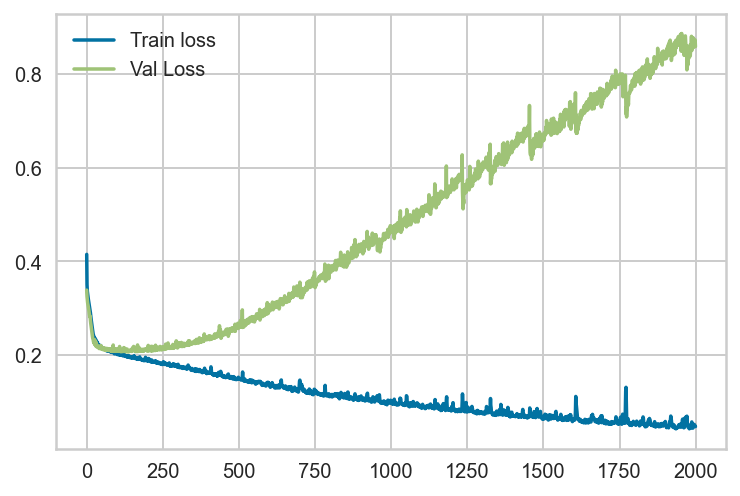

In [44]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

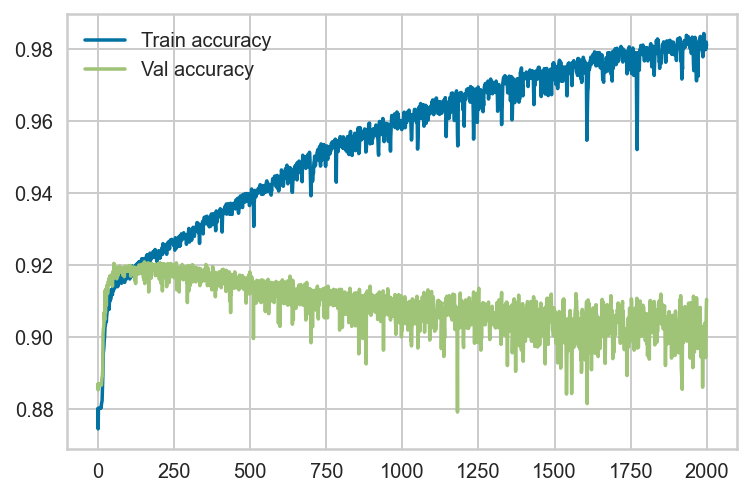

In [45]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [46]:
print(model.evaluate(X_test, y_test))

loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print("Precision is", np.mean(history.history['val_precision_m']))
print("Recall is", np.mean(history.history['val_recall_m']))

213/213 [==============================] - 1s 3ms/step - loss: 0.8581 - accuracy: 0.9105 - f1_m: 0.5191 - precision_m: 0.5962 - recall_m: 0.5138
[0.8580957651138306, 0.9104543328285217, 0.5191340446472168, 0.5962384939193726, 0.513838529586792]
Precision is 0.6209602249711752
Recall is 0.5573063328638673


# 6.6 Nine-Layered Neural Network Model

In [47]:
model = Sequential()
model.add(Dense(84, input_shape=(84,), activation='relu'))
model.add(Dense(168, activation='relu'))
model.add(Dense(336, activation='relu'))
model.add(Dense(336, activation='relu'))
model.add(Dense(336, activation='relu'))
model.add(Dense(336, activation='relu'))
model.add(Dense(168, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_m,precision_m, recall_m])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=2000, 
                    batch_size=2000,
                    shuffle=True)

Epoch 1/2000
8/8 [==============================] - 2s 150ms/step - loss: 0.7235 - accuracy: 0.5561 - f1_m: 0.1109 - precision_m: 0.0648 - recall_m: 0.4458 - val_loss: 0.4001 - val_accuracy: 0.8869 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.3806 - accuracy: 0.8802 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.3475 - val_accuracy: 0.8869 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.3609 - accuracy: 0.8802 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.3342 - val_accuracy: 0.8869 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/2000
8/8 [==============================] - 1s 103ms/step - loss: 0.3469 - accuracy: 0.8802 - f1_m: 0.0000e+00 - precision_m: 0.0000e+

Epoch 61/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.2148 - accuracy: 0.9125 - f1_m: 0.5851 - precision_m: 0.6757 - recall_m: 0.5180 - val_loss: 0.2101 - val_accuracy: 0.9178 - val_f1_m: 0.5906 - val_precision_m: 0.6730 - val_recall_m: 0.5277
Epoch 62/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.2154 - accuracy: 0.9125 - f1_m: 0.5772 - precision_m: 0.6886 - recall_m: 0.5007 - val_loss: 0.2107 - val_accuracy: 0.9177 - val_f1_m: 0.5918 - val_precision_m: 0.6668 - val_recall_m: 0.5333
Epoch 63/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.2124 - accuracy: 0.9134 - f1_m: 0.5876 - precision_m: 0.6857 - recall_m: 0.5154 - val_loss: 0.2092 - val_accuracy: 0.9193 - val_f1_m: 0.6004 - val_precision_m: 0.6828 - val_recall_m: 0.5379
Epoch 64/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.2118 - accuracy: 0.9144 - f1_m: 0.5882 - precision_m: 0.6911 - recall_m: 0.5142 - val_loss: 0.2099 - val_accuracy: 0.9185 

Epoch 92/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.2046 - accuracy: 0.9176 - f1_m: 0.6095 - precision_m: 0.7060 - recall_m: 0.5416 - val_loss: 0.2104 - val_accuracy: 0.9181 - val_f1_m: 0.6086 - val_precision_m: 0.6660 - val_recall_m: 0.5631
Epoch 93/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.2070 - accuracy: 0.9169 - f1_m: 0.5958 - precision_m: 0.7156 - recall_m: 0.5161 - val_loss: 0.2105 - val_accuracy: 0.9194 - val_f1_m: 0.5648 - val_precision_m: 0.7187 - val_recall_m: 0.4668
Epoch 94/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.2052 - accuracy: 0.9180 - f1_m: 0.6058 - precision_m: 0.7174 - recall_m: 0.5288 - val_loss: 0.2080 - val_accuracy: 0.9196 - val_f1_m: 0.6089 - val_precision_m: 0.6733 - val_recall_m: 0.5591
Epoch 95/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.2052 - accuracy: 0.9185 - f1_m: 0.6082 - precision_m: 0.7185 - recall_m: 0.5319 - val_loss: 0.2103 - val_accuracy: 0.9194 

Epoch 123/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1980 - accuracy: 0.9197 - f1_m: 0.6159 - precision_m: 0.7259 - recall_m: 0.5397 - val_loss: 0.2065 - val_accuracy: 0.9209 - val_f1_m: 0.6161 - val_precision_m: 0.6873 - val_recall_m: 0.5608
Epoch 124/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1954 - accuracy: 0.9202 - f1_m: 0.6161 - precision_m: 0.7290 - recall_m: 0.5343 - val_loss: 0.2097 - val_accuracy: 0.9184 - val_f1_m: 0.6218 - val_precision_m: 0.6605 - val_recall_m: 0.5896
Epoch 125/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1950 - accuracy: 0.9215 - f1_m: 0.6314 - precision_m: 0.7192 - recall_m: 0.5654 - val_loss: 0.2077 - val_accuracy: 0.9193 - val_f1_m: 0.6166 - val_precision_m: 0.6735 - val_recall_m: 0.5704
Epoch 126/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1973 - accuracy: 0.9202 - f1_m: 0.6126 - precision_m: 0.7372 - recall_m: 0.5299 - val_loss: 0.2136 - val_accuracy: 0.9

Epoch 154/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1933 - accuracy: 0.9226 - f1_m: 0.6276 - precision_m: 0.7395 - recall_m: 0.5497 - val_loss: 0.2069 - val_accuracy: 0.9216 - val_f1_m: 0.6188 - val_precision_m: 0.6924 - val_recall_m: 0.5620
Epoch 155/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1901 - accuracy: 0.9220 - f1_m: 0.6293 - precision_m: 0.7324 - recall_m: 0.5530 - val_loss: 0.2079 - val_accuracy: 0.9197 - val_f1_m: 0.6091 - val_precision_m: 0.6869 - val_recall_m: 0.5487
Epoch 156/2000
8/8 [==============================] - 1s 105ms/step - loss: 0.1911 - accuracy: 0.9231 - f1_m: 0.6296 - precision_m: 0.7488 - recall_m: 0.5451 - val_loss: 0.2066 - val_accuracy: 0.9218 - val_f1_m: 0.6241 - val_precision_m: 0.6892 - val_recall_m: 0.5724
Epoch 157/2000
8/8 [==============================] - 1s 103ms/step - loss: 0.1922 - accuracy: 0.9219 - f1_m: 0.6272 - precision_m: 0.7292 - recall_m: 0.5577 - val_loss: 0.2076 - val_accuracy: 0.9

Epoch 185/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1845 - accuracy: 0.9259 - f1_m: 0.6399 - precision_m: 0.7655 - recall_m: 0.5517 - val_loss: 0.2129 - val_accuracy: 0.9197 - val_f1_m: 0.6390 - val_precision_m: 0.6581 - val_recall_m: 0.6230
Epoch 186/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1846 - accuracy: 0.9244 - f1_m: 0.6384 - precision_m: 0.7509 - recall_m: 0.5591 - val_loss: 0.2117 - val_accuracy: 0.9199 - val_f1_m: 0.6272 - val_precision_m: 0.6625 - val_recall_m: 0.5974
Epoch 187/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1857 - accuracy: 0.9238 - f1_m: 0.6485 - precision_m: 0.7275 - recall_m: 0.5891 - val_loss: 0.2068 - val_accuracy: 0.9212 - val_f1_m: 0.5984 - val_precision_m: 0.7095 - val_recall_m: 0.5187
Epoch 188/2000
8/8 [==============================] - 1s 103ms/step - loss: 0.1860 - accuracy: 0.9238 - f1_m: 0.6376 - precision_m: 0.7427 - recall_m: 0.5642 - val_loss: 0.2167 - val_accuracy: 0.9

Epoch 216/2000
8/8 [==============================] - 1s 121ms/step - loss: 0.1879 - accuracy: 0.9234 - f1_m: 0.6237 - precision_m: 0.7667 - recall_m: 0.5445 - val_loss: 0.2123 - val_accuracy: 0.9178 - val_f1_m: 0.5472 - val_precision_m: 0.7316 - val_recall_m: 0.4377
Epoch 217/2000
8/8 [==============================] - 1s 113ms/step - loss: 0.1834 - accuracy: 0.9264 - f1_m: 0.6459 - precision_m: 0.7693 - recall_m: 0.5616 - val_loss: 0.2285 - val_accuracy: 0.9137 - val_f1_m: 0.6432 - val_precision_m: 0.6182 - val_recall_m: 0.6726
Epoch 218/2000
8/8 [==============================] - 1s 116ms/step - loss: 0.1866 - accuracy: 0.9238 - f1_m: 0.6293 - precision_m: 0.7605 - recall_m: 0.5493 - val_loss: 0.2157 - val_accuracy: 0.9207 - val_f1_m: 0.5928 - val_precision_m: 0.7112 - val_recall_m: 0.5105
Epoch 219/2000
8/8 [==============================] - 1s 117ms/step - loss: 0.1812 - accuracy: 0.9270 - f1_m: 0.6561 - precision_m: 0.7547 - recall_m: 0.5854 - val_loss: 0.2111 - val_accuracy: 0.9

Epoch 247/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1739 - accuracy: 0.9287 - f1_m: 0.6647 - precision_m: 0.7567 - recall_m: 0.5982 - val_loss: 0.2155 - val_accuracy: 0.9212 - val_f1_m: 0.6219 - val_precision_m: 0.6869 - val_recall_m: 0.5711
Epoch 248/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1717 - accuracy: 0.9290 - f1_m: 0.6622 - precision_m: 0.7678 - recall_m: 0.5839 - val_loss: 0.2186 - val_accuracy: 0.9178 - val_f1_m: 0.6209 - val_precision_m: 0.6562 - val_recall_m: 0.5918
Epoch 249/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.1733 - accuracy: 0.9294 - f1_m: 0.6624 - precision_m: 0.7770 - recall_m: 0.5801 - val_loss: 0.2222 - val_accuracy: 0.9177 - val_f1_m: 0.6277 - val_precision_m: 0.6553 - val_recall_m: 0.6057
Epoch 250/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1744 - accuracy: 0.9281 - f1_m: 0.6606 - precision_m: 0.7651 - recall_m: 0.5887 - val_loss: 0.2170 - val_accuracy: 0.9

Epoch 278/2000
8/8 [==============================] - 1s 105ms/step - loss: 0.1696 - accuracy: 0.9290 - f1_m: 0.6627 - precision_m: 0.7683 - recall_m: 0.5851 - val_loss: 0.2280 - val_accuracy: 0.9205 - val_f1_m: 0.6106 - val_precision_m: 0.6885 - val_recall_m: 0.5507
Epoch 279/2000
8/8 [==============================] - 1s 105ms/step - loss: 0.1709 - accuracy: 0.9297 - f1_m: 0.6592 - precision_m: 0.7959 - recall_m: 0.5738 - val_loss: 0.2260 - val_accuracy: 0.9181 - val_f1_m: 0.6018 - val_precision_m: 0.6858 - val_recall_m: 0.5369
Epoch 280/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1697 - accuracy: 0.9295 - f1_m: 0.6679 - precision_m: 0.7672 - recall_m: 0.5943 - val_loss: 0.2226 - val_accuracy: 0.9177 - val_f1_m: 0.6027 - val_precision_m: 0.6739 - val_recall_m: 0.5459
Epoch 281/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1720 - accuracy: 0.9302 - f1_m: 0.6709 - precision_m: 0.7679 - recall_m: 0.5979 - val_loss: 0.2249 - val_accuracy: 0.9

Epoch 309/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1649 - accuracy: 0.9323 - f1_m: 0.6856 - precision_m: 0.7765 - recall_m: 0.6176 - val_loss: 0.2272 - val_accuracy: 0.9178 - val_f1_m: 0.5664 - val_precision_m: 0.7097 - val_recall_m: 0.4722
Epoch 310/2000
8/8 [==============================] - 1s 105ms/step - loss: 0.1635 - accuracy: 0.9335 - f1_m: 0.6859 - precision_m: 0.7909 - recall_m: 0.6096 - val_loss: 0.2329 - val_accuracy: 0.9169 - val_f1_m: 0.5583 - val_precision_m: 0.7143 - val_recall_m: 0.4588
Epoch 311/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.1627 - accuracy: 0.9323 - f1_m: 0.6787 - precision_m: 0.7934 - recall_m: 0.5964 - val_loss: 0.2310 - val_accuracy: 0.9193 - val_f1_m: 0.6097 - val_precision_m: 0.6841 - val_recall_m: 0.5522
Epoch 312/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1619 - accuracy: 0.9321 - f1_m: 0.6817 - precision_m: 0.7751 - recall_m: 0.6143 - val_loss: 0.2306 - val_accuracy: 0.9

Epoch 340/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.1663 - accuracy: 0.9304 - f1_m: 0.6626 - precision_m: 0.8043 - recall_m: 0.5885 - val_loss: 0.2416 - val_accuracy: 0.9196 - val_f1_m: 0.6022 - val_precision_m: 0.6917 - val_recall_m: 0.5342
Epoch 341/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.1664 - accuracy: 0.9323 - f1_m: 0.6622 - precision_m: 0.8274 - recall_m: 0.5661 - val_loss: 0.2507 - val_accuracy: 0.9130 - val_f1_m: 0.6122 - val_precision_m: 0.6325 - val_recall_m: 0.5958
Epoch 342/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1611 - accuracy: 0.9336 - f1_m: 0.6897 - precision_m: 0.7826 - recall_m: 0.6200 - val_loss: 0.2406 - val_accuracy: 0.9193 - val_f1_m: 0.5910 - val_precision_m: 0.7008 - val_recall_m: 0.5122
Epoch 343/2000
8/8 [==============================] - 1s 118ms/step - loss: 0.1594 - accuracy: 0.9348 - f1_m: 0.6902 - precision_m: 0.8025 - recall_m: 0.6085 - val_loss: 0.2513 - val_accuracy: 0.9

Epoch 371/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1490 - accuracy: 0.9369 - f1_m: 0.6959 - precision_m: 0.8209 - recall_m: 0.6095 - val_loss: 0.2692 - val_accuracy: 0.9138 - val_f1_m: 0.6180 - val_precision_m: 0.6347 - val_recall_m: 0.6041
Epoch 372/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.1480 - accuracy: 0.9372 - f1_m: 0.7057 - precision_m: 0.8025 - recall_m: 0.6332 - val_loss: 0.2661 - val_accuracy: 0.9110 - val_f1_m: 0.6259 - val_precision_m: 0.6164 - val_recall_m: 0.6369
Epoch 373/2000
8/8 [==============================] - 1s 120ms/step - loss: 0.1472 - accuracy: 0.9383 - f1_m: 0.7139 - precision_m: 0.8020 - recall_m: 0.6450 - val_loss: 0.2638 - val_accuracy: 0.9162 - val_f1_m: 0.6197 - val_precision_m: 0.6508 - val_recall_m: 0.5921
Epoch 374/2000
8/8 [==============================] - 1s 103ms/step - loss: 0.1467 - accuracy: 0.9374 - f1_m: 0.7074 - precision_m: 0.8024 - recall_m: 0.6349 - val_loss: 0.2639 - val_accuracy: 0.9

Epoch 402/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1505 - accuracy: 0.9361 - f1_m: 0.7019 - precision_m: 0.8027 - recall_m: 0.6343 - val_loss: 0.2718 - val_accuracy: 0.9152 - val_f1_m: 0.5752 - val_precision_m: 0.6781 - val_recall_m: 0.5001
Epoch 403/2000
8/8 [==============================] - 1s 103ms/step - loss: 0.1490 - accuracy: 0.9358 - f1_m: 0.6961 - precision_m: 0.8135 - recall_m: 0.6220 - val_loss: 0.2822 - val_accuracy: 0.9110 - val_f1_m: 0.6065 - val_precision_m: 0.6242 - val_recall_m: 0.5909
Epoch 404/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1424 - accuracy: 0.9386 - f1_m: 0.7141 - precision_m: 0.8075 - recall_m: 0.6424 - val_loss: 0.2972 - val_accuracy: 0.9107 - val_f1_m: 0.6128 - val_precision_m: 0.6168 - val_recall_m: 0.6102
Epoch 405/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1493 - accuracy: 0.9367 - f1_m: 0.6966 - precision_m: 0.8185 - recall_m: 0.6201 - val_loss: 0.3024 - val_accuracy: 0.9

Epoch 433/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.1399 - accuracy: 0.9415 - f1_m: 0.7254 - precision_m: 0.8325 - recall_m: 0.6505 - val_loss: 0.3053 - val_accuracy: 0.9071 - val_f1_m: 0.6113 - val_precision_m: 0.5955 - val_recall_m: 0.6296
Epoch 434/2000
8/8 [==============================] - 1s 105ms/step - loss: 0.1442 - accuracy: 0.9384 - f1_m: 0.7115 - precision_m: 0.8147 - recall_m: 0.6453 - val_loss: 0.2929 - val_accuracy: 0.9131 - val_f1_m: 0.6154 - val_precision_m: 0.6363 - val_recall_m: 0.5976
Epoch 435/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1401 - accuracy: 0.9396 - f1_m: 0.7111 - precision_m: 0.8343 - recall_m: 0.6269 - val_loss: 0.3114 - val_accuracy: 0.9102 - val_f1_m: 0.6248 - val_precision_m: 0.6056 - val_recall_m: 0.6476
Epoch 436/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1459 - accuracy: 0.9396 - f1_m: 0.7146 - precision_m: 0.8340 - recall_m: 0.6421 - val_loss: 0.3059 - val_accuracy: 0.9

Epoch 464/2000
8/8 [==============================] - 1s 135ms/step - loss: 0.1303 - accuracy: 0.9445 - f1_m: 0.7397 - precision_m: 0.8425 - recall_m: 0.6627 - val_loss: 0.3270 - val_accuracy: 0.9132 - val_f1_m: 0.6100 - val_precision_m: 0.6323 - val_recall_m: 0.5905
Epoch 465/2000
8/8 [==============================] - 1s 130ms/step - loss: 0.1306 - accuracy: 0.9444 - f1_m: 0.7424 - precision_m: 0.8345 - recall_m: 0.6717 - val_loss: 0.3217 - val_accuracy: 0.9155 - val_f1_m: 0.5938 - val_precision_m: 0.6676 - val_recall_m: 0.5365
Epoch 466/2000
8/8 [==============================] - 1s 103ms/step - loss: 0.1295 - accuracy: 0.9443 - f1_m: 0.7421 - precision_m: 0.8342 - recall_m: 0.6718 - val_loss: 0.3199 - val_accuracy: 0.9125 - val_f1_m: 0.5503 - val_precision_m: 0.6748 - val_recall_m: 0.4657
Epoch 467/2000
8/8 [==============================] - 1s 105ms/step - loss: 0.1355 - accuracy: 0.9419 - f1_m: 0.7239 - precision_m: 0.8442 - recall_m: 0.6424 - val_loss: 0.3204 - val_accuracy: 0.9

Epoch 495/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1269 - accuracy: 0.9463 - f1_m: 0.7484 - precision_m: 0.8576 - recall_m: 0.6739 - val_loss: 0.3498 - val_accuracy: 0.9071 - val_f1_m: 0.6032 - val_precision_m: 0.5992 - val_recall_m: 0.6098
Epoch 496/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.1301 - accuracy: 0.9446 - f1_m: 0.7452 - precision_m: 0.8308 - recall_m: 0.6852 - val_loss: 0.3293 - val_accuracy: 0.9130 - val_f1_m: 0.5878 - val_precision_m: 0.6548 - val_recall_m: 0.5346
Epoch 497/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.1292 - accuracy: 0.9446 - f1_m: 0.7364 - precision_m: 0.8500 - recall_m: 0.6581 - val_loss: 0.3478 - val_accuracy: 0.9038 - val_f1_m: 0.6001 - val_precision_m: 0.5880 - val_recall_m: 0.6150
Epoch 498/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1290 - accuracy: 0.9439 - f1_m: 0.7372 - precision_m: 0.8478 - recall_m: 0.6600 - val_loss: 0.3472 - val_accuracy: 0.9

Epoch 526/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1203 - accuracy: 0.9477 - f1_m: 0.7555 - precision_m: 0.8582 - recall_m: 0.6760 - val_loss: 0.3488 - val_accuracy: 0.9113 - val_f1_m: 0.6021 - val_precision_m: 0.6298 - val_recall_m: 0.5774
Epoch 527/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.1212 - accuracy: 0.9498 - f1_m: 0.7678 - precision_m: 0.8579 - recall_m: 0.6985 - val_loss: 0.3520 - val_accuracy: 0.9138 - val_f1_m: 0.5676 - val_precision_m: 0.6761 - val_recall_m: 0.4899
Epoch 528/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.1212 - accuracy: 0.9486 - f1_m: 0.7636 - precision_m: 0.8508 - recall_m: 0.6973 - val_loss: 0.3511 - val_accuracy: 0.9153 - val_f1_m: 0.5987 - val_precision_m: 0.6650 - val_recall_m: 0.5460
Epoch 529/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1209 - accuracy: 0.9494 - f1_m: 0.7676 - precision_m: 0.8514 - recall_m: 0.7033 - val_loss: 0.3600 - val_accuracy: 0.9

Epoch 557/2000
8/8 [==============================] - 1s 103ms/step - loss: 0.1183 - accuracy: 0.9491 - f1_m: 0.7669 - precision_m: 0.8517 - recall_m: 0.7018 - val_loss: 0.3732 - val_accuracy: 0.9153 - val_f1_m: 0.5606 - val_precision_m: 0.6965 - val_recall_m: 0.4703
Epoch 558/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1170 - accuracy: 0.9503 - f1_m: 0.7713 - precision_m: 0.8634 - recall_m: 0.7019 - val_loss: 0.3731 - val_accuracy: 0.9149 - val_f1_m: 0.5608 - val_precision_m: 0.6905 - val_recall_m: 0.4729
Epoch 559/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1191 - accuracy: 0.9495 - f1_m: 0.7628 - precision_m: 0.8704 - recall_m: 0.6868 - val_loss: 0.3776 - val_accuracy: 0.9124 - val_f1_m: 0.5961 - val_precision_m: 0.6416 - val_recall_m: 0.5585
Epoch 560/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1219 - accuracy: 0.9489 - f1_m: 0.7621 - precision_m: 0.8587 - recall_m: 0.6942 - val_loss: 0.3793 - val_accuracy: 0.9

Epoch 588/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1139 - accuracy: 0.9534 - f1_m: 0.7848 - precision_m: 0.8784 - recall_m: 0.7150 - val_loss: 0.3808 - val_accuracy: 0.9131 - val_f1_m: 0.5857 - val_precision_m: 0.6553 - val_recall_m: 0.5318
Epoch 589/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1179 - accuracy: 0.9519 - f1_m: 0.7720 - precision_m: 0.8877 - recall_m: 0.6931 - val_loss: 0.3913 - val_accuracy: 0.9065 - val_f1_m: 0.5983 - val_precision_m: 0.6027 - val_recall_m: 0.5956
Epoch 590/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1174 - accuracy: 0.9501 - f1_m: 0.7718 - precision_m: 0.8582 - recall_m: 0.7069 - val_loss: 0.3859 - val_accuracy: 0.9144 - val_f1_m: 0.5887 - val_precision_m: 0.6678 - val_recall_m: 0.5279
Epoch 591/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1154 - accuracy: 0.9512 - f1_m: 0.7736 - precision_m: 0.8649 - recall_m: 0.7056 - val_loss: 0.3912 - val_accuracy: 0.9

Epoch 619/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1130 - accuracy: 0.9527 - f1_m: 0.7790 - precision_m: 0.8889 - recall_m: 0.6980 - val_loss: 0.4353 - val_accuracy: 0.9028 - val_f1_m: 0.5969 - val_precision_m: 0.5823 - val_recall_m: 0.6148
Epoch 620/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1129 - accuracy: 0.9536 - f1_m: 0.7890 - precision_m: 0.8675 - recall_m: 0.7326 - val_loss: 0.4242 - val_accuracy: 0.9102 - val_f1_m: 0.5886 - val_precision_m: 0.6272 - val_recall_m: 0.5561
Epoch 621/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.1108 - accuracy: 0.9547 - f1_m: 0.7931 - precision_m: 0.8772 - recall_m: 0.7283 - val_loss: 0.3994 - val_accuracy: 0.9100 - val_f1_m: 0.5612 - val_precision_m: 0.6387 - val_recall_m: 0.5020
Epoch 622/2000
8/8 [==============================] - 1s 147ms/step - loss: 0.1102 - accuracy: 0.9528 - f1_m: 0.7839 - precision_m: 0.8664 - recall_m: 0.7209 - val_loss: 0.4174 - val_accuracy: 0.9

Epoch 650/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1098 - accuracy: 0.9537 - f1_m: 0.7886 - precision_m: 0.8731 - recall_m: 0.7217 - val_loss: 0.3852 - val_accuracy: 0.9100 - val_f1_m: 0.5667 - val_precision_m: 0.6440 - val_recall_m: 0.5080
Epoch 651/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1117 - accuracy: 0.9514 - f1_m: 0.7776 - precision_m: 0.8610 - recall_m: 0.7149 - val_loss: 0.3959 - val_accuracy: 0.9069 - val_f1_m: 0.5667 - val_precision_m: 0.6166 - val_recall_m: 0.5263
Epoch 652/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.1164 - accuracy: 0.9492 - f1_m: 0.7674 - precision_m: 0.8577 - recall_m: 0.7030 - val_loss: 0.4025 - val_accuracy: 0.9068 - val_f1_m: 0.5832 - val_precision_m: 0.6098 - val_recall_m: 0.5608
Epoch 653/2000
8/8 [==============================] - 1s 103ms/step - loss: 0.1204 - accuracy: 0.9487 - f1_m: 0.7593 - precision_m: 0.8675 - recall_m: 0.6894 - val_loss: 0.4005 - val_accuracy: 0.9

Epoch 681/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.1039 - accuracy: 0.9563 - f1_m: 0.8014 - precision_m: 0.8749 - recall_m: 0.7455 - val_loss: 0.4149 - val_accuracy: 0.9131 - val_f1_m: 0.5532 - val_precision_m: 0.6712 - val_recall_m: 0.4720
Epoch 682/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1172 - accuracy: 0.9510 - f1_m: 0.7670 - precision_m: 0.8968 - recall_m: 0.6890 - val_loss: 0.4188 - val_accuracy: 0.9068 - val_f1_m: 0.5869 - val_precision_m: 0.6153 - val_recall_m: 0.5652
Epoch 683/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.1135 - accuracy: 0.9529 - f1_m: 0.7832 - precision_m: 0.8783 - recall_m: 0.7169 - val_loss: 0.4334 - val_accuracy: 0.9152 - val_f1_m: 0.5913 - val_precision_m: 0.6718 - val_recall_m: 0.5292
Epoch 684/2000
8/8 [==============================] - 1s 112ms/step - loss: 0.1125 - accuracy: 0.9523 - f1_m: 0.7866 - precision_m: 0.8586 - recall_m: 0.7362 - val_loss: 0.4153 - val_accuracy: 0.9

Epoch 712/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.1106 - accuracy: 0.9531 - f1_m: 0.7874 - precision_m: 0.8719 - recall_m: 0.7318 - val_loss: 0.4337 - val_accuracy: 0.9109 - val_f1_m: 0.5652 - val_precision_m: 0.6541 - val_recall_m: 0.4991
Epoch 713/2000
8/8 [==============================] - 1s 112ms/step - loss: 0.1093 - accuracy: 0.9549 - f1_m: 0.7927 - precision_m: 0.8773 - recall_m: 0.7329 - val_loss: 0.4387 - val_accuracy: 0.9121 - val_f1_m: 0.5697 - val_precision_m: 0.6630 - val_recall_m: 0.5013
Epoch 714/2000
8/8 [==============================] - 1s 114ms/step - loss: 0.1044 - accuracy: 0.9568 - f1_m: 0.8041 - precision_m: 0.8819 - recall_m: 0.7417 - val_loss: 0.4375 - val_accuracy: 0.9121 - val_f1_m: 0.5593 - val_precision_m: 0.6585 - val_recall_m: 0.4872
Epoch 715/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1046 - accuracy: 0.9561 - f1_m: 0.7988 - precision_m: 0.8893 - recall_m: 0.7305 - val_loss: 0.4444 - val_accuracy: 0.9

Epoch 743/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.1010 - accuracy: 0.9581 - f1_m: 0.8102 - precision_m: 0.8841 - recall_m: 0.7542 - val_loss: 0.4685 - val_accuracy: 0.9087 - val_f1_m: 0.5781 - val_precision_m: 0.6281 - val_recall_m: 0.5378
Epoch 744/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.1179 - accuracy: 0.9503 - f1_m: 0.7701 - precision_m: 0.8894 - recall_m: 0.7089 - val_loss: 0.4435 - val_accuracy: 0.9121 - val_f1_m: 0.5693 - val_precision_m: 0.6577 - val_recall_m: 0.5028
Epoch 745/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1146 - accuracy: 0.9524 - f1_m: 0.7800 - precision_m: 0.8793 - recall_m: 0.7169 - val_loss: 0.4793 - val_accuracy: 0.9166 - val_f1_m: 0.5880 - val_precision_m: 0.6887 - val_recall_m: 0.5141
Epoch 746/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.1074 - accuracy: 0.9554 - f1_m: 0.7986 - precision_m: 0.8742 - recall_m: 0.7455 - val_loss: 0.4753 - val_accuracy: 0.9

Epoch 774/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0961 - accuracy: 0.9595 - f1_m: 0.8143 - precision_m: 0.9028 - recall_m: 0.7465 - val_loss: 0.4832 - val_accuracy: 0.9065 - val_f1_m: 0.5693 - val_precision_m: 0.6073 - val_recall_m: 0.5384
Epoch 775/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.1006 - accuracy: 0.9576 - f1_m: 0.8052 - precision_m: 0.8998 - recall_m: 0.7382 - val_loss: 0.5031 - val_accuracy: 0.8968 - val_f1_m: 0.5867 - val_precision_m: 0.5479 - val_recall_m: 0.6338
Epoch 776/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0973 - accuracy: 0.9605 - f1_m: 0.8199 - precision_m: 0.8964 - recall_m: 0.7617 - val_loss: 0.4765 - val_accuracy: 0.9096 - val_f1_m: 0.5807 - val_precision_m: 0.6363 - val_recall_m: 0.5367
Epoch 777/2000
8/8 [==============================] - 1s 122ms/step - loss: 0.0960 - accuracy: 0.9604 - f1_m: 0.8224 - precision_m: 0.8995 - recall_m: 0.7623 - val_loss: 0.4810 - val_accuracy: 0.9

Epoch 805/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.0947 - accuracy: 0.9601 - f1_m: 0.8203 - precision_m: 0.8935 - recall_m: 0.7640 - val_loss: 0.5015 - val_accuracy: 0.9022 - val_f1_m: 0.5590 - val_precision_m: 0.5808 - val_recall_m: 0.5400
Epoch 806/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0987 - accuracy: 0.9598 - f1_m: 0.8201 - precision_m: 0.8843 - recall_m: 0.7692 - val_loss: 0.4939 - val_accuracy: 0.9102 - val_f1_m: 0.5765 - val_precision_m: 0.6403 - val_recall_m: 0.5255
Epoch 807/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0993 - accuracy: 0.9592 - f1_m: 0.8131 - precision_m: 0.9042 - recall_m: 0.7417 - val_loss: 0.5312 - val_accuracy: 0.8971 - val_f1_m: 0.5774 - val_precision_m: 0.5541 - val_recall_m: 0.6062
Epoch 808/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.1025 - accuracy: 0.9585 - f1_m: 0.8167 - precision_m: 0.8741 - recall_m: 0.7718 - val_loss: 0.4951 - val_accuracy: 0.9

Epoch 836/2000
8/8 [==============================] - 1s 105ms/step - loss: 0.0871 - accuracy: 0.9652 - f1_m: 0.8424 - precision_m: 0.9187 - recall_m: 0.7783 - val_loss: 0.5412 - val_accuracy: 0.8996 - val_f1_m: 0.5801 - val_precision_m: 0.5610 - val_recall_m: 0.6036
Epoch 837/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0901 - accuracy: 0.9632 - f1_m: 0.8373 - precision_m: 0.8928 - recall_m: 0.7913 - val_loss: 0.5232 - val_accuracy: 0.9100 - val_f1_m: 0.5701 - val_precision_m: 0.6374 - val_recall_m: 0.5180
Epoch 838/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0893 - accuracy: 0.9636 - f1_m: 0.8350 - precision_m: 0.9109 - recall_m: 0.7720 - val_loss: 0.5235 - val_accuracy: 0.9049 - val_f1_m: 0.5705 - val_precision_m: 0.5943 - val_recall_m: 0.5518
Epoch 839/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0900 - accuracy: 0.9631 - f1_m: 0.8336 - precision_m: 0.9019 - recall_m: 0.7774 - val_loss: 0.5168 - val_accuracy: 0.9

Epoch 867/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.0920 - accuracy: 0.9624 - f1_m: 0.8322 - precision_m: 0.8900 - recall_m: 0.7845 - val_loss: 0.4908 - val_accuracy: 0.9097 - val_f1_m: 0.5739 - val_precision_m: 0.6332 - val_recall_m: 0.5263
Epoch 868/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.0883 - accuracy: 0.9633 - f1_m: 0.8344 - precision_m: 0.9082 - recall_m: 0.7725 - val_loss: 0.5378 - val_accuracy: 0.9034 - val_f1_m: 0.5860 - val_precision_m: 0.5866 - val_recall_m: 0.5881
Epoch 869/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0906 - accuracy: 0.9635 - f1_m: 0.8355 - precision_m: 0.9052 - recall_m: 0.7799 - val_loss: 0.5270 - val_accuracy: 0.9052 - val_f1_m: 0.5866 - val_precision_m: 0.5911 - val_recall_m: 0.5844
Epoch 870/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0939 - accuracy: 0.9613 - f1_m: 0.8248 - precision_m: 0.9018 - recall_m: 0.7667 - val_loss: 0.5277 - val_accuracy: 0.9

Epoch 898/2000
8/8 [==============================] - 1s 118ms/step - loss: 0.0868 - accuracy: 0.9655 - f1_m: 0.8455 - precision_m: 0.9138 - recall_m: 0.7884 - val_loss: 0.5457 - val_accuracy: 0.9124 - val_f1_m: 0.5561 - val_precision_m: 0.6696 - val_recall_m: 0.4778
Epoch 899/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.1011 - accuracy: 0.9590 - f1_m: 0.8143 - precision_m: 0.9010 - recall_m: 0.7593 - val_loss: 0.5164 - val_accuracy: 0.9137 - val_f1_m: 0.5416 - val_precision_m: 0.6941 - val_recall_m: 0.4449
Epoch 900/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.0946 - accuracy: 0.9628 - f1_m: 0.8328 - precision_m: 0.9014 - recall_m: 0.7818 - val_loss: 0.5128 - val_accuracy: 0.9119 - val_f1_m: 0.5500 - val_precision_m: 0.6695 - val_recall_m: 0.4687
Epoch 901/2000
8/8 [==============================] - 1s 126ms/step - loss: 0.0881 - accuracy: 0.9641 - f1_m: 0.8381 - precision_m: 0.9095 - recall_m: 0.7825 - val_loss: 0.5501 - val_accuracy: 0.9

Epoch 929/2000
8/8 [==============================] - 1s 103ms/step - loss: 0.0982 - accuracy: 0.9612 - f1_m: 0.8283 - precision_m: 0.8877 - recall_m: 0.7836 - val_loss: 0.4976 - val_accuracy: 0.9121 - val_f1_m: 0.5449 - val_precision_m: 0.6728 - val_recall_m: 0.4588
Epoch 930/2000
8/8 [==============================] - 1s 105ms/step - loss: 0.0963 - accuracy: 0.9606 - f1_m: 0.8176 - precision_m: 0.9039 - recall_m: 0.7543 - val_loss: 0.4993 - val_accuracy: 0.9125 - val_f1_m: 0.5647 - val_precision_m: 0.6590 - val_recall_m: 0.4953
Epoch 931/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0933 - accuracy: 0.9633 - f1_m: 0.8348 - precision_m: 0.9066 - recall_m: 0.7798 - val_loss: 0.5142 - val_accuracy: 0.9056 - val_f1_m: 0.5816 - val_precision_m: 0.6010 - val_recall_m: 0.5662
Epoch 932/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0904 - accuracy: 0.9641 - f1_m: 0.8377 - precision_m: 0.9154 - recall_m: 0.7756 - val_loss: 0.5117 - val_accuracy: 0.9

Epoch 960/2000
8/8 [==============================] - 1s 113ms/step - loss: 0.0792 - accuracy: 0.9679 - f1_m: 0.8574 - precision_m: 0.9179 - recall_m: 0.8060 - val_loss: 0.5779 - val_accuracy: 0.9031 - val_f1_m: 0.5630 - val_precision_m: 0.5847 - val_recall_m: 0.5461
Epoch 961/2000
8/8 [==============================] - 1s 113ms/step - loss: 0.0835 - accuracy: 0.9664 - f1_m: 0.8505 - precision_m: 0.9139 - recall_m: 0.8018 - val_loss: 0.5862 - val_accuracy: 0.9107 - val_f1_m: 0.5451 - val_precision_m: 0.6509 - val_recall_m: 0.4715
Epoch 962/2000
8/8 [==============================] - 1s 112ms/step - loss: 0.0839 - accuracy: 0.9671 - f1_m: 0.8516 - precision_m: 0.9265 - recall_m: 0.7922 - val_loss: 0.5817 - val_accuracy: 0.9082 - val_f1_m: 0.5872 - val_precision_m: 0.6142 - val_recall_m: 0.5659
Epoch 963/2000
8/8 [==============================] - 1s 112ms/step - loss: 0.0807 - accuracy: 0.9668 - f1_m: 0.8527 - precision_m: 0.9102 - recall_m: 0.8049 - val_loss: 0.5893 - val_accuracy: 0.9

Epoch 991/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.0841 - accuracy: 0.9668 - f1_m: 0.8521 - precision_m: 0.9144 - recall_m: 0.8051 - val_loss: 0.5994 - val_accuracy: 0.9081 - val_f1_m: 0.5793 - val_precision_m: 0.6265 - val_recall_m: 0.5423
Epoch 992/2000
8/8 [==============================] - 1s 113ms/step - loss: 0.0798 - accuracy: 0.9677 - f1_m: 0.8558 - precision_m: 0.9154 - recall_m: 0.8083 - val_loss: 0.5868 - val_accuracy: 0.9118 - val_f1_m: 0.5610 - val_precision_m: 0.6587 - val_recall_m: 0.4914
Epoch 993/2000
8/8 [==============================] - 1s 113ms/step - loss: 0.0826 - accuracy: 0.9658 - f1_m: 0.8446 - precision_m: 0.9275 - recall_m: 0.7816 - val_loss: 0.6055 - val_accuracy: 0.8990 - val_f1_m: 0.5851 - val_precision_m: 0.5623 - val_recall_m: 0.6141
Epoch 994/2000
8/8 [==============================] - 1s 112ms/step - loss: 0.0855 - accuracy: 0.9662 - f1_m: 0.8484 - precision_m: 0.9147 - recall_m: 0.8011 - val_loss: 0.6001 - val_accuracy: 0.9

8/8 [==============================] - 1s 122ms/step - loss: 0.0736 - accuracy: 0.9716 - f1_m: 0.8744 - precision_m: 0.9301 - recall_m: 0.8266 - val_loss: 0.6248 - val_accuracy: 0.9057 - val_f1_m: 0.5583 - val_precision_m: 0.6064 - val_recall_m: 0.5200
Epoch 1052/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0709 - accuracy: 0.9718 - f1_m: 0.8755 - precision_m: 0.9233 - recall_m: 0.8331 - val_loss: 0.6205 - val_accuracy: 0.9018 - val_f1_m: 0.5560 - val_precision_m: 0.5854 - val_recall_m: 0.5319
Epoch 1053/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0711 - accuracy: 0.9718 - f1_m: 0.8741 - precision_m: 0.9345 - recall_m: 0.8227 - val_loss: 0.6357 - val_accuracy: 0.8994 - val_f1_m: 0.5648 - val_precision_m: 0.5677 - val_recall_m: 0.5649
Epoch 1054/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0708 - accuracy: 0.9721 - f1_m: 0.8765 - precision_m: 0.9288 - recall_m: 0.8312 - val_loss: 0.6342 - val_accuracy: 0.9016 - val_f1

8/8 [==============================] - 1s 111ms/step - loss: 0.0856 - accuracy: 0.9670 - f1_m: 0.8529 - precision_m: 0.9217 - recall_m: 0.8019 - val_loss: 0.6462 - val_accuracy: 0.9050 - val_f1_m: 0.5919 - val_precision_m: 0.5950 - val_recall_m: 0.5916
Epoch 1112/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0750 - accuracy: 0.9713 - f1_m: 0.8754 - precision_m: 0.9145 - recall_m: 0.8422 - val_loss: 0.6137 - val_accuracy: 0.9063 - val_f1_m: 0.5556 - val_precision_m: 0.6113 - val_recall_m: 0.5111
Epoch 1113/2000
8/8 [==============================] - 1s 113ms/step - loss: 0.0733 - accuracy: 0.9708 - f1_m: 0.8702 - precision_m: 0.9278 - recall_m: 0.8227 - val_loss: 0.6261 - val_accuracy: 0.9094 - val_f1_m: 0.5535 - val_precision_m: 0.6315 - val_recall_m: 0.4939
Epoch 1114/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.0739 - accuracy: 0.9708 - f1_m: 0.8691 - precision_m: 0.9330 - recall_m: 0.8188 - val_loss: 0.6230 - val_accuracy: 0.9077 - val_f1

8/8 [==============================] - 1s 108ms/step - loss: 0.0904 - accuracy: 0.9658 - f1_m: 0.8456 - precision_m: 0.9152 - recall_m: 0.7973 - val_loss: 0.6420 - val_accuracy: 0.9044 - val_f1_m: 0.5813 - val_precision_m: 0.5992 - val_recall_m: 0.5685
Epoch 1172/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0795 - accuracy: 0.9681 - f1_m: 0.8615 - precision_m: 0.9073 - recall_m: 0.8238 - val_loss: 0.6668 - val_accuracy: 0.9085 - val_f1_m: 0.5917 - val_precision_m: 0.6213 - val_recall_m: 0.5668
Epoch 1173/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0718 - accuracy: 0.9723 - f1_m: 0.8788 - precision_m: 0.9281 - recall_m: 0.8358 - val_loss: 0.6694 - val_accuracy: 0.9065 - val_f1_m: 0.5768 - val_precision_m: 0.6101 - val_recall_m: 0.5502
Epoch 1174/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0748 - accuracy: 0.9706 - f1_m: 0.8705 - precision_m: 0.9249 - recall_m: 0.8267 - val_loss: 0.6913 - val_accuracy: 0.8978 - val_f1

8/8 [==============================] - 1s 106ms/step - loss: 0.0651 - accuracy: 0.9752 - f1_m: 0.8912 - precision_m: 0.9393 - recall_m: 0.8491 - val_loss: 0.7042 - val_accuracy: 0.9007 - val_f1_m: 0.5509 - val_precision_m: 0.5789 - val_recall_m: 0.5274
Epoch 1232/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0671 - accuracy: 0.9745 - f1_m: 0.8887 - precision_m: 0.9379 - recall_m: 0.8475 - val_loss: 0.7199 - val_accuracy: 0.8959 - val_f1_m: 0.5602 - val_precision_m: 0.5486 - val_recall_m: 0.5751
Epoch 1233/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0657 - accuracy: 0.9753 - f1_m: 0.8925 - precision_m: 0.9283 - recall_m: 0.8621 - val_loss: 0.7174 - val_accuracy: 0.9044 - val_f1_m: 0.5789 - val_precision_m: 0.5949 - val_recall_m: 0.5664
Epoch 1234/2000
8/8 [==============================] - 1s 113ms/step - loss: 0.0629 - accuracy: 0.9759 - f1_m: 0.8946 - precision_m: 0.9372 - recall_m: 0.8576 - val_loss: 0.7133 - val_accuracy: 0.9056 - val_f1

8/8 [==============================] - 1s 114ms/step - loss: 0.0607 - accuracy: 0.9769 - f1_m: 0.8989 - precision_m: 0.9411 - recall_m: 0.8639 - val_loss: 0.7413 - val_accuracy: 0.9075 - val_f1_m: 0.5590 - val_precision_m: 0.6245 - val_recall_m: 0.5080
Epoch 1292/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.0595 - accuracy: 0.9769 - f1_m: 0.8994 - precision_m: 0.9425 - recall_m: 0.8630 - val_loss: 0.7167 - val_accuracy: 0.9050 - val_f1_m: 0.5515 - val_precision_m: 0.6042 - val_recall_m: 0.5090
Epoch 1293/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.0617 - accuracy: 0.9755 - f1_m: 0.8941 - precision_m: 0.9366 - recall_m: 0.8593 - val_loss: 0.7348 - val_accuracy: 0.9068 - val_f1_m: 0.5431 - val_precision_m: 0.6266 - val_recall_m: 0.4807
Epoch 1294/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0646 - accuracy: 0.9749 - f1_m: 0.8893 - precision_m: 0.9327 - recall_m: 0.8524 - val_loss: 0.7406 - val_accuracy: 0.9009 - val_f1

8/8 [==============================] - 1s 106ms/step - loss: 0.0810 - accuracy: 0.9674 - f1_m: 0.8532 - precision_m: 0.9257 - recall_m: 0.8136 - val_loss: 0.7210 - val_accuracy: 0.9022 - val_f1_m: 0.5731 - val_precision_m: 0.5829 - val_recall_m: 0.5663
Epoch 1352/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0859 - accuracy: 0.9664 - f1_m: 0.8541 - precision_m: 0.9074 - recall_m: 0.8271 - val_loss: 0.7260 - val_accuracy: 0.9099 - val_f1_m: 0.5372 - val_precision_m: 0.6506 - val_recall_m: 0.4585
Epoch 1353/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.0727 - accuracy: 0.9721 - f1_m: 0.8758 - precision_m: 0.9281 - recall_m: 0.8339 - val_loss: 0.7066 - val_accuracy: 0.9025 - val_f1_m: 0.5567 - val_precision_m: 0.5941 - val_recall_m: 0.5263
Epoch 1354/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0644 - accuracy: 0.9743 - f1_m: 0.8864 - precision_m: 0.9416 - recall_m: 0.8393 - val_loss: 0.7277 - val_accuracy: 0.8975 - val_f1

8/8 [==============================] - 1s 109ms/step - loss: 0.0530 - accuracy: 0.9808 - f1_m: 0.9166 - precision_m: 0.9534 - recall_m: 0.8837 - val_loss: 0.7942 - val_accuracy: 0.9038 - val_f1_m: 0.5630 - val_precision_m: 0.5915 - val_recall_m: 0.5388
Epoch 1412/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0564 - accuracy: 0.9788 - f1_m: 0.9082 - precision_m: 0.9444 - recall_m: 0.8771 - val_loss: 0.8024 - val_accuracy: 0.9007 - val_f1_m: 0.5645 - val_precision_m: 0.5752 - val_recall_m: 0.5561
Epoch 1413/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.0543 - accuracy: 0.9788 - f1_m: 0.9081 - precision_m: 0.9411 - recall_m: 0.8786 - val_loss: 0.8052 - val_accuracy: 0.9025 - val_f1_m: 0.5722 - val_precision_m: 0.5855 - val_recall_m: 0.5621
Epoch 1414/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.0528 - accuracy: 0.9796 - f1_m: 0.9116 - precision_m: 0.9459 - recall_m: 0.8805 - val_loss: 0.7843 - val_accuracy: 0.9025 - val_f1

8/8 [==============================] - 1s 112ms/step - loss: 0.0679 - accuracy: 0.9749 - f1_m: 0.8907 - precision_m: 0.9320 - recall_m: 0.8609 - val_loss: 0.7760 - val_accuracy: 0.9118 - val_f1_m: 0.5758 - val_precision_m: 0.6542 - val_recall_m: 0.5162
Epoch 1472/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0699 - accuracy: 0.9738 - f1_m: 0.8847 - precision_m: 0.9305 - recall_m: 0.8518 - val_loss: 0.7746 - val_accuracy: 0.9077 - val_f1_m: 0.5676 - val_precision_m: 0.6166 - val_recall_m: 0.5275
Epoch 1473/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0581 - accuracy: 0.9773 - f1_m: 0.9024 - precision_m: 0.9377 - recall_m: 0.8722 - val_loss: 0.8026 - val_accuracy: 0.9062 - val_f1_m: 0.5814 - val_precision_m: 0.6004 - val_recall_m: 0.5662
Epoch 1474/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.0538 - accuracy: 0.9802 - f1_m: 0.9137 - precision_m: 0.9513 - recall_m: 0.8799 - val_loss: 0.8081 - val_accuracy: 0.8981 - val_f1

8/8 [==============================] - 1s 108ms/step - loss: 0.0561 - accuracy: 0.9779 - f1_m: 0.9052 - precision_m: 0.9356 - recall_m: 0.8842 - val_loss: 0.8306 - val_accuracy: 0.9077 - val_f1_m: 0.5775 - val_precision_m: 0.6133 - val_recall_m: 0.5480
Epoch 1532/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.0576 - accuracy: 0.9768 - f1_m: 0.8998 - precision_m: 0.9392 - recall_m: 0.8684 - val_loss: 0.8524 - val_accuracy: 0.9025 - val_f1_m: 0.5854 - val_precision_m: 0.5834 - val_recall_m: 0.5905
Epoch 1533/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0549 - accuracy: 0.9793 - f1_m: 0.9109 - precision_m: 0.9471 - recall_m: 0.8808 - val_loss: 0.8320 - val_accuracy: 0.9012 - val_f1_m: 0.5775 - val_precision_m: 0.5736 - val_recall_m: 0.5835
Epoch 1534/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0573 - accuracy: 0.9781 - f1_m: 0.9052 - precision_m: 0.9439 - recall_m: 0.8726 - val_loss: 0.8396 - val_accuracy: 0.9028 - val_f1

8/8 [==============================] - 1s 109ms/step - loss: 0.0462 - accuracy: 0.9830 - f1_m: 0.9265 - precision_m: 0.9602 - recall_m: 0.8975 - val_loss: 0.8339 - val_accuracy: 0.9003 - val_f1_m: 0.5674 - val_precision_m: 0.5695 - val_recall_m: 0.5667
Epoch 1592/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0501 - accuracy: 0.9806 - f1_m: 0.9160 - precision_m: 0.9486 - recall_m: 0.8907 - val_loss: 0.8437 - val_accuracy: 0.8933 - val_f1_m: 0.5491 - val_precision_m: 0.5361 - val_recall_m: 0.5650
Epoch 1593/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0490 - accuracy: 0.9819 - f1_m: 0.9220 - precision_m: 0.9510 - recall_m: 0.8978 - val_loss: 0.8655 - val_accuracy: 0.8934 - val_f1_m: 0.5579 - val_precision_m: 0.5331 - val_recall_m: 0.5868
Epoch 1594/2000
8/8 [==============================] - 1s 104ms/step - loss: 0.0518 - accuracy: 0.9798 - f1_m: 0.9136 - precision_m: 0.9441 - recall_m: 0.8872 - val_loss: 0.8374 - val_accuracy: 0.9056 - val_f1

8/8 [==============================] - 1s 108ms/step - loss: 0.0482 - accuracy: 0.9811 - f1_m: 0.9182 - precision_m: 0.9501 - recall_m: 0.8898 - val_loss: 0.8681 - val_accuracy: 0.8930 - val_f1_m: 0.5584 - val_precision_m: 0.5331 - val_recall_m: 0.5879
Epoch 1652/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0583 - accuracy: 0.9774 - f1_m: 0.8992 - precision_m: 0.9474 - recall_m: 0.8642 - val_loss: 0.9015 - val_accuracy: 0.8916 - val_f1_m: 0.5640 - val_precision_m: 0.5284 - val_recall_m: 0.6059
Epoch 1653/2000
8/8 [==============================] - 1s 112ms/step - loss: 0.0694 - accuracy: 0.9720 - f1_m: 0.8782 - precision_m: 0.9176 - recall_m: 0.8555 - val_loss: 0.8505 - val_accuracy: 0.9046 - val_f1_m: 0.5656 - val_precision_m: 0.5937 - val_recall_m: 0.5420
Epoch 1654/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.0672 - accuracy: 0.9747 - f1_m: 0.8889 - precision_m: 0.9330 - recall_m: 0.8589 - val_loss: 0.8116 - val_accuracy: 0.9044 - val_f1

8/8 [==============================] - 1s 106ms/step - loss: 0.0843 - accuracy: 0.9685 - f1_m: 0.8623 - precision_m: 0.9228 - recall_m: 0.8235 - val_loss: 0.8246 - val_accuracy: 0.8966 - val_f1_m: 0.5647 - val_precision_m: 0.5503 - val_recall_m: 0.5822
Epoch 1712/2000
8/8 [==============================] - 1s 133ms/step - loss: 0.0819 - accuracy: 0.9702 - f1_m: 0.8699 - precision_m: 0.9109 - recall_m: 0.8429 - val_loss: 0.8250 - val_accuracy: 0.8863 - val_f1_m: 0.5163 - val_precision_m: 0.5016 - val_recall_m: 0.5336
Epoch 1713/2000
8/8 [==============================] - 1s 121ms/step - loss: 0.0889 - accuracy: 0.9690 - f1_m: 0.8629 - precision_m: 0.9177 - recall_m: 0.8237 - val_loss: 0.8393 - val_accuracy: 0.8875 - val_f1_m: 0.5478 - val_precision_m: 0.5087 - val_recall_m: 0.5942
Epoch 1714/2000
8/8 [==============================] - 1s 135ms/step - loss: 0.0633 - accuracy: 0.9758 - f1_m: 0.8958 - precision_m: 0.9283 - recall_m: 0.8681 - val_loss: 0.7646 - val_accuracy: 0.9018 - val_f1

8/8 [==============================] - 1s 106ms/step - loss: 0.0378 - accuracy: 0.9856 - f1_m: 0.9381 - precision_m: 0.9662 - recall_m: 0.9123 - val_loss: 0.8600 - val_accuracy: 0.8994 - val_f1_m: 0.5503 - val_precision_m: 0.5651 - val_recall_m: 0.5376
Epoch 1772/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0359 - accuracy: 0.9864 - f1_m: 0.9419 - precision_m: 0.9674 - recall_m: 0.9180 - val_loss: 0.8964 - val_accuracy: 0.8974 - val_f1_m: 0.5597 - val_precision_m: 0.5522 - val_recall_m: 0.5686
Epoch 1773/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0372 - accuracy: 0.9861 - f1_m: 0.9407 - precision_m: 0.9612 - recall_m: 0.9217 - val_loss: 0.8789 - val_accuracy: 0.9025 - val_f1_m: 0.5527 - val_precision_m: 0.5837 - val_recall_m: 0.5261
Epoch 1774/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0383 - accuracy: 0.9853 - f1_m: 0.9375 - precision_m: 0.9586 - recall_m: 0.9180 - val_loss: 0.8620 - val_accuracy: 0.9072 - val_f1

8/8 [==============================] - 1s 108ms/step - loss: 0.0408 - accuracy: 0.9838 - f1_m: 0.9297 - precision_m: 0.9673 - recall_m: 0.8960 - val_loss: 0.9137 - val_accuracy: 0.8943 - val_f1_m: 0.5614 - val_precision_m: 0.5418 - val_recall_m: 0.5847
Epoch 1832/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0398 - accuracy: 0.9848 - f1_m: 0.9344 - precision_m: 0.9550 - recall_m: 0.9154 - val_loss: 0.9030 - val_accuracy: 0.9003 - val_f1_m: 0.5672 - val_precision_m: 0.5699 - val_recall_m: 0.5663
Epoch 1833/2000
8/8 [==============================] - 1s 108ms/step - loss: 0.0354 - accuracy: 0.9868 - f1_m: 0.9436 - precision_m: 0.9607 - recall_m: 0.9273 - val_loss: 0.9329 - val_accuracy: 0.9024 - val_f1_m: 0.5835 - val_precision_m: 0.5757 - val_recall_m: 0.5937
Epoch 1834/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0387 - accuracy: 0.9852 - f1_m: 0.9366 - precision_m: 0.9614 - recall_m: 0.9133 - val_loss: 0.9078 - val_accuracy: 0.9035 - val_f1

8/8 [==============================] - 1s 106ms/step - loss: 0.0383 - accuracy: 0.9851 - f1_m: 0.9361 - precision_m: 0.9643 - recall_m: 0.9118 - val_loss: 0.9883 - val_accuracy: 0.8922 - val_f1_m: 0.5769 - val_precision_m: 0.5299 - val_recall_m: 0.6351
Epoch 1892/2000
8/8 [==============================] - 1s 106ms/step - loss: 0.0490 - accuracy: 0.9813 - f1_m: 0.9190 - precision_m: 0.9480 - recall_m: 0.8982 - val_loss: 0.9298 - val_accuracy: 0.9006 - val_f1_m: 0.5739 - val_precision_m: 0.5641 - val_recall_m: 0.5856
Epoch 1893/2000
8/8 [==============================] - 1s 109ms/step - loss: 0.0822 - accuracy: 0.9686 - f1_m: 0.8628 - precision_m: 0.9172 - recall_m: 0.8396 - val_loss: 0.8646 - val_accuracy: 0.9062 - val_f1_m: 0.5589 - val_precision_m: 0.6045 - val_recall_m: 0.5205
Epoch 1894/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.0769 - accuracy: 0.9701 - f1_m: 0.8722 - precision_m: 0.9039 - recall_m: 0.8544 - val_loss: 0.8502 - val_accuracy: 0.9068 - val_f1

8/8 [==============================] - 1s 110ms/step - loss: 0.0328 - accuracy: 0.9868 - f1_m: 0.9430 - precision_m: 0.9661 - recall_m: 0.9222 - val_loss: 0.9878 - val_accuracy: 0.9027 - val_f1_m: 0.5691 - val_precision_m: 0.5781 - val_recall_m: 0.5617
Epoch 1952/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.0319 - accuracy: 0.9873 - f1_m: 0.9457 - precision_m: 0.9666 - recall_m: 0.9266 - val_loss: 0.9774 - val_accuracy: 0.9040 - val_f1_m: 0.5609 - val_precision_m: 0.5898 - val_recall_m: 0.5356
Epoch 1953/2000
8/8 [==============================] - 1s 107ms/step - loss: 0.0309 - accuracy: 0.9875 - f1_m: 0.9466 - precision_m: 0.9631 - recall_m: 0.9312 - val_loss: 0.9846 - val_accuracy: 0.8990 - val_f1_m: 0.5626 - val_precision_m: 0.5599 - val_recall_m: 0.5672
Epoch 1954/2000
8/8 [==============================] - 1s 105ms/step - loss: 0.0316 - accuracy: 0.9871 - f1_m: 0.9446 - precision_m: 0.9717 - recall_m: 0.9197 - val_loss: 1.0217 - val_accuracy: 0.8974 - val_f1

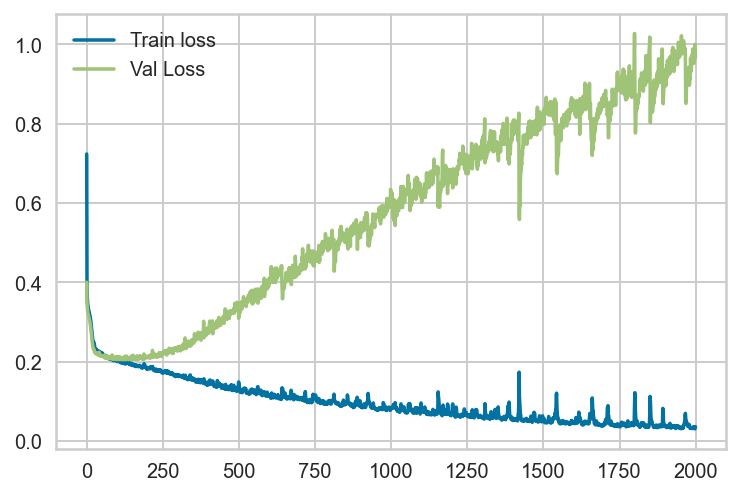

In [48]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

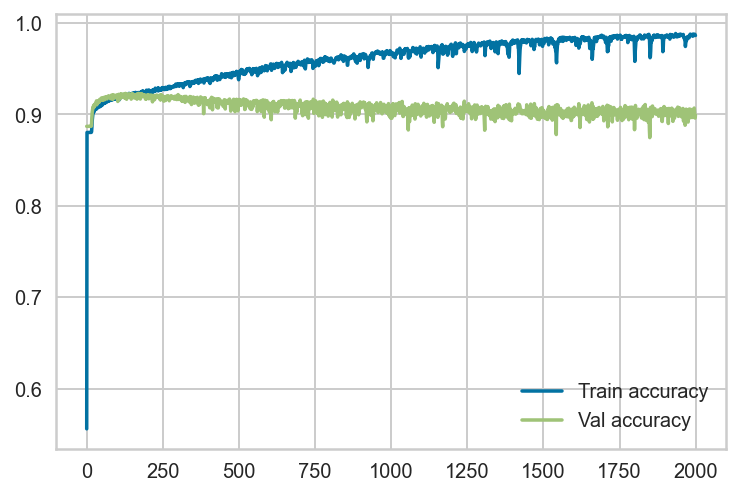

In [49]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [50]:
print(model.evaluate(X_test, y_test))

loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print("Precision is", np.mean(history.history['val_precision_m']))
print("Recall is", np.mean(history.history['val_recall_m']))

213/213 [==============================] - 1s 3ms/step - loss: 0.9664 - accuracy: 0.8990 - f1_m: 0.5155 - precision_m: 0.5463 - recall_m: 0.5443
[0.9663702845573425, 0.8989854454994202, 0.5154942870140076, 0.546275794506073, 0.5442599058151245]
Precision is 0.6147053752839565
Recall is 0.5385315998552833


# 7. Conclusion and Recommendation

Base on modelling results, the best models that have been shortlisted are XGBoost, XGBoost with Adasyn and 2 layeyed neural network. All of these models are able to achieve decent accuracy. However, their precision and recall is still far from an ideal score. 

When dealing such a serious disease, misclassification can lead to heavy consequences. A high precision but low recall can result in under-detection of cases, although most of the identified cases will be correct. A low precision but high recall can lead to misclassification of non-cases as cases, leading to panic and medical costs. Therefore, this model can be used as a first-line identifier to be complemented with physician's diagnosis/recommendation and should not be used solely on its own for prediction.

The shortlisted models have its own strength and weakness in terms of precision and recall. To identify which metric is more important for myocarditis/pericarditis, an expert's opinion will be required as we lack the domain knowledge to determine if the consequences one metric can outweigh over the other.